# chromatic_fitting

Add-on to the [chromatic](https://github.com/zkbt/chromatic) package to perform a simultaneous multi-wavelength transit fit

In [299]:
from src.inject_spectrum import *
from src.plot.interactive_plots import *
from src.weighted_average_lc import *
from src.recover_transit import *
from src.utils import *

## Import Patricio's multi-wavelength transit model:

In [300]:
x = pickle.load(open('data_challenge_spectra_v01.pickle', 'rb'))
x.keys()

dict_keys(['units', 'NGTS10b_parameters', 'WASP39b_parameters', 'NGTS10b_MIRI', 'WASP39b_NIRCam', 'WASP39b_NIRSpec', 'WASP39b_NIRISS'])

Load in planetary spectrum classes from ZBT defined [here](https://github.com/ers-transit/ers-data-checkpoint-showcase/blob/main/features/playing-around-with-patricio-signals_Catriona_edits.ipynb) 

In [301]:
# lets load a model
planet = x['WASP39b_NIRSpec']
planet_params = x['WASP39b_parameters']
print(planet_params)

wavelength = planet['wl']
transmission = planet['transmission']
table = Table(dict(wavelength=planet['wl'], depth=np.sqrt(planet['transmission'])), meta=planet_params)

# set up a new model spectrum
model = PlanetarySpectrumModel(table=table, label='injected model')

{'cosi': 0.03786459100977565, 'a_rs': 11.37, 'period': 4.055259, 'rstar': 62265150000.0, 'LDC_niriss1': [0.0, 0.7373, 0.0, -0.2928], 'LDC_niriss2': [0.0, 0.8253, 0.0, -0.2624], 'LDC_nirspec': [0.0, 0.2379, 0.0, 0.4615], 'LDC_nircam': [0.0, 0.2379, 0.0, 0.4615]}
units needed to be fudged for wavelength
units needed to be fudged for wavelength_lower
units needed to be fudged for wavelength_upper


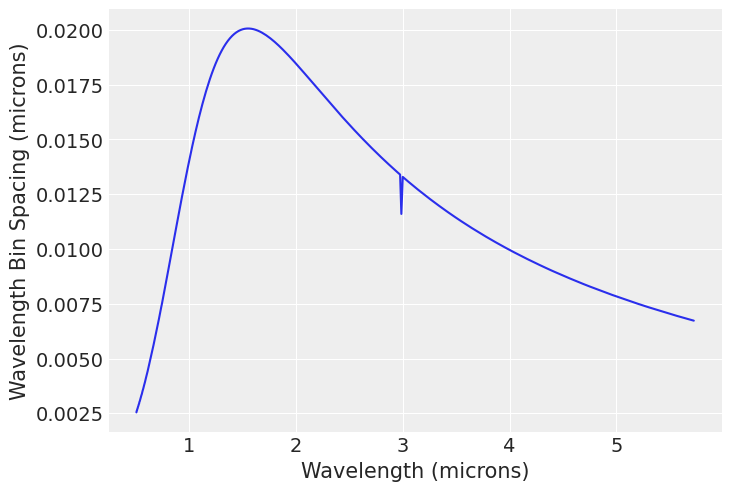

In [302]:
plt.plot(wavelength[1:], [t - s for s, t in zip(wavelength,wavelength[1:])])
plt.xlabel("Wavelength (microns)")
plt.ylabel("Wavelength Bin Spacing (microns)")
plt.show()
plt.close()

units needed to be fudged for wavelength
units needed to be fudged for wavelength_lower
units needed to be fudged for wavelength_upper
Wavelength range:  [0.50125924 0.50225924 0.50325924]
You are using the 1D limb darkening models.
Current Directories Entered:
  /Users/catrionamurray/Documents/Postdoc/CUBoulder/exotic-ld_data
  /Users/catrionamurray/Documents/Postdoc/CUBoulder/exotic-ld_data/Kurucz

Closest values to your inputs:
Teff:  5250.0
M_H:  0.0
log(g):  4.5

Limb darkening parameters:
4param 	0.00000000	0.00000000	0.00000000	0.00000000
3param 	0.00000000	0.00000000	0.00000000
Quad 	0.00000000	0.00000000
Linear 	0.00000000
Outside NIRSpec_Prism wavelength range!

Wavelength range:  [0.50378264 0.50478264 0.50578264]
You are using the 1D limb darkening models.
Current Directories Entered:
  /Users/catrionamurray/Documents/Postdoc/CUBoulder/exotic-ld_data
  /Users/catrionamurray/Documents/Postdoc/CUBoulder/exotic-ld_data/Kurucz

Closest values to your inputs:
Teff:  5250.0
M_H: 


🌈 Warning: invalid value encountered in double_scalars
🌈 Warning: invalid value encountered in double_scalars


Limb darkening parameters:
4param 	0.00000000	0.00000000	0.00000000	0.00000000
3param 	0.00000000	0.00000000	0.00000000
Quad 	0.00000000	0.00000000
Linear 	0.00000000
Outside NIRSpec_Prism wavelength range!

Wavelength range:  [0.50637479 0.50737479 0.50837479]
You are using the 1D limb darkening models.
Current Directories Entered:
  /Users/catrionamurray/Documents/Postdoc/CUBoulder/exotic-ld_data
  /Users/catrionamurray/Documents/Postdoc/CUBoulder/exotic-ld_data/Kurucz

Closest values to your inputs:
Teff:  5250.0
M_H:  0.0
log(g):  4.5



🌈 Warning: invalid value encountered in double_scalars


Limb darkening parameters:
4param 	0.00000000	0.00000000	0.00000000	0.00000000
3param 	0.00000000	0.00000000	0.00000000
Quad 	0.00000000	0.00000000
Linear 	0.00000000
Outside NIRSpec_Prism wavelength range!

Wavelength range:  [0.50897799 0.50997799 0.51097799]
You are using the 1D limb darkening models.
Current Directories Entered:
  /Users/catrionamurray/Documents/Postdoc/CUBoulder/exotic-ld_data
  /Users/catrionamurray/Documents/Postdoc/CUBoulder/exotic-ld_data/Kurucz

Closest values to your inputs:
Teff:  5250.0
M_H:  0.0
log(g):  4.5

Limb darkening parameters:
4param 	0.00000000	0.00000000	0.00000000	0.00000000
3param 	0.00000000	0.00000000	0.00000000
Quad 	0.00000000	0.00000000
Linear 	0.00000000
Outside NIRSpec_Prism wavelength range!

Wavelength range:  [0.51164755 0.51264755 0.51364755]
You are using the 1D limb darkening models.
Current Directories Entered:
  /Users/catrionamurray/Documents/Postdoc/CUBoulder/exotic-ld_data
  /Users/catrionamurray/Documents/Postdoc/CUBoulder


🌈 Warning: invalid value encountered in double_scalars


Closest values to your inputs:
Teff:  5250.0
M_H:  0.0
log(g):  4.5

Limb darkening parameters:
4param 	0.00000000	0.00000000	0.00000000	0.00000000
3param 	0.00000000	0.00000000	0.00000000
Quad 	0.00000000	0.00000000
Linear 	0.00000000
Outside NIRSpec_Prism wavelength range!

Wavelength range:  [0.51434001 0.51534001 0.51634001]
You are using the 1D limb darkening models.
Current Directories Entered:
  /Users/catrionamurray/Documents/Postdoc/CUBoulder/exotic-ld_data
  /Users/catrionamurray/Documents/Postdoc/CUBoulder/exotic-ld_data/Kurucz

Closest values to your inputs:
Teff:  5250.0
M_H:  0.0
log(g):  4.5



🌈 Warning: invalid value encountered in double_scalars
🌈 Warning: invalid value encountered in double_scalars


Limb darkening parameters:
4param 	0.00000000	0.00000000	0.00000000	0.00000000
3param 	0.00000000	0.00000000	0.00000000
Quad 	0.00000000	0.00000000
Linear 	0.00000000
Outside NIRSpec_Prism wavelength range!

Wavelength range:  [0.51708725 0.51808725 0.51908725]
You are using the 1D limb darkening models.
Current Directories Entered:
  /Users/catrionamurray/Documents/Postdoc/CUBoulder/exotic-ld_data
  /Users/catrionamurray/Documents/Postdoc/CUBoulder/exotic-ld_data/Kurucz

Closest values to your inputs:
Teff:  5250.0
M_H:  0.0
log(g):  4.5

Limb darkening parameters:
4param 	0.00000000	0.00000000	0.00000000	0.00000000
3param 	0.00000000	0.00000000	0.00000000
Quad 	0.00000000	0.00000000
Linear 	0.00000000
Outside NIRSpec_Prism wavelength range!

Wavelength range:  [0.51987453 0.52087453 0.52187453]
You are using the 1D limb darkening models.
Current Directories Entered:
  /Users/catrionamurray/Documents/Postdoc/CUBoulder/exotic-ld_data
  /Users/catrionamurray/Documents/Postdoc/CUBoulder


🌈 Warning: invalid value encountered in double_scalars
🌈 Warning: invalid value encountered in double_scalars


Limb darkening parameters:
4param 	0.00000000	0.00000000	0.00000000	0.00000000
3param 	0.00000000	0.00000000	0.00000000
Quad 	0.00000000	0.00000000
Linear 	0.00000000
Outside NIRSpec_Prism wavelength range!

Wavelength range:  [0.52270067 0.52370067 0.52470067]
You are using the 1D limb darkening models.
Current Directories Entered:
  /Users/catrionamurray/Documents/Postdoc/CUBoulder/exotic-ld_data
  /Users/catrionamurray/Documents/Postdoc/CUBoulder/exotic-ld_data/Kurucz

Closest values to your inputs:
Teff:  5250.0
M_H:  0.0
log(g):  4.5

Limb darkening parameters:
4param 	0.00000000	0.00000000	0.00000000	0.00000000
3param 	0.00000000	0.00000000	0.00000000
Quad 	0.00000000	0.00000000
Linear 	0.00000000
Outside NIRSpec_Prism wavelength range!

Wavelength range:  [0.52558811 0.52658811 0.52758811]
You are using the 1D limb darkening models.
Current Directories Entered:
  /Users/catrionamurray/Documents/Postdoc/CUBoulder/exotic-ld_data
  /Users/catrionamurray/Documents/Postdoc/CUBoulder


🌈 Warning: invalid value encountered in double_scalars
🌈 Warning: invalid value encountered in double_scalars


Closest values to your inputs:
Teff:  5250.0
M_H:  0.0
log(g):  4.5

Limb darkening parameters:
4param 	0.00000000	0.00000000	0.00000000	0.00000000
3param 	0.00000000	0.00000000	0.00000000
Quad 	0.00000000	0.00000000
Linear 	0.00000000
Outside NIRSpec_Prism wavelength range!

Wavelength range:  [0.52849773 0.52949773 0.53049773]
You are using the 1D limb darkening models.
Current Directories Entered:
  /Users/catrionamurray/Documents/Postdoc/CUBoulder/exotic-ld_data
  /Users/catrionamurray/Documents/Postdoc/CUBoulder/exotic-ld_data/Kurucz

Closest values to your inputs:
Teff:  5250.0
M_H:  0.0
log(g):  4.5



🌈 Warning: invalid value encountered in double_scalars
🌈 Warning: invalid value encountered in double_scalars


Limb darkening parameters:
4param 	0.00000000	0.00000000	0.00000000	0.00000000
3param 	0.00000000	0.00000000	0.00000000
Quad 	0.00000000	0.00000000
Linear 	0.00000000
Outside NIRSpec_Prism wavelength range!

Wavelength range:  [0.53148364 0.53248364 0.53348364 0.53448364]
You are using the 1D limb darkening models.
Current Directories Entered:
  /Users/catrionamurray/Documents/Postdoc/CUBoulder/exotic-ld_data
  /Users/catrionamurray/Documents/Postdoc/CUBoulder/exotic-ld_data/Kurucz

Closest values to your inputs:
Teff:  5250.0
M_H:  0.0
log(g):  4.5

Limb darkening parameters:
4param 	0.00000000	0.00000000	0.00000000	0.00000000
3param 	0.00000000	0.00000000	0.00000000
Quad 	0.00000000	0.00000000
Linear 	0.00000000
Outside NIRSpec_Prism wavelength range!

Wavelength range:  [0.53450644 0.53550644 0.53650644 0.53750644]
You are using the 1D limb darkening models.
Current Directories Entered:
  /Users/catrionamurray/Documents/Postdoc/CUBoulder/exotic-ld_data
  /Users/catrionamurray/Docum


🌈 Warning: invalid value encountered in double_scalars
🌈 Warning: invalid value encountered in double_scalars


Closest values to your inputs:
Teff:  5250.0
M_H:  0.0
log(g):  4.5

Limb darkening parameters:
4param 	0.00000000	0.00000000	0.00000000	0.00000000
3param 	0.00000000	0.00000000	0.00000000
Quad 	0.00000000	0.00000000
Linear 	0.00000000
Outside NIRSpec_Prism wavelength range!

Wavelength range:  [0.54071532 0.54171532 0.54271532 0.54371532]
You are using the 1D limb darkening models.
Current Directories Entered:
  /Users/catrionamurray/Documents/Postdoc/CUBoulder/exotic-ld_data
  /Users/catrionamurray/Documents/Postdoc/CUBoulder/exotic-ld_data/Kurucz

Closest values to your inputs:
Teff:  5250.0
M_H:  0.0
log(g):  4.5



🌈 Warning: invalid value encountered in double_scalars
🌈 Warning: invalid value encountered in double_scalars


Limb darkening parameters:
4param 	0.00000000	0.00000000	0.00000000	0.00000000
3param 	0.00000000	0.00000000	0.00000000
Quad 	0.00000000	0.00000000
Linear 	0.00000000
Outside NIRSpec_Prism wavelength range!

Wavelength range:  [0.54388736 0.54488736 0.54588736 0.54688736]
You are using the 1D limb darkening models.
Current Directories Entered:
  /Users/catrionamurray/Documents/Postdoc/CUBoulder/exotic-ld_data
  /Users/catrionamurray/Documents/Postdoc/CUBoulder/exotic-ld_data/Kurucz

Closest values to your inputs:
Teff:  5250.0
M_H:  0.0
log(g):  4.5

Limb darkening parameters:
4param 	0.00000000	0.00000000	0.00000000	0.00000000
3param 	0.00000000	0.00000000	0.00000000
Quad 	0.00000000	0.00000000
Linear 	0.00000000
Outside NIRSpec_Prism wavelength range!

Wavelength range:  [0.54712833 0.54812833 0.54912833 0.55012833]
You are using the 1D limb darkening models.
Current Directories Entered:
  /Users/catrionamurray/Documents/Postdoc/CUBoulder/exotic-ld_data
  /Users/catrionamurray/Docum


🌈 Warning: invalid value encountered in double_scalars
🌈 Warning: invalid value encountered in double_scalars


Limb darkening parameters:
4param 	0.00000000	0.00000000	0.00000000	0.00000000
3param 	0.00000000	0.00000000	0.00000000
Quad 	0.00000000	0.00000000
Linear 	0.00000000
Outside NIRSpec_Prism wavelength range!

Wavelength range:  [0.55377498 0.55477498 0.55577498 0.55677498]
You are using the 1D limb darkening models.
Current Directories Entered:
  /Users/catrionamurray/Documents/Postdoc/CUBoulder/exotic-ld_data
  /Users/catrionamurray/Documents/Postdoc/CUBoulder/exotic-ld_data/Kurucz

Closest values to your inputs:
Teff:  5250.0
M_H:  0.0
log(g):  4.5

Limb darkening parameters:
4param 	0.00000000	0.00000000	0.00000000	0.00000000
3param 	0.00000000	0.00000000	0.00000000
Quad 	0.00000000	0.00000000
Linear 	0.00000000
Outside NIRSpec_Prism wavelength range!

Wavelength range:  [0.557191 0.558191 0.559191 0.560191]
You are using the 1D limb darkening models.
Current Directories Entered:
  /Users/catrionamurray/Documents/Postdoc/CUBoulder/exotic-ld_data
  /Users/catrionamurray/Documents/Pos


🌈 Warning: invalid value encountered in double_scalars
🌈 Warning: invalid value encountered in double_scalars


M_H:  0.0
log(g):  4.5

Limb darkening parameters:
4param 	0.00000000	0.00000000	0.00000000	0.00000000
3param 	0.00000000	0.00000000	0.00000000
Quad 	0.00000000	0.00000000
Linear 	0.00000000
Outside NIRSpec_Prism wavelength range!

Wavelength range:  [0.56067562 0.56167562 0.56267562 0.56367562]
You are using the 1D limb darkening models.
Current Directories Entered:
  /Users/catrionamurray/Documents/Postdoc/CUBoulder/exotic-ld_data
  /Users/catrionamurray/Documents/Postdoc/CUBoulder/exotic-ld_data/Kurucz

Closest values to your inputs:
Teff:  5250.0
M_H:  0.0
log(g):  4.5

Limb darkening parameters:
4param 	0.00000000	0.00000000	0.00000000	0.00000000
3param 	0.00000000	0.00000000	0.00000000
Quad 	0.00000000	0.00000000
Linear 	0.00000000
Outside NIRSpec_Prism wavelength range!

Wavelength range:  [0.5642131 0.5652131 0.5662131 0.5672131]
You are using the 1D limb darkening models.
Current Directories Entered:
  /Users/catrionamurray/Documents/Postdoc/CUBoulder/exotic-ld_data
  /Users/


🌈 Warning: invalid value encountered in double_scalars
🌈 Warning: invalid value encountered in double_scalars


Closest values to your inputs:
Teff:  5250.0
M_H:  0.0
log(g):  4.5

Limb darkening parameters:
4param 	0.00000000	0.00000000	0.00000000	0.00000000
3param 	0.00000000	0.00000000	0.00000000
Quad 	0.00000000	0.00000000
Linear 	0.00000000
Outside NIRSpec_Prism wavelength range!

Wavelength range:  [0.56780934 0.56880934 0.56980934 0.57080934]
You are using the 1D limb darkening models.
Current Directories Entered:
  /Users/catrionamurray/Documents/Postdoc/CUBoulder/exotic-ld_data
  /Users/catrionamurray/Documents/Postdoc/CUBoulder/exotic-ld_data/Kurucz

Closest values to your inputs:
Teff:  5250.0
M_H:  0.0
log(g):  4.5



🌈 Warning: invalid value encountered in double_scalars
🌈 Warning: invalid value encountered in double_scalars


Limb darkening parameters:
4param 	0.00000000	0.00000000	0.00000000	0.00000000
3param 	0.00000000	0.00000000	0.00000000
Quad 	0.00000000	0.00000000
Linear 	0.00000000
Outside NIRSpec_Prism wavelength range!

Wavelength range:  [0.5714909 0.5724909 0.5734909 0.5744909]
You are using the 1D limb darkening models.
Current Directories Entered:
  /Users/catrionamurray/Documents/Postdoc/CUBoulder/exotic-ld_data
  /Users/catrionamurray/Documents/Postdoc/CUBoulder/exotic-ld_data/Kurucz

Closest values to your inputs:
Teff:  5250.0
M_H:  0.0
log(g):  4.5

Limb darkening parameters:
4param 	0.00000000	0.00000000	0.00000000	0.00000000
3param 	0.00000000	0.00000000	0.00000000
Quad 	0.00000000	0.00000000
Linear 	0.00000000
Outside NIRSpec_Prism wavelength range!

Wavelength range:  [0.57523939 0.57623939 0.57723939 0.57823939]
You are using the 1D limb darkening models.
Current Directories Entered:
  /Users/catrionamurray/Documents/Postdoc/CUBoulder/exotic-ld_data
  /Users/catrionamurray/Documents


🌈 Warning: invalid value encountered in double_scalars
🌈 Warning: invalid value encountered in double_scalars


Limb darkening parameters:
4param 	0.00000000	0.00000000	0.00000000	0.00000000
3param 	0.00000000	0.00000000	0.00000000
Quad 	0.00000000	0.00000000
Linear 	0.00000000
Outside NIRSpec_Prism wavelength range!

Wavelength range:  [0.5790507 0.5800507 0.5810507 0.5820507]
You are using the 1D limb darkening models.
Current Directories Entered:
  /Users/catrionamurray/Documents/Postdoc/CUBoulder/exotic-ld_data
  /Users/catrionamurray/Documents/Postdoc/CUBoulder/exotic-ld_data/Kurucz

Closest values to your inputs:
Teff:  5250.0
M_H:  0.0
log(g):  4.5

Limb darkening parameters:
4param 	0.00000000	0.00000000	0.00000000	0.00000000
3param 	0.00000000	0.00000000	0.00000000
Quad 	0.00000000	0.00000000
Linear 	0.00000000
Outside NIRSpec_Prism wavelength range!

Wavelength range:  [0.58292949 0.58392949 0.58492949 0.58592949]
You are using the 1D limb darkening models.
Current Directories Entered:
  /Users/catrionamurray/Documents/Postdoc/CUBoulder/exotic-ld_data
  /Users/catrionamurray/Documents


🌈 Warning: invalid value encountered in double_scalars
🌈 Warning: invalid value encountered in double_scalars


Limb darkening parameters:
4param 	0.00000000	0.00000000	0.00000000	0.00000000
3param 	0.00000000	0.00000000	0.00000000
Quad 	0.00000000	0.00000000
Linear 	0.00000000
Outside NIRSpec_Prism wavelength range!

Wavelength range:  [0.58689837 0.58789837 0.58889837 0.58989837 0.59089837]
You are using the 1D limb darkening models.
Current Directories Entered:
  /Users/catrionamurray/Documents/Postdoc/CUBoulder/exotic-ld_data
  /Users/catrionamurray/Documents/Postdoc/CUBoulder/exotic-ld_data/Kurucz

Closest values to your inputs:
Teff:  5250.0
M_H:  0.0
log(g):  4.5

Limb darkening parameters:
4param 	0.00000000	0.00000000	0.00000000	0.00000000
3param 	0.00000000	0.00000000	0.00000000
Quad 	0.00000000	0.00000000
Linear 	0.00000000
Outside NIRSpec_Prism wavelength range!

Wavelength range:  [0.5909467 0.5919467 0.5929467 0.5939467 0.5949467]
You are using the 1D limb darkening models.
Current Directories Entered:
  /Users/catrionamurray/Documents/Postdoc/CUBoulder/exotic-ld_data
  /Users/cat


🌈 Warning: invalid value encountered in double_scalars
🌈 Warning: invalid value encountered in double_scalars


Limb darkening parameters:
4param 	0.00000000	0.00000000	0.00000000	0.00000000
3param 	0.00000000	0.00000000	0.00000000
Quad 	0.00000000	0.00000000
Linear 	0.00000000
Outside NIRSpec_Prism wavelength range!

Wavelength range:  [0.59507158 0.59607158 0.59707158 0.59807158 0.59907158]
You are using the 1D limb darkening models.
Current Directories Entered:
  /Users/catrionamurray/Documents/Postdoc/CUBoulder/exotic-ld_data
  /Users/catrionamurray/Documents/Postdoc/CUBoulder/exotic-ld_data/Kurucz

Closest values to your inputs:
Teff:  5250.0
M_H:  0.0
log(g):  4.5

Limb darkening parameters:
4param 	0.00000000	0.00000000	0.00000000	0.00000000
3param 	0.00000000	0.00000000	0.00000000
Quad 	0.00000000	0.00000000
Linear 	0.00000000
Outside NIRSpec_Prism wavelength range!

Wavelength range:  [0.59927613 0.60027613 0.60127613 0.60227613 0.60327613]
You are using the 1D limb darkening models.
Current Directories Entered:
  /Users/catrionamurray/Documents/Postdoc/CUBoulder/exotic-ld_data
  /User


Closest values to your inputs:
Teff:  5250.0
M_H:  0.0
log(g):  4.5

Limb darkening parameters:
4param 	0.70784419	-0.63975976	1.32688897	-0.61109674
3param 	1.70169933	-1.63736908	0.65512820
Quad 	0.42658170	0.26686227
Linear 	0.65266447
Using quadratic LD equation

Wavelength range:  [0.66848414 0.66948414 0.67048414 0.67148414 0.67248414 0.67348414]
You are using the 1D limb darkening models.
Current Directories Entered:
  /Users/catrionamurray/Documents/Postdoc/CUBoulder/exotic-ld_data
  /Users/catrionamurray/Documents/Postdoc/CUBoulder/exotic-ld_data/Kurucz

Closest values to your inputs:
Teff:  5250.0
M_H:  0.0
log(g):  4.5

Limb darkening parameters:
4param 	0.68561997	-0.57637979	1.25168136	-0.58030510
3param 	1.69156436	-1.61950769	0.64616410
Quad 	0.42672130	0.26576876
Linear 	0.65187766
Using quadratic LD equation

Wavelength range:  [0.67430539 0.67530539 0.67630539 0.67730539 0.67830539 0.67930539]
You are using the 1D limb darkening models.
Current Directories Entered:
 


Limb darkening parameters:
4param 	0.76387838	-0.75238305	1.28143348	-0.56752355
3param 	1.77443004	-1.91748042	0.79893798
Quad 	0.34464157	0.28078114
Linear 	0.58251625
Using quadratic LD equation

Wavelength range:  [0.77254812 0.77354812 0.77454812 0.77554812 0.77654812 0.77754812
 0.77854812 0.77954812 0.78054812]
You are using the 1D limb darkening models.
Current Directories Entered:
  /Users/catrionamurray/Documents/Postdoc/CUBoulder/exotic-ld_data
  /Users/catrionamurray/Documents/Postdoc/CUBoulder/exotic-ld_data/Kurucz

Closest values to your inputs:
Teff:  5250.0
M_H:  0.0
log(g):  4.5

Limb darkening parameters:
4param 	0.74069592	-0.68813525	1.21181472	-0.54183848
3param 	1.76199318	-1.89001736	0.78315317
Quad 	0.34399874	0.28110169
Linear 	0.58214499
Using quadratic LD equation

Wavelength range:  [0.7809902 0.7819902 0.7829902 0.7839902 0.7849902 0.7859902 0.7869902
 0.7879902 0.7889902]
You are using the 1D limb darkening models.
Current Directories Entered:
  /Users/ca


Limb darkening parameters:
4param 	0.70954113	-0.58093959	0.99716650	-0.45380761
3param 	1.76613274	-1.97419785	0.81545290
Quad 	0.27981840	0.29620338
Linear 	0.53075863
Using quadratic LD equation

Wavelength range:  [0.91385135 0.91485135 0.91585135 0.91685135 0.91785135 0.91885135
 0.91985135 0.92085135 0.92185135 0.92285135 0.92385135 0.92485135
 0.92585135]
You are using the 1D limb darkening models.
Current Directories Entered:
  /Users/catrionamurray/Documents/Postdoc/CUBoulder/exotic-ld_data
  /Users/catrionamurray/Documents/Postdoc/CUBoulder/exotic-ld_data/Kurucz

Closest values to your inputs:
Teff:  5250.0
M_H:  0.0
log(g):  4.5

Limb darkening parameters:
4param 	0.76416405	-0.77662142	1.19451797	-0.52240483
3param 	1.75113663	-2.00559225	0.84456773
Quad 	0.27348079	0.28476651
Linear 	0.51473183
Using quadratic LD equation

Wavelength range:  [0.92608757 0.92708757 0.92808757 0.92908757 0.93008757 0.93108757
 0.93208757 0.93308757 0.93408757 0.93508757 0.93608757 0.9370875


Closest values to your inputs:
Teff:  5250.0
M_H:  0.0
log(g):  4.5

Limb darkening parameters:
4param 	0.67898502	-0.51468924	0.82826156	-0.37974120
3param 	1.73130737	-2.01514217	0.83485911
Quad 	0.21915515	0.29985262
Linear 	0.47318697
Using quadratic LD equation

Wavelength range:  [1.11482719 1.11582719 1.11682719 1.11782719 1.11882719 1.11982719
 1.12082719 1.12182719 1.12282719 1.12382719 1.12482719 1.12582719
 1.12682719 1.12782719 1.12882719 1.12982719 1.13082719]
You are using the 1D limb darkening models.
Current Directories Entered:
  /Users/catrionamurray/Documents/Postdoc/CUBoulder/exotic-ld_data
  /Users/catrionamurray/Documents/Postdoc/CUBoulder/exotic-ld_data/Kurucz

Closest values to your inputs:
Teff:  5250.0
M_H:  0.0
log(g):  4.5

Limb darkening parameters:
4param 	0.69112582	-0.55492609	0.86556227	-0.40076233
3param 	1.73123072	-2.02868378	0.83555599
Quad 	0.19909034	0.30678091
Linear 	0.45899174
Using quadratic LD equation

Wavelength range:  [1.13159215 1.13259


Closest values to your inputs:
Teff:  5250.0
M_H:  0.0
log(g):  4.5

Limb darkening parameters:
4param 	0.57466892	-0.05548154	0.22241599	-0.15395838
3param 	1.84545058	-2.18414041	0.87403638
Quad 	0.14480797	0.35583701
Linear 	0.44626916
Using quadratic LD equation

Wavelength range:  [1.35213789 1.35313789 1.35413789 1.35513789 1.35613789 1.35713789
 1.35813789 1.35913789 1.36013789 1.36113789 1.36213789 1.36313789
 1.36413789 1.36513789 1.36613789 1.36713789 1.36813789 1.36913789
 1.37013789 1.37113789]
You are using the 1D limb darkening models.
Current Directories Entered:
  /Users/catrionamurray/Documents/Postdoc/CUBoulder/exotic-ld_data
  /Users/catrionamurray/Documents/Postdoc/CUBoulder/exotic-ld_data/Kurucz

Closest values to your inputs:
Teff:  5250.0
M_H:  0.0
log(g):  4.5

Limb darkening parameters:
4param 	0.53941096	0.09547428	0.03217948	-0.07896660
3param 	1.87977752	-2.22672621	0.88595706
Quad 	0.13573412	0.36789608
Linear 	0.44741161
Using quadratic LD equation

Wavel


Closest values to your inputs:
Teff:  5250.0
M_H:  0.0
log(g):  4.5

Limb darkening parameters:
4param 	0.69564936	0.11609509	-0.39549929	0.16510644
3param 	2.41721520	-3.30868870	1.40951669
Quad 	0.01189326	0.45358156
Linear 	0.39616255
Using quadratic LD equation

Wavelength range:  [1.6111787 1.6121787 1.6131787 1.6141787 1.6151787 1.6161787 1.6171787
 1.6181787 1.6191787 1.6201787 1.6211787 1.6221787 1.6231787 1.6241787
 1.6251787 1.6261787 1.6271787 1.6281787 1.6291787 1.6301787]
You are using the 1D limb darkening models.
Current Directories Entered:
  /Users/catrionamurray/Documents/Postdoc/CUBoulder/exotic-ld_data
  /Users/catrionamurray/Documents/Postdoc/CUBoulder/exotic-ld_data/Kurucz

Closest values to your inputs:
Teff:  5250.0
M_H:  0.0
log(g):  4.5

Limb darkening parameters:
4param 	0.76370387	0.02550316	-0.39415487	0.18692830
3param 	2.55173898	-3.59233796	1.55307765
Quad 	-0.01433773	0.46974141
Linear 	0.38362201
Using quadratic LD equation

Wavelength range:  [1.6311


Limb darkening parameters:
4param 	0.70060937	0.01560765	-0.32720664	0.15406235
3param 	2.33313486	-3.26116723	1.40734530
Quad 	-0.00149438	0.42899396
Linear 	0.36194457
Using quadratic LD equation

Wavelength range:  [1.86619627 1.86719627 1.86819627 1.86919627 1.87019627 1.87119627
 1.87219627 1.87319627 1.87419627 1.87519627 1.87619627 1.87719627
 1.87819627 1.87919627 1.88019627 1.88119627 1.88219627 1.88319627
 1.88419627 1.88519627]
You are using the 1D limb darkening models.
Current Directories Entered:
  /Users/catrionamurray/Documents/Postdoc/CUBoulder/exotic-ld_data
  /Users/catrionamurray/Documents/Postdoc/CUBoulder/exotic-ld_data/Kurucz

Closest values to your inputs:
Teff:  5250.0
M_H:  0.0
log(g):  4.5

Limb darkening parameters:
4param 	0.77631821	-0.18484379	-0.19330771	0.10818708
3param 	2.38311869	-3.44431624	1.49690156
Quad 	-0.06158676	0.44256756
Linear 	0.31335159
Using quadratic LD equation

Wavelength range:  [1.8852514 1.8862514 1.8872514 1.8882514 1.8892514 1.


Limb darkening parameters:
4param 	0.64712455	-0.06534741	-0.14857002	0.06862717
3param 	2.07525878	-2.85855080	1.22623396
Quad 	0.01413040	0.38339495
Linear 	0.33893837
Using quadratic LD equation

Wavelength range:  [2.08837628 2.08937628 2.09037628 2.09137628 2.09237628 2.09337628
 2.09437628 2.09537628 2.09637628 2.09737628 2.09837628 2.09937628
 2.10037628 2.10137628 2.10237628 2.10337628 2.10437628 2.10537628]
You are using the 1D limb darkening models.
Current Directories Entered:
  /Users/catrionamurray/Documents/Postdoc/CUBoulder/exotic-ld_data
  /Users/catrionamurray/Documents/Postdoc/CUBoulder/exotic-ld_data/Kurucz

Closest values to your inputs:
Teff:  5250.0
M_H:  0.0
log(g):  4.5

Limb darkening parameters:
4param 	0.63826178	-0.03053340	-0.20981114	0.10133268
3param 	2.08075587	-2.88267706	1.24308534
Quad 	0.01523535	0.38012889
Linear 	0.33727635
Using quadratic LD equation

Wavelength range:  [2.10623866 2.10723866 2.10823866 2.10923866 2.11023866 2.11123866
 2.1122386


Closest values to your inputs:
Teff:  5250.0
M_H:  0.0
log(g):  4.5

Limb darkening parameters:
4param 	0.59787161	-0.06064449	-0.14049599	0.06710562
3param 	1.91703919	-2.64421890	1.13660644
Quad 	0.01508168	0.35233376
Linear 	0.31357495
Using quadratic LD equation

Wavelength range:  [2.29618096 2.29718096 2.29818096 2.29918096 2.30018096 2.30118096
 2.30218096 2.30318096 2.30418096 2.30518096 2.30618096 2.30718096
 2.30818096 2.30918096 2.31018096 2.31118096 2.31218096]
You are using the 1D limb darkening models.
Current Directories Entered:
  /Users/catrionamurray/Documents/Postdoc/CUBoulder/exotic-ld_data
  /Users/catrionamurray/Documents/Postdoc/CUBoulder/exotic-ld_data/Kurucz

Closest values to your inputs:
Teff:  5250.0
M_H:  0.0
log(g):  4.5

Limb darkening parameters:
4param 	0.63524829	-0.19531891	0.06991481	-0.02869160
3param 	1.90600212	-2.59033145	1.10767039
Quad 	0.03125976	0.35092618
Linear 	0.32856054
Using quadratic LD equation

Wavelength range:  [2.3128705 2.313870


Closest values to your inputs:
Teff:  5250.0
M_H:  0.0
log(g):  4.5

Limb darkening parameters:
4param 	0.63432790	-0.32915258	0.27680563	-0.12115854
3param 	1.76912389	-2.37958625	1.01355700
Quad 	0.03891731	0.32637051
Linear 	0.31541480
Using quadratic LD equation

Wavelength range:  [2.50615013 2.50715013 2.50815013 2.50915013 2.51015013 2.51115013
 2.51215013 2.51315013 2.51415013 2.51515013 2.51615013 2.51715013
 2.51815013 2.51915013 2.52015013 2.52115013]
You are using the 1D limb darkening models.
Current Directories Entered:
  /Users/catrionamurray/Documents/Postdoc/CUBoulder/exotic-ld_data
  /Users/catrionamurray/Documents/Postdoc/CUBoulder/exotic-ld_data/Kurucz

Closest values to your inputs:
Teff:  5250.0
M_H:  0.0
log(g):  4.5

Limb darkening parameters:
4param 	0.64299112	-0.39451440	0.39083073	-0.17381427
3param 	1.73241892	-2.30184037	0.97639845
Quad 	0.05065450	0.31975092
Linear 	0.32154394
Using quadratic LD equation

Wavelength range:  [2.52170169 2.52270169 2.52370


Limb darkening parameters:
4param 	0.59781151	-0.30637086	0.25758860	-0.11355868
3param 	1.67111403	-2.24588264	0.95583463
Quad 	0.03657813	0.30880535
Linear 	0.29819462
Using quadratic LD equation

Wavelength range:  [2.70224965 2.70324965 2.70424965 2.70524965 2.70624965 2.70724965
 2.70824965 2.70924965 2.71024965 2.71124965 2.71224965 2.71324965
 2.71424965 2.71524965 2.71624965]
You are using the 1D limb darkening models.
Current Directories Entered:
  /Users/catrionamurray/Documents/Postdoc/CUBoulder/exotic-ld_data
  /Users/catrionamurray/Documents/Postdoc/CUBoulder/exotic-ld_data/Kurucz

Closest values to your inputs:
Teff:  5250.0
M_H:  0.0
log(g):  4.5

Limb darkening parameters:
4param 	0.60110957	-0.33086043	0.28158557	-0.12113970
3param 	1.65753402	-2.23569704	0.95415333
Quad 	0.03571839	0.30475122
Linear 	0.29390025
Using quadratic LD equation

Wavelength range:  [2.71681571 2.71781571 2.71881571 2.71981571 2.72081571 2.72181571
 2.72281571 2.72381571 2.72481571 2.7258157


Limb darkening parameters:
4param 	0.57674342	-0.33852020	0.29282739	-0.12195688
3param 	1.56927411	-2.12241645	0.90974884
Quad 	0.03751735	0.28536824
Linear 	0.27927817
Using quadratic LD equation

Wavelength range:  [2.90009534 2.90109534 2.90209534 2.90309534 2.90409534 2.90509534
 2.90609534 2.90709534 2.90809534 2.90909534 2.91009534 2.91109534
 2.91209534 2.91309534]
You are using the 1D limb darkening models.
Current Directories Entered:
  /Users/catrionamurray/Documents/Postdoc/CUBoulder/exotic-ld_data
  /Users/catrionamurray/Documents/Postdoc/CUBoulder/exotic-ld_data/Kurucz

Closest values to your inputs:
Teff:  5250.0
M_H:  0.0
log(g):  4.5

Limb darkening parameters:
4param 	0.56954087	-0.31794080	0.26326587	-0.10729843
3param 	1.56602836	-2.12181563	0.91152302
Quad 	0.03876864	0.28325575
Linear 	0.27873978
Using quadratic LD equation

Wavelength range:  [2.9137522 2.9147522 2.9157522 2.9167522 2.9177522 2.9187522 2.9197522
 2.9207522 2.9217522 2.9227522 2.9237522 2.9247522


Limb darkening parameters:
4param 	0.55255973	-0.33670991	0.28891437	-0.11443868
3param 	1.49108781	-2.02505480	0.87400613
Quad 	0.04157779	0.26628733
Linear 	0.26717347
Using quadratic LD equation

Wavelength range:  [3.08440411 3.08540411 3.08640411 3.08740411 3.08840411 3.08940411
 3.09040411 3.09140411 3.09240411 3.09340411 3.09440411 3.09540411
 3.09640411]
You are using the 1D limb darkening models.
Current Directories Entered:
  /Users/catrionamurray/Documents/Postdoc/CUBoulder/exotic-ld_data
  /Users/catrionamurray/Documents/Postdoc/CUBoulder/exotic-ld_data/Kurucz

Closest values to your inputs:
Teff:  5250.0
M_H:  0.0
log(g):  4.5

Limb darkening parameters:
4param 	0.51900355	-0.22043120	0.10366374	-0.01781376
3param 	1.49636691	-2.06978129	0.91060416
Quad 	0.04943071	0.25487444
Linear 	0.26535752
Using quadratic LD equation

Wavelength range:  [3.09728873 3.09828873 3.09928873 3.10028873 3.10128873 3.10228873
 3.10328873 3.10428873 3.10528873 3.10628873 3.10728873 3.1082887


🌈 Warning: invalid value encountered in double_scalars


Limb darkening parameters:
4param 	0.54727769	-0.38017983	0.35016651	-0.14000639
3param 	1.43014555	-1.94168288	0.83898964
Quad 	0.04224520	0.25435770
Linear 	0.25773423
Using quadratic LD equation

Wavelength range:  [3.23573983 3.23673983 3.23773983 3.23873983 3.23973983 3.24073983
 3.24173983 3.24273983 3.24373983 3.24473983 3.24573983 3.24673983
 3.24773983]
You are using the 1D limb darkening models.
Current Directories Entered:
  /Users/catrionamurray/Documents/Postdoc/CUBoulder/exotic-ld_data
  /Users/catrionamurray/Documents/Postdoc/CUBoulder/exotic-ld_data/Kurucz

Closest values to your inputs:
Teff:  5250.0
M_H:  0.0
log(g):  4.5

Limb darkening parameters:
4param 	0.00000000	0.00000000	0.00000000	0.00000000
3param 	0.00000000	0.00000000	0.00000000
Quad 	0.00000000	0.00000000
Linear 	0.00000000
There may be an issue with grid spacing!

Wavelength range:  [3.24804103 3.24904103 3.25004103 3.25104103 3.25204103 3.25304103
 3.25404103 3.25504103 3.25604103 3.25704103 3.25804103


🌈 Warning: invalid value encountered in double_scalars


Limb darkening parameters:
4param 	0.54616784	-0.38362694	0.35158659	-0.13889872
3param 	1.42302720	-1.93561507	0.83811197
Quad 	0.04295246	0.25181863
Linear 	0.25629043
Using quadratic LD equation

Wavelength range:  [3.26029694 3.26129694 3.26229694 3.26329694 3.26429694 3.26529694
 3.26629694 3.26729694 3.26829694 3.26929694 3.27029694 3.27129694
 3.27229694]
You are using the 1D limb darkening models.
Current Directories Entered:
  /Users/catrionamurray/Documents/Postdoc/CUBoulder/exotic-ld_data
  /Users/catrionamurray/Documents/Postdoc/CUBoulder/exotic-ld_data/Kurucz

Closest values to your inputs:
Teff:  5250.0
M_H:  0.0
log(g):  4.5

Limb darkening parameters:
4param 	0.54010401	-0.36919304	0.32852111	-0.12634923
3param 	1.41740273	-1.93328688	0.83981419
Quad 	0.04440860	0.24880542
Linear 	0.25519380
Using quadratic LD equation

Wavelength range:  [3.27250719 3.27350719 3.27450719 3.27550719 3.27650719 3.27750719
 3.27850719 3.27950719 3.28050719 3.28150719 3.28250719 3.2835071


🌈 Warning: invalid value encountered in double_scalars


Limb darkening parameters:
4param 	0.00000000	0.00000000	0.00000000	0.00000000
3param 	0.00000000	0.00000000	0.00000000
Quad 	0.00000000	0.00000000
Linear 	0.00000000
There may be an issue with grid spacing!

Wavelength range:  [3.28467333 3.28567333 3.28667333 3.28767333 3.28867333 3.28967333
 3.29067333 3.29167333 3.29267333 3.29367333 3.29467333 3.29567333
 3.29667333]
You are using the 1D limb darkening models.
Current Directories Entered:
  /Users/catrionamurray/Documents/Postdoc/CUBoulder/exotic-ld_data
  /Users/catrionamurray/Documents/Postdoc/CUBoulder/exotic-ld_data/Kurucz

Closest values to your inputs:
Teff:  5250.0
M_H:  0.0
log(g):  4.5

Limb darkening parameters:
4param 	0.54887259	-0.39179450	0.34945445	-0.13921917
3param 	1.42380663	-1.94907398	0.84262991
Quad 	0.03151642	0.25487930
Linear 	0.24744735
Using quadratic LD equation

Wavelength range:  [3.29679501 3.29779501 3.29879501 3.29979501 3.30079501 3.30179501
 3.30279501 3.30379501 3.30479501 3.30579501 3.30679501


🌈 Warning: invalid value encountered in double_scalars


Limb darkening parameters:
4param 	0.00000000	0.00000000	0.00000000	0.00000000
3param 	0.00000000	0.00000000	0.00000000
Quad 	0.00000000	0.00000000
Linear 	0.00000000
There may be an issue with grid spacing!

Wavelength range:  [3.30887306 3.30987306 3.31087306 3.31187306 3.31287306 3.31387306
 3.31487306 3.31587306 3.31687306 3.31787306 3.31887306 3.31987306
 3.32087306]
You are using the 1D limb darkening models.
Current Directories Entered:
  /Users/catrionamurray/Documents/Postdoc/CUBoulder/exotic-ld_data
  /Users/catrionamurray/Documents/Postdoc/CUBoulder/exotic-ld_data/Kurucz

Closest values to your inputs:
Teff:  5250.0
M_H:  0.0
log(g):  4.5

Limb darkening parameters:
4param 	0.54247253	-0.39244828	0.36297205	-0.14402372
3param 	1.40198225	-1.90875466	0.82637663
Quad 	0.04084889	0.24842907
Linear 	0.25131526
Using quadratic LD equation

Wavelength range:  [3.32090741 3.32190741 3.32290741 3.32390741 3.32490741 3.32590741
 3.32690741 3.32790741 3.32890741 3.32990741 3.33090741


🌈 Warning: invalid value encountered in double_scalars


Limb darkening parameters:
4param 	0.53489790	-0.37595274	0.33215194	-0.12415906
3param 	1.39342187	-1.90785428	0.83269142
Quad 	0.04633978	0.24160728
Linear 	0.25102680
Using quadratic LD equation

Wavelength range:  [3.3567555 3.3577555 3.3587555 3.3597555 3.3607555 3.3617555 3.3627555
 3.3637555 3.3647555 3.3657555 3.3667555 3.3677555]
You are using the 1D limb darkening models.
Current Directories Entered:
  /Users/catrionamurray/Documents/Postdoc/CUBoulder/exotic-ld_data
  /Users/catrionamurray/Documents/Postdoc/CUBoulder/exotic-ld_data/Kurucz

Closest values to your inputs:
Teff:  5250.0
M_H:  0.0
log(g):  4.5

Limb darkening parameters:
4param 	0.00000000	0.00000000	0.00000000	0.00000000
3param 	0.00000000	0.00000000	0.00000000
Quad 	0.00000000	0.00000000
Linear 	0.00000000
There may be an issue with grid spacing!

Wavelength range:  [3.36862075 3.36962075 3.37062075 3.37162075 3.37262075 3.37362075
 3.37462075 3.37562075 3.37662075 3.37762075 3.37862075 3.37962075]
You are usi


🌈 Warning: invalid value encountered in double_scalars


Limb darkening parameters:
4param 	0.53831112	-0.39584915	0.35995648	-0.13732114
3param 	1.38481596	-1.89434338	0.82563508
Quad 	0.04495463	0.24105574
Linear 	0.24917439
Using quadratic LD equation

Wavelength range:  [3.38044441 3.38144441 3.38244441 3.38344441 3.38444441 3.38544441
 3.38644441 3.38744441 3.38844441 3.38944441 3.39044441 3.39144441]
You are using the 1D limb darkening models.
Current Directories Entered:
  /Users/catrionamurray/Documents/Postdoc/CUBoulder/exotic-ld_data
  /Users/catrionamurray/Documents/Postdoc/CUBoulder/exotic-ld_data/Kurucz

Closest values to your inputs:
Teff:  5250.0
M_H:  0.0
log(g):  4.5

Limb darkening parameters:
4param 	0.53963745	-0.41304652	0.38716239	-0.15120400
3param 	1.37200593	-1.87269178	0.81412482
Quad 	0.04331154	0.24037414
Linear 	0.24695385
Using quadratic LD equation

Wavelength range:  [3.39222717 3.39322717 3.39422717 3.39522717 3.39622717 3.39722717
 3.39822717 3.39922717 3.40022717 3.40122717 3.40222717 3.40322717]
You are u


🌈 Warning: invalid value encountered in double_scalars


Limb darkening parameters:
4param 	0.00000000	0.00000000	0.00000000	0.00000000
3param 	0.00000000	0.00000000	0.00000000
Quad 	0.00000000	0.00000000
Linear 	0.00000000
There may be an issue with grid spacing!

Wavelength range:  [3.40396988 3.40496988 3.40596988 3.40696988 3.40796988 3.40896988
 3.40996988 3.41096988 3.41196988 3.41296988 3.41396988 3.41496988]
You are using the 1D limb darkening models.
Current Directories Entered:
  /Users/catrionamurray/Documents/Postdoc/CUBoulder/exotic-ld_data
  /Users/catrionamurray/Documents/Postdoc/CUBoulder/exotic-ld_data/Kurucz

Closest values to your inputs:
Teff:  5250.0
M_H:  0.0
log(g):  4.5

Limb darkening parameters:
4param 	0.53706010	-0.41271791	0.38522950	-0.14898527
3param 	1.36380898	-1.86383143	0.81173306
Quad 	0.04432141	0.23777670
Linear 	0.24576320
Using quadratic LD equation

Wavelength range:  [3.41567206 3.41667206 3.41767206 3.41867206 3.41967206 3.42067206
 3.42167206 3.42267206 3.42367206 3.42467206 3.42567206 3.42667206]


🌈 Warning: invalid value encountered in double_scalars


Limb darkening parameters:
4param 	0.00000000	0.00000000	0.00000000	0.00000000
3param 	0.00000000	0.00000000	0.00000000
Quad 	0.00000000	0.00000000
Linear 	0.00000000
There may be an issue with grid spacing!

Wavelength range:  [3.42733365 3.42833365 3.42933365 3.43033365 3.43133365 3.43233365
 3.43333365 3.43433365 3.43533365 3.43633365 3.43733365 3.43833365]
You are using the 1D limb darkening models.
Current Directories Entered:
  /Users/catrionamurray/Documents/Postdoc/CUBoulder/exotic-ld_data
  /Users/catrionamurray/Documents/Postdoc/CUBoulder/exotic-ld_data/Kurucz

Closest values to your inputs:
Teff:  5250.0
M_H:  0.0
log(g):  4.5

Limb darkening parameters:
4param 	0.53437838	-0.40251872	0.37121292	-0.14204316
3param 	1.36513737	-1.86661769	0.81387798
Quad 	0.04554019	0.23720070
Linear 	0.24649400
Using quadratic LD equation

Wavelength range:  [3.43895674 3.43995674 3.44095674 3.44195674 3.44295674 3.44395674
 3.44495674 3.44595674 3.44695674 3.44795674 3.44895674 3.44995674]


🌈 Warning: invalid value encountered in double_scalars


Limb darkening parameters:
4param 	0.52945000	-0.39532207	0.35989667	-0.13563933
3param 	1.35603157	-1.85729523	0.81146569
Quad 	0.04632979	0.23436358
Linear 	0.24488002
Using quadratic LD equation

Wavelength range:  [3.47359145 3.47459145 3.47559145 3.47659145 3.47759145 3.47859145
 3.47959145 3.48059145 3.48159145 3.48259145 3.48359145 3.48459145]
You are using the 1D limb darkening models.
Current Directories Entered:
  /Users/catrionamurray/Documents/Postdoc/CUBoulder/exotic-ld_data
  /Users/catrionamurray/Documents/Postdoc/CUBoulder/exotic-ld_data/Kurucz

Closest values to your inputs:
Teff:  5250.0
M_H:  0.0
log(g):  4.5

Limb darkening parameters:
4param 	0.00000000	0.00000000	0.00000000	0.00000000
3param 	0.00000000	0.00000000	0.00000000
Quad 	0.00000000	0.00000000
Linear 	0.00000000
There may be an issue with grid spacing!

Wavelength range:  [3.48505998 3.48605998 3.48705998 3.48805998 3.48905998 3.49005998
 3.49105998 3.49205998 3.49305998 3.49405998 3.49505998 3.49605998]


🌈 Warning: invalid value encountered in double_scalars


Limb darkening parameters:
4param 	0.53314294	-0.41432963	0.38736886	-0.14886839
3param 	1.34923979	-1.84528808	0.80484274
Quad 	0.04525118	0.23422539
Linear 	0.24368434
Using quadratic LD equation

Wavelength range:  [3.49648988 3.49748988 3.49848988 3.49948988 3.50048988 3.50148988
 3.50248988 3.50348988 3.50448988 3.50548988 3.50648988 3.50748988]
You are using the 1D limb darkening models.
Current Directories Entered:
  /Users/catrionamurray/Documents/Postdoc/CUBoulder/exotic-ld_data
  /Users/catrionamurray/Documents/Postdoc/CUBoulder/exotic-ld_data/Kurucz

Closest values to your inputs:
Teff:  5250.0
M_H:  0.0
log(g):  4.5

Limb darkening parameters:
4param 	0.00000000	0.00000000	0.00000000	0.00000000
3param 	0.00000000	0.00000000	0.00000000
Quad 	0.00000000	0.00000000
Linear 	0.00000000
There may be an issue with grid spacing!

Wavelength range:  [3.50788271 3.50888271 3.50988271 3.51088271 3.51188271 3.51288271
 3.51388271 3.51488271 3.51588271 3.51688271 3.51788271 3.51888271]


🌈 Warning: invalid value encountered in double_scalars


Limb darkening parameters:
4param 	0.53170658	-0.41262116	0.38537309	-0.14835613
3param 	1.34619698	-1.84126877	0.80278558
Quad 	0.04444043	0.23401932
Linear 	0.24269901
Using quadratic LD equation

Wavelength range:  [3.51923895 3.52023895 3.52123895 3.52223895 3.52323895 3.52423895
 3.52523895 3.52623895 3.52723895 3.52823895 3.52923895 3.53023895]
You are using the 1D limb darkening models.
Current Directories Entered:
  /Users/catrionamurray/Documents/Postdoc/CUBoulder/exotic-ld_data
  /Users/catrionamurray/Documents/Postdoc/CUBoulder/exotic-ld_data/Kurucz

Closest values to your inputs:
Teff:  5250.0
M_H:  0.0
log(g):  4.5

Limb darkening parameters:
4param 	0.53473046	-0.43384314	0.41300921	-0.15977486
3param 	1.33497759	-1.82629581	0.79677610
Quad 	0.04484410	0.23159763
Linear 	0.24105105
Using quadratic LD equation

Wavelength range:  [3.53055781 3.53155781 3.53255781 3.53355781 3.53455781 3.53555781
 3.53655781 3.53755781 3.53855781 3.53955781 3.54055781 3.54155781]
You are u


🌈 Warning: invalid value encountered in double_scalars


Limb darkening parameters:
4param 	0.00000000	0.00000000	0.00000000	0.00000000
3param 	0.00000000	0.00000000	0.00000000
Quad 	0.00000000	0.00000000
Linear 	0.00000000
There may be an issue with grid spacing!

Wavelength range:  [3.54184031 3.54284031 3.54384031 3.54484031 3.54584031 3.54684031
 3.54784031 3.54884031 3.54984031 3.55084031 3.55184031 3.55284031]
You are using the 1D limb darkening models.
Current Directories Entered:
  /Users/catrionamurray/Documents/Postdoc/CUBoulder/exotic-ld_data
  /Users/catrionamurray/Documents/Postdoc/CUBoulder/exotic-ld_data/Kurucz

Closest values to your inputs:
Teff:  5250.0
M_H:  0.0
log(g):  4.5

Limb darkening parameters:
4param 	0.53175414	-0.42567129	0.40234330	-0.15528322
3param 	1.33330415	-1.82449771	0.79594355
Quad 	0.04434473	0.23141768
Linear 	0.24039923
Using quadratic LD equation

Wavelength range:  [3.55308706 3.55408706 3.55508706 3.55608706 3.55708706 3.55808706
 3.55908706 3.56008706 3.56108706 3.56208706 3.56308706 3.56408706]


🌈 Warning: invalid value encountered in double_scalars


Limb darkening parameters:
4param 	0.00000000	0.00000000	0.00000000	0.00000000
3param 	0.00000000	0.00000000	0.00000000
Quad 	0.00000000	0.00000000
Linear 	0.00000000
There may be an issue with grid spacing!

Wavelength range:  [3.56429768 3.56529768 3.56629768 3.56729768 3.56829768 3.56929768
 3.57029768 3.57129768 3.57229768 3.57329768 3.57429768 3.57529768]
You are using the 1D limb darkening models.
Current Directories Entered:
  /Users/catrionamurray/Documents/Postdoc/CUBoulder/exotic-ld_data
  /Users/catrionamurray/Documents/Postdoc/CUBoulder/exotic-ld_data/Kurucz

Closest values to your inputs:
Teff:  5250.0
M_H:  0.0
log(g):  4.5

Limb darkening parameters:
4param 	0.52780898	-0.41952927	0.39107626	-0.14853002
3param 	1.32639610	-1.81924352	0.79563948
Quad 	0.04512481	0.22876315
Linear 	0.23893042
Using quadratic LD equation

Wavelength range:  [3.57547283 3.57647283 3.57747283 3.57847283 3.57947283 3.58047283
 3.58147283 3.58247283 3.58347283 3.58447283 3.58547283 3.58647283]


🌈 Warning: invalid value encountered in double_scalars


Limb darkening parameters:
4param 	0.00000000	0.00000000	0.00000000	0.00000000
3param 	0.00000000	0.00000000	0.00000000
Quad 	0.00000000	0.00000000
Linear 	0.00000000
There may be an issue with grid spacing!

Wavelength range:  [3.58661246 3.58761246 3.58861246 3.58961246 3.59061246 3.59161246
 3.59261246 3.59361246 3.59461246 3.59561246 3.59661246 3.59761246]
You are using the 1D limb darkening models.
Current Directories Entered:
  /Users/catrionamurray/Documents/Postdoc/CUBoulder/exotic-ld_data
  /Users/catrionamurray/Documents/Postdoc/CUBoulder/exotic-ld_data/Kurucz

Closest values to your inputs:
Teff:  5250.0
M_H:  0.0
log(g):  4.5

Limb darkening parameters:
4param 	0.52933664	-0.43032997	0.40419581	-0.15342411
3param 	1.32064870	-1.81252139	0.79347814
Quad 	0.04566884	0.22713931
Linear 	0.23809876
Using quadratic LD equation

Wavelength range:  [3.59771758 3.59871758 3.59971758 3.60071758 3.60171758 3.60271758
 3.60371758 3.60471758 3.60571758 3.60671758 3.60771758 3.60871758]


🌈 Warning: invalid value encountered in double_scalars


Limb darkening parameters:
4param 	0.00000000	0.00000000	0.00000000	0.00000000
3param 	0.00000000	0.00000000	0.00000000
Quad 	0.00000000	0.00000000
Linear 	0.00000000
There may be an issue with grid spacing!

Wavelength range:  [3.60878813 3.60978813 3.61078813 3.61178813 3.61278813 3.61378813
 3.61478813 3.61578813 3.61678813 3.61778813 3.61878813 3.61978813]
You are using the 1D limb darkening models.
Current Directories Entered:
  /Users/catrionamurray/Documents/Postdoc/CUBoulder/exotic-ld_data
  /Users/catrionamurray/Documents/Postdoc/CUBoulder/exotic-ld_data/Kurucz

Closest values to your inputs:
Teff:  5250.0
M_H:  0.0
log(g):  4.5

Limb darkening parameters:
4param 	0.52920076	-0.43270293	0.41269892	-0.15972531
3param 	1.31782627	-1.80344926	0.78693387
Quad 	0.04408259	0.22857513
Linear 	0.23772892
Using quadratic LD equation

Wavelength range:  [3.61982423 3.62082423 3.62182423 3.62282423 3.62382423 3.62482423
 3.62582423 3.62682423 3.62782423 3.62882423 3.62982423 3.63082423]


🌈 Warning: invalid value encountered in double_scalars


Limb darkening parameters:
4param 	0.53093799	-0.45498241	0.43953568	-0.16994445
3param 	1.30129334	-1.78388755	0.77982238
Quad 	0.04421424	0.22467157
Linear 	0.23455351
Using quadratic LD equation

Wavelength range:  [3.65272844 3.65372844 3.65472844 3.65572844 3.65672844 3.65772844
 3.65872844 3.65972844 3.66072844 3.66172844 3.66272844]
You are using the 1D limb darkening models.
Current Directories Entered:
  /Users/catrionamurray/Documents/Postdoc/CUBoulder/exotic-ld_data
  /Users/catrionamurray/Documents/Postdoc/CUBoulder/exotic-ld_data/Kurucz

Closest values to your inputs:
Teff:  5250.0
M_H:  0.0
log(g):  4.5

Limb darkening parameters:
4param 	0.00000000	0.00000000	0.00000000	0.00000000
3param 	0.00000000	0.00000000	0.00000000
Quad 	0.00000000	0.00000000
Linear 	0.00000000
There may be an issue with grid spacing!

Wavelength range:  [3.66363013 3.66463013 3.66563013 3.66663013 3.66763013 3.66863013
 3.66963013 3.67063013 3.67163013 3.67263013 3.67363013]
You are using the 1D 


🌈 Warning: invalid value encountered in double_scalars


Limb darkening parameters:
4param 	0.52312210	-0.43320454	0.40508012	-0.15160993
3param 	1.29721722	-1.78561227	0.78417546
Quad 	0.04612096	0.22128967
Linear 	0.23359513
Using quadratic LD equation

Wavelength range:  [3.67449892 3.67549892 3.67649892 3.67749892 3.67849892 3.67949892
 3.68049892 3.68149892 3.68249892 3.68349892 3.68449892]
You are using the 1D limb darkening models.
Current Directories Entered:
  /Users/catrionamurray/Documents/Postdoc/CUBoulder/exotic-ld_data
  /Users/catrionamurray/Documents/Postdoc/CUBoulder/exotic-ld_data/Kurucz

Closest values to your inputs:
Teff:  5250.0
M_H:  0.0
log(g):  4.5

Limb darkening parameters:
4param 	0.00000000	0.00000000	0.00000000	0.00000000
3param 	0.00000000	0.00000000	0.00000000
Quad 	0.00000000	0.00000000
Linear 	0.00000000
There may be an issue with grid spacing!

Wavelength range:  [3.68533468 3.68633468 3.68733468 3.68833468 3.68933468 3.69033468
 3.69133468 3.69233468 3.69333468 3.69433468 3.69533468]
You are using the 1D 


🌈 Warning: invalid value encountered in double_scalars


Limb darkening parameters:
4param 	0.53101441	-0.47546920	0.46034901	-0.17593175
3param 	1.28105934	-1.76339425	0.77397178
Quad 	0.04463755	0.21898254
Linear 	0.23015715
Using quadratic LD equation

Wavelength range:  [3.69613779 3.69713779 3.69813779 3.69913779 3.70013779 3.70113779
 3.70213779 3.70313779 3.70413779 3.70513779 3.70613779]
You are using the 1D limb darkening models.
Current Directories Entered:
  /Users/catrionamurray/Documents/Postdoc/CUBoulder/exotic-ld_data
  /Users/catrionamurray/Documents/Postdoc/CUBoulder/exotic-ld_data/Kurucz

Closest values to your inputs:
Teff:  5250.0
M_H:  0.0
log(g):  4.5

Limb darkening parameters:
4param 	0.00000000	0.00000000	0.00000000	0.00000000
3param 	0.00000000	0.00000000	0.00000000
Quad 	0.00000000	0.00000000
Linear 	0.00000000
There may be an issue with grid spacing!

Wavelength range:  [3.7069087 3.7079087 3.7089087 3.7099087 3.7109087 3.7119087 3.7129087
 3.7139087 3.7149087 3.7159087 3.7169087]
You are using the 1D limb darken


🌈 Warning: invalid value encountered in double_scalars


Limb darkening parameters:
4param 	0.52799691	-0.47065273	0.45086416	-0.16964479
3param 	1.27589427	-1.76024260	0.77486087
Quad 	0.04622708	0.21631877
Linear 	0.22948996
Using quadratic LD equation

Wavelength range:  [3.71764803 3.71864803 3.71964803 3.72064803 3.72164803 3.72264803
 3.72364803 3.72464803 3.72564803 3.72664803 3.72764803]
You are using the 1D limb darkening models.
Current Directories Entered:
  /Users/catrionamurray/Documents/Postdoc/CUBoulder/exotic-ld_data
  /Users/catrionamurray/Documents/Postdoc/CUBoulder/exotic-ld_data/Kurucz

Closest values to your inputs:
Teff:  5250.0
M_H:  0.0
log(g):  4.5

Limb darkening parameters:
4param 	0.00000000	0.00000000	0.00000000	0.00000000
3param 	0.00000000	0.00000000	0.00000000
Quad 	0.00000000	0.00000000
Linear 	0.00000000
There may be an issue with grid spacing!

Wavelength range:  [3.72835582 3.72935582 3.73035582 3.73135582 3.73235582 3.73335582
 3.73435582 3.73535582 3.73635582 3.73735582 3.73835582]
You are using the 1D 


🌈 Warning: invalid value encountered in double_scalars


Limb darkening parameters:
4param 	0.52705773	-0.45911322	0.44034567	-0.17031213
3param 	1.28432710	-1.76682806	0.77251349
Quad 	0.03956683	0.22237438
Linear 	0.22795995
Using quadratic LD equation

Wavelength range:  [3.73903227 3.74003227 3.74103227 3.74203227 3.74303227 3.74403227
 3.74503227 3.74603227 3.74703227 3.74803227 3.74903227]
You are using the 1D limb darkening models.
Current Directories Entered:
  /Users/catrionamurray/Documents/Postdoc/CUBoulder/exotic-ld_data
  /Users/catrionamurray/Documents/Postdoc/CUBoulder/exotic-ld_data/Kurucz

Closest values to your inputs:
Teff:  5250.0
M_H:  0.0
log(g):  4.5

Limb darkening parameters:
4param 	0.00000000	0.00000000	0.00000000	0.00000000
3param 	0.00000000	0.00000000	0.00000000
Quad 	0.00000000	0.00000000
Linear 	0.00000000
There may be an issue with grid spacing!

Wavelength range:  [3.74967766 3.75067766 3.75167766 3.75267766 3.75367766 3.75467766
 3.75567766 3.75667766 3.75767766 3.75867766 3.75967766]
You are using the 1D 


🌈 Warning: invalid value encountered in double_scalars


Limb darkening parameters:
4param 	0.53279944	-0.49208661	0.47463055	-0.18300213
3param 	1.27034656	-1.75658790	0.77009453
Quad 	0.03691738	0.21902719
Linear 	0.22247479
Using quadratic LD equation

Wavelength range:  [3.76029199 3.76129199 3.76229199 3.76329199 3.76429199 3.76529199
 3.76629199 3.76729199 3.76829199 3.76929199 3.77029199]
You are using the 1D limb darkening models.
Current Directories Entered:
  /Users/catrionamurray/Documents/Postdoc/CUBoulder/exotic-ld_data
  /Users/catrionamurray/Documents/Postdoc/CUBoulder/exotic-ld_data/Kurucz

Closest values to your inputs:
Teff:  5250.0
M_H:  0.0
log(g):  4.5

Limb darkening parameters:
4param 	0.52395171	-0.46408593	0.44712317	-0.17020789
3param 	1.26908006	-1.74704339	0.76706153
Quad 	0.04465547	0.21668574
Linear 	0.22822924
Using quadratic LD equation

Wavelength range:  [3.77087539 3.77187539 3.77287539 3.77387539 3.77487539 3.77587539
 3.77687539 3.77787539 3.77887539 3.77987539 3.78087539]
You are using the 1D limb darke


🌈 Warning: invalid value encountered in double_scalars


Limb darkening parameters:
4param 	0.00000000	0.00000000	0.00000000	0.00000000
3param 	0.00000000	0.00000000	0.00000000
Quad 	0.00000000	0.00000000
Linear 	0.00000000
There may be an issue with grid spacing!

Wavelength range:  [3.78142828 3.78242828 3.78342828 3.78442828 3.78542828 3.78642828
 3.78742828 3.78842828 3.78942828 3.79042828 3.79142828]
You are using the 1D limb darkening models.
Current Directories Entered:
  /Users/catrionamurray/Documents/Postdoc/CUBoulder/exotic-ld_data
  /Users/catrionamurray/Documents/Postdoc/CUBoulder/exotic-ld_data/Kurucz

Closest values to your inputs:
Teff:  5250.0
M_H:  0.0
log(g):  4.5

Limb darkening parameters:
4param 	0.52421119	-0.47072118	0.45317738	-0.17151416
3param 	1.26330315	-1.74207584	0.76621944
Quad 	0.04503806	0.21473064
Linear 	0.22695548
Using quadratic LD equation

Wavelength range:  [3.7919513 3.7929513 3.7939513 3.7949513 3.7959513 3.7969513 3.7979513
 3.7989513 3.7999513 3.8009513 3.8019513]
You are using the 1D limb darken


🌈 Warning: invalid value encountered in double_scalars


Limb darkening parameters:
4param 	0.00000000	0.00000000	0.00000000	0.00000000
3param 	0.00000000	0.00000000	0.00000000
Quad 	0.00000000	0.00000000
Linear 	0.00000000
There may be an issue with grid spacing!

Wavelength range:  [3.80244422 3.80344422 3.80444422 3.80544422 3.80644422 3.80744422
 3.80844422 3.80944422 3.81044422 3.81144422 3.81244422]
You are using the 1D limb darkening models.
Current Directories Entered:
  /Users/catrionamurray/Documents/Postdoc/CUBoulder/exotic-ld_data
  /Users/catrionamurray/Documents/Postdoc/CUBoulder/exotic-ld_data/Kurucz

Closest values to your inputs:
Teff:  5250.0
M_H:  0.0
log(g):  4.5

Limb darkening parameters:
4param 	0.52126552	-0.46042335	0.44025106	-0.16618660
3param 	1.26385707	-1.74266647	0.76627764
Quad 	0.04477577	0.21500502
Linear 	0.22692565
Using quadratic LD equation

Wavelength range:  [3.81290734 3.81390734 3.81490734 3.81590734 3.81690734 3.81790734
 3.81890734 3.81990734 3.82090734 3.82190734 3.82290734]
You are using the 1D 


🌈 Warning: invalid value encountered in double_scalars


Limb darkening parameters:
4param 	0.00000000	0.00000000	0.00000000	0.00000000
3param 	0.00000000	0.00000000	0.00000000
Quad 	0.00000000	0.00000000
Linear 	0.00000000
There may be an issue with grid spacing!

Wavelength range:  [3.82334131 3.82434131 3.82534131 3.82634131 3.82734131 3.82834131
 3.82934131 3.83034131 3.83134131 3.83234131 3.83334131]
You are using the 1D limb darkening models.
Current Directories Entered:
  /Users/catrionamurray/Documents/Postdoc/CUBoulder/exotic-ld_data
  /Users/catrionamurray/Documents/Postdoc/CUBoulder/exotic-ld_data/Kurucz

Closest values to your inputs:
Teff:  5250.0
M_H:  0.0
log(g):  4.5

Limb darkening parameters:
4param 	0.52002845	-0.45598613	0.43227832	-0.16159300
3param 	1.26420221	-1.74545870	0.76865831
Quad 	0.04547339	0.21419663
Linear 	0.22693841
Using quadratic LD equation

Wavelength range:  [3.83374584 3.83474584 3.83574584 3.83674584 3.83774584 3.83874584
 3.83974584 3.84074584 3.84174584 3.84274584 3.84374584]
You are using the 1D 


🌈 Warning: invalid value encountered in double_scalars


Limb darkening parameters:
4param 	0.00000000	0.00000000	0.00000000	0.00000000
3param 	0.00000000	0.00000000	0.00000000
Quad 	0.00000000	0.00000000
Linear 	0.00000000
There may be an issue with grid spacing!

Wavelength range:  [3.84412175 3.84512175 3.84612175 3.84712175 3.84812175 3.84912175
 3.85012175 3.85112175 3.85212175 3.85312175 3.85412175]
You are using the 1D limb darkening models.
Current Directories Entered:
  /Users/catrionamurray/Documents/Postdoc/CUBoulder/exotic-ld_data
  /Users/catrionamurray/Documents/Postdoc/CUBoulder/exotic-ld_data/Kurucz

Closest values to your inputs:
Teff:  5250.0
M_H:  0.0
log(g):  4.5

Limb darkening parameters:
4param 	0.52297979	-0.47137691	0.45670574	-0.17411992
3param 	1.25857412	-1.73339071	0.76141090
Quad 	0.04440558	0.21464865
Linear 	0.22625355
Using quadratic LD equation

Wavelength range:  [3.85446823 3.85546823 3.85646823 3.85746823 3.85846823 3.85946823
 3.86046823 3.86146823 3.86246823 3.86346823 3.86446823]
You are using the 1D 


🌈 Warning: invalid value encountered in double_scalars


Limb darkening parameters:
4param 	0.00000000	0.00000000	0.00000000	0.00000000
3param 	0.00000000	0.00000000	0.00000000
Quad 	0.00000000	0.00000000
Linear 	0.00000000
There may be an issue with grid spacing!

Wavelength range:  [3.86478633 3.86578633 3.86678633 3.86778633 3.86878633 3.86978633
 3.87078633 3.87178633 3.87278633 3.87378633 3.87478633]
You are using the 1D limb darkening models.
Current Directories Entered:
  /Users/catrionamurray/Documents/Postdoc/CUBoulder/exotic-ld_data
  /Users/catrionamurray/Documents/Postdoc/CUBoulder/exotic-ld_data/Kurucz

Closest values to your inputs:
Teff:  5250.0
M_H:  0.0
log(g):  4.5

Limb darkening parameters:
4param 	0.51704499	-0.45950811	0.43401506	-0.16022756
3param 	1.25081134	-1.73122807	0.76468681
Quad 	0.04660939	0.21015498
Linear 	0.22465037
Using quadratic LD equation

Wavelength range:  [3.87507606 3.87607606 3.87707606 3.87807606 3.87907606 3.88007606
 3.88107606 3.88207606 3.88307606 3.88407606 3.88507606]
You are using the 1D 


🌈 Warning: invalid value encountered in double_scalars


Limb darkening parameters:
4param 	0.00000000	0.00000000	0.00000000	0.00000000
3param 	0.00000000	0.00000000	0.00000000
Quad 	0.00000000	0.00000000
Linear 	0.00000000
There may be an issue with grid spacing!

Wavelength range:  [3.88533753 3.88633753 3.88733753 3.88833753 3.88933753 3.89033753
 3.89133753 3.89233753 3.89333753 3.89433753 3.89533753]
You are using the 1D limb darkening models.
Current Directories Entered:
  /Users/catrionamurray/Documents/Postdoc/CUBoulder/exotic-ld_data
  /Users/catrionamurray/Documents/Postdoc/CUBoulder/exotic-ld_data/Kurucz

Closest values to your inputs:
Teff:  5250.0
M_H:  0.0
log(g):  4.5

Limb darkening parameters:
4param 	0.52139025	-0.47616392	0.45945546	-0.17380114
3param 	1.24852909	-1.72398442	0.75888623
Quad 	0.04416356	0.21187671
Linear 	0.22366317
Using quadratic LD equation

Wavelength range:  [3.89557099 3.89657099 3.89757099 3.89857099 3.89957099 3.90057099
 3.90157099 3.90257099 3.90357099 3.90457099 3.90557099]
You are using the 1D 


🌈 Warning: invalid value encountered in double_scalars


Limb darkening parameters:
4param 	0.00000000	0.00000000	0.00000000	0.00000000
3param 	0.00000000	0.00000000	0.00000000
Quad 	0.00000000	0.00000000
Linear 	0.00000000
There may be an issue with grid spacing!

Wavelength range:  [3.90577674 3.90677674 3.90777674 3.90877674 3.90977674 3.91077674
 3.91177674 3.91277674 3.91377674 3.91477674 3.91577674]
You are using the 1D limb darkening models.
Current Directories Entered:
  /Users/catrionamurray/Documents/Postdoc/CUBoulder/exotic-ld_data
  /Users/catrionamurray/Documents/Postdoc/CUBoulder/exotic-ld_data/Kurucz

Closest values to your inputs:
Teff:  5250.0
M_H:  0.0
log(g):  4.5

Limb darkening parameters:
4param 	0.51622277	-0.45920121	0.43414797	-0.16092054
3param 	1.24839843	-1.72765191	0.76252299
Quad 	0.04551553	0.21030508
Linear 	0.22368368
Using quadratic LD equation

Wavelength range:  [3.91595471 3.91695471 3.91795471 3.91895471 3.91995471 3.92095471
 3.92195471 3.92295471 3.92395471 3.92495471 3.92595471]
You are using the 1D 


🌈 Warning: invalid value encountered in double_scalars


Limb darkening parameters:
4param 	0.00000000	0.00000000	0.00000000	0.00000000
3param 	0.00000000	0.00000000	0.00000000
Quad 	0.00000000	0.00000000
Linear 	0.00000000
There may be an issue with grid spacing!

Wavelength range:  [3.92610532 3.92710532 3.92810532 3.92910532 3.93010532 3.93110532
 3.93210532 3.93310532 3.93410532 3.93510532 3.93610532]
You are using the 1D limb darkening models.
Current Directories Entered:
  /Users/catrionamurray/Documents/Postdoc/CUBoulder/exotic-ld_data
  /Users/catrionamurray/Documents/Postdoc/CUBoulder/exotic-ld_data/Kurucz

Closest values to your inputs:
Teff:  5250.0
M_H:  0.0
log(g):  4.5

Limb darkening parameters:
4param 	0.51879841	-0.47669470	0.46352022	-0.17635084
3param 	1.23942485	-1.70906576	0.75170013
Quad 	0.04424339	0.21066222
Linear 	0.22271410
Using quadratic LD equation

Wavelength range:  [3.93622887 3.93722887 3.93822887 3.93922887 3.94022887 3.94122887
 3.94222887 3.94322887 3.94422887 3.94522887 3.94622887]
You are using the 1D 


🌈 Warning: invalid value encountered in double_scalars


Limb darkening parameters:
4param 	0.00000000	0.00000000	0.00000000	0.00000000
3param 	0.00000000	0.00000000	0.00000000
Quad 	0.00000000	0.00000000
Linear 	0.00000000
There may be an issue with grid spacing!

Wavelength range:  [3.94632572 3.94732572 3.94832572 3.94932572 3.95032572 3.95132572
 3.95232572 3.95332572 3.95432572 3.95532572 3.95632572]
You are using the 1D limb darkening models.
Current Directories Entered:
  /Users/catrionamurray/Documents/Postdoc/CUBoulder/exotic-ld_data
  /Users/catrionamurray/Documents/Postdoc/CUBoulder/exotic-ld_data/Kurucz

Closest values to your inputs:
Teff:  5250.0
M_H:  0.0
log(g):  4.5

Limb darkening parameters:
4param 	0.51694193	-0.47946160	0.45979305	-0.17072922
3param 	1.23051693	-1.70501849	0.75400079
Quad 	0.04632738	0.20608257
Linear 	0.22091825
Using quadratic LD equation

Wavelength range:  [3.95639563 3.95739563 3.95839563 3.95939563 3.96039563 3.96139563
 3.96239563 3.96339563 3.96439563 3.96539563 3.96639563]
You are using the 1D 


🌈 Warning: invalid value encountered in double_scalars


Limb darkening parameters:
4param 	0.00000000	0.00000000	0.00000000	0.00000000
3param 	0.00000000	0.00000000	0.00000000
Quad 	0.00000000	0.00000000
Linear 	0.00000000
There may be an issue with grid spacing!

Wavelength range:  [3.96643853 3.96743853 3.96843853 3.96943853 3.97043853 3.97143853
 3.97243853 3.97343853 3.97443853 3.97543853 3.97643853]
You are using the 1D limb darkening models.
Current Directories Entered:
  /Users/catrionamurray/Documents/Postdoc/CUBoulder/exotic-ld_data
  /Users/catrionamurray/Documents/Postdoc/CUBoulder/exotic-ld_data/Kurucz

Closest values to your inputs:
Teff:  5250.0
M_H:  0.0
log(g):  4.5

Limb darkening parameters:
4param 	0.51278391	-0.46782887	0.44755181	-0.16648300
3param 	1.22839547	-1.69984709	0.75080895
Quad 	0.04598778	0.20636243
Linear 	0.22081575
Using quadratic LD equation

Wavelength range:  [3.97645563 3.97745563 3.97845563 3.97945563 3.98045563 3.98145563
 3.98245563 3.98345563 3.98445563 3.98545563]
You are using the 1D limb darken


🌈 Warning: invalid value encountered in double_scalars


Limb darkening parameters:
4param 	0.00000000	0.00000000	0.00000000	0.00000000
3param 	0.00000000	0.00000000	0.00000000
Quad 	0.00000000	0.00000000
Linear 	0.00000000
There may be an issue with grid spacing!

Wavelength range:  [3.98644626 3.98744626 3.98844626 3.98944626 3.99044626 3.99144626
 3.99244626 3.99344626 3.99444626 3.99544626]
You are using the 1D limb darkening models.
Current Directories Entered:
  /Users/catrionamurray/Documents/Postdoc/CUBoulder/exotic-ld_data
  /Users/catrionamurray/Documents/Postdoc/CUBoulder/exotic-ld_data/Kurucz

Closest values to your inputs:
Teff:  5250.0
M_H:  0.0
log(g):  4.5

Limb darkening parameters:
4param 	0.52003273	-0.50556909	0.49791153	-0.18972075
3param 	1.21463344	-1.67984344	0.74053824
Quad 	0.04326967	0.20536924
Linear 	0.21725622
Using quadratic LD equation

Wavelength range:  [3.99641103 3.99741103 3.99841103 3.99941103 4.00041103 4.00141103
 4.00241103 4.00341103 4.00441103 4.00541103]
You are using the 1D limb darkening models.


🌈 Warning: invalid value encountered in double_scalars


Limb darkening parameters:
4param 	0.00000000	0.00000000	0.00000000	0.00000000
3param 	0.00000000	0.00000000	0.00000000
Quad 	0.00000000	0.00000000
Linear 	0.00000000
There may be an issue with grid spacing!

Wavelength range:  [4.00634968 4.00734968 4.00834968 4.00934968 4.01034968 4.01134968
 4.01234968 4.01334968 4.01434968 4.01534968]
You are using the 1D limb darkening models.
Current Directories Entered:
  /Users/catrionamurray/Documents/Postdoc/CUBoulder/exotic-ld_data
  /Users/catrionamurray/Documents/Postdoc/CUBoulder/exotic-ld_data/Kurucz

Closest values to your inputs:
Teff:  5250.0
M_H:  0.0
log(g):  4.5

Limb darkening parameters:
4param 	0.51303966	-0.47483391	0.44918160	-0.16475374
3param 	1.22223641	-1.69928830	0.75299571
Quad 	0.04508454	0.20386102
Linear 	0.21779335
Using quadratic LD equation

Wavelength range:  [4.01626289 4.01726289 4.01826289 4.01926289 4.02026289 4.02126289
 4.02226289 4.02326289 4.02426289 4.02526289]
You are using the 1D limb darkening models.


🌈 Warning: invalid value encountered in double_scalars


Limb darkening parameters:
4param 	0.00000000	0.00000000	0.00000000	0.00000000
3param 	0.00000000	0.00000000	0.00000000
Quad 	0.00000000	0.00000000
Linear 	0.00000000
There may be an issue with grid spacing!

Wavelength range:  [4.02615094 4.02715094 4.02815094 4.02915094 4.03015094 4.03115094
 4.03215094 4.03315094 4.03415094 4.03515094]
You are using the 1D limb darkening models.
Current Directories Entered:
  /Users/catrionamurray/Documents/Postdoc/CUBoulder/exotic-ld_data
  /Users/catrionamurray/Documents/Postdoc/CUBoulder/exotic-ld_data/Kurucz

Closest values to your inputs:
Teff:  5250.0
M_H:  0.0
log(g):  4.5

Limb darkening parameters:
4param 	0.51359626	-0.47776212	0.45885771	-0.17171959
3param 	1.22114938	-1.69194309	0.74702553
Quad 	0.04365510	0.20569517
Linear 	0.21791777
Using quadratic LD equation

Wavelength range:  [4.03601313 4.03701313 4.03801313 4.03901313 4.04001313 4.04101313
 4.04201313 4.04301313 4.04401313 4.04501313]
You are using the 1D limb darkening models.


🌈 Warning: invalid value encountered in double_scalars


Limb darkening parameters:
4param 	0.00000000	0.00000000	0.00000000	0.00000000
3param 	0.00000000	0.00000000	0.00000000
Quad 	0.00000000	0.00000000
Linear 	0.00000000
There may be an issue with grid spacing!

Wavelength range:  [4.04585028 4.04685028 4.04785028 4.04885028 4.04985028 4.05085028
 4.05185028 4.05285028 4.05385028 4.05485028]
You are using the 1D limb darkening models.
Current Directories Entered:
  /Users/catrionamurray/Documents/Postdoc/CUBoulder/exotic-ld_data
  /Users/catrionamurray/Documents/Postdoc/CUBoulder/exotic-ld_data/Kurucz

Closest values to your inputs:
Teff:  5250.0
M_H:  0.0
log(g):  4.5

Limb darkening parameters:
4param 	0.51791769	-0.49011127	0.46526954	-0.17735530
3param 	1.22309496	-1.70362821	0.74912019
Quad 	0.03133941	0.21018032
Linear 	0.20940186
Using quadratic LD equation

Wavelength range:  [4.05566263 4.05666263 4.05766263 4.05866263 4.05966263 4.06066263
 4.06166263 4.06266263 4.06366263 4.06466263]
You are using the 1D limb darkening models.


🌈 Warning: invalid value encountered in double_scalars


Limb darkening parameters:
4param 	0.00000000	0.00000000	0.00000000	0.00000000
3param 	0.00000000	0.00000000	0.00000000
Quad 	0.00000000	0.00000000
Linear 	0.00000000
There may be an issue with grid spacing!

Wavelength range:  [4.06545007 4.06645007 4.06745007 4.06845007 4.06945007 4.07045007
 4.07145007 4.07245007 4.07345007 4.07445007]
You are using the 1D limb darkening models.
Current Directories Entered:
  /Users/catrionamurray/Documents/Postdoc/CUBoulder/exotic-ld_data
  /Users/catrionamurray/Documents/Postdoc/CUBoulder/exotic-ld_data/Kurucz

Closest values to your inputs:
Teff:  5250.0
M_H:  0.0
log(g):  4.5

Limb darkening parameters:
4param 	0.51078290	-0.47664344	0.45008228	-0.16393673
3param 	1.21296180	-1.68893692	0.74977571
Quad 	0.04571456	0.20125224
Linear 	0.21621324
Using quadratic LD equation

Wavelength range:  [4.07521319 4.07621319 4.07721319 4.07821319 4.07921319 4.08021319
 4.08121319 4.08221319 4.08321319 4.08421319]
You are using the 1D limb darkening models.


🌈 Warning: invalid value encountered in double_scalars


Limb darkening parameters:
4param 	0.00000000	0.00000000	0.00000000	0.00000000
3param 	0.00000000	0.00000000	0.00000000
Quad 	0.00000000	0.00000000
Linear 	0.00000000
There may be an issue with grid spacing!

Wavelength range:  [4.08495128 4.08595128 4.08695128 4.08795128 4.08895128 4.08995128
 4.09095128 4.09195128 4.09295128 4.09395128]
You are using the 1D limb darkening models.
Current Directories Entered:
  /Users/catrionamurray/Documents/Postdoc/CUBoulder/exotic-ld_data
  /Users/catrionamurray/Documents/Postdoc/CUBoulder/exotic-ld_data/Kurucz

Closest values to your inputs:
Teff:  5250.0
M_H:  0.0
log(g):  4.5

Limb darkening parameters:
4param 	0.51090060	-0.48126454	0.45833646	-0.16842867
3param 	1.20873004	-1.68117564	0.74549433
Quad 	0.04517494	0.20116330
Linear 	0.21559827
Using quadratic LD equation

Wavelength range:  [4.09466612 4.09566612 4.09666612 4.09766612 4.09866612 4.09966612
 4.10066612 4.10166612 4.10266612 4.10366612]
You are using the 1D limb darkening models.


🌈 Warning: invalid value encountered in double_scalars


Limb darkening parameters:
4param 	0.00000000	0.00000000	0.00000000	0.00000000
3param 	0.00000000	0.00000000	0.00000000
Quad 	0.00000000	0.00000000
Linear 	0.00000000
There may be an issue with grid spacing!

Wavelength range:  [4.10435557 4.10535557 4.10635557 4.10735557 4.10835557 4.10935557
 4.11035557 4.11135557 4.11235557 4.11335557]
You are using the 1D limb darkening models.
Current Directories Entered:
  /Users/catrionamurray/Documents/Postdoc/CUBoulder/exotic-ld_data
  /Users/catrionamurray/Documents/Postdoc/CUBoulder/exotic-ld_data/Kurucz

Closest values to your inputs:
Teff:  5250.0
M_H:  0.0
log(g):  4.5

Limb darkening parameters:
4param 	0.50112050	-0.45109767	0.41563350	-0.14719388
3param 	1.20654558	-1.68292223	0.74923401
Quad 	0.04771203	0.19840711
Linear 	0.21580034
Using quadratic LD equation

Wavelength range:  [4.1140219 4.1150219 4.1160219 4.1170219 4.1180219 4.1190219 4.1200219
 4.1210219 4.1220219 4.1230219]
You are using the 1D limb darkening models.
Current D


🌈 Warning: invalid value encountered in double_scalars


Limb darkening parameters:
4param 	0.00000000	0.00000000	0.00000000	0.00000000
3param 	0.00000000	0.00000000	0.00000000
Quad 	0.00000000	0.00000000
Linear 	0.00000000
There may be an issue with grid spacing!

Wavelength range:  [4.1236639 4.1246639 4.1256639 4.1266639 4.1276639 4.1286639 4.1296639
 4.1306639 4.1316639 4.1326639]
You are using the 1D limb darkening models.
Current Directories Entered:
  /Users/catrionamurray/Documents/Postdoc/CUBoulder/exotic-ld_data
  /Users/catrionamurray/Documents/Postdoc/CUBoulder/exotic-ld_data/Kurucz

Closest values to your inputs:
Teff:  5250.0
M_H:  0.0
log(g):  4.5

Limb darkening parameters:
4param 	0.50479332	-0.46527456	0.43712624	-0.15842054
3param 	1.20451793	-1.67681025	0.74457747
Quad 	0.04602198	0.19962204
Linear 	0.21513957
Using quadratic LD equation

Wavelength range:  [4.13328302 4.13428302 4.13528302 4.13628302 4.13728302 4.13828302
 4.13928302 4.14028302 4.14128302 4.14228302]
You are using the 1D limb darkening models.
Current D


🌈 Warning: invalid value encountered in double_scalars


Limb darkening parameters:
4param 	0.00000000	0.00000000	0.00000000	0.00000000
3param 	0.00000000	0.00000000	0.00000000
Quad 	0.00000000	0.00000000
Linear 	0.00000000
There may be an issue with grid spacing!

Wavelength range:  [4.14287782 4.14387782 4.14487782 4.14587782 4.14687782 4.14787782
 4.14887782 4.14987782 4.15087782 4.15187782]
You are using the 1D limb darkening models.
Current Directories Entered:
  /Users/catrionamurray/Documents/Postdoc/CUBoulder/exotic-ld_data
  /Users/catrionamurray/Documents/Postdoc/CUBoulder/exotic-ld_data/Kurucz

Closest values to your inputs:
Teff:  5250.0
M_H:  0.0
log(g):  4.5

Limb darkening parameters:
4param 	0.50921505	-0.48896180	0.47076080	-0.17480980
3param 	1.19545719	-1.66169267	0.73609800
Quad 	0.04387267	0.19958891
Linear 	0.21296220
Using quadratic LD equation

Wavelength range:  [4.15244937 4.15344937 4.15444937 4.15544937 4.15644937 4.15744937
 4.15844937 4.15944937 4.16044937 4.16144937]
You are using the 1D limb darkening models.


🌈 Warning: invalid value encountered in double_scalars


Limb darkening parameters:
4param 	0.00000000	0.00000000	0.00000000	0.00000000
3param 	0.00000000	0.00000000	0.00000000
Quad 	0.00000000	0.00000000
Linear 	0.00000000
There may be an issue with grid spacing!

Wavelength range:  [4.16199803 4.16299803 4.16399803 4.16499803 4.16599803 4.16699803
 4.16799803 4.16899803 4.16999803 4.17099803]
You are using the 1D limb darkening models.
Current Directories Entered:
  /Users/catrionamurray/Documents/Postdoc/CUBoulder/exotic-ld_data
  /Users/catrionamurray/Documents/Postdoc/CUBoulder/exotic-ld_data/Kurucz

Closest values to your inputs:
Teff:  5250.0
M_H:  0.0
log(g):  4.5

Limb darkening parameters:
4param 	0.50472851	-0.47011062	0.43894939	-0.15820701
3param 	1.19946748	-1.67471569	0.74467506
Quad 	0.04447399	0.19834501
Linear 	0.21250970
Using quadratic LD equation

Wavelength range:  [4.17152369 4.17252369 4.17352369 4.17452369 4.17552369 4.17652369
 4.17752369 4.17852369 4.17952369 4.18052369]
You are using the 1D limb darkening models.


🌈 Warning: invalid value encountered in double_scalars


Limb darkening parameters:
4param 	0.00000000	0.00000000	0.00000000	0.00000000
3param 	0.00000000	0.00000000	0.00000000
Quad 	0.00000000	0.00000000
Linear 	0.00000000
There may be an issue with grid spacing!

Wavelength range:  [4.18102694 4.18202694 4.18302694 4.18402694 4.18502694 4.18602694
 4.18702694 4.18802694 4.18902694 4.19002694]
You are using the 1D limb darkening models.
Current Directories Entered:
  /Users/catrionamurray/Documents/Postdoc/CUBoulder/exotic-ld_data
  /Users/catrionamurray/Documents/Postdoc/CUBoulder/exotic-ld_data/Kurucz

Closest values to your inputs:
Teff:  5250.0
M_H:  0.0
log(g):  4.5

Limb darkening parameters:
4param 	0.50970237	-0.49635934	0.47615510	-0.17547551
3param 	1.18967164	-1.65833912	0.73630403
Quad 	0.04379436	0.19749453
Linear 	0.21110954
Using quadratic LD equation

Wavelength range:  [4.19050741 4.19150741 4.19250741 4.19350741 4.19450741 4.19550741
 4.19650741 4.19750741 4.19850741 4.19950741]
You are using the 1D limb darkening models.


🌈 Warning: invalid value encountered in double_scalars
🌈 Warning: invalid value encountered in double_scalars


Limb darkening parameters:
4param 	0.00000000	0.00000000	0.00000000	0.00000000
3param 	0.00000000	0.00000000	0.00000000
Quad 	0.00000000	0.00000000
Linear 	0.00000000
There may be an issue with grid spacing!

Wavelength range:  [4.19996476 4.20096476 4.20196476 4.20296476 4.20396476 4.20496476
 4.20596476 4.20696476 4.20796476 4.20896476]
You are using the 1D limb darkening models.
Current Directories Entered:
  /Users/catrionamurray/Documents/Postdoc/CUBoulder/exotic-ld_data
  /Users/catrionamurray/Documents/Postdoc/CUBoulder/exotic-ld_data/Kurucz

Closest values to your inputs:
Teff:  5250.0
M_H:  0.0
log(g):  4.5

Limb darkening parameters:
4param 	0.00000000	0.00000000	0.00000000	0.00000000
3param 	0.00000000	0.00000000	0.00000000
Quad 	0.00000000	0.00000000
Linear 	0.00000000
Outside NIRSpec_Prism wavelength range!

Wavelength range:  [4.20940018 4.21040018 4.21140018 4.21240018 4.21340018 4.21440018
 4.21540018 4.21640018 4.21740018 4.21840018]
You are using the 1D limb darkenin


🌈 Warning: invalid value encountered in double_scalars


Limb darkening parameters:
4param 	0.50029198	-0.46659417	0.43370630	-0.15397229
3param 	1.18830842	-1.66137978	0.74097349
Quad 	0.04696893	0.19453723
Linear 	0.21177873
Using quadratic LD equation

Wavelength range:  [4.23757172 4.23857172 4.23957172 4.24057172 4.24157172 4.24257172
 4.24357172 4.24457172 4.24557172 4.24657172]
You are using the 1D limb darkening models.
Current Directories Entered:
  /Users/catrionamurray/Documents/Postdoc/CUBoulder/exotic-ld_data
  /Users/catrionamurray/Documents/Postdoc/CUBoulder/exotic-ld_data/Kurucz

Closest values to your inputs:
Teff:  5250.0
M_H:  0.0
log(g):  4.5

Limb darkening parameters:
4param 	0.00000000	0.00000000	0.00000000	0.00000000
3param 	0.00000000	0.00000000	0.00000000
Quad 	0.00000000	0.00000000
Linear 	0.00000000
There may be an issue with grid spacing!

Wavelength range:  [4.24691856 4.24791856 4.24891856 4.24991856 4.25091856 4.25191856
 4.25291856 4.25391856 4.25491856 4.25591856]
You are using the 1D limb darkening models.


🌈 Warning: invalid value encountered in double_scalars


Limb darkening parameters:
4param 	0.50619840	-0.49865786	0.48108867	-0.17758335
3param 	1.17578242	-1.63873189	0.72792812
Quad 	0.04411277	0.19482975
Linear 	0.20917038
Using quadratic LD equation

Wavelength range:  [4.25624394 4.25724394 4.25824394 4.25924394 4.26024394 4.26124394
 4.26224394 4.26324394 4.26424394 4.26524394]
You are using the 1D limb darkening models.
Current Directories Entered:
  /Users/catrionamurray/Documents/Postdoc/CUBoulder/exotic-ld_data
  /Users/catrionamurray/Documents/Postdoc/CUBoulder/exotic-ld_data/Kurucz

Closest values to your inputs:
Teff:  5250.0
M_H:  0.0
log(g):  4.5

Limb darkening parameters:
4param 	0.00000000	0.00000000	0.00000000	0.00000000
3param 	0.00000000	0.00000000	0.00000000
Quad 	0.00000000	0.00000000
Linear 	0.00000000
There may be an issue with grid spacing!

Wavelength range:  [4.26554728 4.26654728 4.26754728 4.26854728 4.26954728 4.27054728
 4.27154728 4.27254728 4.27354728 4.27454728]
You are using the 1D limb darkening models.


🌈 Warning: invalid value encountered in double_scalars


Limb darkening parameters:
4param 	0.50188105	-0.48237076	0.45880720	-0.16739292
3param 	1.17778828	-1.64293348	0.73039548
Quad 	0.04441912	0.19472827
Linear 	0.20939076
Using quadratic LD equation

Wavelength range:  [4.27482963 4.27582963 4.27682963 4.27782963 4.27882963 4.27982963
 4.28082963 4.28182963 4.28282963 4.28382963]
You are using the 1D limb darkening models.
Current Directories Entered:
  /Users/catrionamurray/Documents/Postdoc/CUBoulder/exotic-ld_data
  /Users/catrionamurray/Documents/Postdoc/CUBoulder/exotic-ld_data/Kurucz

Closest values to your inputs:
Teff:  5250.0
M_H:  0.0
log(g):  4.5

Limb darkening parameters:
4param 	0.00000000	0.00000000	0.00000000	0.00000000
3param 	0.00000000	0.00000000	0.00000000
Quad 	0.00000000	0.00000000
Linear 	0.00000000
There may be an issue with grid spacing!

Wavelength range:  [4.28409004 4.28509004 4.28609004 4.28709004 4.28809004 4.28909004
 4.29009004 4.29109004 4.29209004 4.29309004]
You are using the 1D limb darkening models.


🌈 Warning: invalid value encountered in double_scalars


Limb darkening parameters:
4param 	0.53841679	-0.59016473	0.57710715	-0.21307399
3param 	1.19084994	-1.67763525	0.75007126
Quad 	0.04203892	0.19459280
Linear 	0.20689579
Using quadratic LD equation

Wavelength range:  [4.29332924 4.29432924 4.29532924 4.29632924 4.29732924 4.29832924
 4.29932924 4.30032924 4.30132924 4.30232924]
You are using the 1D limb darkening models.
Current Directories Entered:
  /Users/catrionamurray/Documents/Postdoc/CUBoulder/exotic-ld_data
  /Users/catrionamurray/Documents/Postdoc/CUBoulder/exotic-ld_data/Kurucz

Closest values to your inputs:
Teff:  5250.0
M_H:  0.0
log(g):  4.5

Limb darkening parameters:
4param 	0.00000000	0.00000000	0.00000000	0.00000000
3param 	0.00000000	0.00000000	0.00000000
Quad 	0.00000000	0.00000000
Linear 	0.00000000
There may be an issue with grid spacing!

Wavelength range:  [4.30254722 4.30354722 4.30454722 4.30554722 4.30654722 4.30754722
 4.30854722 4.30954722 4.31054722 4.31154722]
You are using the 1D limb darkening models.


🌈 Warning: invalid value encountered in double_scalars


Limb darkening parameters:
4param 	0.55222017	-0.64736154	0.66196362	-0.25247814
3param 	1.17931296	-1.65058355	0.73535924
Quad 	0.04379201	0.19407221
Linear 	0.20820784
Using quadratic LD equation

Wavelength range:  [4.31174517 4.31274517 4.31374517 4.31474517 4.31574517 4.31674517
 4.31774517 4.31874517 4.31974517 4.32074517]
You are using the 1D limb darkening models.
Current Directories Entered:
  /Users/catrionamurray/Documents/Postdoc/CUBoulder/exotic-ld_data
  /Users/catrionamurray/Documents/Postdoc/CUBoulder/exotic-ld_data/Kurucz

Closest values to your inputs:
Teff:  5250.0
M_H:  0.0
log(g):  4.5

Limb darkening parameters:
4param 	0.00000000	0.00000000	0.00000000	0.00000000
3param 	0.00000000	0.00000000	0.00000000
Quad 	0.00000000	0.00000000
Linear 	0.00000000
There may be an issue with grid spacing!

Wavelength range:  [4.32092237 4.32192237 4.32292237 4.32392237 4.32492237 4.32592237
 4.32692237 4.32792237 4.32892237 4.32992237]
You are using the 1D limb darkening models.


🌈 Warning: invalid value encountered in double_scalars


Limb darkening parameters:
4param 	0.51897139	-0.56908654	0.58363035	-0.22478733
3param 	1.14760520	-1.58968001	0.70357307
Quad 	0.04467742	0.19156404
Linear 	0.20696836
Using quadratic LD equation

Wavelength range:  [4.3300786 4.3310786 4.3320786 4.3330786 4.3340786 4.3350786 4.3360786
 4.3370786 4.3380786 4.3390786]
You are using the 1D limb darkening models.
Current Directories Entered:
  /Users/catrionamurray/Documents/Postdoc/CUBoulder/exotic-ld_data
  /Users/catrionamurray/Documents/Postdoc/CUBoulder/exotic-ld_data/Kurucz

Closest values to your inputs:
Teff:  5250.0
M_H:  0.0
log(g):  4.5

Limb darkening parameters:
4param 	0.51897139	-0.56908654	0.58363035	-0.22478733
3param 	1.14760520	-1.58968001	0.70357307
Quad 	0.04467742	0.19156404
Linear 	0.20696836
Using quadratic LD equation

Wavelength range:  [4.33921349 4.34021349 4.34121349 4.34221349 4.34321349 4.34421349
 4.34521349 4.34621349 4.34721349 4.34821349]
You are using the 1D limb darkening models.
Current Directories


🌈 Warning: invalid value encountered in double_scalars


Limb darkening parameters:
4param 	0.00000000	0.00000000	0.00000000	0.00000000
3param 	0.00000000	0.00000000	0.00000000
Quad 	0.00000000	0.00000000
Linear 	0.00000000
There may be an issue with grid spacing!

Wavelength range:  [4.34832883 4.34932883 4.35032883 4.35132883 4.35232883 4.35332883
 4.35432883 4.35532883 4.35632883 4.35732883]
You are using the 1D limb darkening models.
Current Directories Entered:
  /Users/catrionamurray/Documents/Postdoc/CUBoulder/exotic-ld_data
  /Users/catrionamurray/Documents/Postdoc/CUBoulder/exotic-ld_data/Kurucz

Closest values to your inputs:
Teff:  5250.0
M_H:  0.0
log(g):  4.5

Limb darkening parameters:
4param 	0.55431596	-0.65661776	0.65797413	-0.24762948
3param 	1.17698933	-1.66334961	0.74395695
Quad 	0.03850642	0.19266298
Linear 	0.20172837
Using quadratic LD equation

Wavelength range:  [4.35742307 4.35842307 4.35942307 4.36042307 4.36142307 4.36242307
 4.36342307 4.36442307 4.36542307 4.36642307]
You are using the 1D limb darkening models.


🌈 Warning: invalid value encountered in double_scalars


Limb darkening parameters:
4param 	0.00000000	0.00000000	0.00000000	0.00000000
3param 	0.00000000	0.00000000	0.00000000
Quad 	0.00000000	0.00000000
Linear 	0.00000000
There may be an issue with grid spacing!

Wavelength range:  [4.36649799 4.36749799 4.36849799 4.36949799 4.37049799 4.37149799
 4.37249799 4.37349799 4.37449799 4.37549799]
You are using the 1D limb darkening models.
Current Directories Entered:
  /Users/catrionamurray/Documents/Postdoc/CUBoulder/exotic-ld_data
  /Users/catrionamurray/Documents/Postdoc/CUBoulder/exotic-ld_data/Kurucz

Closest values to your inputs:
Teff:  5250.0
M_H:  0.0
log(g):  4.5

Limb darkening parameters:
4param 	0.53303435	-0.62913243	0.64295548	-0.24332203
3param 	1.13407778	-1.58924670	0.71019485
Quad 	0.04507774	0.18469827
Linear 	0.20155207
Using quadratic LD equation

Wavelength range:  [4.37555349 4.37655349 4.37755349 4.37855349 4.37955349 4.38055349
 4.38155349 4.38255349 4.38355349 4.38455349]
You are using the 1D limb darkening models.


🌈 Warning: invalid value encountered in double_scalars


Limb darkening parameters:
4param 	0.00000000	0.00000000	0.00000000	0.00000000
3param 	0.00000000	0.00000000	0.00000000
Quad 	0.00000000	0.00000000
Linear 	0.00000000
There may be an issue with grid spacing!

Wavelength range:  [4.38458705 4.38558705 4.38658705 4.38758705 4.38858705 4.38958705
 4.39058705 4.39158705 4.39258705 4.39358705]
You are using the 1D limb darkening models.
Current Directories Entered:
  /Users/catrionamurray/Documents/Postdoc/CUBoulder/exotic-ld_data
  /Users/catrionamurray/Documents/Postdoc/CUBoulder/exotic-ld_data/Kurucz

Closest values to your inputs:
Teff:  5250.0
M_H:  0.0
log(g):  4.5

Limb darkening parameters:
4param 	0.53166523	-0.64130557	0.67951676	-0.26372359
3param 	1.11737577	-1.54695192	0.68734414
Quad 	0.04945694	0.18373310
Linear 	0.20511360
Using quadratic LD equation

Wavelength range:  [4.39360225 4.39460225 4.39560225 4.39660225 4.39760225 4.39860225
 4.39960225 4.40060225 4.40160225]
You are using the 1D limb darkening models.
Current Di


🌈 Warning: invalid value encountered in double_scalars


Limb darkening parameters:
4param 	0.00000000	0.00000000	0.00000000	0.00000000
3param 	0.00000000	0.00000000	0.00000000
Quad 	0.00000000	0.00000000
Linear 	0.00000000
There may be an issue with grid spacing!

Wavelength range:  [4.40259719 4.40359719 4.40459719 4.40559719 4.40659719 4.40759719
 4.40859719 4.40959719 4.41059719]
You are using the 1D limb darkening models.
Current Directories Entered:
  /Users/catrionamurray/Documents/Postdoc/CUBoulder/exotic-ld_data
  /Users/catrionamurray/Documents/Postdoc/CUBoulder/exotic-ld_data/Kurucz

Closest values to your inputs:
Teff:  5250.0
M_H:  0.0
log(g):  4.5

Limb darkening parameters:
4param 	0.59563698	-0.81550526	0.84005325	-0.31570054
3param 	1.15478653	-1.65431162	0.74980286
Quad 	0.04226627	0.18172784
Linear 	0.19622408
Using quadratic LD equation

Wavelength range:  [4.41157281 4.41257281 4.41357281 4.41457281 4.41557281 4.41657281
 4.41757281 4.41857281 4.41957281]
You are using the 1D limb darkening models.
Current Directories E


🌈 Warning: invalid value encountered in double_scalars
🌈 Warning: invalid value encountered in double_scalars


Limb darkening parameters:
4param 	0.00000000	0.00000000	0.00000000	0.00000000
3param 	0.00000000	0.00000000	0.00000000
Quad 	0.00000000	0.00000000
Linear 	0.00000000
There may be an issue with grid spacing!

Wavelength range:  [4.42052889 4.42152889 4.42252889 4.42352889 4.42452889 4.42552889
 4.42652889 4.42752889 4.42852889]
You are using the 1D limb darkening models.
Current Directories Entered:
  /Users/catrionamurray/Documents/Postdoc/CUBoulder/exotic-ld_data
  /Users/catrionamurray/Documents/Postdoc/CUBoulder/exotic-ld_data/Kurucz

Closest values to your inputs:
Teff:  5250.0
M_H:  0.0
log(g):  4.5

Limb darkening parameters:
4param 	0.00000000	0.00000000	0.00000000	0.00000000
3param 	0.00000000	0.00000000	0.00000000
Quad 	0.00000000	0.00000000
Linear 	0.00000000
Outside NIRSpec_Prism wavelength range!

Wavelength range:  [4.42946601 4.43046601 4.43146601 4.43246601 4.43346601 4.43446601
 4.43546601 4.43646601 4.43746601]
You are using the 1D limb darkening models.
Current Dire


🌈 Warning: invalid value encountered in double_scalars


Limb darkening parameters:
4param 	0.57183713	-0.76087870	0.80012677	-0.30515131
3param 	1.13068621	-1.59457085	0.71777781
Quad 	0.04844536	0.18011330
Linear 	0.20103536
Using quadratic LD equation

Wavelength range:  [4.45616102 4.45716102 4.45816102 4.45916102 4.46016102 4.46116102
 4.46216102 4.46316102 4.46416102]
You are using the 1D limb darkening models.
Current Directories Entered:
  /Users/catrionamurray/Documents/Postdoc/CUBoulder/exotic-ld_data
  /Users/catrionamurray/Documents/Postdoc/CUBoulder/exotic-ld_data/Kurucz

Closest values to your inputs:
Teff:  5250.0
M_H:  0.0
log(g):  4.5

Limb darkening parameters:
4param 	0.00000000	0.00000000	0.00000000	0.00000000
3param 	0.00000000	0.00000000	0.00000000
Quad 	0.00000000	0.00000000
Linear 	0.00000000
There may be an issue with grid spacing!

Wavelength range:  [4.46502161 4.46602161 4.46702161 4.46802161 4.46902161 4.47002161
 4.47102161 4.47202161 4.47302161]
You are using the 1D limb darkening models.
Current Directories E


🌈 Warning: invalid value encountered in double_scalars


Limb darkening parameters:
4param 	0.61549578	-0.87232074	0.89620787	-0.33461396
3param 	1.16366145	-1.68132024	0.76641379
Quad 	0.04171697	0.18032526
Linear 	0.19448654
Using quadratic LD equation

Wavelength range:  [4.47386301 4.47486301 4.47586301 4.47686301 4.47786301 4.47886301
 4.47986301 4.48086301 4.48186301]
You are using the 1D limb darkening models.
Current Directories Entered:
  /Users/catrionamurray/Documents/Postdoc/CUBoulder/exotic-ld_data
  /Users/catrionamurray/Documents/Postdoc/CUBoulder/exotic-ld_data/Kurucz

Closest values to your inputs:
Teff:  5250.0
M_H:  0.0
log(g):  4.5

Limb darkening parameters:
4param 	0.00000000	0.00000000	0.00000000	0.00000000
3param 	0.00000000	0.00000000	0.00000000
Quad 	0.00000000	0.00000000
Linear 	0.00000000
There may be an issue with grid spacing!

Wavelength range:  [4.48268557 4.48368557 4.48468557 4.48568557 4.48668557 4.48768557
 4.48868557 4.48968557 4.49068557]
You are using the 1D limb darkening models.
Current Directories E


🌈 Warning: invalid value encountered in double_scalars


Limb darkening parameters:
4param 	0.57502412	-0.77032345	0.80773812	-0.30845728
3param 	1.13178364	-1.60030577	0.72017288
Quad 	0.04527762	0.18094752
Linear 	0.19857435
Using quadratic LD equation

Wavelength range:  [4.49149001 4.49249001 4.49349001 4.49449001 4.49549001 4.49649001
 4.49749001 4.49849001 4.49949001]
You are using the 1D limb darkening models.
Current Directories Entered:
  /Users/catrionamurray/Documents/Postdoc/CUBoulder/exotic-ld_data
  /Users/catrionamurray/Documents/Postdoc/CUBoulder/exotic-ld_data/Kurucz

Closest values to your inputs:
Teff:  5250.0
M_H:  0.0
log(g):  4.5

Limb darkening parameters:
4param 	0.00000000	0.00000000	0.00000000	0.00000000
3param 	0.00000000	0.00000000	0.00000000
Quad 	0.00000000	0.00000000
Linear 	0.00000000
There may be an issue with grid spacing!

Wavelength range:  [4.50027585 4.50127585 4.50227585 4.50327585 4.50427585 4.50527585
 4.50627585 4.50727585 4.50827585]
You are using the 1D limb darkening models.
Current Directories E


🌈 Warning: invalid value encountered in double_scalars
🌈 Warning: invalid value encountered in double_scalars


Limb darkening parameters:
4param 	0.00000000	0.00000000	0.00000000	0.00000000
3param 	0.00000000	0.00000000	0.00000000
Quad 	0.00000000	0.00000000
Linear 	0.00000000
Outside NIRSpec_Prism wavelength range!

Wavelength range:  [4.50904369 4.51004369 4.51104369 4.51204369 4.51304369 4.51404369
 4.51504369 4.51604369 4.51704369]
You are using the 1D limb darkening models.
Current Directories Entered:
  /Users/catrionamurray/Documents/Postdoc/CUBoulder/exotic-ld_data
  /Users/catrionamurray/Documents/Postdoc/CUBoulder/exotic-ld_data/Kurucz

Closest values to your inputs:
Teff:  5250.0
M_H:  0.0
log(g):  4.5

Limb darkening parameters:
4param 	0.57748367	-0.79323371	0.83567057	-0.31806334
3param 	1.11700925	-1.58267323	0.71496658
Quad 	0.04793204	0.17622507
Linear 	0.19722797
Using quadratic LD equation

Wavelength range:  [4.51779211 4.51879211 4.51979211 4.52079211 4.52179211 4.52279211
 4.52379211 4.52479211 4.52579211]
You are using the 1D limb darkening models.
Current Directories En


🌈 Warning: invalid value encountered in double_scalars


Limb darkening parameters:
4param 	0.00000000	0.00000000	0.00000000	0.00000000
3param 	0.00000000	0.00000000	0.00000000
Quad 	0.00000000	0.00000000
Linear 	0.00000000
There may be an issue with grid spacing!

Wavelength range:  [4.52652383 4.52752383 4.52852383 4.52952383 4.53052383 4.53152383
 4.53252383 4.53352383 4.53452383]
You are using the 1D limb darkening models.
Current Directories Entered:
  /Users/catrionamurray/Documents/Postdoc/CUBoulder/exotic-ld_data
  /Users/catrionamurray/Documents/Postdoc/CUBoulder/exotic-ld_data/Kurucz

Closest values to your inputs:
Teff:  5250.0
M_H:  0.0
log(g):  4.5

Limb darkening parameters:
4param 	0.61823686	-0.89982658	0.92863397	-0.34604685
3param 	1.14522276	-1.66037304	0.75988428
Quad 	0.04329447	0.17505956
Linear 	0.19160300
Using quadratic LD equation

Wavelength range:  [4.53523672 4.53623672 4.53723672 4.53823672 4.53923672 4.54023672
 4.54123672 4.54223672 4.54323672]
You are using the 1D limb darkening models.
Current Directories E


🌈 Warning: invalid value encountered in double_scalars


Limb darkening parameters:
4param 	0.00000000	0.00000000	0.00000000	0.00000000
3param 	0.00000000	0.00000000	0.00000000
Quad 	0.00000000	0.00000000
Linear 	0.00000000
There may be an issue with grid spacing!

Wavelength range:  [4.54393172 4.54493172 4.54593172 4.54693172 4.54793172 4.54893172
 4.54993172 4.55093172 4.55193172]
You are using the 1D limb darkening models.
Current Directories Entered:
  /Users/catrionamurray/Documents/Postdoc/CUBoulder/exotic-ld_data
  /Users/catrionamurray/Documents/Postdoc/CUBoulder/exotic-ld_data/Kurucz

Closest values to your inputs:
Teff:  5250.0
M_H:  0.0
log(g):  4.5

Limb darkening parameters:
4param 	0.59093611	-0.81578007	0.84474003	-0.31781215
3param 	1.13896184	-1.62993890	0.73928211
Quad 	0.04388414	0.17852448
Linear 	0.19512811
Using quadratic LD equation

Wavelength range:  [4.55260849 4.55360849 4.55460849 4.55560849 4.55660849 4.55760849
 4.55860849 4.55960849 4.56060849]
You are using the 1D limb darkening models.
Current Directories E


🌈 Warning: invalid value encountered in double_scalars
🌈 Warning: invalid value encountered in double_scalars


Limb darkening parameters:
4param 	0.00000000	0.00000000	0.00000000	0.00000000
3param 	0.00000000	0.00000000	0.00000000
Quad 	0.00000000	0.00000000
Linear 	0.00000000
There may be an issue with grid spacing!

Wavelength range:  [4.56126797 4.56226797 4.56326797 4.56426797 4.56526797 4.56626797
 4.56726797 4.56826797 4.56926797]
You are using the 1D limb darkening models.
Current Directories Entered:
  /Users/catrionamurray/Documents/Postdoc/CUBoulder/exotic-ld_data
  /Users/catrionamurray/Documents/Postdoc/CUBoulder/exotic-ld_data/Kurucz

Closest values to your inputs:
Teff:  5250.0
M_H:  0.0
log(g):  4.5

Limb darkening parameters:
4param 	0.00000000	0.00000000	0.00000000	0.00000000
3param 	0.00000000	0.00000000	0.00000000
Quad 	0.00000000	0.00000000
Linear 	0.00000000
Outside NIRSpec_Prism wavelength range!

Wavelength range:  [4.56991005 4.57091005 4.57191005 4.57291005 4.57391005 4.57491005
 4.57591005 4.57691005 4.57791005]
You are using the 1D limb darkening models.
Current Dire


🌈 Warning: invalid value encountered in double_scalars


Limb darkening parameters:
4param 	0.64136249	-0.94809323	0.96798335	-0.35800012
3param 	1.17345278	-1.71786748	0.78929923
Quad 	0.03957179	0.17801930
Linear 	0.19038778
Using quadratic LD equation

Wavelength range:  [4.5957303 4.5967303 4.5977303 4.5987303 4.5997303 4.6007303 4.6017303
 4.6027303 4.6037303]
You are using the 1D limb darkening models.
Current Directories Entered:
  /Users/catrionamurray/Documents/Postdoc/CUBoulder/exotic-ld_data
  /Users/catrionamurray/Documents/Postdoc/CUBoulder/exotic-ld_data/Kurucz

Closest values to your inputs:
Teff:  5250.0
M_H:  0.0
log(g):  4.5

Limb darkening parameters:
4param 	0.00000000	0.00000000	0.00000000	0.00000000
3param 	0.00000000	0.00000000	0.00000000
Quad 	0.00000000	0.00000000
Linear 	0.00000000
There may be an issue with grid spacing!

Wavelength range:  [4.60430145 4.60530145 4.60630145 4.60730145 4.60830145 4.60930145
 4.61030145 4.61130145 4.61230145]
You are using the 1D limb darkening models.
Current Directories Entered:
 


🌈 Warning: invalid value encountered in double_scalars


Limb darkening parameters:
4param 	0.59450780	-0.81945597	0.84049802	-0.31434079
3param 	1.14710065	-1.64913818	0.74914269
Quad 	0.04142882	0.17947488
Linear 	0.19347795
Using quadratic LD equation

Wavelength range:  [4.61285615 4.61385615 4.61485615 4.61585615 4.61685615 4.61785615
 4.61885615 4.61985615 4.62085615]
You are using the 1D limb darkening models.
Current Directories Entered:
  /Users/catrionamurray/Documents/Postdoc/CUBoulder/exotic-ld_data
  /Users/catrionamurray/Documents/Postdoc/CUBoulder/exotic-ld_data/Kurucz

Closest values to your inputs:
Teff:  5250.0
M_H:  0.0
log(g):  4.5

Limb darkening parameters:
4param 	0.00000000	0.00000000	0.00000000	0.00000000
3param 	0.00000000	0.00000000	0.00000000
Quad 	0.00000000	0.00000000
Linear 	0.00000000
There may be an issue with grid spacing!

Wavelength range:  [4.6213938 4.6223938 4.6233938 4.6243938 4.6253938 4.6263938 4.6273938
 4.6283938 4.6293938]
You are using the 1D limb darkening models.
Current Directories Entered:
 


🌈 Warning: invalid value encountered in double_scalars
🌈 Warning: invalid value encountered in double_scalars


Limb darkening parameters:
4param 	0.00000000	0.00000000	0.00000000	0.00000000
3param 	0.00000000	0.00000000	0.00000000
Quad 	0.00000000	0.00000000
Linear 	0.00000000
Outside NIRSpec_Prism wavelength range!

Wavelength range:  [4.62991476 4.63091476 4.63191476 4.63291476 4.63391476 4.63491476
 4.63591476 4.63691476 4.63791476]
You are using the 1D limb darkening models.
Current Directories Entered:
  /Users/catrionamurray/Documents/Postdoc/CUBoulder/exotic-ld_data
  /Users/catrionamurray/Documents/Postdoc/CUBoulder/exotic-ld_data/Kurucz

Closest values to your inputs:
Teff:  5250.0
M_H:  0.0
log(g):  4.5

Limb darkening parameters:
4param 	0.61028998	-0.85888580	0.88492849	-0.33246292
3param 	1.15987628	-1.67079916	0.75925246
Quad 	0.04022172	0.18156225
Linear 	0.19403925
Using quadratic LD equation

Wavelength range:  [4.63841867 4.63941867 4.64041867 4.64141867 4.64241867 4.64341867
 4.64441867 4.64541867 4.64641867]
You are using the 1D limb darkening models.
Current Directories En


🌈 Warning: invalid value encountered in double_scalars


Limb darkening parameters:
4param 	0.00000000	0.00000000	0.00000000	0.00000000
3param 	0.00000000	0.00000000	0.00000000
Quad 	0.00000000	0.00000000
Linear 	0.00000000
There may be an issue with grid spacing!

Wavelength range:  [4.64690506 4.64790506 4.64890506 4.64990506 4.65090506 4.65190506
 4.65290506 4.65390506 4.65490506]
You are using the 1D limb darkening models.
Current Directories Entered:
  /Users/catrionamurray/Documents/Postdoc/CUBoulder/exotic-ld_data
  /Users/catrionamurray/Documents/Postdoc/CUBoulder/exotic-ld_data/Kurucz

Closest values to your inputs:
Teff:  5250.0
M_H:  0.0
log(g):  4.5

Limb darkening parameters:
4param 	0.61681129	-0.86427344	0.87699979	-0.32678307
3param 	1.17606032	-1.70603734	0.77659794
Quad 	0.03545631	0.18405913
Linear 	0.19138917
Using quadratic LD equation

Wavelength range:  [4.65537584 4.65637584 4.65737584 4.65837584 4.65937584 4.66037584
 4.66137584 4.66237584 4.66337584]
You are using the 1D limb darkening models.
Current Directories E


🌈 Warning: invalid value encountered in double_scalars


Limb darkening parameters:
4param 	0.00000000	0.00000000	0.00000000	0.00000000
3param 	0.00000000	0.00000000	0.00000000
Quad 	0.00000000	0.00000000
Linear 	0.00000000
There may be an issue with grid spacing!

Wavelength range:  [4.66382897 4.66482897 4.66582897 4.66682897 4.66782897 4.66882897
 4.66982897 4.67082897 4.67182897]
You are using the 1D limb darkening models.
Current Directories Entered:
  /Users/catrionamurray/Documents/Postdoc/CUBoulder/exotic-ld_data
  /Users/catrionamurray/Documents/Postdoc/CUBoulder/exotic-ld_data/Kurucz

Closest values to your inputs:
Teff:  5250.0
M_H:  0.0
log(g):  4.5

Limb darkening parameters:
4param 	0.61805377	-0.86461984	0.87827196	-0.32767926
3param 	1.17982388	-1.70996834	0.77792436
Quad 	0.03566574	0.18494623
Linear 	0.19235014
Using quadratic LD equation

Wavelength range:  [4.67226613 4.67326613 4.67426613 4.67526613 4.67626613 4.67726613
 4.67826613 4.67926613 4.68026613]
You are using the 1D limb darkening models.
Current Directories E


🌈 Warning: invalid value encountered in double_scalars
🌈 Warning: invalid value encountered in double_scalars


Limb darkening parameters:
4param 	0.00000000	0.00000000	0.00000000	0.00000000
3param 	0.00000000	0.00000000	0.00000000
Quad 	0.00000000	0.00000000
Linear 	0.00000000
There may be an issue with grid spacing!

Wavelength range:  [4.68068695 4.68168695 4.68268695 4.68368695 4.68468695 4.68568695
 4.68668695 4.68768695 4.68868695]
You are using the 1D limb darkening models.
Current Directories Entered:
  /Users/catrionamurray/Documents/Postdoc/CUBoulder/exotic-ld_data
  /Users/catrionamurray/Documents/Postdoc/CUBoulder/exotic-ld_data/Kurucz

Closest values to your inputs:
Teff:  5250.0
M_H:  0.0
log(g):  4.5

Limb darkening parameters:
4param 	0.00000000	0.00000000	0.00000000	0.00000000
3param 	0.00000000	0.00000000	0.00000000
Quad 	0.00000000	0.00000000
Linear 	0.00000000
Outside NIRSpec_Prism wavelength range!

Wavelength range:  [4.68909025 4.69009025 4.69109025 4.69209025 4.69309025 4.69409025
 4.69509025 4.69609025 4.69709025]
You are using the 1D limb darkening models.
Current Dire


🌈 Warning: invalid value encountered in double_scalars


Limb darkening parameters:
4param 	0.63734778	-0.91799365	0.93403220	-0.34699031
3param 	1.19027222	-1.73500614	0.79312734
Quad 	0.03698584	0.18384184
Linear 	0.19273462
Using quadratic LD equation

Wavelength range:  [4.71420515 4.71520515 4.71620515 4.71720515 4.71820515 4.71920515
 4.72020515 4.72120515 4.72220515]
You are using the 1D limb darkening models.
Current Directories Entered:
  /Users/catrionamurray/Documents/Postdoc/CUBoulder/exotic-ld_data
  /Users/catrionamurray/Documents/Postdoc/CUBoulder/exotic-ld_data/Kurucz

Closest values to your inputs:
Teff:  5250.0
M_H:  0.0
log(g):  4.5

Limb darkening parameters:
4param 	0.00000000	0.00000000	0.00000000	0.00000000
3param 	0.00000000	0.00000000	0.00000000
Quad 	0.00000000	0.00000000
Linear 	0.00000000
There may be an issue with grid spacing!

Wavelength range:  [4.72254419 4.72354419 4.72454419 4.72554419 4.72654419 4.72754419
 4.72854419 4.72954419 4.73054419]
You are using the 1D limb darkening models.
Current Directories E


🌈 Warning: invalid value encountered in double_scalars


Limb darkening parameters:
4param 	0.61971851	-0.86312585	0.87340912	-0.32411229
3param 	1.18682462	-1.72180265	0.78446930
Quad 	0.03707021	0.18506510
Linear 	0.19385532
Using quadratic LD equation

Wavelength range:  [4.73086822 4.73186822 4.73286822 4.73386822 4.73486822 4.73586822
 4.73686822 4.73786822 4.73886822]
You are using the 1D limb darkening models.
Current Directories Entered:
  /Users/catrionamurray/Documents/Postdoc/CUBoulder/exotic-ld_data
  /Users/catrionamurray/Documents/Postdoc/CUBoulder/exotic-ld_data/Kurucz

Closest values to your inputs:
Teff:  5250.0
M_H:  0.0
log(g):  4.5

Limb darkening parameters:
4param 	0.00000000	0.00000000	0.00000000	0.00000000
3param 	0.00000000	0.00000000	0.00000000
Quad 	0.00000000	0.00000000
Linear 	0.00000000
There may be an issue with grid spacing!

Wavelength range:  [4.73917568 4.74017568 4.74117568 4.74217568 4.74317568 4.74417568
 4.74517568 4.74617568 4.74717568]
You are using the 1D limb darkening models.
Current Directories E


🌈 Warning: invalid value encountered in double_scalars
🌈 Warning: invalid value encountered in double_scalars


Limb darkening parameters:
4param 	0.00000000	0.00000000	0.00000000	0.00000000
3param 	0.00000000	0.00000000	0.00000000
Quad 	0.00000000	0.00000000
Linear 	0.00000000
Outside NIRSpec_Prism wavelength range!

Wavelength range:  [4.74746704 4.74846704 4.74946704 4.75046704 4.75146704 4.75246704
 4.75346704 4.75446704 4.75546704]
You are using the 1D limb darkening models.
Current Directories Entered:
  /Users/catrionamurray/Documents/Postdoc/CUBoulder/exotic-ld_data
  /Users/catrionamurray/Documents/Postdoc/CUBoulder/exotic-ld_data/Kurucz

Closest values to your inputs:
Teff:  5250.0
M_H:  0.0
log(g):  4.5

Limb darkening parameters:
4param 	0.60513365	-0.83161813	0.84302138	-0.31406235
3param 	1.17008745	-1.69111296	0.76842914
Quad 	0.03671114	0.18382412
Linear 	0.19244490
Using quadratic LD equation

Wavelength range:  [4.75574327 4.75674327 4.75774327 4.75874327 4.75974327 4.76074327
 4.76174327 4.76274327 4.76374327]
You are using the 1D limb darkening models.
Current Directories En


🌈 Warning: invalid value encountered in double_scalars


Limb darkening parameters:
4param 	0.00000000	0.00000000	0.00000000	0.00000000
3param 	0.00000000	0.00000000	0.00000000
Quad 	0.00000000	0.00000000
Linear 	0.00000000
There may be an issue with grid spacing!

Wavelength range:  [4.76400328 4.76500328 4.76600328 4.76700328 4.76800328 4.76900328
 4.77000328 4.77100328 4.77200328]
You are using the 1D limb darkening models.
Current Directories Entered:
  /Users/catrionamurray/Documents/Postdoc/CUBoulder/exotic-ld_data
  /Users/catrionamurray/Documents/Postdoc/CUBoulder/exotic-ld_data/Kurucz

Closest values to your inputs:
Teff:  5250.0
M_H:  0.0
log(g):  4.5

Limb darkening parameters:
4param 	0.60985051	-0.84720254	0.86001265	-0.32068882
3param 	1.17010582	-1.69387462	0.77024041
Quad 	0.03599146	0.18356792
Linear 	0.19150817
Using quadratic LD equation

Wavelength range:  [4.77224755 4.77324755 4.77424755 4.77524755 4.77624755 4.77724755
 4.77824755 4.77924755 4.78024755]
You are using the 1D limb darkening models.
Current Directories E


🌈 Warning: invalid value encountered in double_scalars
🌈 Warning: invalid value encountered in double_scalars


Limb darkening parameters:
4param 	0.00000000	0.00000000	0.00000000	0.00000000
3param 	0.00000000	0.00000000	0.00000000
Quad 	0.00000000	0.00000000
Linear 	0.00000000
There may be an issue with grid spacing!

Wavelength range:  [4.780478 4.781478 4.782478 4.783478 4.784478 4.785478 4.786478 4.787478
 4.788478]
You are using the 1D limb darkening models.
Current Directories Entered:
  /Users/catrionamurray/Documents/Postdoc/CUBoulder/exotic-ld_data
  /Users/catrionamurray/Documents/Postdoc/CUBoulder/exotic-ld_data/Kurucz

Closest values to your inputs:
Teff:  5250.0
M_H:  0.0
log(g):  4.5

Limb darkening parameters:
4param 	0.00000000	0.00000000	0.00000000	0.00000000
3param 	0.00000000	0.00000000	0.00000000
Quad 	0.00000000	0.00000000
Linear 	0.00000000
Outside NIRSpec_Prism wavelength range!

Wavelength range:  [4.78869128 4.78969128 4.79069128 4.79169128 4.79269128 4.79369128
 4.79469128 4.79569128 4.79669128]
You are using the 1D limb darkening models.
Current Directories Entered:
 


🌈 Warning: invalid value encountered in double_scalars


Limb darkening parameters:
4param 	0.62150800	-0.87766673	0.88489763	-0.32760459
3param 	1.17820314	-1.71780802	0.78417811
Quad 	0.03417379	0.18310694
Linear 	0.18929997
Using quadratic LD equation

Wavelength range:  [4.81324148 4.81424148 4.81524148 4.81624148 4.81724148 4.81824148
 4.81924148 4.82024148 4.82124148]
You are using the 1D limb darkening models.
Current Directories Entered:
  /Users/catrionamurray/Documents/Postdoc/CUBoulder/exotic-ld_data
  /Users/catrionamurray/Documents/Postdoc/CUBoulder/exotic-ld_data/Kurucz

Closest values to your inputs:
Teff:  5250.0
M_H:  0.0
log(g):  4.5

Limb darkening parameters:
4param 	0.00000000	0.00000000	0.00000000	0.00000000
3param 	0.00000000	0.00000000	0.00000000
Quad 	0.00000000	0.00000000
Linear 	0.00000000
There may be an issue with grid spacing!

Wavelength range:  [4.82139432 4.82239432 4.82339432 4.82439432 4.82539432 4.82639432
 4.82739432 4.82839432 4.82939432]
You are using the 1D limb darkening models.
Current Directories E


🌈 Warning: invalid value encountered in double_scalars
🌈 Warning: invalid value encountered in double_scalars


Limb darkening parameters:
4param 	0.00000000	0.00000000	0.00000000	0.00000000
3param 	0.00000000	0.00000000	0.00000000
Quad 	0.00000000	0.00000000
Linear 	0.00000000
Outside NIRSpec_Prism wavelength range!

Wavelength range:  [4.82953238 4.83053238 4.83153238 4.83253238 4.83353238 4.83453238
 4.83553238 4.83653238 4.83753238]
You are using the 1D limb darkening models.
Current Directories Entered:
  /Users/catrionamurray/Documents/Postdoc/CUBoulder/exotic-ld_data
  /Users/catrionamurray/Documents/Postdoc/CUBoulder/exotic-ld_data/Kurucz

Closest values to your inputs:
Teff:  5250.0
M_H:  0.0
log(g):  4.5

Limb darkening parameters:
4param 	0.60744341	-0.84193660	0.85266548	-0.31797510
3param 	1.16740940	-1.69114153	0.76864822
Quad 	0.03442613	0.18362113
Linear 	0.18998793
Using quadratic LD equation

Wavelength range:  [4.83765507 4.83865507 4.83965507 4.84065507 4.84165507 4.84265507
 4.84365507 4.84465507 4.84565507]
You are using the 1D limb darkening models.
Current Directories En


🌈 Warning: invalid value encountered in double_scalars


Limb darkening parameters:
4param 	0.00000000	0.00000000	0.00000000	0.00000000
3param 	0.00000000	0.00000000	0.00000000
Quad 	0.00000000	0.00000000
Linear 	0.00000000
There may be an issue with grid spacing!

Wavelength range:  [4.84576344 4.84676344 4.84776344 4.84876344 4.84976344 4.85076344
 4.85176344 4.85276344 4.85376344]
You are using the 1D limb darkening models.
Current Directories Entered:
  /Users/catrionamurray/Documents/Postdoc/CUBoulder/exotic-ld_data
  /Users/catrionamurray/Documents/Postdoc/CUBoulder/exotic-ld_data/Kurucz

Closest values to your inputs:
Teff:  5250.0
M_H:  0.0
log(g):  4.5

Limb darkening parameters:
4param 	0.61575992	-0.87327667	0.88826641	-0.33087894
3param 	1.16357927	-1.69036785	0.77062132
Quad 	0.03576384	0.18121237
Linear 	0.18928496
Using quadratic LD equation

Wavelength range:  [4.85385668 4.85485668 4.85585668 4.85685668 4.85785668 4.85885668
 4.85985668 4.86085668 4.86185668]
You are using the 1D limb darkening models.
Current Directories E


🌈 Warning: invalid value encountered in double_scalars


Limb darkening parameters:
4param 	0.00000000	0.00000000	0.00000000	0.00000000
3param 	0.00000000	0.00000000	0.00000000
Quad 	0.00000000	0.00000000
Linear 	0.00000000
There may be an issue with grid spacing!

Wavelength range:  [4.86193478 4.86293478 4.86393478 4.86493478 4.86593478 4.86693478
 4.86793478 4.86893478 4.86993478]
You are using the 1D limb darkening models.
Current Directories Entered:
  /Users/catrionamurray/Documents/Postdoc/CUBoulder/exotic-ld_data
  /Users/catrionamurray/Documents/Postdoc/CUBoulder/exotic-ld_data/Kurucz

Closest values to your inputs:
Teff:  5250.0
M_H:  0.0
log(g):  4.5

Limb darkening parameters:
4param 	0.62582949	-0.89702599	0.90807616	-0.33675682
3param 	1.17313881	-1.71272670	0.78275636
Quad 	0.03428927	0.18166744
Linear 	0.18819592
Using quadratic LD equation

Wavelength range:  [4.86999917 4.87099917 4.87199917 4.87299917 4.87399917 4.87499917
 4.87599917 4.87699917 4.87799917]
You are using the 1D limb darkening models.
Current Directories E


🌈 Warning: invalid value encountered in double_scalars


Limb darkening parameters:
4param 	0.60503757	-0.84625414	0.85806146	-0.31931010
3param 	1.15513362	-1.67567052	0.76300952
Quad 	0.03530138	0.18054822
Linear 	0.18825984
Using quadratic LD equation

Wavelength range:  [4.89410377 4.89510377 4.89610377 4.89710377 4.89810377 4.89910377
 4.90010377 4.90110377 4.90210377]
You are using the 1D limb darkening models.
Current Directories Entered:
  /Users/catrionamurray/Documents/Postdoc/CUBoulder/exotic-ld_data
  /Users/catrionamurray/Documents/Postdoc/CUBoulder/exotic-ld_data/Kurucz

Closest values to your inputs:
Teff:  5250.0
M_H:  0.0
log(g):  4.5

Limb darkening parameters:
4param 	0.00000000	0.00000000	0.00000000	0.00000000
3param 	0.00000000	0.00000000	0.00000000
Quad 	0.00000000	0.00000000
Linear 	0.00000000
There may be an issue with grid spacing!

Wavelength range:  [4.90210927 4.90310927 4.90410927 4.90510927 4.90610927 4.90710927
 4.90810927 4.90910927]
You are using the 1D limb darkening models.
Current Directories Entered:
  /


🌈 Warning: invalid value encountered in double_scalars
🌈 Warning: invalid value encountered in double_scalars


Limb darkening parameters:
4param 	0.00000000	0.00000000	0.00000000	0.00000000
3param 	0.00000000	0.00000000	0.00000000
Quad 	0.00000000	0.00000000
Linear 	0.00000000
Outside NIRSpec_Prism wavelength range!

Wavelength range:  [4.91010094 4.91110094 4.91210094 4.91310094 4.91410094 4.91510094
 4.91610094 4.91710094]
You are using the 1D limb darkening models.
Current Directories Entered:
  /Users/catrionamurray/Documents/Postdoc/CUBoulder/exotic-ld_data
  /Users/catrionamurray/Documents/Postdoc/CUBoulder/exotic-ld_data/Kurucz

Closest values to your inputs:
Teff:  5250.0
M_H:  0.0
log(g):  4.5

Limb darkening parameters:
4param 	0.00000000	0.00000000	0.00000000	0.00000000
3param 	0.00000000	0.00000000	0.00000000
Quad 	0.00000000	0.00000000
Linear 	0.00000000
Outside NIRSpec_Prism wavelength range!

Wavelength range:  [4.9180783 4.9190783 4.9200783 4.9210783 4.9220783 4.9230783 4.9240783
 4.9250783]
You are using the 1D limb darkening models.
Current Directories Entered:
  /Users/catri


🌈 Warning: invalid value encountered in double_scalars
🌈 Warning: invalid value encountered in double_scalars


Closest values to your inputs:
Teff:  5250.0
M_H:  0.0
log(g):  4.5

Limb darkening parameters:
4param 	0.00000000	0.00000000	0.00000000	0.00000000
3param 	0.00000000	0.00000000	0.00000000
Quad 	0.00000000	0.00000000
Linear 	0.00000000
Outside NIRSpec_Prism wavelength range!

Wavelength range:  [4.92604196 4.92704196 4.92804196 4.92904196 4.93004196 4.93104196
 4.93204196 4.93304196]
You are using the 1D limb darkening models.
Current Directories Entered:
  /Users/catrionamurray/Documents/Postdoc/CUBoulder/exotic-ld_data
  /Users/catrionamurray/Documents/Postdoc/CUBoulder/exotic-ld_data/Kurucz

Closest values to your inputs:
Teff:  5250.0
M_H:  0.0
log(g):  4.5

Limb darkening parameters:
4param 	0.60976643	-0.86824292	0.88389299	-0.32921774
3param 	1.14878734	-1.66964220	0.76156109
Quad 	0.03557685	0.17860214
Linear 	0.18688661
Using quadratic LD equation

Wavelength range:  [4.93399072 4.93499072 4.93599072 4.93699072 4.93799072 4.93899072
 4.93999072 4.94099072]
You are using the 1


🌈 Warning: invalid value encountered in double_scalars
🌈 Warning: invalid value encountered in double_scalars


Limb darkening parameters:
4param 	0.00000000	0.00000000	0.00000000	0.00000000
3param 	0.00000000	0.00000000	0.00000000
Quad 	0.00000000	0.00000000
Linear 	0.00000000
Outside NIRSpec_Prism wavelength range!

Wavelength range:  [4.94984674 4.95084674 4.95184674 4.95284674 4.95384674 4.95484674
 4.95584674 4.95684674]
You are using the 1D limb darkening models.
Current Directories Entered:
  /Users/catrionamurray/Documents/Postdoc/CUBoulder/exotic-ld_data
  /Users/catrionamurray/Documents/Postdoc/CUBoulder/exotic-ld_data/Kurucz

Closest values to your inputs:
Teff:  5250.0
M_H:  0.0
log(g):  4.5

Limb darkening parameters:
4param 	0.61177560	-0.87365449	0.88866581	-0.33098102
3param 	1.15002184	-1.67328323	0.76339191
Quad 	0.03472389	0.17882155
Linear 	0.18621954
Using quadratic LD equation

Wavelength range:  [4.95775366 4.95875366 4.95975366 4.96075366 4.96175366 4.96275366
 4.96375366 4.96475366]
You are using the 1D limb darkening models.
Current Directories Entered:
  /Users/catrio


🌈 Warning: invalid value encountered in double_scalars


Limb darkening parameters:
4param 	0.59625836	-0.83544042	0.84461308	-0.31313187
3param 	1.13690683	-1.65235398	0.75348309
Quad 	0.03483809	0.17694528
Linear 	0.18474418
Using quadratic LD equation

Wavelength range:  [4.97352695 4.97452695 4.97552695 4.97652695 4.97752695 4.97852695
 4.97952695 4.98052695]
You are using the 1D limb darkening models.
Current Directories Entered:
  /Users/catrionamurray/Documents/Postdoc/CUBoulder/exotic-ld_data
  /Users/catrionamurray/Documents/Postdoc/CUBoulder/exotic-ld_data/Kurucz

Closest values to your inputs:
Teff:  5250.0
M_H:  0.0
log(g):  4.5

Limb darkening parameters:
4param 	0.00000000	0.00000000	0.00000000	0.00000000
3param 	0.00000000	0.00000000	0.00000000
Quad 	0.00000000	0.00000000
Linear 	0.00000000
There may be an issue with grid spacing!

Wavelength range:  [4.9813931 4.9823931 4.9833931 4.9843931 4.9853931 4.9863931 4.9873931
 4.9883931]
You are using the 1D limb darkening models.
Current Directories Entered:
  /Users/catrionamurra


🌈 Warning: invalid value encountered in double_scalars
🌈 Warning: invalid value encountered in double_scalars


Closest values to your inputs:
Teff:  5250.0
M_H:  0.0
log(g):  4.5

Limb darkening parameters:
4param 	0.00000000	0.00000000	0.00000000	0.00000000
3param 	0.00000000	0.00000000	0.00000000
Quad 	0.00000000	0.00000000
Linear 	0.00000000
Outside NIRSpec_Prism wavelength range!

Wavelength range:  [4.98924494 4.99024494 4.99124494 4.99224494 4.99324494 4.99424494
 4.99524494 4.99624494]
You are using the 1D limb darkening models.
Current Directories Entered:
  /Users/catrionamurray/Documents/Postdoc/CUBoulder/exotic-ld_data
  /Users/catrionamurray/Documents/Postdoc/CUBoulder/exotic-ld_data/Kurucz

Closest values to your inputs:
Teff:  5250.0
M_H:  0.0
log(g):  4.5

Limb darkening parameters:
4param 	0.61021058	-0.86757383	0.87265148	-0.32115592
3param 	1.15092560	-1.68274367	0.77041743
Quad 	0.03474083	0.17712315
Linear 	0.18479760
Using quadratic LD equation

Wavelength range:  [4.99708307 4.99808307 4.99908307 5.00008307 5.00108307 5.00208307
 5.00308307 5.00408307]
You are using the 1


🌈 Warning: invalid value encountered in double_scalars


Closest values to your inputs:
Teff:  5250.0
M_H:  0.0
log(g):  4.5

Limb darkening parameters:
4param 	0.59393032	-0.82632055	0.83343709	-0.30823028
3param 	1.13832586	-1.65378080	0.75422018
Quad 	0.03547839	0.17701161
Linear 	0.18544068
Using quadratic LD equation

Wavelength range:  [5.01271963 5.01371963 5.01471963 5.01571963 5.01671963 5.01771963
 5.01871963 5.01971963]
You are using the 1D limb darkening models.
Current Directories Entered:
  /Users/catrionamurray/Documents/Postdoc/CUBoulder/exotic-ld_data
  /Users/catrionamurray/Documents/Postdoc/CUBoulder/exotic-ld_data/Kurucz

Closest values to your inputs:
Teff:  5250.0
M_H:  0.0
log(g):  4.5



🌈 Warning: invalid value encountered in double_scalars
🌈 Warning: invalid value encountered in double_scalars


Limb darkening parameters:
4param 	0.00000000	0.00000000	0.00000000	0.00000000
3param 	0.00000000	0.00000000	0.00000000
Quad 	0.00000000	0.00000000
Linear 	0.00000000
There may be an issue with grid spacing!

Wavelength range:  [5.0205183 5.0215183 5.0225183 5.0235183 5.0245183 5.0255183 5.0265183
 5.0275183]
You are using the 1D limb darkening models.
Current Directories Entered:
  /Users/catrionamurray/Documents/Postdoc/CUBoulder/exotic-ld_data
  /Users/catrionamurray/Documents/Postdoc/CUBoulder/exotic-ld_data/Kurucz

Closest values to your inputs:
Teff:  5250.0
M_H:  0.0
log(g):  4.5

Limb darkening parameters:
4param 	0.00000000	0.00000000	0.00000000	0.00000000
3param 	0.00000000	0.00000000	0.00000000
Quad 	0.00000000	0.00000000
Linear 	0.00000000
Outside NIRSpec_Prism wavelength range!

Wavelength range:  [5.02830267 5.02930267 5.03030267 5.03130267 5.03230267 5.03330267
 5.03430267 5.03530267]
You are using the 1D limb darkening models.
Current Directories Entered:
  /Users/catr


🌈 Warning: invalid value encountered in double_scalars


Limb darkening parameters:
4param 	0.00000000	0.00000000	0.00000000	0.00000000
3param 	0.00000000	0.00000000	0.00000000
Quad 	0.00000000	0.00000000
Linear 	0.00000000
There may be an issue with grid spacing!

Wavelength range:  [5.04383314 5.04483314 5.04583314 5.04683314 5.04783314 5.04883314
 5.04983314 5.05083314]
You are using the 1D limb darkening models.
Current Directories Entered:
  /Users/catrionamurray/Documents/Postdoc/CUBoulder/exotic-ld_data
  /Users/catrionamurray/Documents/Postdoc/CUBoulder/exotic-ld_data/Kurucz

Closest values to your inputs:
Teff:  5250.0
M_H:  0.0
log(g):  4.5

Limb darkening parameters:
4param 	0.59641652	-0.83915397	0.84438187	-0.31125279
3param 	1.13371646	-1.65324753	0.75564510
Quad 	0.03456085	0.17528642
Linear 	0.18306157
Using quadratic LD equation

Wavelength range:  [5.05157781 5.05257781 5.05357781 5.05457781 5.05557781 5.05657781
 5.05757781 5.05857781]
You are using the 1D limb darkening models.
Current Directories Entered:
  /Users/catri


🌈 Warning: invalid value encountered in double_scalars
🌈 Warning: invalid value encountered in double_scalars


Limb darkening parameters:
4param 	0.00000000	0.00000000	0.00000000	0.00000000
3param 	0.00000000	0.00000000	0.00000000
Quad 	0.00000000	0.00000000
Linear 	0.00000000
Outside NIRSpec_Prism wavelength range!

Wavelength range:  [5.06702924 5.06802924 5.06902924 5.07002924 5.07102924 5.07202924
 5.07302924 5.07402924]
You are using the 1D limb darkening models.
Current Directories Entered:
  /Users/catrionamurray/Documents/Postdoc/CUBoulder/exotic-ld_data
  /Users/catrionamurray/Documents/Postdoc/CUBoulder/exotic-ld_data/Kurucz

Closest values to your inputs:
Teff:  5250.0
M_H:  0.0
log(g):  4.5

Limb darkening parameters:
4param 	0.60122827	-0.85704835	0.87036796	-0.32367326
3param 	1.13173874	-1.64741173	0.75183211
Quad 	0.03417175	0.17581331
Linear 	0.18311885
Using quadratic LD equation

Wavelength range:  [5.07473528 5.07573528 5.07673528 5.07773528 5.07873528 5.07973528
 5.08073528 5.08173528]
You are using the 1D limb darkening models.
Current Directories Entered:
  /Users/catrio


🌈 Warning: invalid value encountered in double_scalars
🌈 Warning: invalid value encountered in double_scalars


Limb darkening parameters:
4param 	0.00000000	0.00000000	0.00000000	0.00000000
3param 	0.00000000	0.00000000	0.00000000
Quad 	0.00000000	0.00000000
Linear 	0.00000000
Outside NIRSpec_Prism wavelength range!

Wavelength range:  [5.09010804 5.09110804 5.09210804 5.09310804 5.09410804 5.09510804
 5.09610804 5.09710804]
You are using the 1D limb darkening models.
Current Directories Entered:
  /Users/catrionamurray/Documents/Postdoc/CUBoulder/exotic-ld_data
  /Users/catrionamurray/Documents/Postdoc/CUBoulder/exotic-ld_data/Kurucz

Closest values to your inputs:
Teff:  5250.0
M_H:  0.0
log(g):  4.5

Limb darkening parameters:
4param 	0.00000000	0.00000000	0.00000000	0.00000000
3param 	0.00000000	0.00000000	0.00000000
Quad 	0.00000000	0.00000000
Linear 	0.00000000
Outside NIRSpec_Prism wavelength range!

Wavelength range:  [5.09777558 5.09877558 5.09977558 5.10077558 5.10177558 5.10277558
 5.10377558 5.10477558]
You are using the 1D limb darkening models.
Current Directories Entered:
  /Use


🌈 Warning: invalid value encountered in double_scalars
🌈 Warning: invalid value encountered in double_scalars


Closest values to your inputs:
Teff:  5250.0
M_H:  0.0
log(g):  4.5

Limb darkening parameters:
4param 	0.00000000	0.00000000	0.00000000	0.00000000
3param 	0.00000000	0.00000000	0.00000000
Quad 	0.00000000	0.00000000
Linear 	0.00000000
Outside NIRSpec_Prism wavelength range!

Wavelength range:  [5.10543048 5.10643048 5.10743048 5.10843048 5.10943048 5.11043048
 5.11143048 5.11243048]
You are using the 1D limb darkening models.
Current Directories Entered:
  /Users/catrionamurray/Documents/Postdoc/CUBoulder/exotic-ld_data
  /Users/catrionamurray/Documents/Postdoc/CUBoulder/exotic-ld_data/Kurucz

Closest values to your inputs:
Teff:  5250.0
M_H:  0.0
log(g):  4.5

Limb darkening parameters:
4param 	0.60169802	-0.86634624	0.88088172	-0.32713449
3param 	1.12399471	-1.63886514	0.74921118
Quad 	0.03468078	0.17362172
Linear 	0.18177119
Using quadratic LD equation

Wavelength range:  [5.11307251 5.11407251 5.11507251 5.11607251 5.11707251 5.11807251
 5.11907251 5.12007251]
You are using the 1


🌈 Warning: invalid value encountered in double_scalars
🌈 Warning: invalid value encountered in double_scalars


Closest values to your inputs:
Teff:  5250.0
M_H:  0.0
log(g):  4.5

Limb darkening parameters:
4param 	0.00000000	0.00000000	0.00000000	0.00000000
3param 	0.00000000	0.00000000	0.00000000
Quad 	0.00000000	0.00000000
Linear 	0.00000000
Outside NIRSpec_Prism wavelength range!

Wavelength range:  [5.12831795 5.12931795 5.13031795 5.13131795 5.13231795 5.13331795
 5.13431795 5.13531795]
You are using the 1D limb darkening models.
Current Directories Entered:
  /Users/catrionamurray/Documents/Postdoc/CUBoulder/exotic-ld_data
  /Users/catrionamurray/Documents/Postdoc/CUBoulder/exotic-ld_data/Kurucz

Closest values to your inputs:
Teff:  5250.0
M_H:  0.0
log(g):  4.5

Limb darkening parameters:
4param 	0.59817001	-0.84514661	0.85250596	-0.31642652
3param 	1.13352414	-1.65246656	0.75360809
Quad 	0.03152764	0.17688367
Linear 	0.18138153
Using quadratic LD equation

Wavelength range:  [5.13592267 5.13692267 5.13792267 5.13892267 5.13992267 5.14092267
 5.14192267 5.14292267]
You are using the 1


🌈 Warning: invalid value encountered in double_scalars


Closest values to your inputs:
Teff:  5250.0
M_H:  0.0
log(g):  4.5

Limb darkening parameters:
4param 	0.59904095	-0.86237557	0.87990298	-0.32821578
3param 	1.11917614	-1.62871682	0.74337681
Quad 	0.03421748	0.17374164
Linear 	0.18140947
Using quadratic LD equation

Wavelength range:  [5.15109324 5.15209324 5.15309324 5.15409324 5.15509324 5.15609324
 5.15709324 5.15809324]
You are using the 1D limb darkening models.
Current Directories Entered:
  /Users/catrionamurray/Documents/Postdoc/CUBoulder/exotic-ld_data
  /Users/catrionamurray/Documents/Postdoc/CUBoulder/exotic-ld_data/Kurucz

Closest values to your inputs:
Teff:  5250.0
M_H:  0.0
log(g):  4.5



🌈 Warning: invalid value encountered in double_scalars
🌈 Warning: invalid value encountered in double_scalars


Limb darkening parameters:
4param 	0.00000000	0.00000000	0.00000000	0.00000000
3param 	0.00000000	0.00000000	0.00000000
Quad 	0.00000000	0.00000000
Linear 	0.00000000
There may be an issue with grid spacing!

Wavelength range:  [5.15866005 5.15966005 5.16066005 5.16166005 5.16266005 5.16366005
 5.16466005 5.16566005]
You are using the 1D limb darkening models.
Current Directories Entered:
  /Users/catrionamurray/Documents/Postdoc/CUBoulder/exotic-ld_data
  /Users/catrionamurray/Documents/Postdoc/CUBoulder/exotic-ld_data/Kurucz

Closest values to your inputs:
Teff:  5250.0
M_H:  0.0
log(g):  4.5

Limb darkening parameters:
4param 	0.00000000	0.00000000	0.00000000	0.00000000
3param 	0.00000000	0.00000000	0.00000000
Quad 	0.00000000	0.00000000
Linear 	0.00000000
Outside NIRSpec_Prism wavelength range!

Wavelength range:  [5.16621518 5.16721518 5.16821518 5.16921518 5.17021518 5.17121518
 5.17221518 5.17321518]
You are using the 1D limb darkening models.
Current Directories Entered:
  /Us


🌈 Warning: invalid value encountered in double_scalars
🌈 Warning: invalid value encountered in double_scalars


Limb darkening parameters:
4param 	0.00000000	0.00000000	0.00000000	0.00000000
3param 	0.00000000	0.00000000	0.00000000
Quad 	0.00000000	0.00000000
Linear 	0.00000000
There may be an issue with grid spacing!

Wavelength range:  [5.18128717 5.18228717 5.18328717 5.18428717 5.18528717 5.18628717
 5.18728717 5.18828717]
You are using the 1D limb darkening models.
Current Directories Entered:
  /Users/catrionamurray/Documents/Postdoc/CUBoulder/exotic-ld_data
  /Users/catrionamurray/Documents/Postdoc/CUBoulder/exotic-ld_data/Kurucz

Closest values to your inputs:
Teff:  5250.0
M_H:  0.0
log(g):  4.5

Limb darkening parameters:
4param 	0.00000000	0.00000000	0.00000000	0.00000000
3param 	0.00000000	0.00000000	0.00000000
Quad 	0.00000000	0.00000000
Linear 	0.00000000
Outside NIRSpec_Prism wavelength range!

Wavelength range:  [5.18880486 5.18980486 5.19080486 5.19180486 5.19280486 5.19380486
 5.19480486 5.19580486]
You are using the 1D limb darkening models.
Current Directories Entered:
  /Us


🌈 Warning: invalid value encountered in double_scalars


Limb darkening parameters:
4param 	0.00000000	0.00000000	0.00000000	0.00000000
3param 	0.00000000	0.00000000	0.00000000
Quad 	0.00000000	0.00000000
Linear 	0.00000000
There may be an issue with grid spacing!

Wavelength range:  [5.20380425 5.20480425 5.20580425 5.20680425 5.20780425 5.20880425
 5.20980425 5.21080425]
You are using the 1D limb darkening models.
Current Directories Entered:
  /Users/catrionamurray/Documents/Postdoc/CUBoulder/exotic-ld_data
  /Users/catrionamurray/Documents/Postdoc/CUBoulder/exotic-ld_data/Kurucz

Closest values to your inputs:
Teff:  5250.0
M_H:  0.0
log(g):  4.5

Limb darkening parameters:
4param 	0.58808071	-0.82163359	0.82117018	-0.30156369
3param 	1.12366302	-1.64155110	0.75042270
Quad 	0.03253105	0.17392264
Linear 	0.17987639
Using quadratic LD equation

Wavelength range:  [5.21128714 5.21228714 5.21328714 5.21428714 5.21528714 5.21628714
 5.21728714 5.21828714]
You are using the 1D limb darkening models.
Current Directories Entered:
  /Users/catri


🌈 Warning: invalid value encountered in double_scalars
🌈 Warning: invalid value encountered in double_scalars


Limb darkening parameters:
4param 	0.00000000	0.00000000	0.00000000	0.00000000
3param 	0.00000000	0.00000000	0.00000000
Quad 	0.00000000	0.00000000
Linear 	0.00000000
Outside NIRSpec_Prism wavelength range!

Wavelength range:  [5.22621453 5.22721453 5.22821453 5.22921453 5.23021453 5.23121453
 5.23221453 5.23321453]
You are using the 1D limb darkening models.
Current Directories Entered:
  /Users/catrionamurray/Documents/Postdoc/CUBoulder/exotic-ld_data
  /Users/catrionamurray/Documents/Postdoc/CUBoulder/exotic-ld_data/Kurucz

Closest values to your inputs:
Teff:  5250.0
M_H:  0.0
log(g):  4.5

Limb darkening parameters:
4param 	0.58648871	-0.82758549	0.83405347	-0.30809489
3param 	1.11244499	-1.62200097	0.74104366
Quad 	0.03342423	0.17229315
Linear 	0.17938908
Using quadratic LD equation

Wavelength range:  [5.2336601 5.2346601 5.2356601 5.2366601 5.2376601 5.2386601 5.2396601
 5.2406601]
You are using the 1D limb darkening models.
Current Directories Entered:
  /Users/catrionamurray


🌈 Warning: invalid value encountered in double_scalars
🌈 Warning: invalid value encountered in double_scalars


Limb darkening parameters:
4param 	0.00000000	0.00000000	0.00000000	0.00000000
3param 	0.00000000	0.00000000	0.00000000
Quad 	0.00000000	0.00000000
Linear 	0.00000000
Outside NIRSpec_Prism wavelength range!

Wavelength range:  [5.24851668 5.24951668 5.25051668 5.25151668 5.25251668 5.25351668
 5.25451668 5.25551668]
You are using the 1D limb darkening models.
Current Directories Entered:
  /Users/catrionamurray/Documents/Postdoc/CUBoulder/exotic-ld_data
  /Users/catrionamurray/Documents/Postdoc/CUBoulder/exotic-ld_data/Kurucz

Closest values to your inputs:
Teff:  5250.0
M_H:  0.0
log(g):  4.5

Limb darkening parameters:
4param 	0.58490844	-0.82480736	0.83793543	-0.31280024
3param 	1.10999578	-1.61150126	0.73351145
Quad 	0.03248943	0.17391305
Linear 	0.17982664
Using quadratic LD equation

Wavelength range:  [5.2559278 5.2569278 5.2579278 5.2589278 5.2599278 5.2609278 5.2619278
 5.2629278]
You are using the 1D limb darkening models.
Current Directories Entered:
  /Users/catrionamurray


🌈 Warning: invalid value encountered in double_scalars


Limb darkening parameters:
4param 	0.56431518	-0.77527325	0.78262716	-0.29051418
3param 	1.09141000	-1.58057058	0.71895931
Quad 	0.03363832	0.17104834
Linear 	0.17854858
Using quadratic LD equation

Wavelength range:  [5.27071452 5.27171452 5.27271452 5.27371452 5.27471452 5.27571452
 5.27671452 5.27771452]
You are using the 1D limb darkening models.
Current Directories Entered:
  /Users/catrionamurray/Documents/Postdoc/CUBoulder/exotic-ld_data
  /Users/catrionamurray/Documents/Postdoc/CUBoulder/exotic-ld_data/Kurucz

Closest values to your inputs:
Teff:  5250.0
M_H:  0.0
log(g):  4.5

Limb darkening parameters:
4param 	0.00000000	0.00000000	0.00000000	0.00000000
3param 	0.00000000	0.00000000	0.00000000
Quad 	0.00000000	0.00000000
Linear 	0.00000000
There may be an issue with grid spacing!

Wavelength range:  [5.27809048 5.27909048 5.28009048 5.28109048 5.28209048 5.28309048
 5.28409048 5.28509048]
You are using the 1D limb darkening models.
Current Directories Entered:
  /Users/catri


🌈 Warning: invalid value encountered in double_scalars
🌈 Warning: invalid value encountered in double_scalars


Closest values to your inputs:
Teff:  5250.0
M_H:  0.0
log(g):  4.5

Limb darkening parameters:
4param 	0.00000000	0.00000000	0.00000000	0.00000000
3param 	0.00000000	0.00000000	0.00000000
Quad 	0.00000000	0.00000000
Linear 	0.00000000
Outside NIRSpec_Prism wavelength range!

Wavelength range:  [5.28545463 5.28645463 5.28745463 5.28845463 5.28945463 5.29045463
 5.29145463 5.29245463]
You are using the 1D limb darkening models.
Current Directories Entered:
  /Users/catrionamurray/Documents/Postdoc/CUBoulder/exotic-ld_data
  /Users/catrionamurray/Documents/Postdoc/CUBoulder/exotic-ld_data/Kurucz

Closest values to your inputs:
Teff:  5250.0
M_H:  0.0
log(g):  4.5

Limb darkening parameters:
4param 	0.58040986	-0.81592725	0.81862828	-0.30095045
3param 	1.10399517	-1.61196959	0.73731397
Quad 	0.03335438	0.17037424
Linear 	0.17769355
Using quadratic LD equation

Wavelength range:  [5.29280794 5.29380794 5.29480794 5.29580794 5.29680794 5.29780794
 5.29880794 5.29980794]
You are using the 1


🌈 Warning: invalid value encountered in double_scalars
🌈 Warning: invalid value encountered in double_scalars


Closest values to your inputs:
Teff:  5250.0
M_H:  0.0
log(g):  4.5

Limb darkening parameters:
4param 	0.00000000	0.00000000	0.00000000	0.00000000
3param 	0.00000000	0.00000000	0.00000000
Quad 	0.00000000	0.00000000
Linear 	0.00000000
Outside NIRSpec_Prism wavelength range!

Wavelength range:  [5.30747974 5.30847974 5.30947974 5.31047974 5.31147974 5.31247974
 5.31347974 5.31447974]
You are using the 1D limb darkening models.
Current Directories Entered:
  /Users/catrionamurray/Documents/Postdoc/CUBoulder/exotic-ld_data
  /Users/catrionamurray/Documents/Postdoc/CUBoulder/exotic-ld_data/Kurucz

Closest values to your inputs:
Teff:  5250.0
M_H:  0.0
log(g):  4.5



🌈 Warning: invalid value encountered in double_scalars
🌈 Warning: invalid value encountered in double_scalars


Limb darkening parameters:
4param 	0.00000000	0.00000000	0.00000000	0.00000000
3param 	0.00000000	0.00000000	0.00000000
Quad 	0.00000000	0.00000000
Linear 	0.00000000
Outside NIRSpec_Prism wavelength range!

Wavelength range:  [5.314798 5.315798 5.316798 5.317798 5.318798 5.319798 5.320798 5.321798]
You are using the 1D limb darkening models.
Current Directories Entered:
  /Users/catrionamurray/Documents/Postdoc/CUBoulder/exotic-ld_data
  /Users/catrionamurray/Documents/Postdoc/CUBoulder/exotic-ld_data/Kurucz

Closest values to your inputs:
Teff:  5250.0
M_H:  0.0
log(g):  4.5

Limb darkening parameters:
4param 	0.00000000	0.00000000	0.00000000	0.00000000
3param 	0.00000000	0.00000000	0.00000000
Quad 	0.00000000	0.00000000
Linear 	0.00000000
Outside NIRSpec_Prism wavelength range!

Wavelength range:  [5.32210636 5.32310636 5.32410636 5.32510636 5.32610636 5.32710636
 5.32810636 5.32910636]
You are using the 1D limb darkening models.
Current Directories Entered:
  /Users/catrionamurray


🌈 Warning: invalid value encountered in double_scalars
🌈 Warning: invalid value encountered in double_scalars


Limb darkening parameters:
4param 	0.00000000	0.00000000	0.00000000	0.00000000
3param 	0.00000000	0.00000000	0.00000000
Quad 	0.00000000	0.00000000
Linear 	0.00000000
Outside NIRSpec_Prism wavelength range!

Wavelength range:  [5.33668733 5.33768733 5.33868733 5.33968733 5.34068733 5.34168733
 5.34268733 5.34368733]
You are using the 1D limb darkening models.
Current Directories Entered:
  /Users/catrionamurray/Documents/Postdoc/CUBoulder/exotic-ld_data
  /Users/catrionamurray/Documents/Postdoc/CUBoulder/exotic-ld_data/Kurucz

Closest values to your inputs:
Teff:  5250.0
M_H:  0.0
log(g):  4.5

Limb darkening parameters:
4param 	0.00000000	0.00000000	0.00000000	0.00000000
3param 	0.00000000	0.00000000	0.00000000
Quad 	0.00000000	0.00000000
Linear 	0.00000000
Outside NIRSpec_Prism wavelength range!

Wavelength range:  [5.34396172 5.34496172 5.34596172 5.34696172 5.34796172 5.34896172
 5.34996172 5.35096172]
You are using the 1D limb darkening models.
Current Directories Entered:
  /Use


🌈 Warning: invalid value encountered in double_scalars
🌈 Warning: invalid value encountered in double_scalars


Closest values to your inputs:
Teff:  5250.0
M_H:  0.0
log(g):  4.5

Limb darkening parameters:
4param 	0.00000000	0.00000000	0.00000000	0.00000000
3param 	0.00000000	0.00000000	0.00000000
Quad 	0.00000000	0.00000000
Linear 	0.00000000
Outside NIRSpec_Prism wavelength range!

Wavelength range:  [5.3512249 5.3522249 5.3532249 5.3542249 5.3552249 5.3562249 5.3572249
 5.3582249]
You are using the 1D limb darkening models.
Current Directories Entered:
  /Users/catrionamurray/Documents/Postdoc/CUBoulder/exotic-ld_data
  /Users/catrionamurray/Documents/Postdoc/CUBoulder/exotic-ld_data/Kurucz

Closest values to your inputs:
Teff:  5250.0
M_H:  0.0
log(g):  4.5



🌈 Warning: invalid value encountered in double_scalars
🌈 Warning: invalid value encountered in double_scalars


Limb darkening parameters:
4param 	0.00000000	0.00000000	0.00000000	0.00000000
3param 	0.00000000	0.00000000	0.00000000
Quad 	0.00000000	0.00000000
Linear 	0.00000000
Outside NIRSpec_Prism wavelength range!

Wavelength range:  [5.35847628 5.35947628 5.36047628 5.36147628 5.36247628 5.36347628
 5.36447628 5.36547628]
You are using the 1D limb darkening models.
Current Directories Entered:
  /Users/catrionamurray/Documents/Postdoc/CUBoulder/exotic-ld_data
  /Users/catrionamurray/Documents/Postdoc/CUBoulder/exotic-ld_data/Kurucz

Closest values to your inputs:
Teff:  5250.0
M_H:  0.0
log(g):  4.5

Limb darkening parameters:
4param 	0.00000000	0.00000000	0.00000000	0.00000000
3param 	0.00000000	0.00000000	0.00000000
Quad 	0.00000000	0.00000000
Linear 	0.00000000
Outside NIRSpec_Prism wavelength range!

Wavelength range:  [5.36571777 5.36671777 5.36771777 5.36871777 5.36971777 5.37071777
 5.37171777 5.37271777]
You are using the 1D limb darkening models.
Current Directories Entered:
  /Use


🌈 Warning: invalid value encountered in double_scalars
🌈 Warning: invalid value encountered in double_scalars


Limb darkening parameters:
4param 	0.00000000	0.00000000	0.00000000	0.00000000
3param 	0.00000000	0.00000000	0.00000000
Quad 	0.00000000	0.00000000
Linear 	0.00000000
Outside NIRSpec_Prism wavelength range!

Wavelength range:  [5.38016641 5.38116641 5.38216641 5.38316641 5.38416641 5.38516641
 5.38616641 5.38716641]
You are using the 1D limb darkening models.
Current Directories Entered:
  /Users/catrionamurray/Documents/Postdoc/CUBoulder/exotic-ld_data
  /Users/catrionamurray/Documents/Postdoc/CUBoulder/exotic-ld_data/Kurucz

Closest values to your inputs:
Teff:  5250.0
M_H:  0.0
log(g):  4.5

Limb darkening parameters:
4param 	0.00000000	0.00000000	0.00000000	0.00000000
3param 	0.00000000	0.00000000	0.00000000
Quad 	0.00000000	0.00000000
Linear 	0.00000000
Outside NIRSpec_Prism wavelength range!

Wavelength range:  [5.3873744 5.3883744 5.3893744 5.3903744 5.3913744 5.3923744 5.3933744
 5.3943744]
You are using the 1D limb darkening models.
Current Directories Entered:
  /Users/catri


🌈 Warning: invalid value encountered in double_scalars
🌈 Warning: invalid value encountered in double_scalars


Closest values to your inputs:
Teff:  5250.0
M_H:  0.0
log(g):  4.5

Limb darkening parameters:
4param 	0.00000000	0.00000000	0.00000000	0.00000000
3param 	0.00000000	0.00000000	0.00000000
Quad 	0.00000000	0.00000000
Linear 	0.00000000
Outside NIRSpec_Prism wavelength range!

Wavelength range:  [5.3945719 5.3955719 5.3965719 5.3975719 5.3985719 5.3995719 5.4005719
 5.4015719]
You are using the 1D limb darkening models.
Current Directories Entered:
  /Users/catrionamurray/Documents/Postdoc/CUBoulder/exotic-ld_data
  /Users/catrionamurray/Documents/Postdoc/CUBoulder/exotic-ld_data/Kurucz

Closest values to your inputs:
Teff:  5250.0
M_H:  0.0
log(g):  4.5



🌈 Warning: invalid value encountered in double_scalars
🌈 Warning: invalid value encountered in double_scalars


Limb darkening parameters:
4param 	0.00000000	0.00000000	0.00000000	0.00000000
3param 	0.00000000	0.00000000	0.00000000
Quad 	0.00000000	0.00000000
Linear 	0.00000000
Outside NIRSpec_Prism wavelength range!

Wavelength range:  [5.40175855 5.40275855 5.40375855 5.40475855 5.40575855 5.40675855
 5.40775855 5.40875855]
You are using the 1D limb darkening models.
Current Directories Entered:
  /Users/catrionamurray/Documents/Postdoc/CUBoulder/exotic-ld_data
  /Users/catrionamurray/Documents/Postdoc/CUBoulder/exotic-ld_data/Kurucz

Closest values to your inputs:
Teff:  5250.0
M_H:  0.0
log(g):  4.5

Limb darkening parameters:
4param 	0.00000000	0.00000000	0.00000000	0.00000000
3param 	0.00000000	0.00000000	0.00000000
Quad 	0.00000000	0.00000000
Linear 	0.00000000
Outside NIRSpec_Prism wavelength range!

Wavelength range:  [5.408934 5.409934 5.410934 5.411934 5.412934 5.413934 5.414934 5.415934]
You are using the 1D limb darkening models.
Current Directories Entered:
  /Users/catrionamurray


🌈 Warning: invalid value encountered in double_scalars
🌈 Warning: invalid value encountered in double_scalars


Limb darkening parameters:
4param 	0.00000000	0.00000000	0.00000000	0.00000000
3param 	0.00000000	0.00000000	0.00000000
Quad 	0.00000000	0.00000000
Linear 	0.00000000
Outside NIRSpec_Prism wavelength range!

Wavelength range:  [5.42325377 5.42425377 5.42525377 5.42625377 5.42725377 5.42825377
 5.42925377 5.43025377]
You are using the 1D limb darkening models.
Current Directories Entered:
  /Users/catrionamurray/Documents/Postdoc/CUBoulder/exotic-ld_data
  /Users/catrionamurray/Documents/Postdoc/CUBoulder/exotic-ld_data/Kurucz

Closest values to your inputs:
Teff:  5250.0
M_H:  0.0
log(g):  4.5

Limb darkening parameters:
4param 	0.00000000	0.00000000	0.00000000	0.00000000
3param 	0.00000000	0.00000000	0.00000000
Quad 	0.00000000	0.00000000
Linear 	0.00000000
Outside NIRSpec_Prism wavelength range!

Wavelength range:  [5.43039727 5.43139727 5.43239727 5.43339727 5.43439727 5.43539727
 5.43639727 5.43739727]
You are using the 1D limb darkening models.
Current Directories Entered:
  /Use


🌈 Warning: invalid value encountered in double_scalars
🌈 Warning: invalid value encountered in double_scalars


Closest values to your inputs:
Teff:  5250.0
M_H:  0.0
log(g):  4.5

Limb darkening parameters:
4param 	0.00000000	0.00000000	0.00000000	0.00000000
3param 	0.00000000	0.00000000	0.00000000
Quad 	0.00000000	0.00000000
Linear 	0.00000000
Outside NIRSpec_Prism wavelength range!

Wavelength range:  [5.43753028 5.43853028 5.43953028 5.44053028 5.44153028 5.44253028
 5.44353028 5.44453028]
You are using the 1D limb darkening models.
Current Directories Entered:
  /Users/catrionamurray/Documents/Postdoc/CUBoulder/exotic-ld_data
  /Users/catrionamurray/Documents/Postdoc/CUBoulder/exotic-ld_data/Kurucz

Closest values to your inputs:
Teff:  5250.0
M_H:  0.0
log(g):  4.5



🌈 Warning: invalid value encountered in double_scalars
🌈 Warning: invalid value encountered in double_scalars


Limb darkening parameters:
4param 	0.00000000	0.00000000	0.00000000	0.00000000
3param 	0.00000000	0.00000000	0.00000000
Quad 	0.00000000	0.00000000
Linear 	0.00000000
Outside NIRSpec_Prism wavelength range!

Wavelength range:  [5.44465256 5.44565256 5.44665256 5.44765256 5.44865256 5.44965256
 5.45065256 5.45165256]
You are using the 1D limb darkening models.
Current Directories Entered:
  /Users/catrionamurray/Documents/Postdoc/CUBoulder/exotic-ld_data
  /Users/catrionamurray/Documents/Postdoc/CUBoulder/exotic-ld_data/Kurucz

Closest values to your inputs:
Teff:  5250.0
M_H:  0.0
log(g):  4.5

Limb darkening parameters:
4param 	0.00000000	0.00000000	0.00000000	0.00000000
3param 	0.00000000	0.00000000	0.00000000
Quad 	0.00000000	0.00000000
Linear 	0.00000000
Outside NIRSpec_Prism wavelength range!

Wavelength range:  [5.45176566 5.45276566 5.45376566 5.45476566 5.45576566 5.45676566
 5.45776566 5.45876566]
You are using the 1D limb darkening models.
Current Directories Entered:
  /Use


🌈 Warning: invalid value encountered in double_scalars
🌈 Warning: invalid value encountered in double_scalars


Limb darkening parameters:
4param 	0.00000000	0.00000000	0.00000000	0.00000000
3param 	0.00000000	0.00000000	0.00000000
Quad 	0.00000000	0.00000000
Linear 	0.00000000
Outside NIRSpec_Prism wavelength range!

Wavelength range:  [5.46595871 5.46695871 5.46795871 5.46895871 5.46995871 5.47095871
 5.47195871 5.47295871]
You are using the 1D limb darkening models.
Current Directories Entered:
  /Users/catrionamurray/Documents/Postdoc/CUBoulder/exotic-ld_data
  /Users/catrionamurray/Documents/Postdoc/CUBoulder/exotic-ld_data/Kurucz

Closest values to your inputs:
Teff:  5250.0
M_H:  0.0
log(g):  4.5

Limb darkening parameters:
4param 	0.00000000	0.00000000	0.00000000	0.00000000
3param 	0.00000000	0.00000000	0.00000000
Quad 	0.00000000	0.00000000
Linear 	0.00000000
Outside NIRSpec_Prism wavelength range!

Wavelength range:  [5.47303879 5.47403879 5.47503879 5.47603879 5.47703879 5.47803879
 5.47903879 5.48003879]
You are using the 1D limb darkening models.
Current Directories Entered:
  /Use


🌈 Warning: invalid value encountered in double_scalars
🌈 Warning: invalid value encountered in double_scalars


Closest values to your inputs:
Teff:  5250.0
M_H:  0.0
log(g):  4.5

Limb darkening parameters:
4param 	0.00000000	0.00000000	0.00000000	0.00000000
3param 	0.00000000	0.00000000	0.00000000
Quad 	0.00000000	0.00000000
Linear 	0.00000000
Outside NIRSpec_Prism wavelength range!

Wavelength range:  [5.48010945 5.48110945 5.48210945 5.48310945 5.48410945 5.48510945
 5.48610945 5.48710945]
You are using the 1D limb darkening models.
Current Directories Entered:
  /Users/catrionamurray/Documents/Postdoc/CUBoulder/exotic-ld_data
  /Users/catrionamurray/Documents/Postdoc/CUBoulder/exotic-ld_data/Kurucz

Closest values to your inputs:
Teff:  5250.0
M_H:  0.0
log(g):  4.5



🌈 Warning: invalid value encountered in double_scalars
🌈 Warning: invalid value encountered in double_scalars


Limb darkening parameters:
4param 	0.00000000	0.00000000	0.00000000	0.00000000
3param 	0.00000000	0.00000000	0.00000000
Quad 	0.00000000	0.00000000
Linear 	0.00000000
Outside NIRSpec_Prism wavelength range!

Wavelength range:  [5.48716998 5.48816998 5.48916998 5.49016998 5.49116998 5.49216998
 5.49316998 5.49416998]
You are using the 1D limb darkening models.
Current Directories Entered:
  /Users/catrionamurray/Documents/Postdoc/CUBoulder/exotic-ld_data
  /Users/catrionamurray/Documents/Postdoc/CUBoulder/exotic-ld_data/Kurucz

Closest values to your inputs:
Teff:  5250.0
M_H:  0.0
log(g):  4.5

Limb darkening parameters:
4param 	0.00000000	0.00000000	0.00000000	0.00000000
3param 	0.00000000	0.00000000	0.00000000
Quad 	0.00000000	0.00000000
Linear 	0.00000000
Outside NIRSpec_Prism wavelength range!

Wavelength range:  [5.49421978 5.49521978 5.49621978 5.49721978 5.49821978 5.49921978
 5.50021978 5.50121978]
You are using the 1D limb darkening models.
Current Directories Entered:
  /Use


🌈 Warning: invalid value encountered in double_scalars
🌈 Warning: invalid value encountered in double_scalars


Limb darkening parameters:
4param 	0.00000000	0.00000000	0.00000000	0.00000000
3param 	0.00000000	0.00000000	0.00000000
Quad 	0.00000000	0.00000000
Linear 	0.00000000
Outside NIRSpec_Prism wavelength range!

Wavelength range:  [5.50828922 5.50928922 5.51028922 5.51128922 5.51228922 5.51328922
 5.51428922 5.51528922]
You are using the 1D limb darkening models.
Current Directories Entered:
  /Users/catrionamurray/Documents/Postdoc/CUBoulder/exotic-ld_data
  /Users/catrionamurray/Documents/Postdoc/CUBoulder/exotic-ld_data/Kurucz

Closest values to your inputs:
Teff:  5250.0
M_H:  0.0
log(g):  4.5

Limb darkening parameters:
4param 	0.00000000	0.00000000	0.00000000	0.00000000
3param 	0.00000000	0.00000000	0.00000000
Quad 	0.00000000	0.00000000
Linear 	0.00000000
Outside NIRSpec_Prism wavelength range!

Wavelength range:  [5.51530886 5.51630886 5.51730886 5.51830886 5.51930886 5.52030886
 5.52130886 5.52230886]
You are using the 1D limb darkening models.
Current Directories Entered:
  /Use


🌈 Warning: invalid value encountered in double_scalars
🌈 Warning: invalid value encountered in double_scalars


Closest values to your inputs:
Teff:  5250.0
M_H:  0.0
log(g):  4.5

Limb darkening parameters:
4param 	0.00000000	0.00000000	0.00000000	0.00000000
3param 	0.00000000	0.00000000	0.00000000
Quad 	0.00000000	0.00000000
Linear 	0.00000000
Outside NIRSpec_Prism wavelength range!

Wavelength range:  [5.52231824 5.52331824 5.52431824 5.52531824 5.52631824 5.52731824
 5.52831824]
You are using the 1D limb darkening models.
Current Directories Entered:
  /Users/catrionamurray/Documents/Postdoc/CUBoulder/exotic-ld_data
  /Users/catrionamurray/Documents/Postdoc/CUBoulder/exotic-ld_data/Kurucz

Closest values to your inputs:
Teff:  5250.0
M_H:  0.0
log(g):  4.5



🌈 Warning: invalid value encountered in double_scalars
🌈 Warning: invalid value encountered in double_scalars


Limb darkening parameters:
4param 	0.00000000	0.00000000	0.00000000	0.00000000
3param 	0.00000000	0.00000000	0.00000000
Quad 	0.00000000	0.00000000
Linear 	0.00000000
Outside NIRSpec_Prism wavelength range!

Wavelength range:  [5.52931738 5.53031738 5.53131738 5.53231738 5.53331738 5.53431738
 5.53531738]
You are using the 1D limb darkening models.
Current Directories Entered:
  /Users/catrionamurray/Documents/Postdoc/CUBoulder/exotic-ld_data
  /Users/catrionamurray/Documents/Postdoc/CUBoulder/exotic-ld_data/Kurucz

Closest values to your inputs:
Teff:  5250.0
M_H:  0.0
log(g):  4.5

Limb darkening parameters:
4param 	0.00000000	0.00000000	0.00000000	0.00000000
3param 	0.00000000	0.00000000	0.00000000
Quad 	0.00000000	0.00000000
Linear 	0.00000000
Outside NIRSpec_Prism wavelength range!

Wavelength range:  [5.53630722 5.53730722 5.53830722 5.53930722 5.54030722 5.54130722
 5.54230722]
You are using the 1D limb darkening models.
Current Directories Entered:
  /Users/catrionamurray/Docu


🌈 Warning: invalid value encountered in double_scalars
🌈 Warning: invalid value encountered in double_scalars


Limb darkening parameters:
4param 	0.00000000	0.00000000	0.00000000	0.00000000
3param 	0.00000000	0.00000000	0.00000000
Quad 	0.00000000	0.00000000
Linear 	0.00000000
Outside NIRSpec_Prism wavelength range!

Wavelength range:  [5.55025494 5.55125494 5.55225494 5.55325494 5.55425494 5.55525494
 5.55625494]
You are using the 1D limb darkening models.
Current Directories Entered:
  /Users/catrionamurray/Documents/Postdoc/CUBoulder/exotic-ld_data
  /Users/catrionamurray/Documents/Postdoc/CUBoulder/exotic-ld_data/Kurucz

Closest values to your inputs:
Teff:  5250.0
M_H:  0.0
log(g):  4.5

Limb darkening parameters:
4param 	0.00000000	0.00000000	0.00000000	0.00000000
3param 	0.00000000	0.00000000	0.00000000
Quad 	0.00000000	0.00000000
Linear 	0.00000000
Outside NIRSpec_Prism wavelength range!

Wavelength range:  [5.55721521 5.55821521 5.55921521 5.56021521 5.56121521 5.56221521
 5.56321521]
You are using the 1D limb darkening models.
Current Directories Entered:
  /Users/catrionamurray/Docu


🌈 Warning: invalid value encountered in double_scalars
🌈 Warning: invalid value encountered in double_scalars


Closest values to your inputs:
Teff:  5250.0
M_H:  0.0
log(g):  4.5

Limb darkening parameters:
4param 	0.00000000	0.00000000	0.00000000	0.00000000
3param 	0.00000000	0.00000000	0.00000000
Quad 	0.00000000	0.00000000
Linear 	0.00000000
Outside NIRSpec_Prism wavelength range!

Wavelength range:  [5.5641638 5.5651638 5.5661638 5.5671638 5.5681638 5.5691638 5.5701638]
You are using the 1D limb darkening models.
Current Directories Entered:
  /Users/catrionamurray/Documents/Postdoc/CUBoulder/exotic-ld_data
  /Users/catrionamurray/Documents/Postdoc/CUBoulder/exotic-ld_data/Kurucz

Closest values to your inputs:
Teff:  5250.0
M_H:  0.0
log(g):  4.5



🌈 Warning: invalid value encountered in double_scalars
🌈 Warning: invalid value encountered in double_scalars


Limb darkening parameters:
4param 	0.00000000	0.00000000	0.00000000	0.00000000
3param 	0.00000000	0.00000000	0.00000000
Quad 	0.00000000	0.00000000
Linear 	0.00000000
Outside NIRSpec_Prism wavelength range!

Wavelength range:  [5.57110417 5.57210417 5.57310417 5.57410417 5.57510417 5.57610417
 5.57710417]
You are using the 1D limb darkening models.
Current Directories Entered:
  /Users/catrionamurray/Documents/Postdoc/CUBoulder/exotic-ld_data
  /Users/catrionamurray/Documents/Postdoc/CUBoulder/exotic-ld_data/Kurucz

Closest values to your inputs:
Teff:  5250.0
M_H:  0.0
log(g):  4.5

Limb darkening parameters:
4param 	0.00000000	0.00000000	0.00000000	0.00000000
3param 	0.00000000	0.00000000	0.00000000
Quad 	0.00000000	0.00000000
Linear 	0.00000000
Outside NIRSpec_Prism wavelength range!

Wavelength range:  [5.57803392 5.57903392 5.58003392 5.58103392 5.58203392 5.58303392
 5.58403392]
You are using the 1D limb darkening models.
Current Directories Entered:
  /Users/catrionamurray/Docu


🌈 Warning: invalid value encountered in double_scalars
🌈 Warning: invalid value encountered in double_scalars


Limb darkening parameters:
4param 	0.00000000	0.00000000	0.00000000	0.00000000
3param 	0.00000000	0.00000000	0.00000000
Quad 	0.00000000	0.00000000
Linear 	0.00000000
Outside NIRSpec_Prism wavelength range!

Wavelength range:  [5.59186471 5.59286471 5.59386471 5.59486471 5.59586471 5.59686471
 5.59786471]
You are using the 1D limb darkening models.
Current Directories Entered:
  /Users/catrionamurray/Documents/Postdoc/CUBoulder/exotic-ld_data
  /Users/catrionamurray/Documents/Postdoc/CUBoulder/exotic-ld_data/Kurucz

Closest values to your inputs:
Teff:  5250.0
M_H:  0.0
log(g):  4.5

Limb darkening parameters:
4param 	0.00000000	0.00000000	0.00000000	0.00000000
3param 	0.00000000	0.00000000	0.00000000
Quad 	0.00000000	0.00000000
Linear 	0.00000000
Outside NIRSpec_Prism wavelength range!

Wavelength range:  [5.59876466 5.59976466 5.60076466 5.60176466 5.60276466 5.60376466
 5.60476466]
You are using the 1D limb darkening models.
Current Directories Entered:
  /Users/catrionamurray/Docu


🌈 Warning: invalid value encountered in double_scalars
🌈 Warning: invalid value encountered in double_scalars


Closest values to your inputs:
Teff:  5250.0
M_H:  0.0
log(g):  4.5

Limb darkening parameters:
4param 	0.00000000	0.00000000	0.00000000	0.00000000
3param 	0.00000000	0.00000000	0.00000000
Quad 	0.00000000	0.00000000
Linear 	0.00000000
Outside NIRSpec_Prism wavelength range!

Wavelength range:  [5.60565567 5.60665567 5.60765567 5.60865567 5.60965567 5.61065567
 5.61165567]
You are using the 1D limb darkening models.
Current Directories Entered:
  /Users/catrionamurray/Documents/Postdoc/CUBoulder/exotic-ld_data
  /Users/catrionamurray/Documents/Postdoc/CUBoulder/exotic-ld_data/Kurucz

Closest values to your inputs:
Teff:  5250.0
M_H:  0.0
log(g):  4.5



🌈 Warning: invalid value encountered in double_scalars
🌈 Warning: invalid value encountered in double_scalars


Limb darkening parameters:
4param 	0.00000000	0.00000000	0.00000000	0.00000000
3param 	0.00000000	0.00000000	0.00000000
Quad 	0.00000000	0.00000000
Linear 	0.00000000
Outside NIRSpec_Prism wavelength range!

Wavelength range:  [5.61253762 5.61353762 5.61453762 5.61553762 5.61653762 5.61753762
 5.61853762]
You are using the 1D limb darkening models.
Current Directories Entered:
  /Users/catrionamurray/Documents/Postdoc/CUBoulder/exotic-ld_data
  /Users/catrionamurray/Documents/Postdoc/CUBoulder/exotic-ld_data/Kurucz

Closest values to your inputs:
Teff:  5250.0
M_H:  0.0
log(g):  4.5

Limb darkening parameters:
4param 	0.00000000	0.00000000	0.00000000	0.00000000
3param 	0.00000000	0.00000000	0.00000000
Quad 	0.00000000	0.00000000
Linear 	0.00000000
Outside NIRSpec_Prism wavelength range!

Wavelength range:  [5.61940885 5.62040885 5.62140885 5.62240885 5.62340885 5.62440885
 5.62540885]
You are using the 1D limb darkening models.
Current Directories Entered:
  /Users/catrionamurray/Docu


🌈 Warning: invalid value encountered in double_scalars
🌈 Warning: invalid value encountered in double_scalars


Limb darkening parameters:
4param 	0.00000000	0.00000000	0.00000000	0.00000000
3param 	0.00000000	0.00000000	0.00000000
Quad 	0.00000000	0.00000000
Linear 	0.00000000
Outside NIRSpec_Prism wavelength range!

Wavelength range:  [5.63312411 5.63412411 5.63512411 5.63612411 5.63712411 5.63812411
 5.63912411]
You are using the 1D limb darkening models.
Current Directories Entered:
  /Users/catrionamurray/Documents/Postdoc/CUBoulder/exotic-ld_data
  /Users/catrionamurray/Documents/Postdoc/CUBoulder/exotic-ld_data/Kurucz

Closest values to your inputs:
Teff:  5250.0
M_H:  0.0
log(g):  4.5

Limb darkening parameters:
4param 	0.00000000	0.00000000	0.00000000	0.00000000
3param 	0.00000000	0.00000000	0.00000000
Quad 	0.00000000	0.00000000
Linear 	0.00000000
Outside NIRSpec_Prism wavelength range!

Wavelength range:  [5.63996696 5.64096696 5.64196696 5.64296696 5.64396696 5.64496696
 5.64596696]
You are using the 1D limb darkening models.
Current Directories Entered:
  /Users/catrionamurray/Docu


🌈 Warning: invalid value encountered in double_scalars
🌈 Warning: invalid value encountered in double_scalars


Closest values to your inputs:
Teff:  5250.0
M_H:  0.0
log(g):  4.5

Limb darkening parameters:
4param 	0.00000000	0.00000000	0.00000000	0.00000000
3param 	0.00000000	0.00000000	0.00000000
Quad 	0.00000000	0.00000000
Linear 	0.00000000
Outside NIRSpec_Prism wavelength range!

Wavelength range:  [5.64680147 5.64780147 5.64880147 5.64980147 5.65080147 5.65180147
 5.65280147]
You are using the 1D limb darkening models.
Current Directories Entered:
  /Users/catrionamurray/Documents/Postdoc/CUBoulder/exotic-ld_data
  /Users/catrionamurray/Documents/Postdoc/CUBoulder/exotic-ld_data/Kurucz

Closest values to your inputs:
Teff:  5250.0
M_H:  0.0
log(g):  4.5



🌈 Warning: invalid value encountered in double_scalars
🌈 Warning: invalid value encountered in double_scalars


Limb darkening parameters:
4param 	0.00000000	0.00000000	0.00000000	0.00000000
3param 	0.00000000	0.00000000	0.00000000
Quad 	0.00000000	0.00000000
Linear 	0.00000000
Outside NIRSpec_Prism wavelength range!

Wavelength range:  [5.65362561 5.65462561 5.65562561 5.65662561 5.65762561 5.65862561
 5.65962561]
You are using the 1D limb darkening models.
Current Directories Entered:
  /Users/catrionamurray/Documents/Postdoc/CUBoulder/exotic-ld_data
  /Users/catrionamurray/Documents/Postdoc/CUBoulder/exotic-ld_data/Kurucz

Closest values to your inputs:
Teff:  5250.0
M_H:  0.0
log(g):  4.5

Limb darkening parameters:
4param 	0.00000000	0.00000000	0.00000000	0.00000000
3param 	0.00000000	0.00000000	0.00000000
Quad 	0.00000000	0.00000000
Linear 	0.00000000
Outside NIRSpec_Prism wavelength range!

Wavelength range:  [5.66044021 5.66144021 5.66244021 5.66344021 5.66444021 5.66544021
 5.66644021]
You are using the 1D limb darkening models.
Current Directories Entered:
  /Users/catrionamurray/Docu


🌈 Warning: invalid value encountered in double_scalars
🌈 Warning: invalid value encountered in double_scalars


Limb darkening parameters:
4param 	0.00000000	0.00000000	0.00000000	0.00000000
3param 	0.00000000	0.00000000	0.00000000
Quad 	0.00000000	0.00000000
Linear 	0.00000000
Outside NIRSpec_Prism wavelength range!

Wavelength range:  [5.67404246 5.67504246 5.67604246 5.67704246 5.67804246 5.67904246
 5.68004246]
You are using the 1D limb darkening models.
Current Directories Entered:
  /Users/catrionamurray/Documents/Postdoc/CUBoulder/exotic-ld_data
  /Users/catrionamurray/Documents/Postdoc/CUBoulder/exotic-ld_data/Kurucz

Closest values to your inputs:
Teff:  5250.0
M_H:  0.0
log(g):  4.5

Limb darkening parameters:
4param 	0.00000000	0.00000000	0.00000000	0.00000000
3param 	0.00000000	0.00000000	0.00000000
Quad 	0.00000000	0.00000000
Linear 	0.00000000
Outside NIRSpec_Prism wavelength range!

Wavelength range:  [5.68082952 5.68182952 5.68282952 5.68382952 5.68482952 5.68582952
 5.68682952]
You are using the 1D limb darkening models.
Current Directories Entered:
  /Users/catrionamurray/Docu


🌈 Warning: invalid value encountered in double_scalars
🌈 Warning: invalid value encountered in double_scalars


Closest values to your inputs:
Teff:  5250.0
M_H:  0.0
log(g):  4.5

Limb darkening parameters:
4param 	0.00000000	0.00000000	0.00000000	0.00000000
3param 	0.00000000	0.00000000	0.00000000
Quad 	0.00000000	0.00000000
Linear 	0.00000000
Outside NIRSpec_Prism wavelength range!

Wavelength range:  [5.68760717 5.68860717 5.68960717 5.69060717 5.69160717 5.69260717
 5.69360717]
You are using the 1D limb darkening models.
Current Directories Entered:
  /Users/catrionamurray/Documents/Postdoc/CUBoulder/exotic-ld_data
  /Users/catrionamurray/Documents/Postdoc/CUBoulder/exotic-ld_data/Kurucz

Closest values to your inputs:
Teff:  5250.0
M_H:  0.0
log(g):  4.5



🌈 Warning: invalid value encountered in double_scalars
🌈 Warning: invalid value encountered in double_scalars


Limb darkening parameters:
4param 	0.00000000	0.00000000	0.00000000	0.00000000
3param 	0.00000000	0.00000000	0.00000000
Quad 	0.00000000	0.00000000
Linear 	0.00000000
Outside NIRSpec_Prism wavelength range!

Wavelength range:  [5.69437551 5.69537551 5.69637551 5.69737551 5.69837551 5.69937551
 5.70037551]
You are using the 1D limb darkening models.
Current Directories Entered:
  /Users/catrionamurray/Documents/Postdoc/CUBoulder/exotic-ld_data
  /Users/catrionamurray/Documents/Postdoc/CUBoulder/exotic-ld_data/Kurucz

Closest values to your inputs:
Teff:  5250.0
M_H:  0.0
log(g):  4.5

Limb darkening parameters:
4param 	0.00000000	0.00000000	0.00000000	0.00000000
3param 	0.00000000	0.00000000	0.00000000
Quad 	0.00000000	0.00000000
Linear 	0.00000000
Outside NIRSpec_Prism wavelength range!

Wavelength range:  [5.70113552 5.70213552 5.70313552 5.70413552 5.70513552 5.70613552
 5.70713552]
You are using the 1D limb darkening models.
Current Directories Entered:
  /Users/catrionamurray/Docu


🌈 Warning: invalid value encountered in double_scalars
🌈 Warning: invalid value encountered in double_scalars


Limb darkening parameters:
4param 	0.00000000	0.00000000	0.00000000	0.00000000
3param 	0.00000000	0.00000000	0.00000000
Quad 	0.00000000	0.00000000
Linear 	0.00000000
Outside NIRSpec_Prism wavelength range!

Wavelength range:  [5.71462631 5.71562631 5.71662631 5.71762631 5.71862631 5.71962631
 5.72062631]
You are using the 1D limb darkening models.
Current Directories Entered:
  /Users/catrionamurray/Documents/Postdoc/CUBoulder/exotic-ld_data
  /Users/catrionamurray/Documents/Postdoc/CUBoulder/exotic-ld_data/Kurucz

Closest values to your inputs:
Teff:  5250.0
M_H:  0.0
log(g):  4.5

Limb darkening parameters:
4param 	0.00000000	0.00000000	0.00000000	0.00000000
3param 	0.00000000	0.00000000	0.00000000
Quad 	0.00000000	0.00000000
Linear 	0.00000000
Outside NIRSpec_Prism wavelength range!

Wavelength range:  [5.72135615 5.72235615 5.72335615 5.72435615 5.72535615 5.72635615
 5.72735615]
You are using the 1D limb darkening models.
Current Directories Entered:
  /Users/catrionamurray/Docu


🌈 Warning: invalid value encountered in double_scalars
🌈 Warning: invalid value encountered in double_scalars


Closest values to your inputs:
Teff:  5250.0
M_H:  0.0
log(g):  4.5

Limb darkening parameters:
4param 	0.00000000	0.00000000	0.00000000	0.00000000
3param 	0.00000000	0.00000000	0.00000000
Quad 	0.00000000	0.00000000
Linear 	0.00000000
Outside NIRSpec_Prism wavelength range!



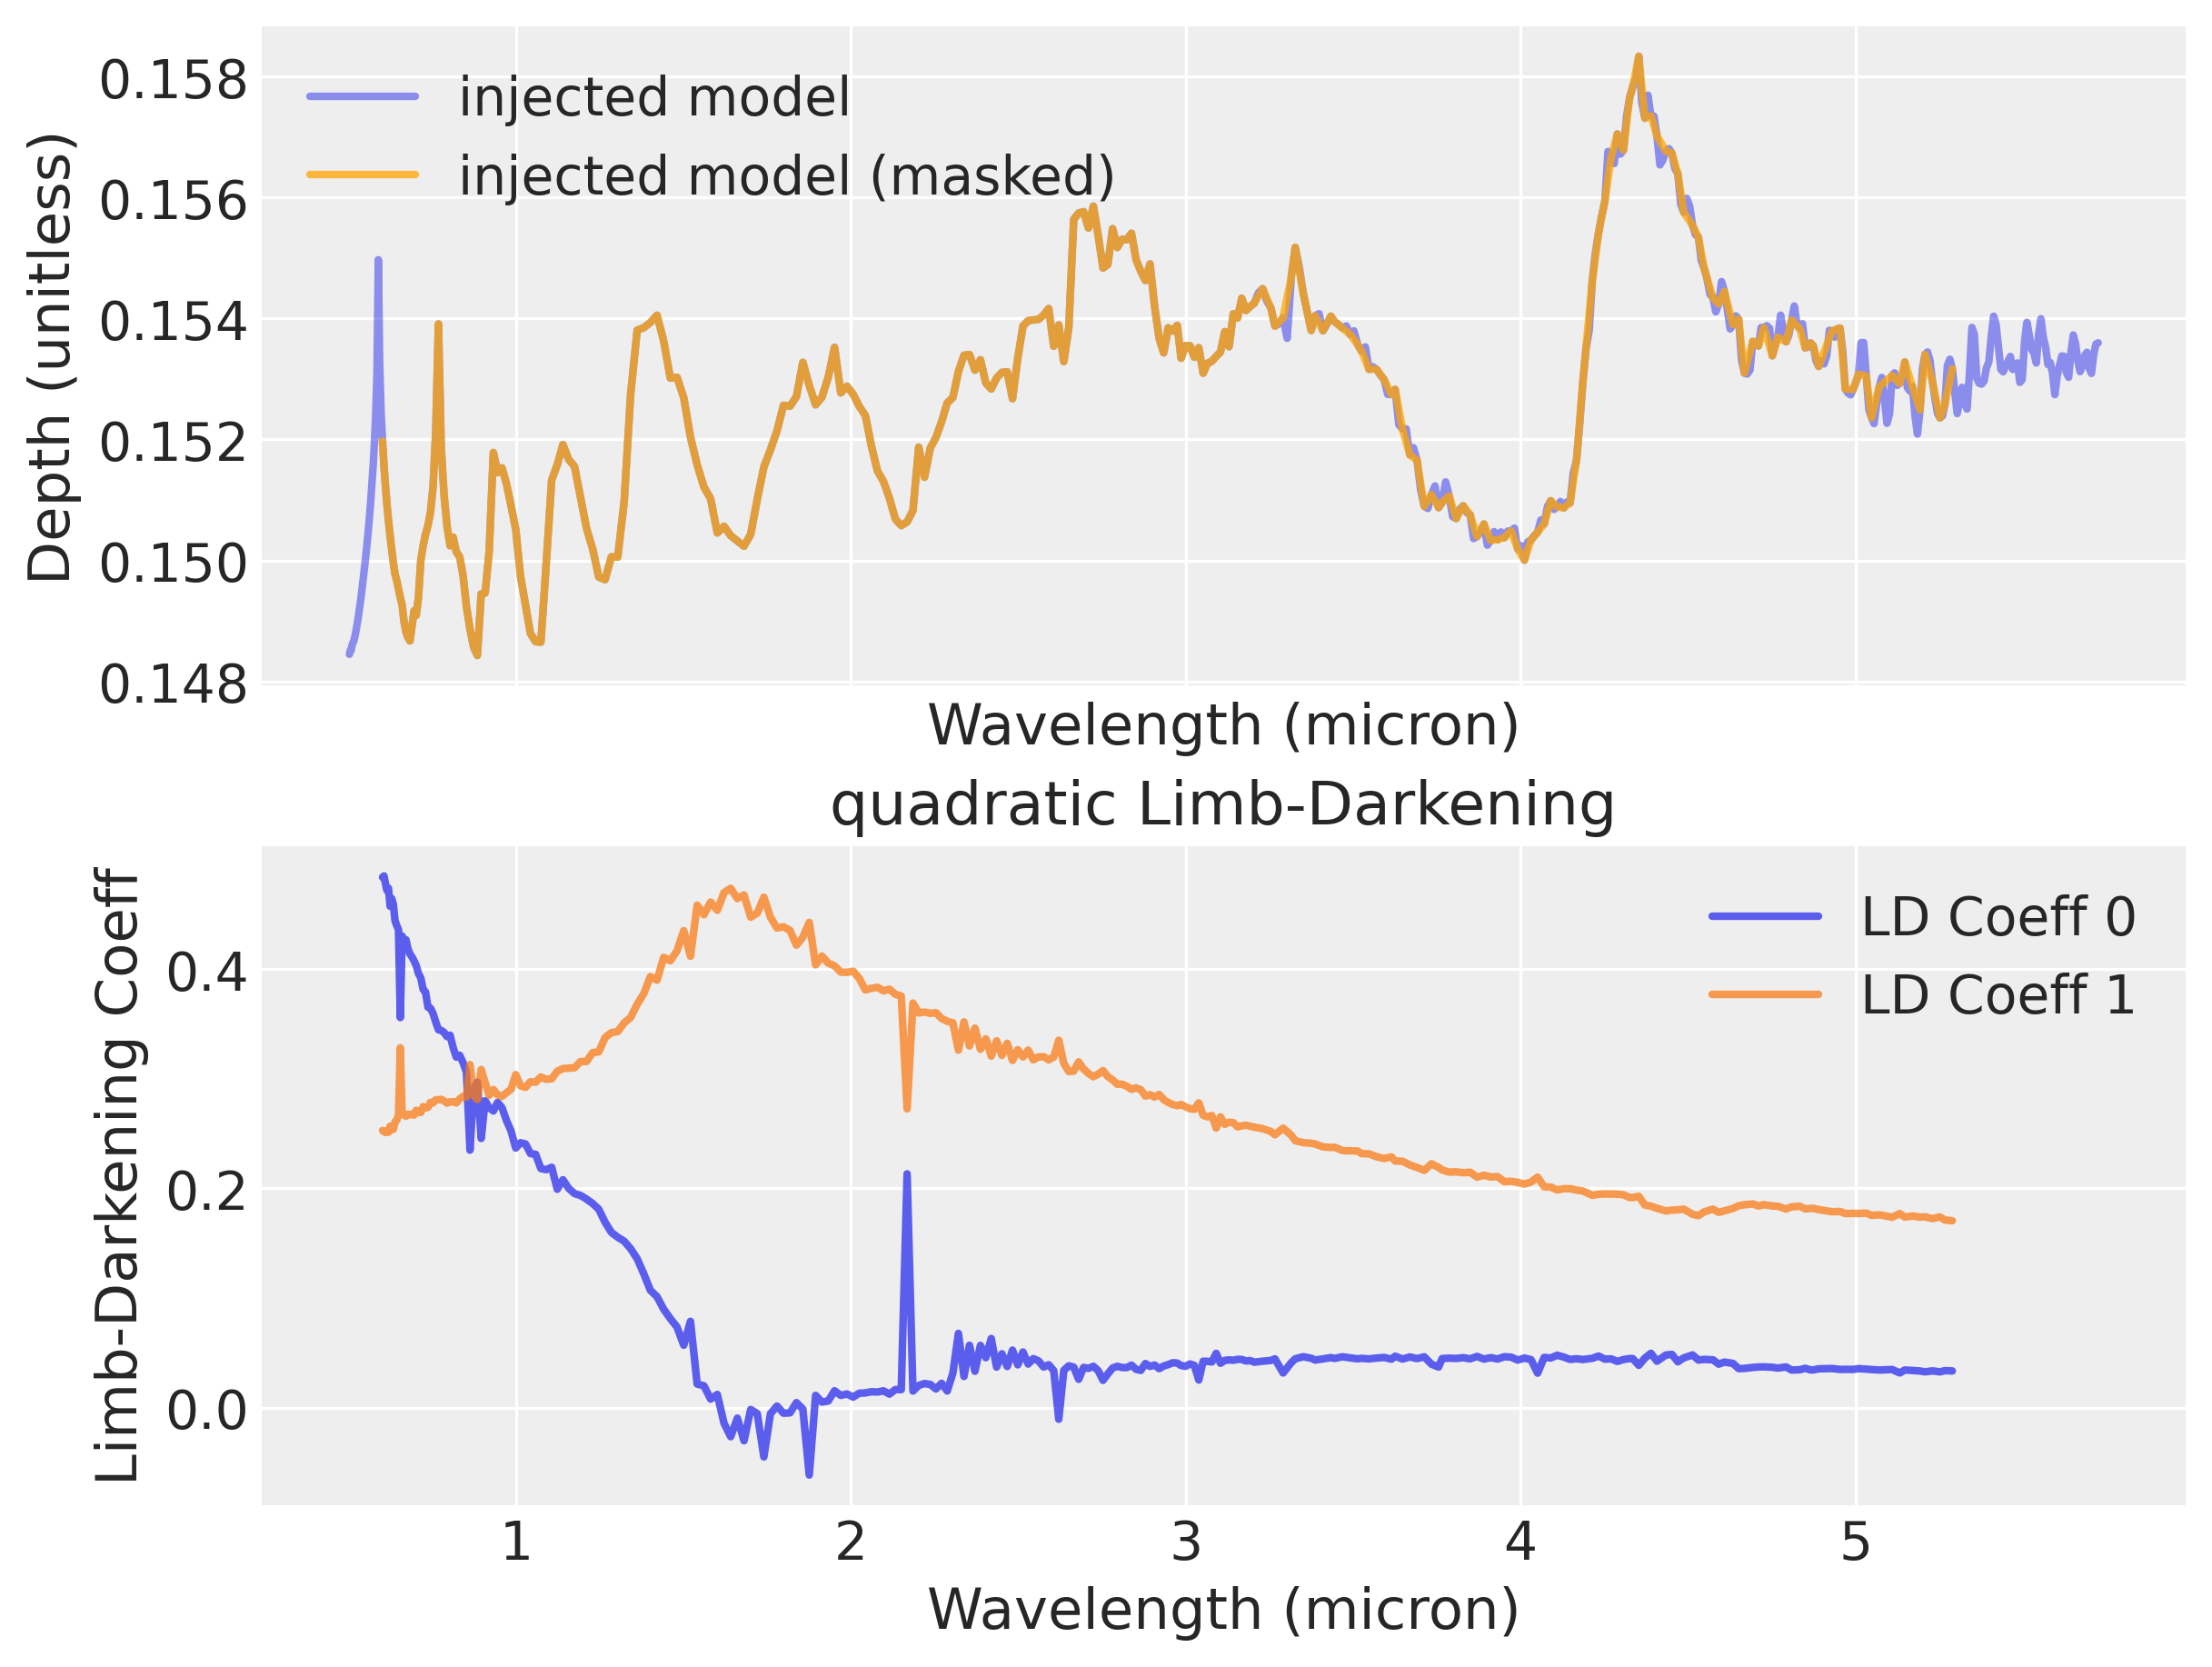

In [303]:
#  define where the zenodo LD files are stored (needed for ExoTiC)
dirsen = '/Users/catrionamurray/Documents/Postdoc/CUBoulder/exotic-ld_data' 
#  define some stellar parameters
star_params = {"M_H":-0.03, "Teff":5326.6, "logg":4.38933}
mode = "NIRSpec_Prism" #"NIRCam_F322W2" #
ld_eqn='quadratic'
#  calculate the LD coeffs for a series of wavelengths and transit depths
model_ld = generate_spectrum_ld(wavelength, np.sqrt(transmission), star_params, planet_params, dirsen, mode=mode, ld_eqn=ld_eqn, ld_model='1D', plot_model=True)

In [304]:
# return synthetic rainbow + rainbow with injected transit
bintime = 5
binwave = 0.2
r,i = inject_spectrum(model_ld,snr=1000,dt=bintime,res=50)

<AxesSubplot:xlabel='Time ($\\mathrm{d}$)', ylabel='Wavelength ($\\mathrm{\\mu m}$)'>

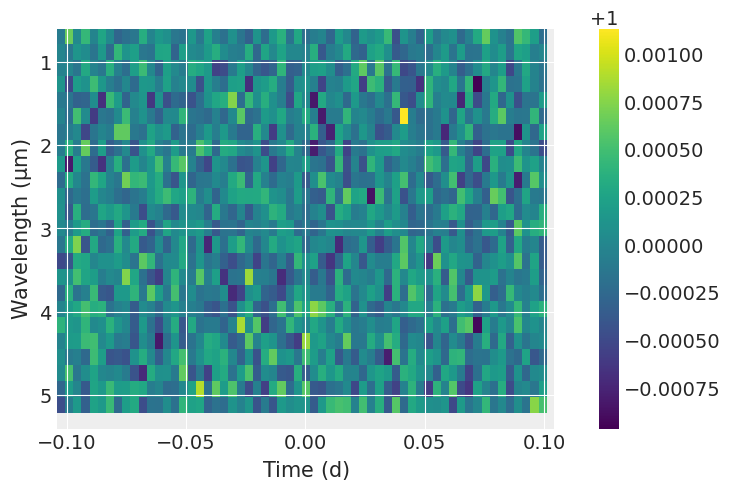

In [305]:
b_withouttransit = r.bin(
    dw=binwave*u.micron, dt=bintime*u.minute
)
b_withouttransit.imshow()

<AxesSubplot:xlabel='Time ($\\mathrm{d}$)', ylabel='Wavelength ($\\mathrm{\\mu m}$)'>

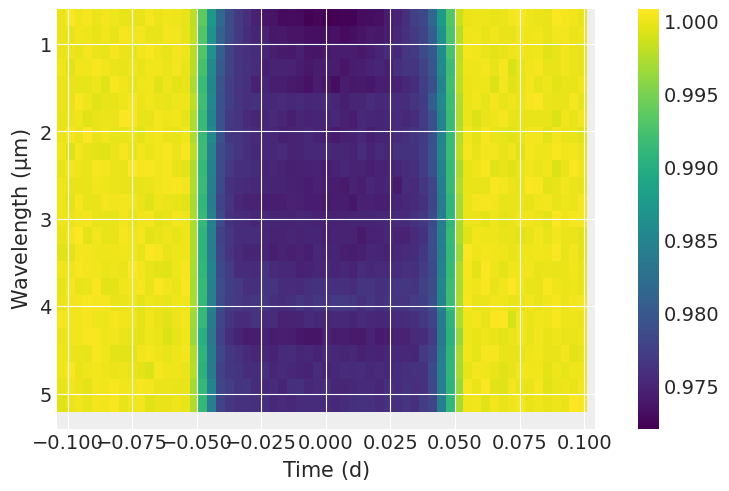

In [306]:
b_withtransit = i.bin(
    dw=binwave*u.micron, dt=bintime*u.minute
)
b_withtransit.imshow()

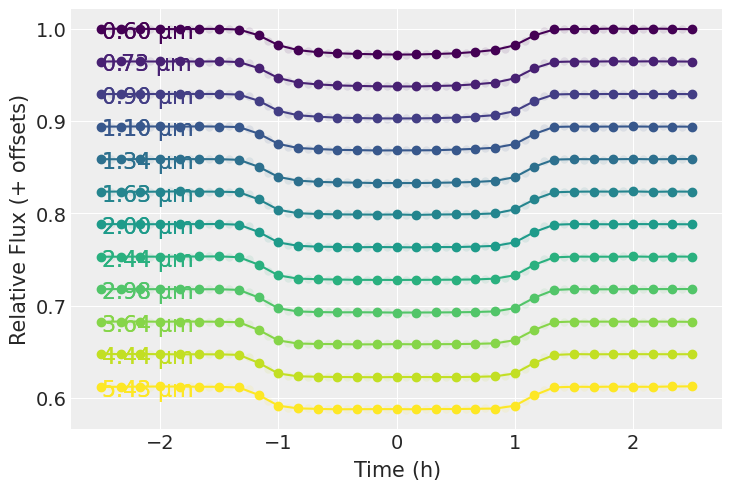

In [307]:
ax = b_withtransit.bin(R=5).plot(plotkw=dict(alpha=0.1, markeredgecolor='none', linewidth=0))
b_withtransit.bin(R=5, dt=10*u.minute).plot(ax=ax)

In [308]:
flux, flux_error, time, wavelength = rainbow_to_vector(b_withtransit)
# Compute x^2 + y^2 across a 2D grid
x, y = np.meshgrid(time.to_value(), wavelength.to_value())
z = flux
x = x[~np.isnan(z)]
y = y[~np.isnan(z)]
z = z[~np.isnan(z)]

In [309]:
alt_imshow(x,y,z,xlabel='Time (d)',ylabel='Wavelength (microns)',zlabel='Flux',ylog=False).display()

alt.HConcatChart(...)

0 24 0.6014204025268555 micron 5.401420402526854 micron


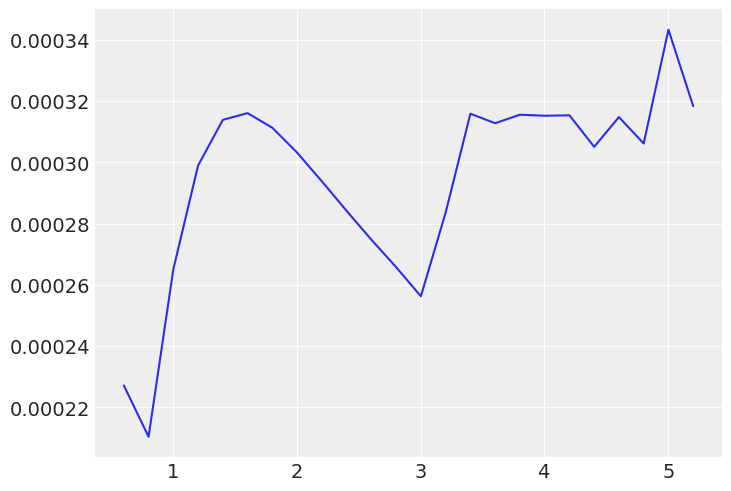

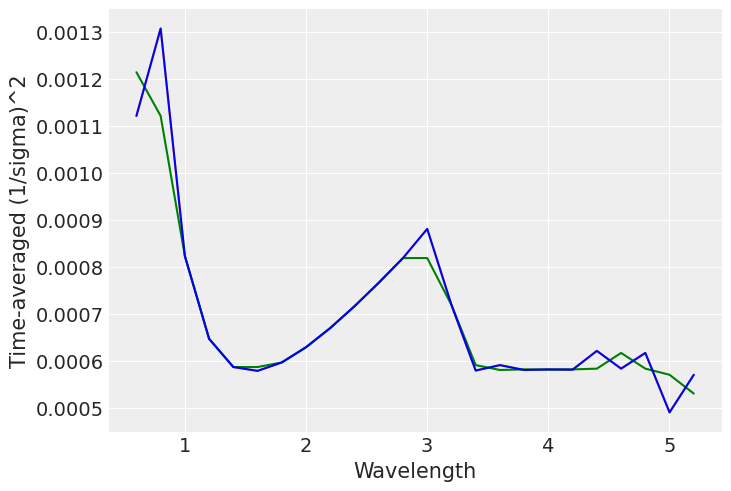

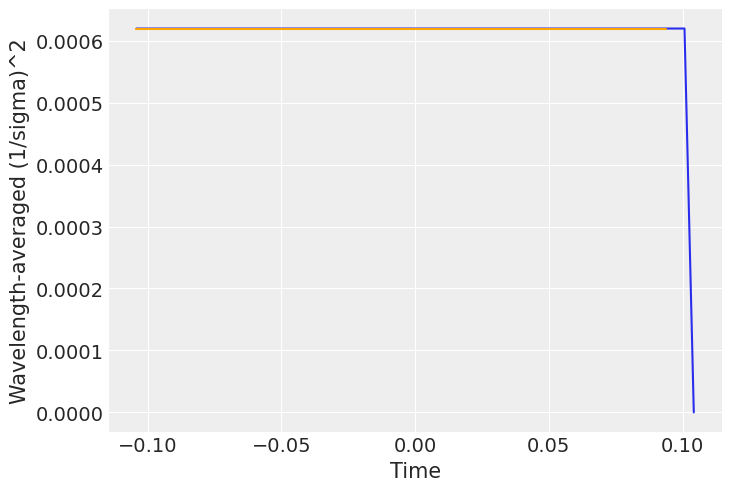


🌈 Warning: invalid value encountered in true_divideNo artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


(61,)
MAD (entire LC) = nan ppm
MAD (Last 50 points) = nan ppm
MAD (5-min binned) = 2793.27315926392 ppm


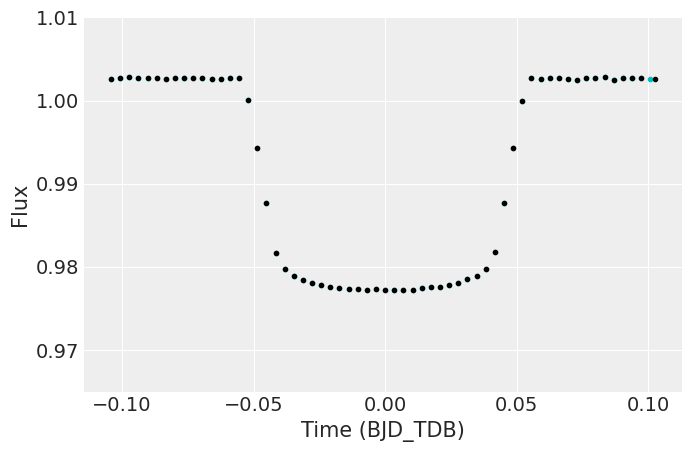


🌈 Warning: Degrees of freedom <= 0 for slice.

In [252]:
weighted_lc,weighted_err = weighted_avg_lc(time,flux,flux_error, wavelength, wavelength_range=[np.min(wavelength),np.max(wavelength)])

In [253]:
time = time[~np.isnan(weighted_lc)]
weighted_err = weighted_err[~np.isnan(weighted_lc)]
weighted_lc = weighted_lc[~np.isnan(weighted_lc)]

In [254]:
dur = 0.1
aR = semi_major_axis(init_period,1,1)
est_period = (aR * dur*np.pi)/np.sqrt((1+init_r)**2 - init_b**2)
print(est_period)

1.8487465267229


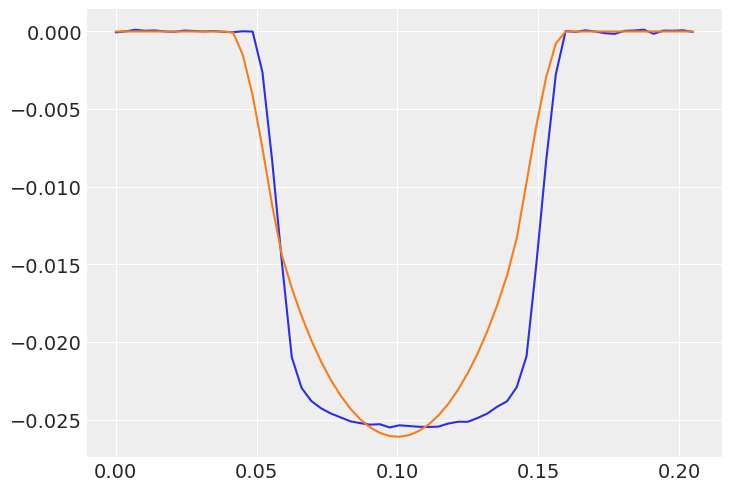

In [255]:
# print(time.to_value())
# print(min(time.to_value()))
x = list(time.to_value() - min(time.to_value()))
orbit = xo.orbits.KeplerianOrbit(period=3.22, t0=0.1, b=0.44)

light_curves = (xo.LimbDarkLightCurve(1.3,-0.5).get_light_curve(
            orbit=orbit, r=0.14, t=x).eval())
# light_curve = pm.math.sum(light_curves, axis=-1)
# print(light_curves)
light_curve = [l[0] for l in light_curves]
    
plt.plot(x,weighted_lc - np.nanmedian(weighted_lc[:3]))
plt.plot(x,light_curve)

(60,) (60,) (60,)
<class 'numpy.ndarray'> <class 'numpy.ndarray'> <class 'numpy.ndarray'>


optimizing logp for variables: [b, r, u, logP, t0, mean]


message: Desired error not necessarily achieved due to precision loss.
logp: -26581.74053444526 -> 466.1182112433811


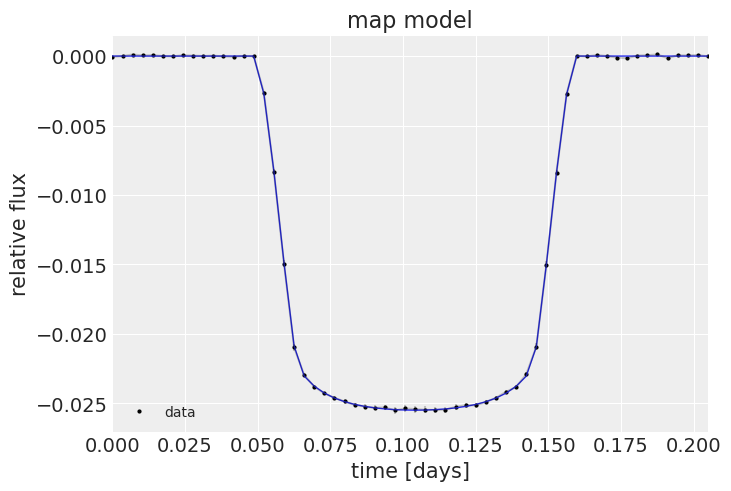

In [256]:
# set initial parameter estimates:
init_t0=0.1
init_period = 2#4.055259
period_error = 1#0.000009
init_b=0.44
init_r=0.14
init_mean = 0.0
init_u = [1.3,-0.5]

# set up x, y, yerr vectors:
x = time - min(time)
y = weighted_lc - np.nanmedian(weighted_lc[:3])
yerr = weighted_err #medflux*meddflux
x=np.array([i.to_value() for i in x])
print(np.shape(x),np.shape(y),np.shape(yerr))
print(type(x),type(y),type(yerr))

# fit MCMC transit
map_soln, model,[period,r,t0,b_ip,u_ld,mean] = fit_transit(x,y,yerr,init_r,init_t0, init_period,init_b,init_mean,init_u,period_error)
# plot the fit
plot_fit(x,y,yerr,map_soln)

Multiprocess sampling (4 chains in 12 jobs)
NUTS: [b, r, u, logP, t0, mean]



🌈 Warning: overflow encountered in _beta_ppf
🌈 Warning: overflow encountered in _beta_ppfSampling 4 chains for 4_000 tune and 8_000 draw iterations (16_000 + 32_000 draws total) took 174 seconds.
There were 1106 divergences after tuning. Increase `target_accept` or reparameterize.
The acceptance probability does not match the target. It is 0.7040581832004748, but should be close to 0.9. Try to increase the number of tuning steps.
There were 172 divergences after tuning. Increase `target_accept` or reparameterize.
There were 748 divergences after tuning. Increase `target_accept` or reparameterize.
The acceptance probability does not match the target. It is 0.769177268282535, but should be close to 0.9. Try to increase the number of tuning steps.
There were 270 divergences after tuning. Increase `target_accept` or reparameterize.
The number of effective samples is smaller than 10% for some parameters.


[period ~ Deterministic r ~ Uniform t0 ~ Normal b ~ ImpactParameter
 u ~ QuadLimbDark mean ~ Normal]
            mean        sd    hdi_3%   hdi_97%     mcse_mean       mcse_sd  \
period  2.004114  0.016250  1.975040  2.035828  6.261000e-04  4.446000e-04   
r       0.153118  0.000368  0.152451  0.153828  8.400000e-06  6.000000e-06   
t0      0.104191  0.000039  0.104117  0.104264  9.000000e-07  6.000000e-07   
b       0.058507  0.035569  0.000001  0.116523  1.816800e-03  1.594300e-03   
u[0]    0.119534  0.033511  0.058073  0.183493  6.219000e-04  4.398000e-04   
u[1]    0.244085  0.074006  0.098721  0.374865  1.413800e-03  9.998000e-04   
mean    0.000011  0.000012 -0.000013  0.000034  3.000000e-07  2.000000e-07   

           ess_bulk     ess_tail     r_hat  
period   749.606813   608.122879  1.004959  
r       1848.288006  1517.476711  1.002055  
t0      2066.493901   764.575124  1.002768  
b        368.549218   252.397593  1.006764  
u[0]    2926.915921  4121.493574  1.000586  
u[1]

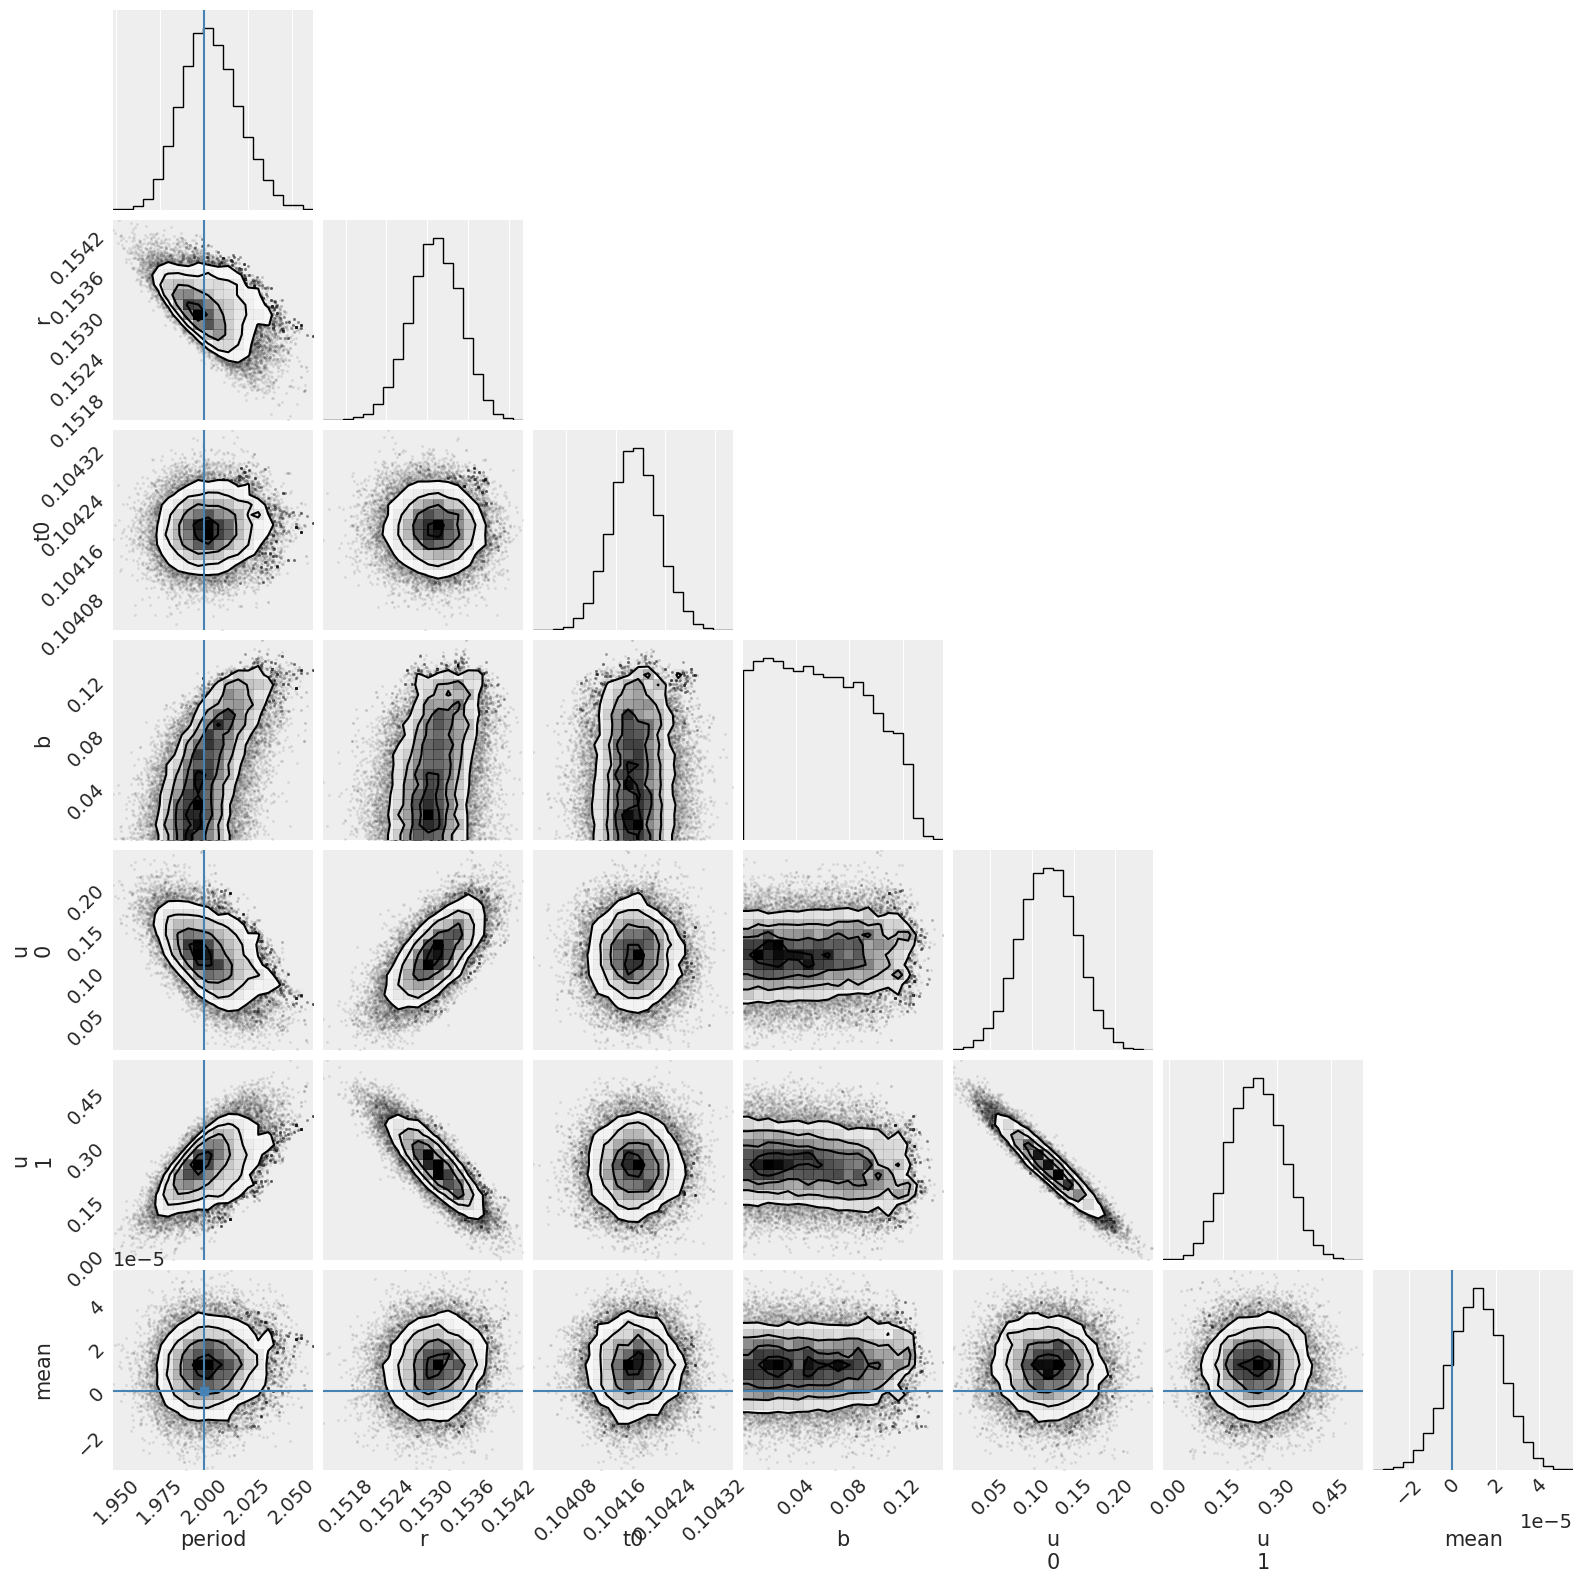

In [257]:
# sample the posterior
trace = sample(map_soln, model)
# plot corner plot (posterior distribution for each variable)
cornerplot(model,trace,period,r,t0,b_ip,u_ld,mean)
# plot summary (mean, std etc.)
summary = summarise(model,trace)
print(summary)

In [258]:
print(summary)
mcmcresults = summary['mean']
mcmcresults

            mean        sd    hdi_3%   hdi_97%     mcse_mean       mcse_sd  \
period  2.004114  0.016250  1.975040  2.035828  6.261000e-04  4.446000e-04   
r       0.153118  0.000368  0.152451  0.153828  8.400000e-06  6.000000e-06   
t0      0.104191  0.000039  0.104117  0.104264  9.000000e-07  6.000000e-07   
b       0.058507  0.035569  0.000001  0.116523  1.816800e-03  1.594300e-03   
u[0]    0.119534  0.033511  0.058073  0.183493  6.219000e-04  4.398000e-04   
u[1]    0.244085  0.074006  0.098721  0.374865  1.413800e-03  9.998000e-04   
mean    0.000011  0.000012 -0.000013  0.000034  3.000000e-07  2.000000e-07   

           ess_bulk     ess_tail     r_hat  
period   749.606813   608.122879  1.004959  
r       1848.288006  1517.476711  1.002055  
t0      2066.493901   764.575124  1.002768  
b        368.549218   252.397593  1.006764  
u[0]    2926.915921  4121.493574  1.000586  
u[1]    2752.765911  3655.423595  1.000461  
mean    2341.999409  2580.750360  1.004981  


period    2.004114
r         0.153118
t0        0.104191
b         0.058507
u[0]      0.119534
u[1]      0.244085
mean      0.000011
Name: mean, dtype: float64

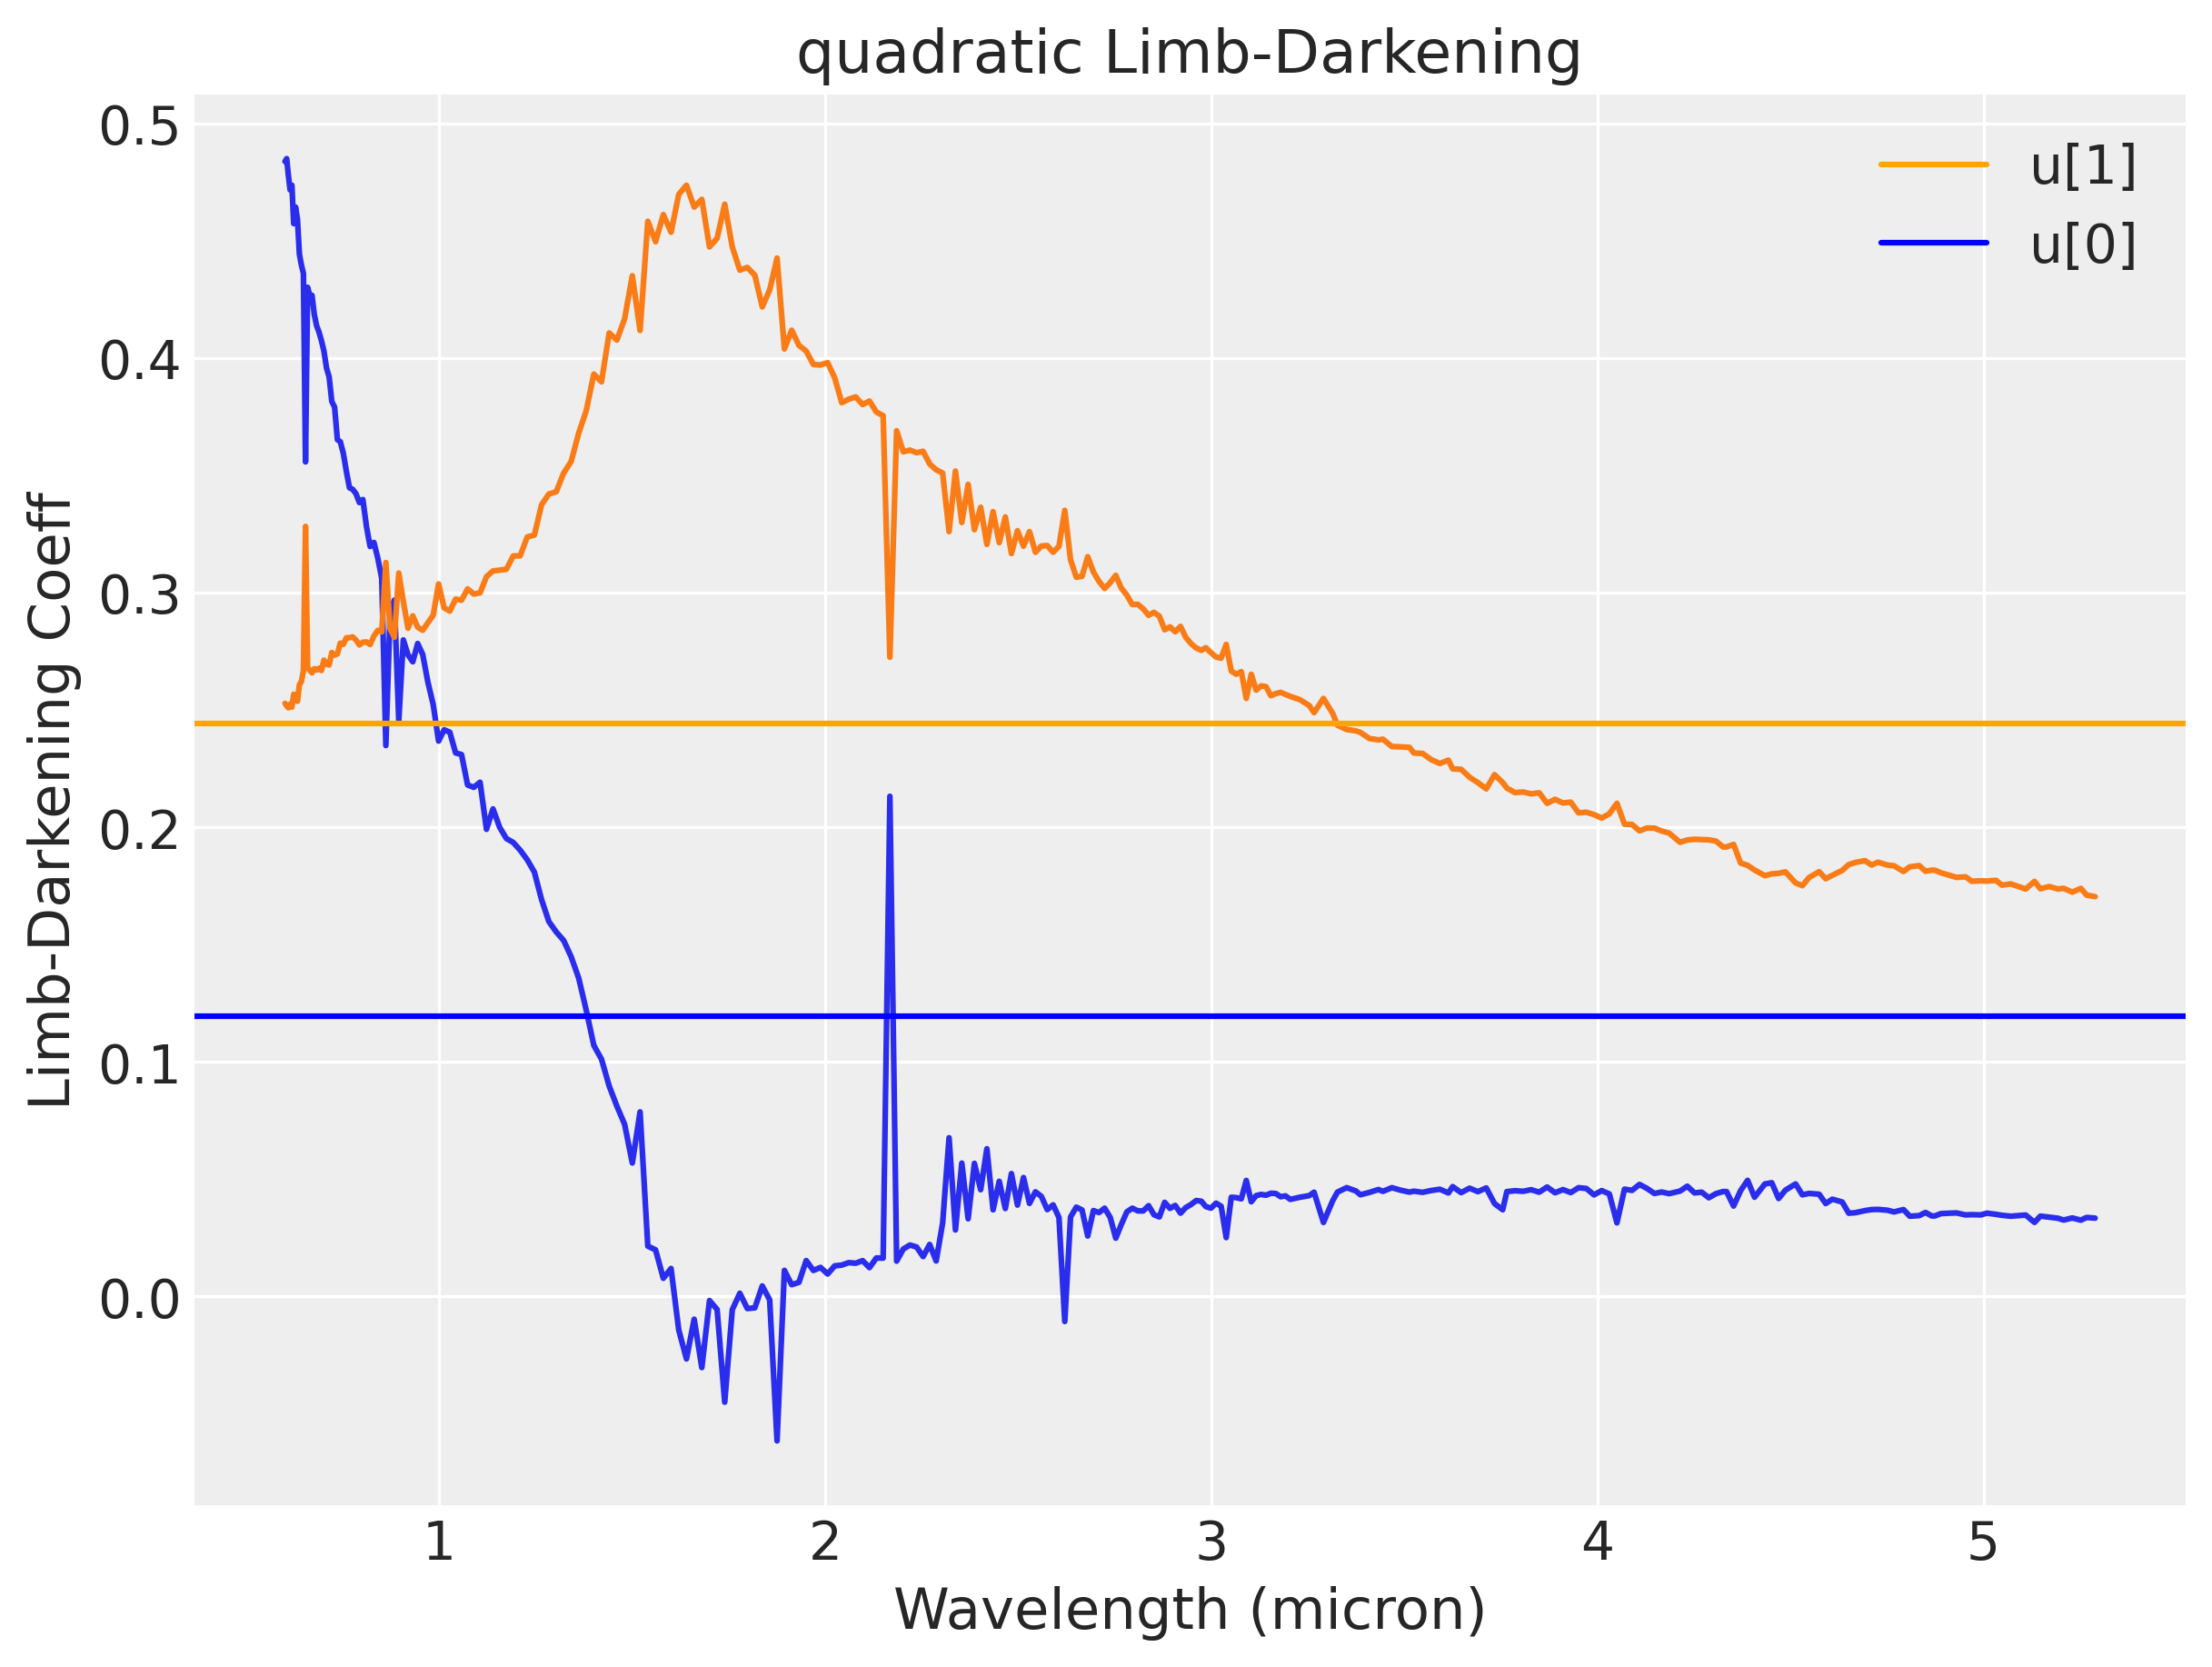

In [259]:
plt.figure(figsize=(8, 6), dpi=300)
ax = plt.gca()

num_ld_coeffs = len(model_ld.ld_coeffs[model_ld.modemask==0][0])
# print(num_ld_coeffs, len(self.ld_coeffs[~np.isnan(self.ld_coeffs)][0]))

for ld in range(num_ld_coeffs):
    plot_kw = dict(alpha=0.75, linewidth=2, label="LD Coeff " + str(ld))
    plot_kw.update([])
    extract_coeff = [l[ld] for l in model_ld.ld_coeffs[model_ld.modemask==0]]
    plt.plot(model_ld.table['wavelength'][model_ld.modemask==0], extract_coeff)

plt.title(model_ld.ld_eqn + " Limb-Darkening")
plt.xlabel("Wavelength (micron)")
plt.ylabel("Limb-Darkening Coeff")

plt.axhline(mcmcresults['u[1]'],color='orange',label='u[1]')
plt.axhline(mcmcresults['u[0]'],color='blue',label='u[0]')

plt.legend()

0.6014204025268555 micron


optimizing logp for variables: [r, u, mean]


message: Desired error not necessarily achieved due to precision loss.
logp: -3521.589804711492 -> 206.46701948932002


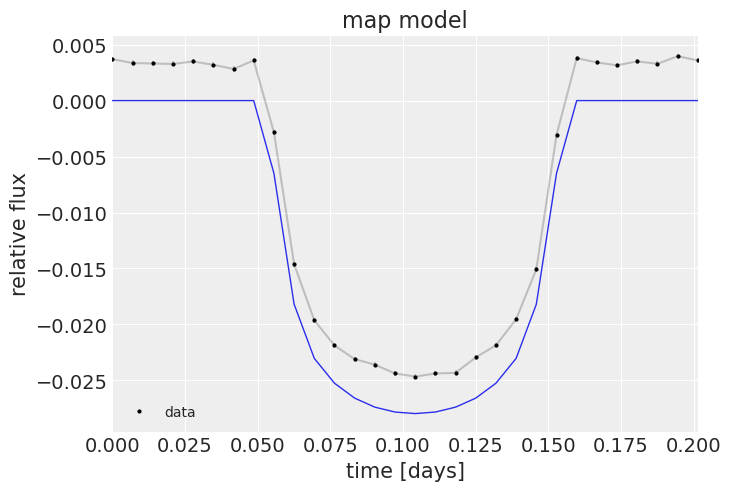

Multiprocess sampling (4 chains in 12 jobs)
NUTS: [r, u, mean]



🌈 Warning: overflow encountered in _beta_ppf
🌈 Warning: overflow encountered in _beta_ppf
🌈 Warning: overflow encountered in _beta_ppf
🌈 Warning: overflow encountered in _beta_ppfSampling 4 chains for 4_000 tune and 8_000 draw iterations (16_000 + 32_000 draws total) took 55 seconds.


          mean        sd    hdi_3%   hdi_97%     mcse_mean       mcse_sd  \
r     0.150285  0.000344  0.149651  0.150944  1.900000e-06  1.300000e-06   
u[0]  0.443484  0.040662  0.368767  0.522209  2.273000e-04  1.610000e-04   
u[1]  0.290455  0.066449  0.167304  0.417602  3.756000e-04  2.698000e-04   
mean  0.003436  0.000059  0.003328  0.003548  3.000000e-07  2.000000e-07   

          ess_bulk      ess_tail     r_hat  
r     34106.517729  24779.617761  1.000053  
u[0]  31976.355530  23310.523368  1.000249  
u[1]  31285.344260  23502.802323  1.000282  
mean  34148.083855  23508.094647  1.000427   <class 'pandas.core.frame.DataFrame'>
r= 0.1502847 , mean= 0.0034361 , u= 0.4434836 0.290455
{'wavelength': [0.6014204025268555], 'r': [0.1502847], 'r_err': [0.0003439], 'u0': [0.4434836], 'u1': [0.290455], 'u0_err': [0.0406618], 'u1_err': [0.066449], 'mean': [0.0034361], 'mean_err': [5.87e-05], 't0': [0.1041672], 'period': [2.0377429], 'b': [0.1039932]}


TypeError: can only concatenate str (not "int") to str

In [79]:
init_mean = mcmcresults['mean']
init_t0=mcmcresults['t0']
init_period = mcmcresults['period']
period_error = summary['sd']['period']
init_b=mcmcresults['b']
init_r=mcmcresults['r']
init_u = [mcmcresults['u[0]'],mcmcresults['u[1]']]
fixed_var = ['t0','period','b']
trans_spec = {'wavelength':[],'r':[],'r_err':[],'u0':[],'u1':[],'u0_err':[],'u1_err':[],'mean':[],'mean_err':[],'t0':[],'period':[],'b':[]}

for rf,re,rw in zip(flux,flux_error,wavelength):
    print(rw)
    x = np.array(time - min(time))
    y = np.array(rf) 
    y = y/np.nanmedian(y[-50:])
    y = y-np.nanmedian(y[-50:])
    yerr = np.array(re)
    
    map_soln, model,[period,r,t0,b,u,mean] = fit_transit(x,y,yerr,init_r,init_t0, init_period,init_b,init_mean,init_u,period_error, fixed_var)
    plot_fit(x,y,yerr,map_soln)
    trace = sample(map_soln, model)
    summary = summarise(model,trace,fixed_var)
    print(summary,type(summary))
    trans_spec['wavelength'].append(rw.to_value())
    trans_spec['r'].append(summary['mean']['r'])
    trans_spec['u0'].append(summary['mean']['u[0]'])
    trans_spec['u1'].append(summary['mean']['u[1]'])
    trans_spec['mean'].append(summary['mean']['mean'])
    trans_spec['t0'].append(init_t0)
    trans_spec['b'].append(init_b)
    trans_spec['period'].append(init_period)
    trans_spec['r_err'].append(summary['sd'][0])
    trans_spec['u0_err'].append(summary['sd'][1])
    trans_spec['u1_err'].append(summary['sd'][2])
    trans_spec['mean_err'].append(summary['sd'][3])
    print("r=",summary['mean']['r'],", mean=",summary['mean']['mean'],", u=",summary['mean']['u[0]'],summary['mean']['u[1]'])
    
    print(trans_spec)
    pd_ts = pd.DataFrame(trans_spec)
    pd_ts.to_csv("transmission_spectrum_bt_"+str(bintime) +"_bw_"+str(binwave)+".csv",index=False)

In [264]:
init_mean = mcmcresults['mean']
init_t0=mcmcresults['t0']
init_period = mcmcresults['period']
period_error = summary['sd']['period']
init_b=mcmcresults['b']
init_r=mcmcresults['r']
init_u = [mcmcresults['u[0]'],mcmcresults['u[1]']]
fixed_var = ['t0','period','b']
trans_spec = {'wavelength':[],'r':[],'r_err':[],'u0':[],'u1':[],'u0_err':[],'u1_err':[],'mean':[],'mean_err':[],'t0':[],'period':[],'b':[]}

In [297]:
x = np.array(time - min(time))
map_soln, sim_lc_model = fit_transit_simultaneous(wavelength,x,flux,flux_error,init_r,init_t0, init_period,init_b,init_mean,init_u,period_error, fixed_var)

optimizing logp for variables: [0.6014204025268555 micron_r, 0.6014204025268555 micron_u, 0.6014204025268555 micron_mean]


message: Optimization terminated successfully.
logp: -106.28931635730224 -> -104.72170758364479
optimizing logp for variables: [0.8014204025268554 micron_r, 0.8014204025268554 micron_u, 0.8014204025268554 micron_mean]


message: Optimization terminated successfully.
logp: -104.72170758364479 -> -103.15409880998733
optimizing logp for variables: [1.0014204025268554 micron_r, 1.0014204025268554 micron_u, 1.0014204025268554 micron_mean]


message: Optimization terminated successfully.
logp: -103.15409880998733 -> -101.58649003632988
optimizing logp for variables: [1.2014204025268553 micron_r, 1.2014204025268553 micron_u, 1.2014204025268553 micron_mean]


message: Optimization terminated successfully.
logp: -101.58649003632988 -> -100.01888126267241
optimizing logp for variables: [1.4014204025268553 micron_r, 1.4014204025268553 micron_u, 1.4014204025268553 micron_mean]


message: Optimization terminated successfully.
logp: -100.01888126267241 -> -98.45127248901495
optimizing logp for variables: [1.6014204025268552 micron_r, 1.6014204025268552 micron_u, 1.6014204025268552 micron_mean]


message: Optimization terminated successfully.
logp: -98.45127248901495 -> -96.88366371535751
optimizing logp for variables: [1.8014204025268552 micron_r, 1.8014204025268552 micron_u, 1.8014204025268552 micron_mean]


message: Optimization terminated successfully.
logp: -96.88366371535751 -> -95.31605494170005
optimizing logp for variables: [2.001420402526855 micron_r, 2.001420402526855 micron_u, 2.001420402526855 micron_mean]


message: Optimization terminated successfully.
logp: -95.31605494170005 -> -93.74844616804259
optimizing logp for variables: [2.201420402526855 micron_r, 2.201420402526855 micron_u, 2.201420402526855 micron_mean]


message: Optimization terminated successfully.
logp: -93.74844616804259 -> -92.18083739438515
optimizing logp for variables: [2.4014204025268553 micron_r, 2.4014204025268553 micron_u, 2.4014204025268553 micron_mean]


message: Optimization terminated successfully.
logp: -92.18083739438515 -> -90.61322862072768
optimizing logp for variables: [2.601420402526855 micron_r, 2.601420402526855 micron_u, 2.601420402526855 micron_mean]


message: Optimization terminated successfully.
logp: -90.61322862072768 -> -89.04561984707024
optimizing logp for variables: [2.8014204025268548 micron_r, 2.8014204025268548 micron_u, 2.8014204025268548 micron_mean]


message: Optimization terminated successfully.
logp: -89.04561984707024 -> -87.47801107341279
optimizing logp for variables: [3.001420402526855 micron_r, 3.001420402526855 micron_u, 3.001420402526855 micron_mean]


message: Optimization terminated successfully.
logp: -87.47801107341279 -> -85.91040229975533
optimizing logp for variables: [3.201420402526855 micron_r, 3.201420402526855 micron_u, 3.201420402526855 micron_mean]


message: Optimization terminated successfully.
logp: -85.91040229975533 -> -84.34279352609788
optimizing logp for variables: [3.401420402526855 micron_r, 3.401420402526855 micron_u, 3.401420402526855 micron_mean]


message: Optimization terminated successfully.
logp: -84.34279352609788 -> -82.77518475244041
optimizing logp for variables: [3.6014204025268546 micron_r, 3.6014204025268546 micron_u, 3.6014204025268546 micron_mean]


message: Optimization terminated successfully.
logp: -82.77518475244041 -> -81.20757597878294
optimizing logp for variables: [3.8014204025268548 micron_r, 3.8014204025268548 micron_u, 3.8014204025268548 micron_mean]


message: Optimization terminated successfully.
logp: -81.20757597878294 -> -79.63996720512549
optimizing logp for variables: [4.001420402526855 micron_r, 4.001420402526855 micron_u, 4.001420402526855 micron_mean]


message: Optimization terminated successfully.
logp: -79.63996720512549 -> -78.07235843146802
optimizing logp for variables: [4.201420402526855 micron_r, 4.201420402526855 micron_u, 4.201420402526855 micron_mean]


message: Optimization terminated successfully.
logp: -78.07235843146802 -> -76.50474965781055
optimizing logp for variables: [4.401420402526854 micron_r, 4.401420402526854 micron_u, 4.401420402526854 micron_mean]


message: Optimization terminated successfully.
logp: -76.50474965781055 -> -74.9371408841531
optimizing logp for variables: [4.601420402526855 micron_r, 4.601420402526855 micron_u, 4.601420402526855 micron_mean]


message: Optimization terminated successfully.
logp: -74.9371408841531 -> -73.36953211049563
optimizing logp for variables: [4.801420402526855 micron_r, 4.801420402526855 micron_u, 4.801420402526855 micron_mean]


message: Optimization terminated successfully.
logp: -73.36953211049563 -> -71.80192333683817
optimizing logp for variables: [5.001420402526854 micron_r, 5.001420402526854 micron_u, 5.001420402526854 micron_mean]


message: Optimization terminated successfully.
logp: -71.80192333683817 -> -70.2343145631807
optimizing logp for variables: [5.201420402526854 micron_r, 5.201420402526854 micron_u, 5.201420402526854 micron_mean]


message: Optimization terminated successfully.
logp: -70.2343145631807 -> -68.66670578952326
optimizing logp for variables: [5.401420402526854 micron_r, 5.401420402526854 micron_u, 5.401420402526854 micron_mean]


message: Optimization terminated successfully.
logp: -68.66670578952326 -> -67.09909701586582
optimizing logp for variables: [5.401420402526854 micron_r, 5.401420402526854 micron_u, 5.401420402526854 micron_mean, 5.201420402526854 micron_r, 5.201420402526854 micron_u, 5.201420402526854 micron_mean, 5.001420402526854 micron_r, 5.001420402526854 micron_u, 5.001420402526854 micron_mean, 4.801420402526855 micron_r, 4.801420402526855 micron_u, 4.801420402526855 micron_mean, 4.601420402526855 micron_r, 4.601420402526855 micron_u, 4.601420402526855 micron_mean, 4.401420402526854 micron_r, 4.401420402526854 micron_u, 4.401420402526854 micron_mean, 4.201420402526855 micron_r, 4.201420402526855 micron_u, 4.201420402526855 micron_mean, 4.001420402526855 micron_r, 4.001420402526855 micron_u, 4.001420402526855 micron_mean, 3.8014204025268548 micron_r, 3.8014204025268548 micron_u, 3.8014204025268548 micron_mean, 3.6014204025268546 micron_r, 3.6014204025268546 micron_u, 3.6014204025268546 micron_mean

message: Optimization terminated successfully.
logp: -67.09909701586582 -> -67.09909701586582


In [295]:
from functools import partial
def fit_transit_simultaneous(wavelengths, x, y, yerr, init_r, init_t0, init_period, init_b, init_mean, init_u, period_error, fixed_var=[]):
    '''
        Use PyMC3 and Exoplanet codes to fit a transit

        Parameters
        ----------
        x : np.array
            Orbital period (days).
        y : np.array
            Stellar mass (Solar masses).
        init_r : float
            Initial guess for planet-to-star radius ratio.
        init_t0 : float
            Initial guess for transit epoch.
        init_period : float
            Initial guess for orbital period.
        init_b : float
            Initial guess for impact parameter.
        init_mean : float
            Initial guess for the mean out-of-transit flux
        init_u : float
            Initial guess for the limb-darkening parameters.
        fixed_var : list
            List of variables that should remain constant in this fitting process.

        Returns
        ----------
        map_soln :
            The fit for the maximum a posteriori parameters given the simulated dataset.
        model : pm.Model
            The PyMC3 fitted model.
        [period, r, t0, b, u_ld, mean] : list
            List of distributions for each of the given params.

        '''
    num_wave = len(wavelengths)
    
    with pm.Model() as model:

        # The time of a reference transit for each planet
        if 't0' in fixed_var:
            t0 = pm.Normal("t0", mu=init_t0, sigma=1.0, observed=init_t0)
        else:
            t0 = pm.Normal("t0", mu=init_t0, sigma=1.0)

        # The log period; also tracking the period itself
        #         constrain the period as we only have 1 transit
        if 'period' in fixed_var:
            logP = pm.Normal("logP", mu=np.log(init_period), sigma=period_error, observed=np.log(init_period))
        else:
            logP = pm.Normal("logP", mu=np.log(init_period), sigma=period_error)
        period = pm.Deterministic("period", pm.math.exp(logP))

        if 'b' in fixed_var:
            b = xo.distributions.ImpactParameter("b", ror=init_r, testval=np.array(init_b), observed=np.array(init_b))
        else:
            b = xo.distributions.ImpactParameter("b", ror=init_r, testval=np.array(init_b))
        
        # Set up a Keplerian orbit for the planets
        orbit = xo.orbits.KeplerianOrbit(period=period, t0=t0, b=b)
        
        # Loop over the wavelengths
        parameters = dict()
        lc_models = dict()
        
        for n, (w, ny, nyerr) in enumerate(zip(wavelengths,y,yerr)):
            with pm.Model(name=w,model=model):
                
                ny = np.array(ny) 
                ny = ny/np.nanmedian(ny[-50:])
                ny = ny-np.nanmedian(ny[-50:])
                nyerr = np.array(nyerr)
                nyerr = nyerr[~np.isnan(ny)]
                ny = ny[~np.isnan(ny)]
                
                # The baseline flux
                if 'mean' in fixed_var:
                    mean = pm.Normal("mean", mu=init_mean, sigma=0.1, observed=init_mean)
                else:
                    mean = pm.Normal("mean", mu=init_mean, sigma=0.1)

                # Limb-darkening - The Kipping (2013) parameterization for quadratic limb darkening paramters
                if 'u' in fixed_var:
                    u_ld = xo.distributions.QuadLimbDark("u", testval=np.array(init_u), observed=np.array(init_u))
                else:
                    u_ld = xo.distributions.QuadLimbDark("u", testval=np.array(init_u))
                
                star = xo.LimbDarkLightCurve(u_ld[0], u_ld[1])
                    
                # radius ratio
                if 'r' in fixed_var:
                    r = pm.Uniform("r", lower=0.01, upper=0.5, testval=np.array(init_r), observed=np.array(init_r))
                else:
                    r = pm.Uniform("r", lower=0.01, upper=0.5, testval=np.array(init_r))
                
                # Keep track of the parameters for optimization
                parameters[w] = [mean, u_ld, r]
                
                

            # Compute the model light curve using starry
#             def lc_model(mean, star, r, x):
            light_curves = star.get_light_curve(
                orbit=orbit, r=r, t=list(x)
                )
            light_curve = pm.math.sum(light_curves, axis=-1) + mean

#             lc_model_part = partial(lc_model, mean, star, r)
#             lc_model_comp = lc_model(mean, star, r,x)
#             pm.Deterministic("light_curves", light_curves)
#             lc_models[w] = lc_model_comp
            
#             pm.Normal("obs", mu=light_curve, sd=nyerr, observed=ny)
            
        
            
        # Optimize the model
        map_soln = model.test_point
        for w in wavelengths:
            map_soln = pmx.optimize(map_soln, parameters[w])
#         for w in wavelengths:
#             map_soln = pmx.optimize(map_soln, parameters[f"{name}_noise"])
#             map_soln = pmx.optimize(map_soln, parameters[w] + [period,t0, b])
        map_soln = pmx.optimize(map_soln)

        # Here we track the value of the model light curve for plotting
        # purposes
#         pm.Deterministic("light_curves", light_curves)

        # ******************************************************************* #
        # On the folowing lines, we simulate the dataset that we will fit     #
        #                                                                     #
        # NOTE: if you are fitting real data, you shouldn't include this line #
        #       because you already have data!                                #
        # ******************************************************************* #
        #     y = pmx.eval_in_model(light_curve)
        #     y += yerr * np.random.randn(len(y))
        # ******************************************************************* #
        # End of fake data creation; you want to include the following lines  #
        # ******************************************************************* #

        # The likelihood function assuming known Gaussian uncertainty
#         pm.Normal("obs", mu=light_curve, sd=yerr, observed=y)

        # Fit for the maximum a posteriori parameters given the simuated
        # dataset
#         map_soln = pmx.optimize(start=model.test_point)

        return map_soln, model

In [445]:
import theano 
import pymc3 as pm
import exoplanet as xo
import pymc3_ext as pmx
# from prose.utils import earth2sun
# from prose import models
import aesara_theano_fallback.tensor as tt
# theano.config.compute_test_value = “warn”
from collections import OrderedDict
from astropy import units as u

R_sun = 696340000 * u.m
M_sun = 1.989 * 10**30 * u.kg
R_earth = 6371000 * u.m

# x = np.array(time - min(time))
datasets = OrderedDict([])

count = 1
for rf,re,rw in zip(flux,flux_error,wavelength):
    x = np.array(time - min(time))[~np.isnan(rf)]
    if len(x)>0:
        re = re[~np.isnan(rf)]
        y = np.array(rf[~np.isnan(rf)]) 
        y = y/np.nanmedian(y[-5:])
        y = y-np.nanmedian(y[-5:])
        yerr = np.array(re)
        datasets["wavelength_"+str(count)] = (x,y,yerr,init_r,init_mean,init_u)
        count += 1

# print(datasets)
    
# datasets = OrderedDict([
#         (“TS_zp”, [obs2.time, obs2.diff_flux, obs2.diff_error, obs2.exposure[0],obs2.polynomial(airmass=2).T,[0.18,0.38]]),
#         (“SSO_gp”, [obs1.time, obs1.diff_flux, obs1.diff_error,obs1.exposure[0],obs1.polynomial(airmass=2).T,[0.4790,0.3491]])
#     ])


# THANKS MATHILDE/LIONEL!!

with pm.Model() as model:
    
    # Stellar parameters
    # -----------------
    m_s = pm.Normal('m_s',mu=1, sigma=0.05, observed=1)
    r_s = pm.Normal('r_s',mu=1, sigma=0.05, observed=1)
    #u = xo.distributions.QuadLimbDark(“u”, testval=np.array([0.226, 0.4154]))
    #star = xo.LimbDarkLightCurve(u[0],u[1])
    
    # Orbital parameters
    # -----------------
    t0= pm.Normal('t0',init_t0,0.05)
    p = pm.Normal('P',init_period, 0.05) # If log_p, use Deterministic here : pm.Deterministic(“period”, tt.exp(log_period))
#     b = pm.Uniform('b',tt.as_tensor_variable(init_b),1.)
    b = xo.distributions.ImpactParameter('b', ror=init_r-0., testval=tt.as_tensor_variable(init_b))
#     b=pm.Deterministic('b',tt.as_tensor_variable(init_b))

    # Keplerian orbit
    # ---------------
    orbit = xo.orbits.KeplerianOrbit(period=p, t0=t0, r_star=r_s, b=b, m_star=m_s)
    pm.Deterministic('a',orbit.a)
    pm.Deterministic ('i',orbit.incl * 180/np.pi)
    pm.Deterministic('a/r_s', orbit.a / orbit.r_star)
    # Loop over the wavelength bands
    # ------------------------------
    #depth = []
    for n, (name, (x, y, yerr, r_ratio, mean, ldc)) in enumerate(datasets.items()):
        if len(x)>0:
            # We define the per-instrument parameters in a submodel so that we don’t have to prefix the names manually
            with pm.Model(name=name, model=model):
                
                # The limb darkening #It’s the same filter in this case
                u = xo.QuadLimbDark('u',testval=ldc)
                star = xo.LimbDarkLightCurve(u)
                
                # The radius ratio
    #             depth = pm.Uniform('depth', 1e-3, 9e-3,testval=4e-3)#Prior normal sur log(param) = prior uniform sur param
                #depth.append(depths)
                #depth=pm.Deterministic(“depth”,tt.as_tensor_variable(4e-3))
                ror = pm.Uniform('ror',lower=0.01, upper=0.5,testval=r_ratio)#star.get_ror_from_approx_transit_depth(depth, b))
                r_p = pm.Deterministic('r_p', ror * r_s) # In solar radius
                r = pm.Deterministic('r',r_p*1/R_sun)

                # lightcurve mean
                mean = pm.Normal("mean", mu=mean, sigma=0.1)
                
                # starry light-curve
                light_curves = star.get_light_curve(orbit=orbit, r=r_p, t=x, texp=x[1]-x[0])
                transit = pm.Deterministic('transit', pm.math.sum(light_curves, axis=-1)+mean)
                
                # Systematics and final model
    #             w = pm.Flat('w',shape=len(X))
    #             systematics = pm.Deterministic('systematics',w@X)
                #residuals = pm.Deterministic(“residuals”, y - transit)
                #systematics=X
                mu = pm.Deterministic('mu', transit)#+systematics)
                # Likelihood function
                pm.Normal('obs', mu=mu, sd=yerr, observed=y)
    # Maximum a posteriori
    # --------------------
    opt = pmx.optimize(start=model.test_point)
    opt = pmx.optimize(start=opt, vars=[ror,u])
    #opt = pmx.optimize(start=opt, vars=[depth[1]])
    

optimizing logp for variables: [wavelength_24_mean, wavelength_24_ror, wavelength_24_u, wavelength_23_mean, wavelength_23_ror, wavelength_23_u, wavelength_22_mean, wavelength_22_ror, wavelength_22_u, wavelength_21_mean, wavelength_21_ror, wavelength_21_u, wavelength_20_mean, wavelength_20_ror, wavelength_20_u, wavelength_19_mean, wavelength_19_ror, wavelength_19_u, wavelength_18_mean, wavelength_18_ror, wavelength_18_u, wavelength_17_mean, wavelength_17_ror, wavelength_17_u, wavelength_16_mean, wavelength_16_ror, wavelength_16_u, wavelength_15_mean, wavelength_15_ror, wavelength_15_u, wavelength_14_mean, wavelength_14_ror, wavelength_14_u, wavelength_13_mean, wavelength_13_ror, wavelength_13_u, wavelength_12_mean, wavelength_12_ror, wavelength_12_u, wavelength_11_mean, wavelength_11_ror, wavelength_11_u, wavelength_10_mean, wavelength_10_ror, wavelength_10_u, wavelength_9_mean, wavelength_9_ror, wavelength_9_u, wavelength_8_mean, wavelength_8_ror, wavelength_8_u, wavelength_7_mean, wav

message: Desired error not necessarily achieved due to precision loss.
logp: 6819.792286282483 -> 9613.163957588476
optimizing logp for variables: [wavelength_24_u, wavelength_24_ror]


message: Optimization terminated successfully.
logp: 9613.163957588476 -> 9613.163957588476


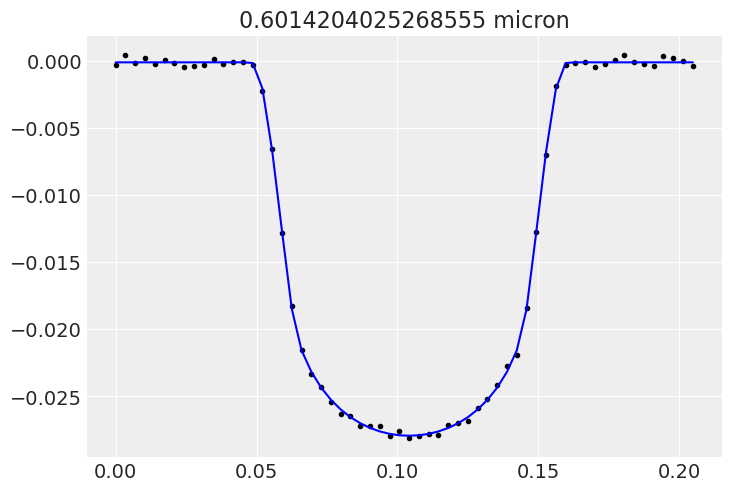

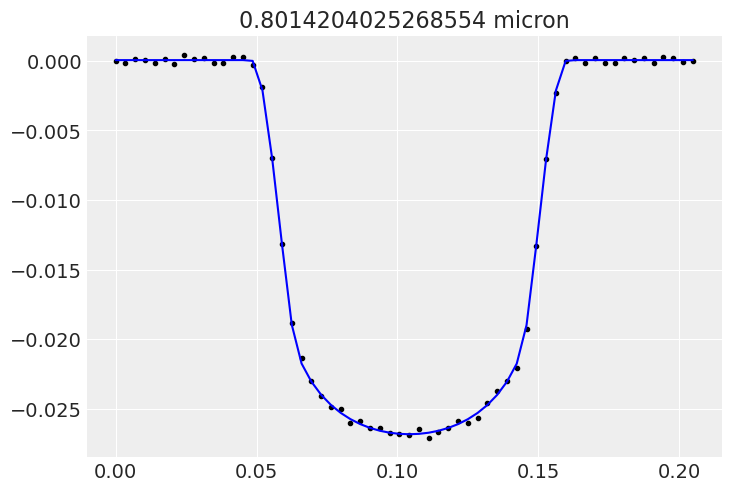

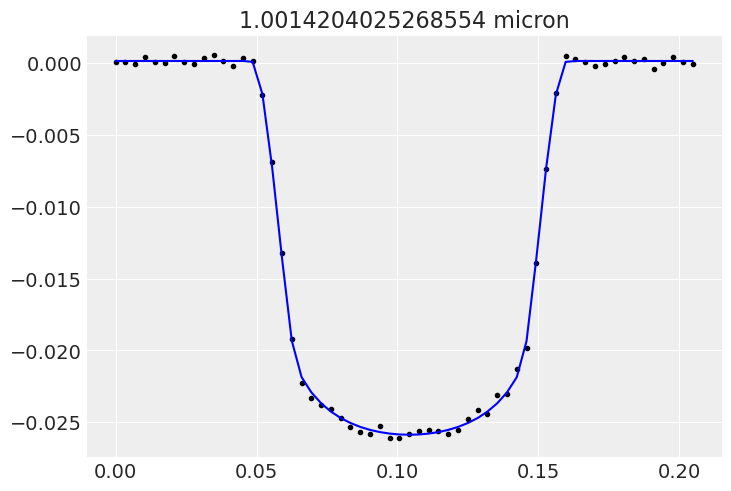

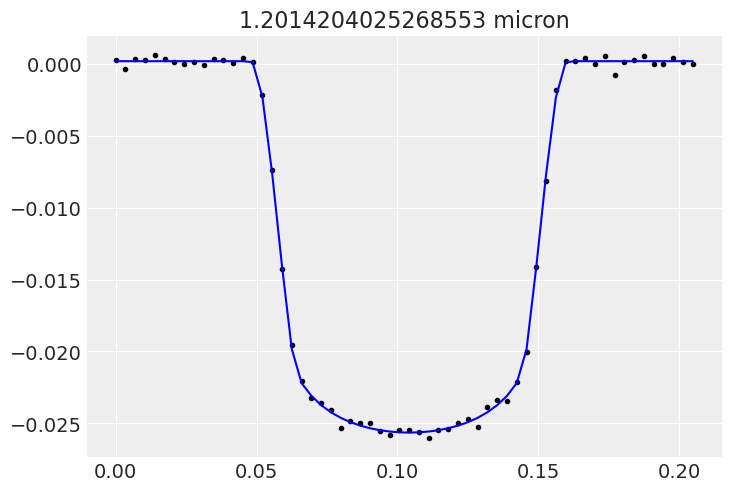

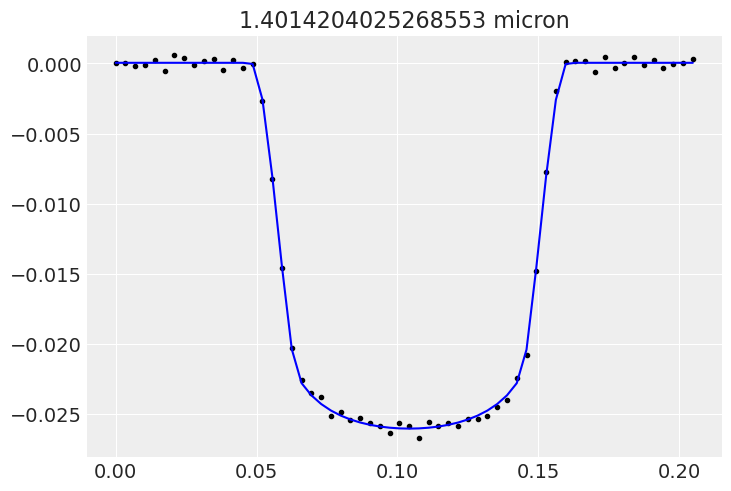

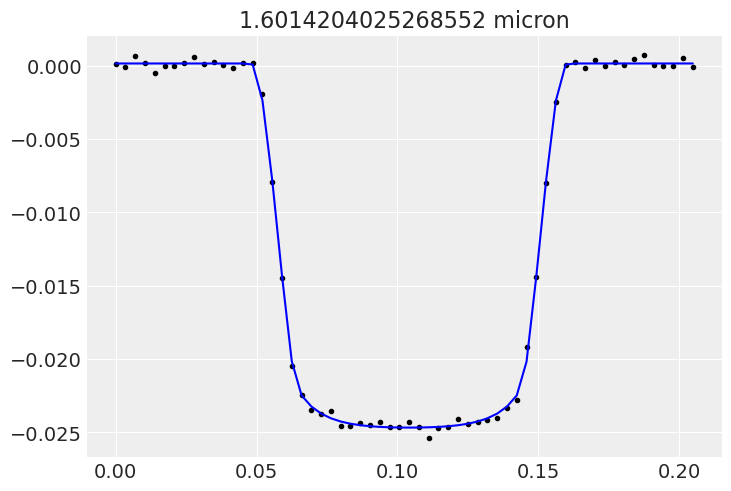

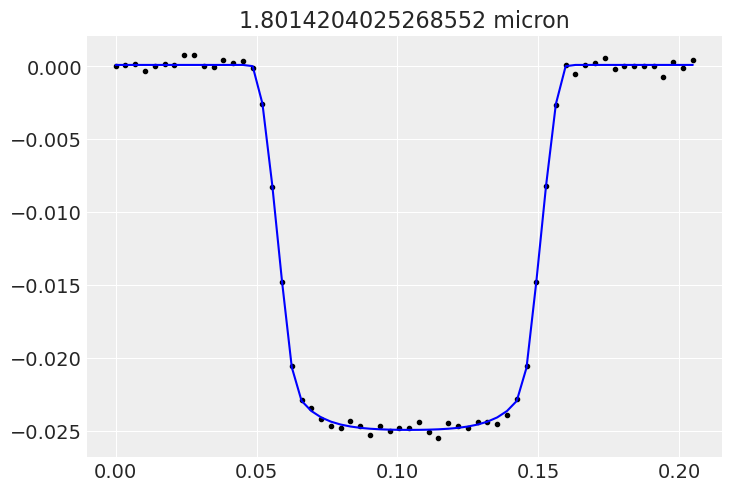

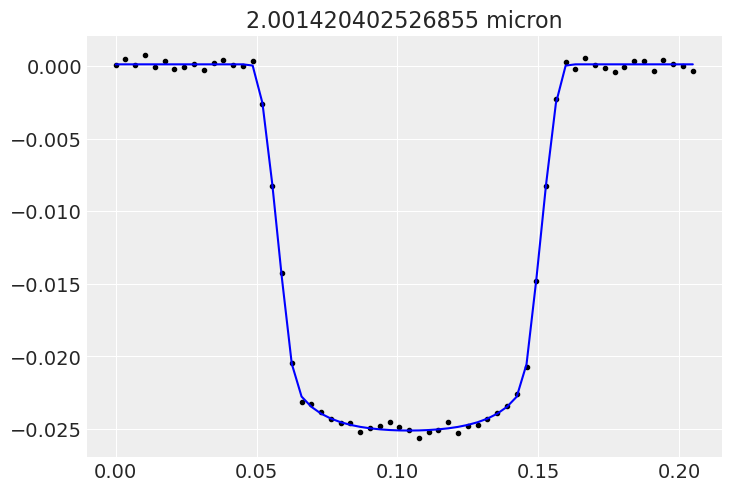

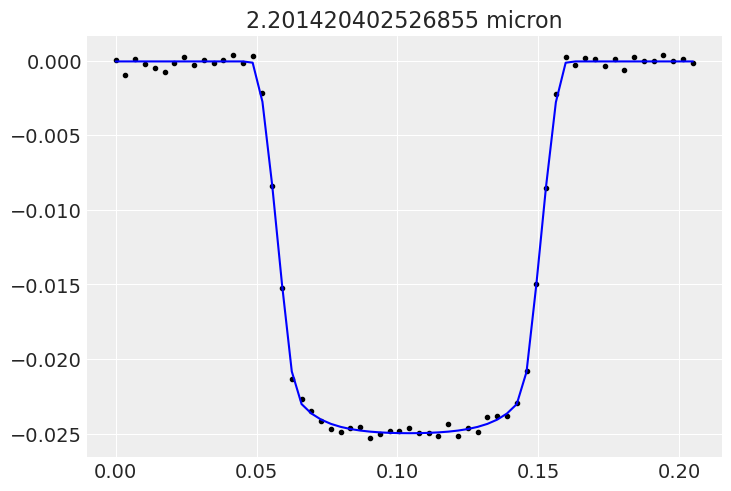

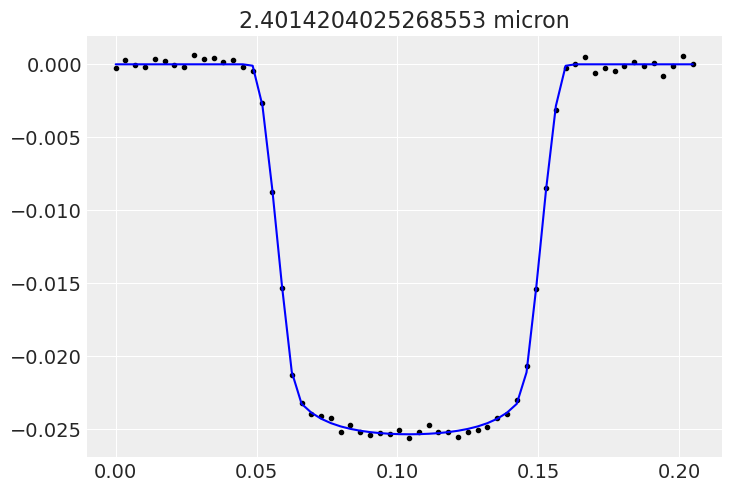

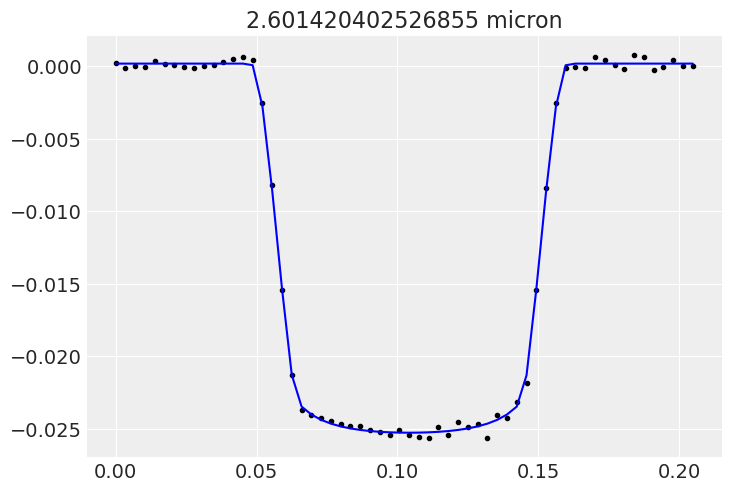

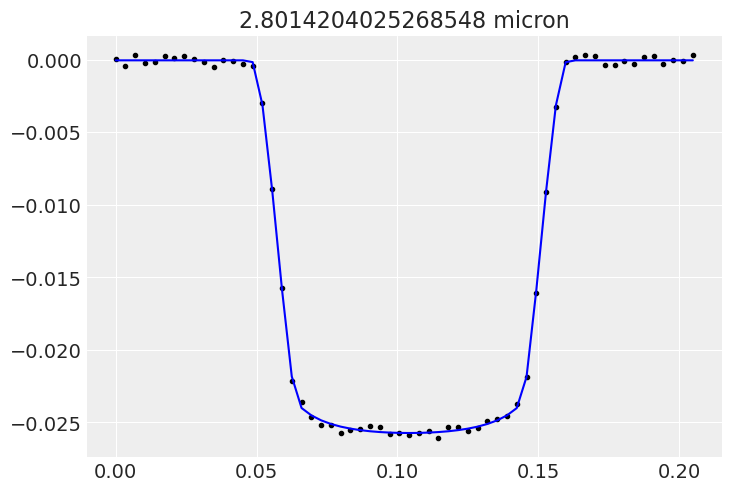

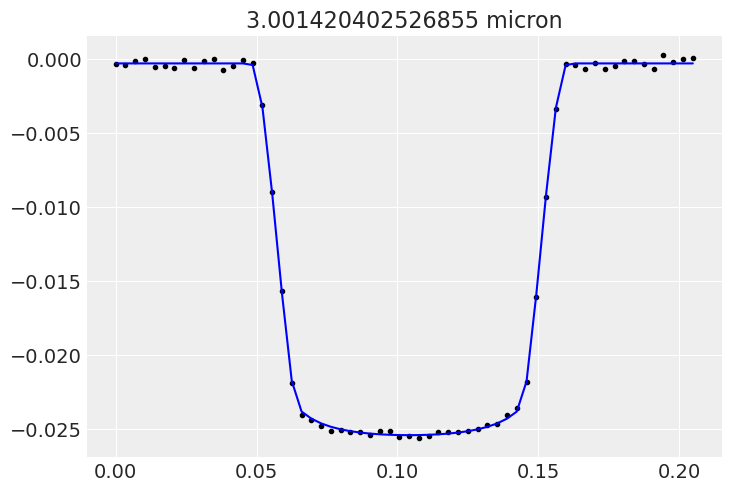

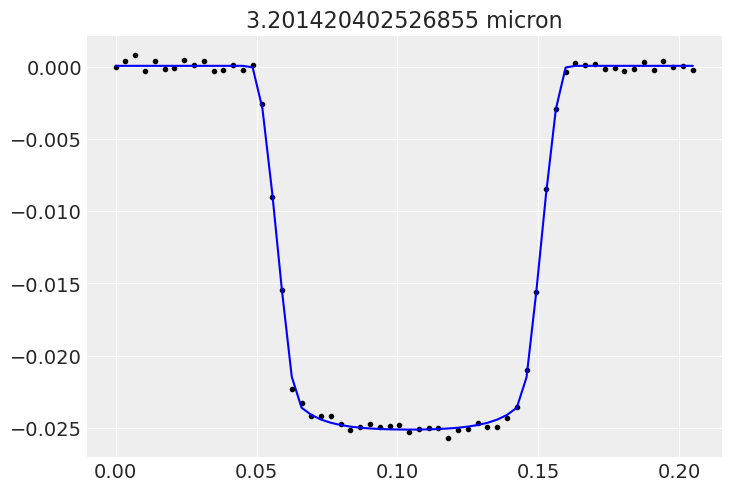

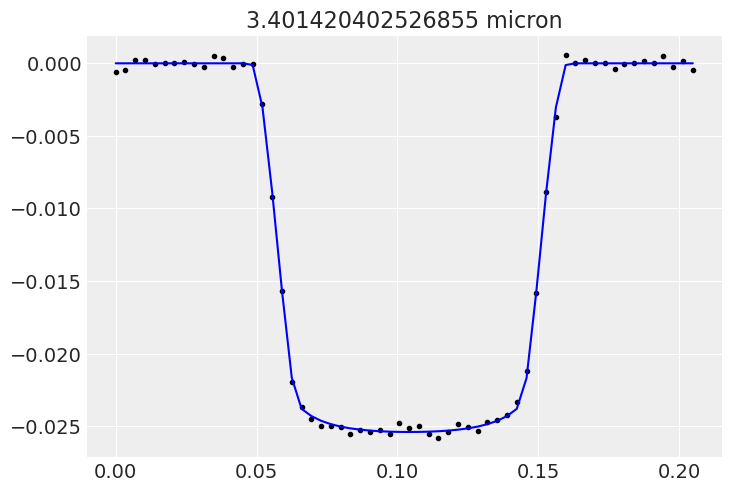

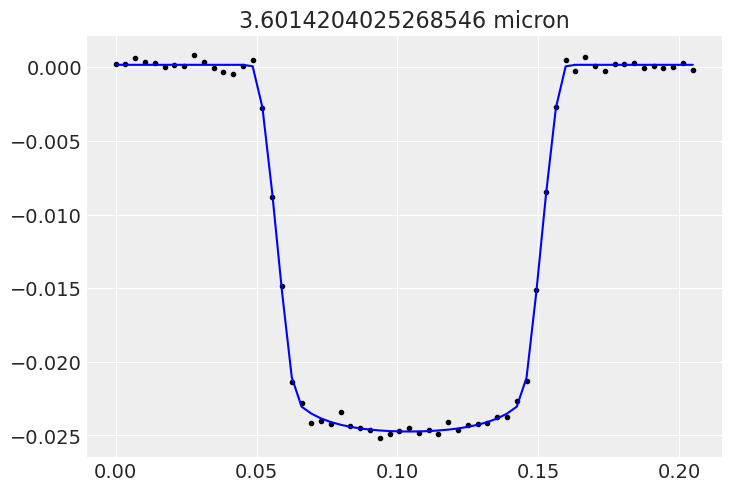

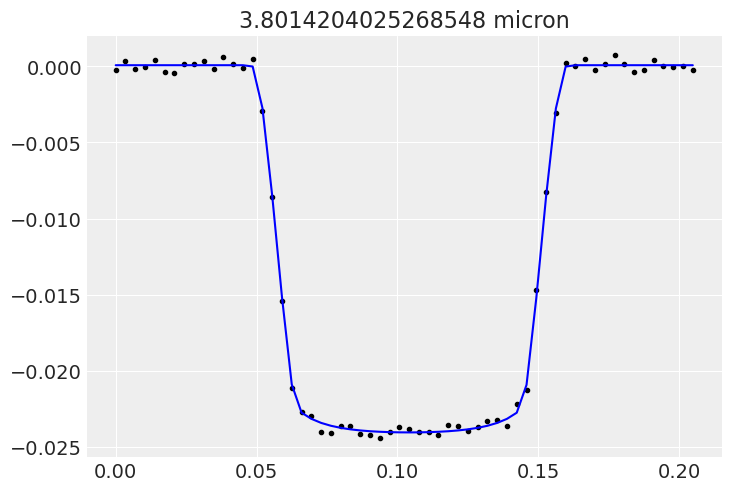

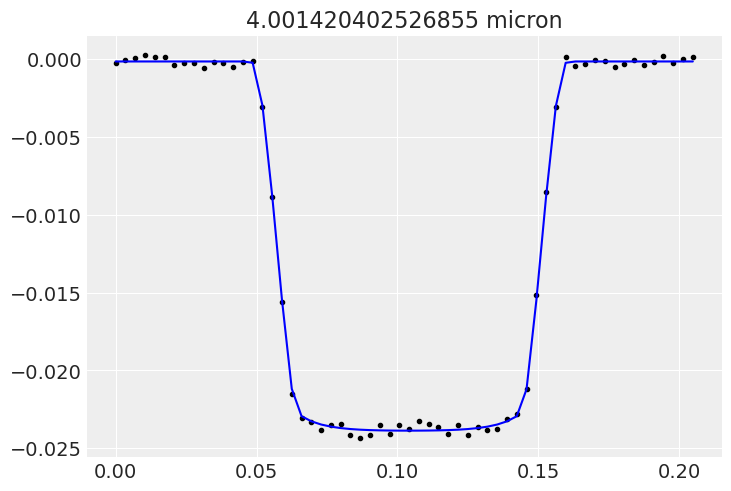

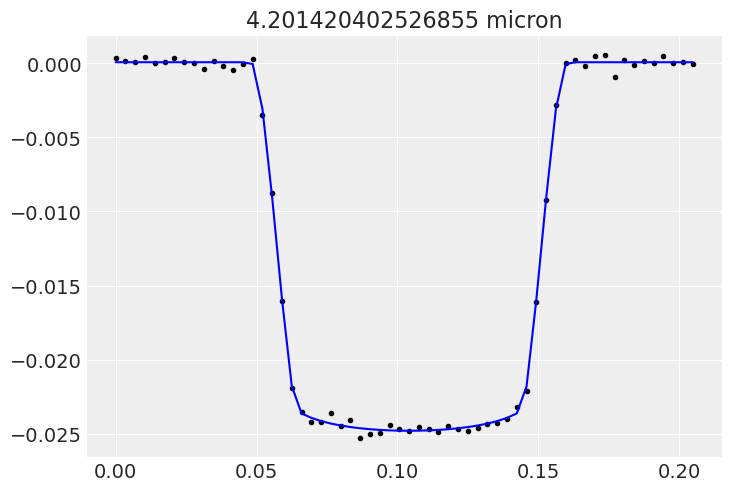

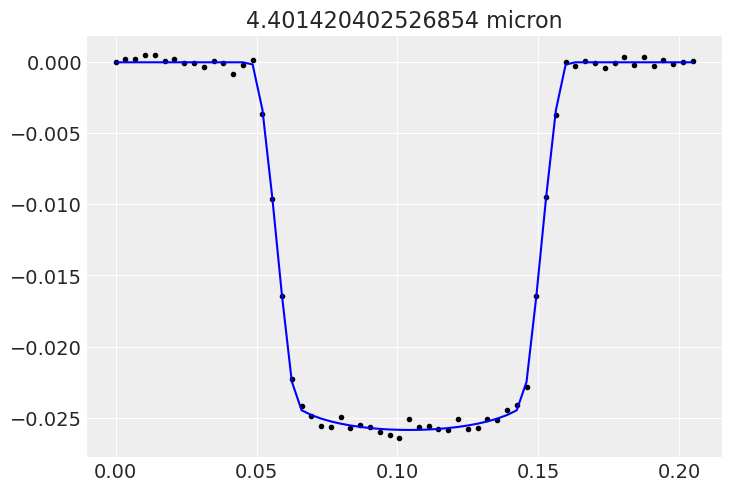

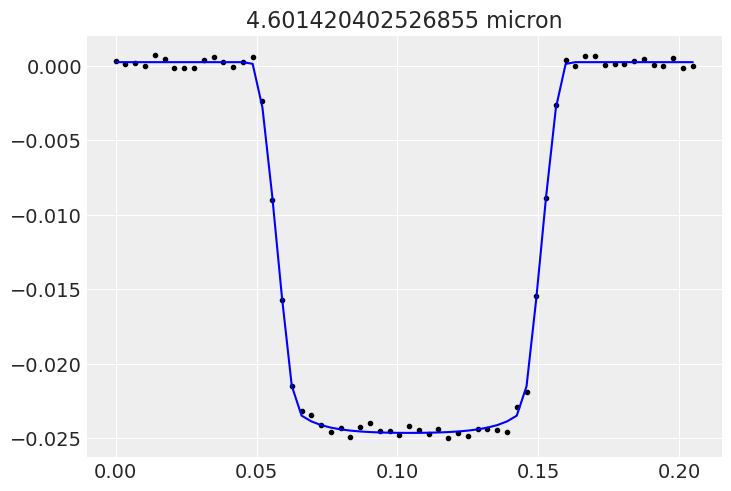

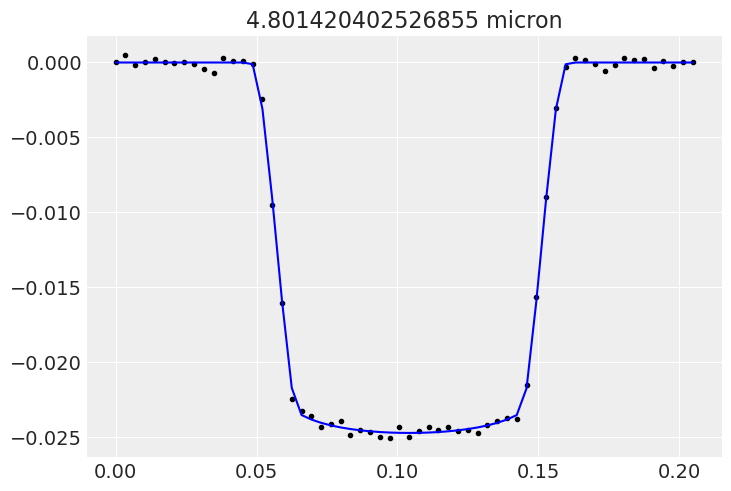

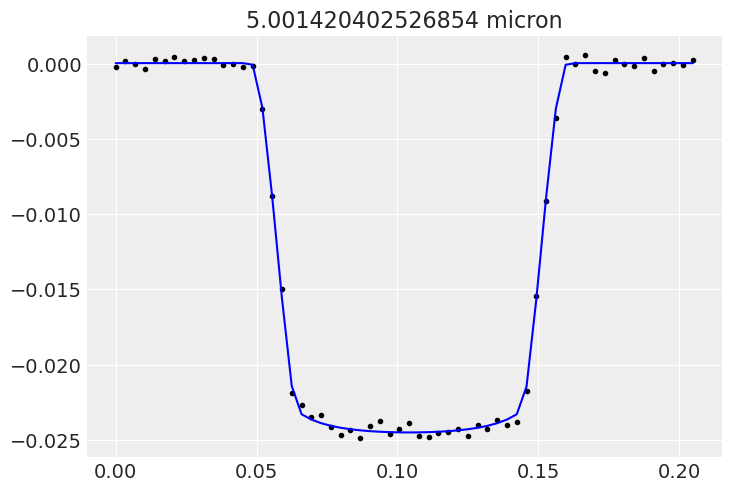

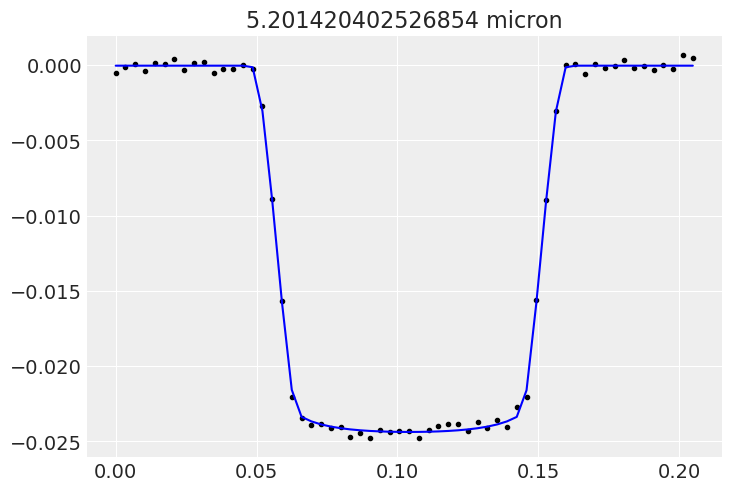

In [446]:
count = 1
for rf,re,rw in zip(flux,flux_error,wavelength):
    x = np.array(time - min(time))[~np.isnan(rf)]
    if len(x)>0:
        re = re[~np.isnan(rf)]
        y = np.array(rf[~np.isnan(rf)]) 
        y = y/np.nanmedian(y[-5:])
        y = y-np.nanmedian(y[-5:])
        yerr = np.array(re)

        plt.plot(x,y,'k.')
        plt.plot(x,opt['wavelength_'+str(count)+"_transit"],color='b')
        plt.title(rw)
        plt.show()
        plt.close()

        count=count+1
    

In [447]:
# print(opt)
# print(model)
print("pyMC3 version = " + str(pm.__version__))
print("theano version = " + str(theano.__version__))
theano.exception_verbosity='high'
np.random.seed(42)
with model:
    trace = pm.sample(
        tune=4000,
        draws=8000,
        start=opt,
        cores=12,
        chains=4,
        target_accept=0.9,
    )

pyMC3 version = 3.11.4
theano version = 1.1.2


MissingInputError: Input 0 of the graph (indices start from 0), used to compute Elemwise{neg,no_inplace}(b_impact__), was not provided and not given a value. Use the Theano flag exception_verbosity='high', for more information on this error.

In [452]:
opt

{'t0': array(0.10417853),
 'P': array(1.97886155),
 'b_impact__': array(-3.70895083),
 'wavelength_1_u_quadlimbdark__': array([-0.35415808, -0.58608013]),
 'wavelength_1_ror_interval__': array(-0.90720572),
 'wavelength_1_mean': array(-0.00011854),
 'wavelength_2_u_quadlimbdark__': array([-0.8585556 , -0.67864125]),
 'wavelength_2_ror_interval__': array(-0.90522332),
 'wavelength_2_mean': array(4.55879351e-05),
 'wavelength_3_u_quadlimbdark__': array([-1.27404479, -0.84602662]),
 'wavelength_3_ror_interval__': array(-0.90536093),
 'wavelength_3_mean': array(0.00016168),
 'wavelength_4_u_quadlimbdark__': array([-1.70336599, -0.74100819]),
 'wavelength_4_ror_interval__': array(-0.89699401),
 'wavelength_4_mean': array(0.00018685),
 'wavelength_5_u_quadlimbdark__': array([-1.7649093 , -0.90192935]),
 'wavelength_5_ror_interval__': array(-0.8842308),
 'wavelength_5_mean': array(4.49815325e-05),
 'wavelength_6_u_quadlimbdark__': array([-1.75441853, -2.44584954]),
 'wavelength_6_ror_interval

In [449]:
opt
trans_spec = {'wavelength':[],'r':[],'r_err':[],'u0':[],'u1':[],'u0_err':[],'u1_err':[],'mean':[],'mean_err':[],'t0':[],'period':[],'b':[]}
count=1

for rf,re,rw in zip(flux,flux_error,wavelength):
    try:
        trans_spec['r'].append(float(opt['wavelength_'+str(count)+"_ror"]))
        trans_spec['wavelength'].append(rw.to_value())
        trans_spec['u0'].append(float(opt['wavelength_'+str(count)+"_u"][0]))
        trans_spec['u1'].append(float(opt['wavelength_'+str(count)+"_u"][1]))
        trans_spec['mean'].append(float(opt['wavelength_'+str(count)+"_mean"]))
        trans_spec['t0'].append(float(opt['t0']))
        trans_spec['b'].append(float(opt['b']))
        trans_spec['period'].append(float(opt['P']))
        trans_spec['r_err'].append(0)
        trans_spec['u0_err'].append(0)
        trans_spec['u1_err'].append(0)
        trans_spec['mean_err'].append(0)
        # print("r=",summary['mean']['r'],", mean=",summary['mean']['mean'],", u=",summary['mean']['u[0]'],summary['mean']['u[1]'])
        count = count + 1
    except:
        pass
print(trans_spec)
pd_ts = pd.DataFrame(trans_spec)
pd_ts.to_csv("transmission_spectrum_simultaneous_bt_"+str(bintime) +"_bw_"+str(binwave)+".csv",index=False)

{'wavelength': [0.6014204025268555, 0.8014204025268554, 1.0014204025268554, 1.2014204025268553, 1.4014204025268553, 1.6014204025268552, 1.8014204025268552, 2.001420402526855, 2.201420402526855, 2.4014204025268553, 2.601420402526855, 2.8014204025268548, 3.001420402526855, 3.201420402526855, 3.401420402526855, 3.6014204025268546, 3.8014204025268548, 4.001420402526855, 4.201420402526855, 4.401420402526854, 4.601420402526855, 4.801420402526855, 5.001420402526854, 5.201420402526854], 'r': [0.15091026698027485, 0.1511093606870873, 0.15109553528092048, 0.1519376241521346, 0.15322789236673803, 0.1516318115022282, 0.15282092196230845, 0.15277949794859258, 0.15269261660893552, 0.15378187104778307, 0.1548844867832923, 0.1558854210411962, 0.15438736661903166, 0.15466921368066366, 0.15518654663903625, 0.15343821278063327, 0.15189605713943283, 0.15144977205872098, 0.1547852922369603, 0.15730506951000056, 0.15463014716353948, 0.15408388650757873, 0.15353050812937497, 0.1533574191740002], 'r_err': [0,

('transmission_spectrum_simultaneous_bt_5_bw_0.2.csv', 'transmission_spectrum_bt_5_bw_0.2.csv')


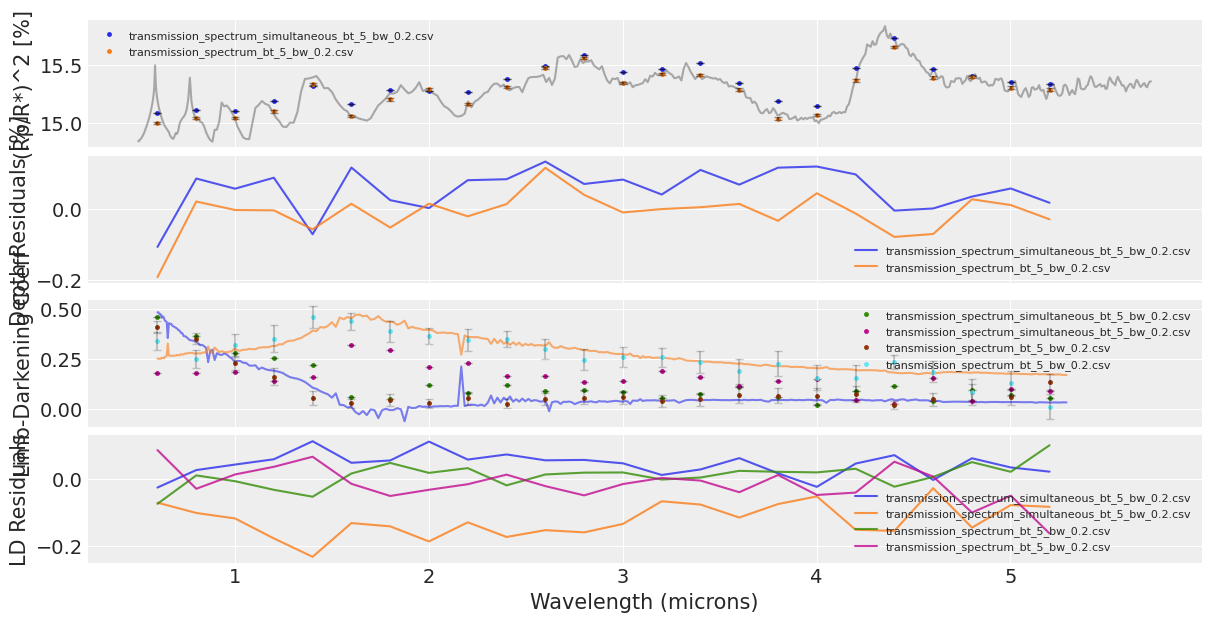

In [451]:
plot_model_and_recovered(model_ld,
                         "transmission_spectrum_simultaneous_bt_5_bw_0.2.csv",
                         "transmission_spectrum_bt_5_bw_0.2.csv"
                        )

In [ ]:
x = np.array(time - min(time))
for rf,re,rw in zip(flux,flux_error,wavelength):
    y = np.array(rf) 
    y = y/np.nanmedian(y[-50:])
    y = y-np.nanmedian(y[-50:])
    yerr = np.array(re)
    
    map_soln, model,[period,r,t0,b,u,mean] = fit_transit(x,y,yerr,init_r,init_t0, init_period,init_b,init_mean,init_u,period_error, fixed_var)
    plot_fit(x,y,yerr,map_soln)
    trace = sample(map_soln, model)
    summary = summarise(model,trace,fixed_var)
    print(summary,type(summary))
    trans_spec['wavelength'].append(rw.to_value())
    trans_spec['r'].append(summary['mean']['r'])
    trans_spec['u0'].append(summary['mean']['u[0]'])
    trans_spec['u1'].append(summary['mean']['u[1]'])
    trans_spec['mean'].append(summary['mean']['mean'])
    trans_spec['t0'].append(init_t0)
    trans_spec['b'].append(init_b)
    trans_spec['period'].append(init_period)
    trans_spec['r_err'].append(summary['sd'][0])
    trans_spec['u0_err'].append(summary['sd'][1])
    trans_spec['u1_err'].append(summary['sd'][2])
    trans_spec['mean_err'].append(summary['sd'][3])
    print("r=",summary['mean']['r'],", mean=",summary['mean']['mean'],", u=",summary['mean']['u[0]'],summary['mean']['u[1]'])
    
    print(trans_spec)
    pd_ts = pd.DataFrame(trans_spec)
    pd_ts.to_csv("transmission_spectrum_bt_"+str(bintime) +"_bw_"+str(binwave)+".csv",index=False)

('transmission_spectrum.csv', 'transmission_spectrum_bt_2_bw_0.2.csv', 'transmission_spectrum_bt_5_bw_0.2.csv')


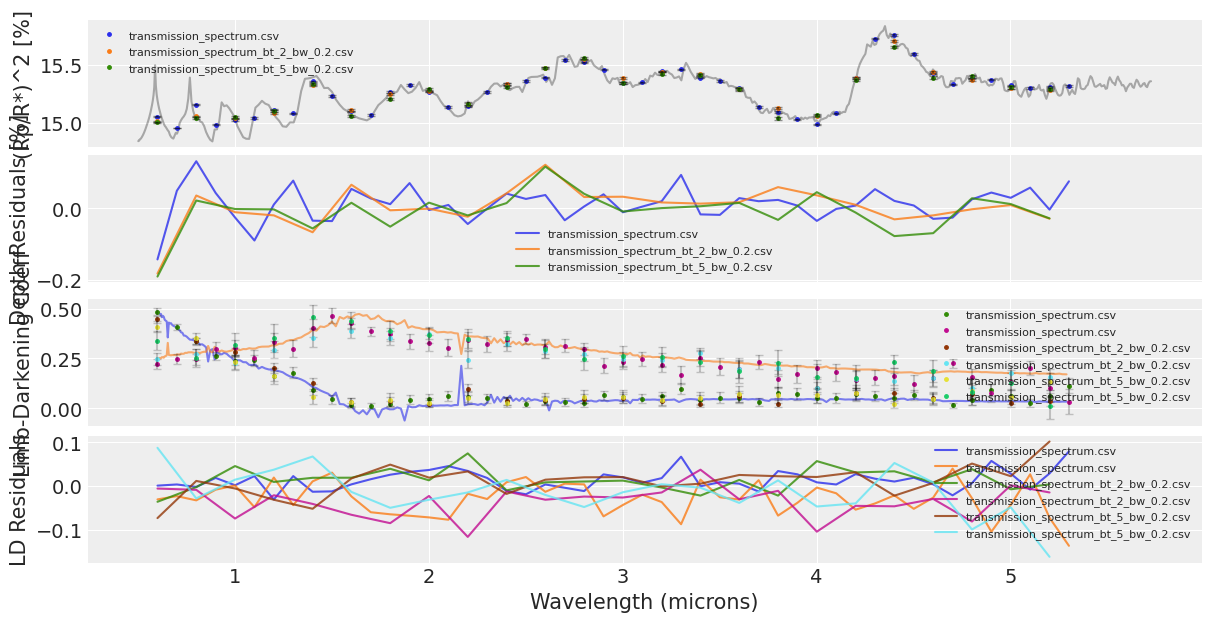

In [237]:
# import transmission spectrum
plot_model_and_recovered(model_ld,
                         "transmission_spectrum.csv",
                         "transmission_spectrum_bt_2_bw_0.2.csv",
                         "transmission_spectrum_bt_5_bw_0.2.csv")
#                          "transmission_spectrum_bt_10_bw_0.2.csv")

('transmission_spectrum_bt_10_bw_0.2.csv', 'transmission_spectrum_bt_5_bw_0.2.csv')


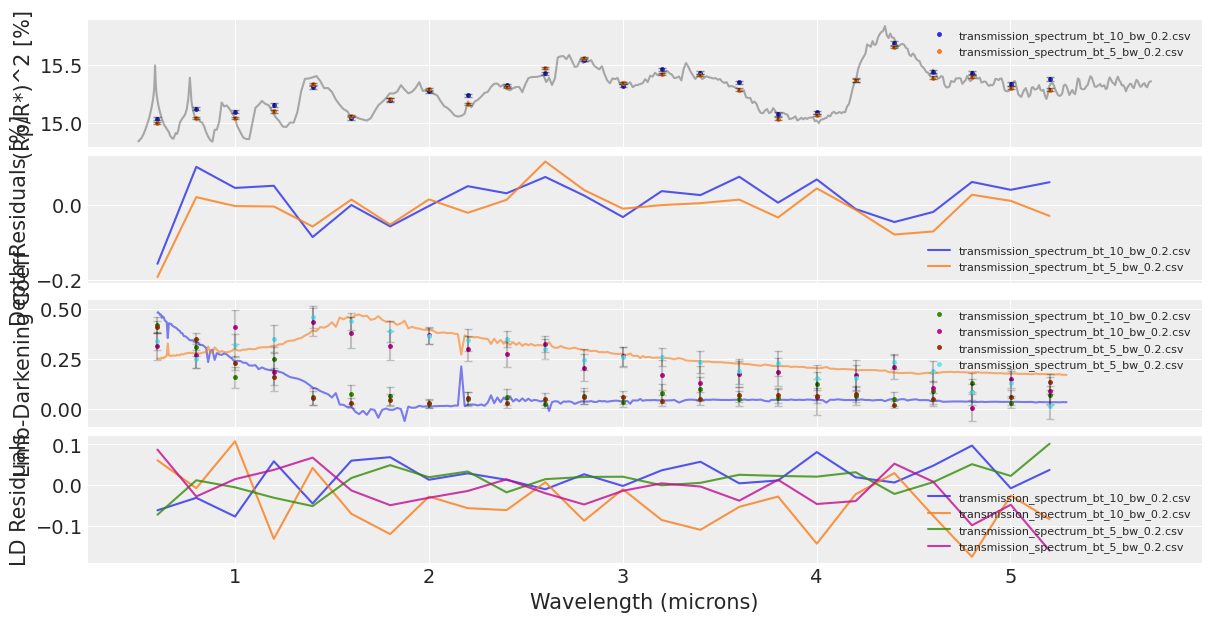

In [453]:
plot_model_and_recovered(model_ld,
                         "transmission_spectrum_bt_10_bw_0.2.csv",
                         "transmission_spectrum_bt_5_bw_0.2.csv")

('transmission_spectrum_bt_5_bw_0.1.csv', 'transmission_spectrum.csv')


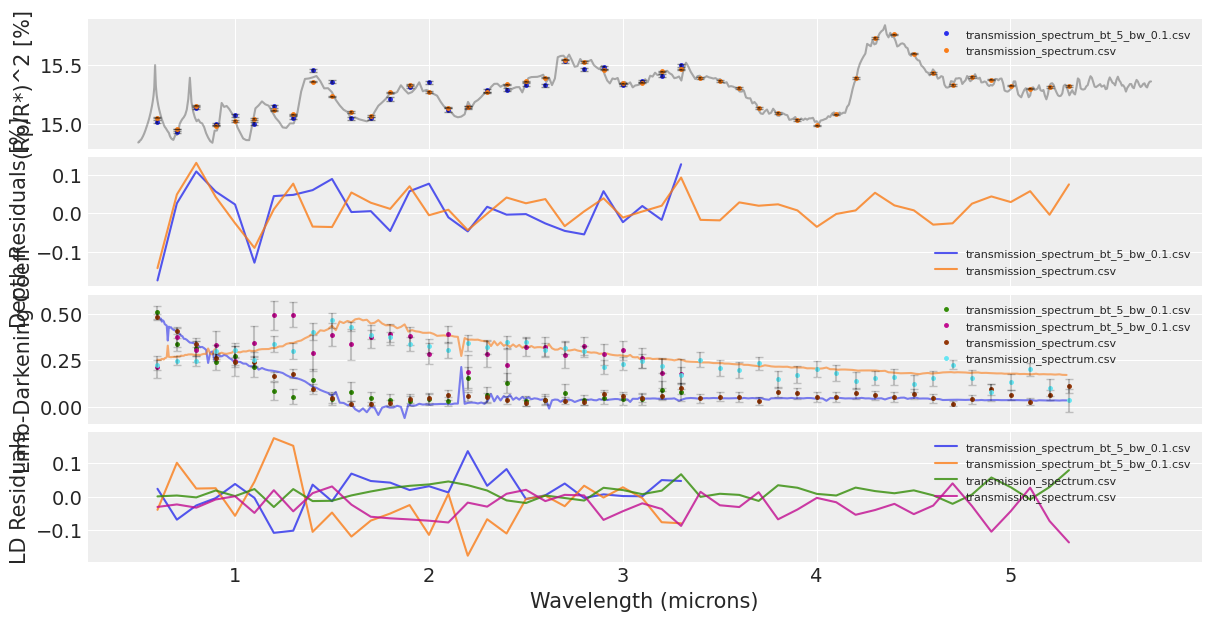

In [240]:
plot_model_and_recovered(model_ld,
                         "transmission_spectrum_bt_5_bw_0.1.csv",
                         "transmission_spectrum.csv")

In [236]:
def plot_model_and_recovered(model, *trans_spect_file):
    from astropy import units as u
    
    print(trans_spect_file)
    
    fig,ax = plt.subplots(nrows=4,figsize=(12,6),sharex=True)
    ax[0].plot(model.table['wavelength']*u.Unit("um"),100*model.table['depth'],'k',alpha=0.3,markersize=10)
    ax[0].set_ylabel("(Rp/R*)^2 [%]")
    plt.xlabel("Wavelength (microns)")
    ax[1].set_ylabel("Depth Residuals [%]")
    ax[2].set_ylabel("Limb-Darkening Coeff")
    ax[3].set_ylabel("LD Residuals")
    
    
    num_ld_coeffs = len(model.ld_coeffs[model.modemask==0][0])
    model_u = []
    for ld in range(num_ld_coeffs):
        plot_kw = dict(alpha=0.75, linewidth=2, label="LD Coeff " + str(ld))
        extract_coeff = [l[ld] for l in model.ld_coeffs[model.modemask==0]]
        ax[2].plot(model.table['wavelength'][model.modemask==0], extract_coeff,alpha=0.6)
        model_u.append(extract_coeff)
    
    for t in trans_spect_file:
        resid, resid_u0, resid_u1 =[],[],[]
        trans_spect = pd.read_csv(t)
        trans_spect['depth'] = trans_spect['r']  # **2
        trans_spect['uncertainty'] = 2 * trans_spect['r'] * trans_spect['r_err']
        halfbinwidths = [0.5*(t - s) for s, t in zip(trans_spect['wavelength'], trans_spect['wavelength'][1:])] * u.Unit("um")

        for d,w,u0,u1 in zip(trans_spect['depth'],trans_spect['wavelength'],trans_spect['u0'],trans_spect['u1']):
            resid.append(100*(d - model.table['depth'][find_nearest(model.table['wavelength'],w)]))
            resid_u0.append(u0 - model_u[0][find_nearest(model.table['wavelength'][model.modemask==0],w)])
            resid_u1.append(u1 - model_u[1][find_nearest(model.table['wavelength'][model.modemask==0],w)])
        
        ax[0].plot(trans_spect['wavelength']*u.Unit("um"),100*trans_spect['depth'],'.',markersize=5, label=t)
        # plt.errorbar(trans_spect['wavelength'].values*u.Unit("um"),100*trans_spect['depth'],xerr=np.mean(halfbinwidths),yerr=100*trans_spect['uncertainty'],capsize=3,c='k',linestyle="None")
        ax[0].errorbar(trans_spect['wavelength'].values*u.Unit("um"),100*trans_spect['depth'],yerr=100*trans_spect['uncertainty'],capsize=3,color='k',alpha=0.4,linestyle="None")

        ax[1].plot(trans_spect['wavelength']*u.Unit("um"),resid,alpha=0.8, label=t)
            
        ax[2].plot(trans_spect['wavelength']*u.Unit("um"),trans_spect['u0'],'.',markersize=5,label=t)
        ax[2].errorbar(trans_spect['wavelength'].values*u.Unit("um"),trans_spect['u0'],yerr=trans_spect['u0_err'],capsize=3,color='k',alpha=0.2,linestyle="None")
        ax[2].plot(trans_spect['wavelength']*u.Unit("um"),trans_spect['u1'],'.',markersize=5,label=t)
        ax[2].errorbar(trans_spect['wavelength'].values*u.Unit("um"),trans_spect['u1'],yerr=trans_spect['u1_err'],capsize=3,color='k',alpha=0.2,linestyle="None")
        
        ax[3].plot(trans_spect['wavelength']*u.Unit("um"),resid_u0,alpha=0.8, label=t)
        ax[3].plot(trans_spect['wavelength']*u.Unit("um"),resid_u1,alpha=0.8, label=t)
        
        
    ax[0].legend(fontsize=8)
    ax[1].legend(fontsize=8)
    ax[2].legend(fontsize=8)
    ax[3].legend(fontsize=8)
    plt.show()

# Testing out starry

In [73]:
star = starry.Primary(starry.Map(ydeg=0, udeg=2, amp=1.0), m=1.0, r=1.0, prot=1.0)
star.map[1] = 0.40
star.map[2] = 0.26

Compiling `render_ld`... Done.


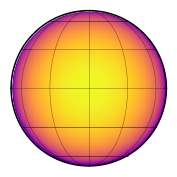

In [74]:
star.map.show()

In [75]:
planet = starry.kepler.Secondary(
    starry.Map(ydeg=5, amp=5e-3),  # the surface map
    m=0,  # mass in solar masses
    r=0.1,  # radius in solar radii
    porb=1.0,  # orbital period in days
    prot=1.0,  # rotation period in days (synchronous)
    Omega=30,  # longitude of ascending node in degrees
    ecc=0.3,  # eccentricity
    w=30,  # longitude of pericenter in degrees
    t0=0,  # time of transit in days
)

Pre-computing some matrices... Done.


In [76]:
np.random.seed(123)
planet.map[1:, :] = 0.01 * np.random.randn(planet.map.Ny - 1)

Compiling `render`... Done.


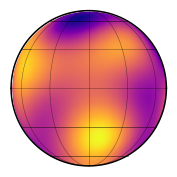

In [12]:
planet.map.show()

In [77]:
planet.theta0 = 180

In [19]:
# This routine performs gradient descent to try to find the global minimum of the map, and returns
# the latitude, longitude, and value of the intensity at the minimum.
planet.map.minimize()

ERROR (theano.graph.opt): Optimization failure due to: constant_folding
ERROR (theano.graph.opt): node: for{cpu,scan_fn}(TensorConstant{25}, TensorConstant{[0.9952230...64586558]}, TensorConstant{[ 0.097627...76345115]}, TensorConstant{(25,) of 0.0}, TensorConstant{[-0.097627...76345115]}, TensorConstant{[0.9952230...64586558]}, TensorConstant{(25,) of 0.0}, TensorConstant{(25,) of 0.0}, TensorConstant{(25,) of 0.0}, TensorConstant{(25,) of 1.0}, TensorConstant{25})
ERROR (theano.graph.opt): TRACEBACK:
ERROR (theano.graph.opt): Traceback (most recent call last):
  File "/Users/catrionamurray/opt/anaconda3/envs/ers-transit/lib/python3.9/site-packages/theano/scan/scan_perform_ext.py", line 47, in <module>
    raise ImportError("Scan code version mismatch")
ImportError: Scan code version mismatch

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/Users/catrionamurray/opt/anaconda3/envs/ers-transit/lib/python3.9/site-packages/t


You can find the C code in this temporary file: /var/folders/6k/5j78gjkn74b4xb382c27jzwr0000gn/T/theano_compilation_error_juyqzqby
library imit=] is not found.


ERROR (theano.graph.opt): Optimization failure due to: constant_folding
ERROR (theano.graph.opt): node: for{cpu,scan_fn}(TensorConstant{25}, TensorConstant{[ 0.637806...65521399]}, TensorConstant{(25,) of 0.0}, TensorConstant{[-0.770196...75544333]}, TensorConstant{(25,) of 0.0}, TensorConstant{[1. 1. 1. ..1. 1.
 1.]}, TensorConstant{(25,) of 0.0}, TensorConstant{[ 0.770196...75544333]}, TensorConstant{(25,) of 0.0}, TensorConstant{[ 0.637806...65521399]}, TensorConstant{25})
ERROR (theano.graph.opt): TRACEBACK:
ERROR (theano.graph.opt): Traceback (most recent call last):
  File "/Users/catrionamurray/opt/anaconda3/envs/ers-transit/lib/python3.9/site-packages/theano/scan/scan_perform_ext.py", line 47, in <module>
    raise ImportError("Scan code version mismatch")
ImportError: Scan code version mismatch

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/Users/catrionamurray/opt/anaconda3/envs/ers-transit/lib/python3.9/site-


You can find the C code in this temporary file: /var/folders/6k/5j78gjkn74b4xb382c27jzwr0000gn/T/theano_compilation_error_5hj3s427
library imit=] is not found.


ERROR (theano.graph.opt): Optimization failure due to: constant_folding
ERROR (theano.graph.opt): node: for{cpu,scan_fn}(TensorConstant{25}, TensorConstant{[0.9952230...64586558]}, TensorConstant{[ 0.097627...76345115]}, TensorConstant{(25,) of 0.0}, TensorConstant{[-0.097627...76345115]}, TensorConstant{[0.9952230...64586558]}, TensorConstant{(25,) of 0.0}, TensorConstant{(25,) of 0.0}, TensorConstant{(25,) of 0.0}, TensorConstant{(25,) of 1.0}, TensorConstant{25})
ERROR (theano.graph.opt): TRACEBACK:
ERROR (theano.graph.opt): Traceback (most recent call last):
  File "/Users/catrionamurray/opt/anaconda3/envs/ers-transit/lib/python3.9/site-packages/theano/scan/scan_perform_ext.py", line 47, in <module>
    raise ImportError("Scan code version mismatch")
ImportError: Scan code version mismatch

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/Users/catrionamurray/opt/anaconda3/envs/ers-transit/lib/python3.9/site-packages/t


You can find the C code in this temporary file: /var/folders/6k/5j78gjkn74b4xb382c27jzwr0000gn/T/theano_compilation_error_1gvmo5i9
library imit=] is not found.


ERROR (theano.graph.opt): Optimization failure due to: constant_folding
ERROR (theano.graph.opt): node: for{cpu,scan_fn}(TensorConstant{25}, TensorConstant{[ 0.637806...65521399]}, TensorConstant{(25,) of 0.0}, TensorConstant{[-0.770196...75544333]}, TensorConstant{(25,) of 0.0}, TensorConstant{[1. 1. 1. ..1. 1.
 1.]}, TensorConstant{(25,) of 0.0}, TensorConstant{[ 0.770196...75544333]}, TensorConstant{(25,) of 0.0}, TensorConstant{[ 0.637806...65521399]}, TensorConstant{25})
ERROR (theano.graph.opt): TRACEBACK:
ERROR (theano.graph.opt): Traceback (most recent call last):
  File "/Users/catrionamurray/opt/anaconda3/envs/ers-transit/lib/python3.9/site-packages/theano/scan/scan_perform_ext.py", line 47, in <module>
    raise ImportError("Scan code version mismatch")
ImportError: Scan code version mismatch

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/Users/catrionamurray/opt/anaconda3/envs/ers-transit/lib/python3.9/site-


You can find the C code in this temporary file: /var/folders/6k/5j78gjkn74b4xb382c27jzwr0000gn/T/theano_compilation_error_762uh7jx
library imit=] is not found.


ERROR (theano.graph.opt): Optimization failure due to: constant_folding
ERROR (theano.graph.opt): node: for{cpu,scan_fn}(TensorConstant{25}, TensorConstant{[0.9952230...64586558]}, TensorConstant{[ 0.097627...76345115]}, TensorConstant{(25,) of 0.0}, TensorConstant{[-0.097627...76345115]}, TensorConstant{[0.9952230...64586558]}, TensorConstant{(25,) of 0.0}, TensorConstant{(25,) of 0.0}, TensorConstant{(25,) of 0.0}, TensorConstant{(25,) of 1.0}, TensorConstant{25})
ERROR (theano.graph.opt): TRACEBACK:
ERROR (theano.graph.opt): Traceback (most recent call last):
  File "/Users/catrionamurray/opt/anaconda3/envs/ers-transit/lib/python3.9/site-packages/theano/scan/scan_perform_ext.py", line 47, in <module>
    raise ImportError("Scan code version mismatch")
ImportError: Scan code version mismatch

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/Users/catrionamurray/opt/anaconda3/envs/ers-transit/lib/python3.9/site-packages/t


You can find the C code in this temporary file: /var/folders/6k/5j78gjkn74b4xb382c27jzwr0000gn/T/theano_compilation_error_q7_4p7km
library imit=] is not found.


ERROR (theano.graph.opt): Optimization failure due to: constant_folding
ERROR (theano.graph.opt): node: for{cpu,scan_fn}(TensorConstant{25}, TensorConstant{[ 0.637806...65521399]}, TensorConstant{(25,) of 0.0}, TensorConstant{[-0.770196...75544333]}, TensorConstant{(25,) of 0.0}, TensorConstant{[1. 1. 1. ..1. 1.
 1.]}, TensorConstant{(25,) of 0.0}, TensorConstant{[ 0.770196...75544333]}, TensorConstant{(25,) of 0.0}, TensorConstant{[ 0.637806...65521399]}, TensorConstant{25})
ERROR (theano.graph.opt): TRACEBACK:
ERROR (theano.graph.opt): Traceback (most recent call last):
  File "/Users/catrionamurray/opt/anaconda3/envs/ers-transit/lib/python3.9/site-packages/theano/scan/scan_perform_ext.py", line 47, in <module>
    raise ImportError("Scan code version mismatch")
ImportError: Scan code version mismatch

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/Users/catrionamurray/opt/anaconda3/envs/ers-transit/lib/python3.9/site-


You can find the C code in this temporary file: /var/folders/6k/5j78gjkn74b4xb382c27jzwr0000gn/T/theano_compilation_error_zc67uxlb
library imit=] is not found.


ERROR (theano.graph.opt): Optimization failure due to: constant_folding
ERROR (theano.graph.opt): node: for{cpu,scan_fn}(TensorConstant{25}, TensorConstant{[0.9952230...64586558]}, TensorConstant{[ 0.097627...76345115]}, TensorConstant{(25,) of 0.0}, TensorConstant{[-0.097627...76345115]}, TensorConstant{[0.9952230...64586558]}, TensorConstant{(25,) of 0.0}, TensorConstant{(25,) of 0.0}, TensorConstant{(25,) of 0.0}, TensorConstant{(25,) of 1.0}, TensorConstant{25})
ERROR (theano.graph.opt): TRACEBACK:
ERROR (theano.graph.opt): Traceback (most recent call last):
  File "/Users/catrionamurray/opt/anaconda3/envs/ers-transit/lib/python3.9/site-packages/theano/scan/scan_perform_ext.py", line 47, in <module>
    raise ImportError("Scan code version mismatch")
ImportError: Scan code version mismatch

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/Users/catrionamurray/opt/anaconda3/envs/ers-transit/lib/python3.9/site-packages/t


You can find the C code in this temporary file: /var/folders/6k/5j78gjkn74b4xb382c27jzwr0000gn/T/theano_compilation_error_wml06b0t
library imit=] is not found.


ERROR (theano.graph.opt): Optimization failure due to: constant_folding
ERROR (theano.graph.opt): node: for{cpu,scan_fn}(TensorConstant{25}, TensorConstant{[ 0.637806...65521399]}, TensorConstant{(25,) of 0.0}, TensorConstant{[-0.770196...75544333]}, TensorConstant{(25,) of 0.0}, TensorConstant{[1. 1. 1. ..1. 1.
 1.]}, TensorConstant{(25,) of 0.0}, TensorConstant{[ 0.770196...75544333]}, TensorConstant{(25,) of 0.0}, TensorConstant{[ 0.637806...65521399]}, TensorConstant{25})
ERROR (theano.graph.opt): TRACEBACK:
ERROR (theano.graph.opt): Traceback (most recent call last):
  File "/Users/catrionamurray/opt/anaconda3/envs/ers-transit/lib/python3.9/site-packages/theano/scan/scan_perform_ext.py", line 47, in <module>
    raise ImportError("Scan code version mismatch")
ImportError: Scan code version mismatch

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/Users/catrionamurray/opt/anaconda3/envs/ers-transit/lib/python3.9/site-


You can find the C code in this temporary file: /var/folders/6k/5j78gjkn74b4xb382c27jzwr0000gn/T/theano_compilation_error_5fz_jesf
library imit=] is not found.


ERROR (theano.graph.opt): Optimization failure due to: constant_folding
ERROR (theano.graph.opt): node: for{cpu,scan_fn&scan_fn}(TensorConstant{25}, TensorConstant{[0.9952230...64586558]}, TensorConstant{[ 0.097627...76345115]}, TensorConstant{[-0.097627...76345115]}, TensorConstant{[ 0.637806...65521399]}, TensorConstant{[-0.770196...75544333]}, TensorConstant{[1. 1. 1. ..1. 1.
 1.]}, TensorConstant{[ 0.770196...75544333]}, TensorConstant{25}, TensorConstant{25})
ERROR (theano.graph.opt): TRACEBACK:
ERROR (theano.graph.opt): Traceback (most recent call last):
  File "/Users/catrionamurray/opt/anaconda3/envs/ers-transit/lib/python3.9/site-packages/theano/scan/scan_perform_ext.py", line 47, in <module>
    raise ImportError("Scan code version mismatch")
ImportError: Scan code version mismatch

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/Users/catrionamurray/opt/anaconda3/envs/ers-transit/lib/python3.9/site-packages/the


You can find the C code in this temporary file: /var/folders/6k/5j78gjkn74b4xb382c27jzwr0000gn/T/theano_compilation_error_75u51e8s
library imit=] is not found.


ERROR (theano.graph.opt): Optimization failure due to: constant_folding
ERROR (theano.graph.opt): node: for{cpu,scan_fn&scan_fn}(TensorConstant{25}, TensorConstant{[0.9952230...64586558]}, TensorConstant{[ 0.097627...76345115]}, TensorConstant{[-0.097627...76345115]}, TensorConstant{[ 0.637806...65521399]}, TensorConstant{[-0.770196...75544333]}, TensorConstant{[1. 1. 1. ..1. 1.
 1.]}, TensorConstant{[ 0.770196...75544333]}, TensorConstant{25}, TensorConstant{25})
ERROR (theano.graph.opt): TRACEBACK:
ERROR (theano.graph.opt): Traceback (most recent call last):
  File "/Users/catrionamurray/opt/anaconda3/envs/ers-transit/lib/python3.9/site-packages/theano/scan/scan_perform_ext.py", line 47, in <module>
    raise ImportError("Scan code version mismatch")
ImportError: Scan code version mismatch

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/Users/catrionamurray/opt/anaconda3/envs/ers-transit/lib/python3.9/site-packages/the


You can find the C code in this temporary file: /var/folders/6k/5j78gjkn74b4xb382c27jzwr0000gn/T/theano_compilation_error_dm8qq3gc
library imit=] is not found.


ERROR (theano.graph.opt): Optimization failure due to: constant_folding
ERROR (theano.graph.opt): node: for{cpu,scan_fn&scan_fn}(TensorConstant{25}, TensorConstant{[0.9952230...64586558]}, TensorConstant{[ 0.097627...76345115]}, TensorConstant{[-0.097627...76345115]}, TensorConstant{[ 0.637806...65521399]}, TensorConstant{[-0.770196...75544333]}, TensorConstant{[1. 1. 1. ..1. 1.
 1.]}, TensorConstant{[ 0.770196...75544333]}, TensorConstant{25}, TensorConstant{25})
ERROR (theano.graph.opt): TRACEBACK:
ERROR (theano.graph.opt): Traceback (most recent call last):
  File "/Users/catrionamurray/opt/anaconda3/envs/ers-transit/lib/python3.9/site-packages/theano/scan/scan_perform_ext.py", line 47, in <module>
    raise ImportError("Scan code version mismatch")
ImportError: Scan code version mismatch

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/Users/catrionamurray/opt/anaconda3/envs/ers-transit/lib/python3.9/site-packages/the


You can find the C code in this temporary file: /var/folders/6k/5j78gjkn74b4xb382c27jzwr0000gn/T/theano_compilation_error_qzgtmh_n
library imit=] is not found.


ERROR (theano.graph.opt): Optimization failure due to: constant_folding
ERROR (theano.graph.opt): node: for{cpu,scan_fn&scan_fn}(TensorConstant{25}, TensorConstant{[0.9952230...64586558]}, TensorConstant{[ 0.097627...76345115]}, TensorConstant{[-0.097627...76345115]}, TensorConstant{[ 0.637806...65521399]}, TensorConstant{[-0.770196...75544333]}, TensorConstant{[1. 1. 1. ..1. 1.
 1.]}, TensorConstant{[ 0.770196...75544333]}, TensorConstant{25}, TensorConstant{25})
ERROR (theano.graph.opt): TRACEBACK:
ERROR (theano.graph.opt): Traceback (most recent call last):
  File "/Users/catrionamurray/opt/anaconda3/envs/ers-transit/lib/python3.9/site-packages/theano/scan/scan_perform_ext.py", line 47, in <module>
    raise ImportError("Scan code version mismatch")
ImportError: Scan code version mismatch

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/Users/catrionamurray/opt/anaconda3/envs/ers-transit/lib/python3.9/site-packages/the


You can find the C code in this temporary file: /var/folders/6k/5j78gjkn74b4xb382c27jzwr0000gn/T/theano_compilation_error_sqbwrt9x
library imit=] is not found.


ERROR (theano.graph.opt): Optimization failure due to: constant_folding
ERROR (theano.graph.opt): node: for{cpu,scan_fn&scan_fn}(TensorConstant{25}, TensorConstant{[0.9952230...64586558]}, TensorConstant{[ 0.097627...76345115]}, TensorConstant{[-0.097627...76345115]}, TensorConstant{[ 0.637806...65521399]}, TensorConstant{[-0.770196...75544333]}, TensorConstant{[1. 1. 1. ..1. 1.
 1.]}, TensorConstant{[ 0.770196...75544333]}, TensorConstant{25}, TensorConstant{25})
ERROR (theano.graph.opt): TRACEBACK:
ERROR (theano.graph.opt): Traceback (most recent call last):
  File "/Users/catrionamurray/opt/anaconda3/envs/ers-transit/lib/python3.9/site-packages/theano/scan/scan_perform_ext.py", line 47, in <module>
    raise ImportError("Scan code version mismatch")
ImportError: Scan code version mismatch

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/Users/catrionamurray/opt/anaconda3/envs/ers-transit/lib/python3.9/site-packages/the


You can find the C code in this temporary file: /var/folders/6k/5j78gjkn74b4xb382c27jzwr0000gn/T/theano_compilation_error_mgwztuos
library imit=] is not found.

You can find the C code in this temporary file: /var/folders/6k/5j78gjkn74b4xb382c27jzwr0000gn/T/theano_compilation_error_5v0o19fq
library imit=] is not found.


Exception: ('The following error happened while compiling the node', for{cpu,scan_fn&scan_fn}(TensorConstant{25}, TensorConstant{[0.9952230...64586558]}, TensorConstant{[ 0.097627...76345115]}, TensorConstant{[-0.097627...76345115]}, TensorConstant{[ 0.637806...65521399]}, TensorConstant{[-0.770196...75544333]}, TensorConstant{[1. 1. 1. ..1. 1.
 1.]}, TensorConstant{[ 0.770196...75544333]}, TensorConstant{25}, TensorConstant{25}), '\n', 'Compilation failed (return status=1): In file included from /Users/catrionamurray/.theano/compiledir_macOS-10.16-x86_64-i386-64bit-i386-3.9.7-64/scan_perform/mod.cpp:4:. In file included from /Users/catrionamurray/opt/anaconda3/envs/ers-transit/include/python3.9/Python.h:25:. In file included from /usr/local/include/stdio.h:64:. /usr/local/include/_stdio.h:93:16: warning: pointer is missing a nullability type specifier (_Nonnull, _Nullable, or _Null_unspecified) [-Wnullability-completeness].         unsigned char   *_base;.                         ^. /usr/local/include/_stdio.h:93:16: note: insert \'_Nullable\' if the pointer may be null.         unsigned char   *_base;.                         ^.                           _Nullable . /usr/local/include/_stdio.h:93:16: note: insert \'_Nonnull\' if the pointer should never be null.         unsigned char   *_base;.                         ^.                           _Nonnull . /usr/local/include/_stdio.h:138:32: warning: pointer is missing a nullability type specifier (_Nonnull, _Nullable, or _Null_unspecified) [-Wnullability-completeness].         int     (* _Nullable _read) (void *, char *, int);.                                           ^. /usr/local/include/_stdio.h:138:32: note: insert \'_Nullable\' if the pointer may be null.         int     (* _Nullable _read) (void *, char *, int);.                                           ^.                                            _Nullable. /usr/local/include/_stdio.h:138:32: note: insert \'_Nonnull\' if the pointer should never be null.         int     (* _Nullable _read) (void *, char *, int);.                                           ^.                                            _Nonnull. /usr/local/include/_stdio.h:138:40: warning: pointer is missing a nullability type specifier (_Nonnull, _Nullable, or _Null_unspecified) [-Wnullability-completeness].         int     (* _Nullable _read) (void *, char *, int);.                                                   ^. /usr/local/include/_stdio.h:138:40: note: insert \'_Nullable\' if the pointer may be null.         int     (* _Nullable _read) (void *, char *, int);.                                                   ^.                                                    _Nullable. /usr/local/include/_stdio.h:138:40: note: insert \'_Nonnull\' if the pointer should never be null.         int     (* _Nullable _read) (void *, char *, int);.                                                   ^.                                                    _Nonnull. /usr/local/include/_stdio.h:139:35: warning: pointer is missing a nullability type specifier (_Nonnull, _Nullable, or _Null_unspecified) [-Wnullability-completeness].         fpos_t  (* _Nullable _seek) (void *, fpos_t, int);.                                           ^. /usr/local/include/_stdio.h:139:35: note: insert \'_Nullable\' if the pointer may be null.         fpos_t  (* _Nullable _seek) (void *, fpos_t, int);.                                           ^.                                            _Nullable. /usr/local/include/_stdio.h:139:35: note: insert \'_Nonnull\' if the pointer should never be null.         fpos_t  (* _Nullable _seek) (void *, fpos_t, int);.                                           ^.                                            _Nonnull. /usr/local/include/_stdio.h:140:32: warning: pointer is missing a nullability type specifier (_Nonnull, _Nullable, or _Null_unspecified) [-Wnullability-completeness].         int     (* _Nullable _write)(void *, const char *, int);.                                           ^. /usr/local/include/_stdio.h:140:32: note: insert \'_Nullable\' if the pointer may be null.         int     (* _Nullable _write)(void *, const char *, int);.                                           ^.                                            _Nullable. /usr/local/include/_stdio.h:140:32: note: insert \'_Nonnull\' if the pointer should never be null.         int     (* _Nullable _write)(void *, const char *, int);.                                           ^.                                            _Nonnull. /usr/local/include/_stdio.h:140:46: warning: pointer is missing a nullability type specifier (_Nonnull, _Nullable, or _Null_unspecified) [-Wnullability-completeness].         int     (* _Nullable _write)(void *, const char *, int);.                                                         ^. /usr/local/include/_stdio.h:140:46: note: insert \'_Nullable\' if the pointer may be null.         int     (* _Nullable _write)(void *, const char *, int);.                                                         ^.                                                          _Nullable. /usr/local/include/_stdio.h:140:46: note: insert \'_Nonnull\' if the pointer should never be null.         int     (* _Nullable _write)(void *, const char *, int);.                                                         ^.                                                          _Nonnull. /usr/local/include/_stdio.h:144:18: warning: pointer is missing a nullability type specifier (_Nonnull, _Nullable, or _Null_unspecified) [-Wnullability-completeness].         struct __sFILEX *_extra; /* additions to FILE to not break ABI */.                         ^. /usr/local/include/_stdio.h:144:18: note: insert \'_Nullable\' if the pointer may be null.         struct __sFILEX *_extra; /* additions to FILE to not break ABI */.                         ^.                           _Nullable . /usr/local/include/_stdio.h:144:18: note: insert \'_Nonnull\' if the pointer should never be null.         struct __sFILEX *_extra; /* additions to FILE to not break ABI */.                         ^.                           _Nonnull . In file included from /Users/catrionamurray/.theano/compiledir_macOS-10.16-x86_64-i386-64bit-i386-3.9.7-64/scan_perform/mod.cpp:4:. In file included from /Users/catrionamurray/opt/anaconda3/envs/ers-transit/include/python3.9/Python.h:25:. /usr/local/include/stdio.h:67:13: warning: pointer is missing a nullability type specifier (_Nonnull, _Nullable, or _Null_unspecified) [-Wnullability-completeness]. extern FILE *__stdinp;.             ^. /usr/local/include/stdio.h:67:13: note: insert \'_Nullable\' if the pointer may be null. extern FILE *__stdinp;.             ^.               _Nullable . /usr/local/include/stdio.h:67:13: note: insert \'_Nonnull\' if the pointer should never be null. extern FILE *__stdinp;.             ^.               _Nonnull . /usr/local/include/stdio.h:386:41: warning: pointer is missing a nullability type specifier (_Nonnull, _Nullable, or _Null_unspecified) [-Wnullability-completeness].                  int (* _Nullable)(void *, const char *, int),.                                         ^. /usr/local/include/stdio.h:386:41: note: insert \'_Nullable\' if the pointer may be null.                  int (* _Nullable)(void *, const char *, int),.                                         ^.                                          _Nullable. /usr/local/include/stdio.h:386:41: note: insert \'_Nonnull\' if the pointer should never be null.                  int (* _Nullable)(void *, const char *, int),.                                         ^.                                          _Nonnull. /usr/local/include/stdio.h:386:55: warning: pointer is missing a nullability type specifier (_Nonnull, _Nullable, or _Null_unspecified) [-Wnullability-completeness].                  int (* _Nullable)(void *, const char *, int),.                                                       ^. /usr/local/include/stdio.h:386:55: note: insert \'_Nullable\' if the pointer may be null.                  int (* _Nullable)(void *, const char *, int),.                                                       ^.                                                        _Nullable. /usr/local/include/stdio.h:386:55: note: insert \'_Nonnull\' if the pointer should never be null.                  int (* _Nullable)(void *, const char *, int),.                                                       ^.                                                        _Nonnull. /usr/local/include/stdio.h:387:44: warning: pointer is missing a nullability type specifier (_Nonnull, _Nullable, or _Null_unspecified) [-Wnullability-completeness].                  fpos_t (* _Nullable)(void *, fpos_t, int),.                                            ^. /usr/local/include/stdio.h:387:44: note: insert \'_Nullable\' if the pointer may be null.                  fpos_t (* _Nullable)(void *, fpos_t, int),.                                            ^.                                             _Nullable. /usr/local/include/stdio.h:387:44: note: insert \'_Nonnull\' if the pointer should never be null.                  fpos_t (* _Nullable)(void *, fpos_t, int),.                                            ^.                                             _Nonnull. /usr/local/include/stdio.h:388:41: warning: pointer is missing a nullability type specifier (_Nonnull, _Nullable, or _Null_unspecified) [-Wnullability-completeness].                  int (* _Nullable)(void *));.                                         ^. /usr/local/include/stdio.h:388:41: note: insert \'_Nullable\' if the pointer may be null.                  int (* _Nullable)(void *));.                                         ^.                                          _Nullable. /usr/local/include/stdio.h:388:41: note: insert \'_Nonnull\' if the pointer should never be null.                  int (* _Nullable)(void *));.                                         ^.                                          _Nonnull. /usr/local/include/stdio.h:384:6: warning: pointer is missing a nullability type specifier (_Nonnull, _Nullable, or _Null_unspecified) [-Wnullability-completeness]. FILE    *funopen(const void *,.         ^. /usr/local/include/stdio.h:384:6: note: insert \'_Nullable\' if the pointer may be null. FILE    *funopen(const void *,.         ^.           _Nullable . /usr/local/include/stdio.h:384:6: note: insert \'_Nonnull\' if the pointer should never be null. FILE    *funopen(const void *,.         ^.           _Nonnull . In file included from /Users/catrionamurray/.theano/compiledir_macOS-10.16-x86_64-i386-64bit-i386-3.9.7-64/scan_perform/mod.cpp:4:. In file included from /Users/catrionamurray/opt/anaconda3/envs/ers-transit/include/python3.9/Python.h:34:. /usr/local/include/stdlib.h:134:25: warning: pointer is missing a nullability type specifier (_Nonnull, _Nullable, or _Null_unspecified) [-Wnullability-completeness]. double   atof(const char *);.                          ^. /usr/local/include/stdlib.h:134:25: note: insert \'_Nullable\' if the pointer may be null. double   atof(const char *);.                          ^.                           _Nullable. /usr/local/include/stdlib.h:134:25: note: insert \'_Nonnull\' if the pointer should never be null. double   atof(const char *);.                          ^.                           _Nonnull. /usr/local/include/stdlib.h:135:22: warning: pointer is missing a nullability type specifier (_Nonnull, _Nullable, or _Null_unspecified) [-Wnullability-completeness]. int      atoi(const char *);.                          ^. /usr/local/include/stdlib.h:135:22: note: insert \'_Nullable\' if the pointer may be null. int      atoi(const char *);.                          ^.                           _Nullable. /usr/local/include/stdlib.h:135:22: note: insert \'_Nonnull\' if the pointer should never be null. int      atoi(const char *);.                          ^.                           _Nonnull. /usr/local/include/stdlib.h:136:23: warning: pointer is missing a nullability type specifier (_Nonnull, _Nullable, or _Null_unspecified) [-Wnullability-completeness]. long     atol(const char *);.                          ^. /usr/local/include/stdlib.h:136:23: note: insert \'_Nullable\' if the pointer may be null. long     atol(const char *);.                          ^.                           _Nullable. /usr/local/include/stdlib.h:136:23: note: insert \'_Nonnull\' if the pointer should never be null. long     atol(const char *);.                          ^.                           _Nonnull. /usr/local/include/stdlib.h:139:20: warning: pointer is missing a nullability type specifier (_Nonnull, _Nullable, or _Null_unspecified) [-Wnullability-completeness].          atoll(const char *);.                           ^. /usr/local/include/stdlib.h:139:20: note: insert \'_Nullable\' if the pointer may be null.          atoll(const char *);.                           ^.                            _Nullable. /usr/local/include/stdlib.h:139:20: note: insert \'_Nonnull\' if the pointer should never be null.          atoll(const char *);.                           ^.                            _Nonnull. /usr/local/include/stdlib.h:141:26: warning: pointer is missing a nullability type specifier (_Nonnull, _Nullable, or _Null_unspecified) [-Wnullability-completeness]. void    *bsearch(const void *__key, const void *__base, size_t __nel,.                             ^. /usr/local/include/stdlib.h:141:26: note: insert \'_Nullable\' if the pointer may be null. void    *bsearch(const void *__key, const void *__base, size_t __nel,.                             ^.                               _Nullable . /usr/local/include/stdlib.h:141:26: note: insert \'_Nonnull\' if the pointer should never be null. void    *bsearch(const void *__key, const void *__base, size_t __nel,.                             ^.                               _Nonnull . /usr/local/include/stdlib.h:141:45: warning: pointer is missing a nullability type specifier (_Nonnull, _Nullable, or _Null_unspecified) [-Wnullability-completeness]. void    *bsearch(const void *__key, const void *__base, size_t __nel,.                                                ^. /usr/local/include/stdlib.h:141:45: note: insert \'_Nullable\' if the pointer may be null. void    *bsearch(const void *__key, const void *__base, size_t __nel,.                                                ^.                                                  _Nullable . /usr/local/include/stdlib.h:141:45: note: insert \'_Nonnull\' if the pointer should never be null. void    *bsearch(const void *__key, const void *__base, size_t __nel,.                                                ^.                                                  _Nonnull . /usr/local/include/stdlib.h:142:59: warning: pointer is missing a nullability type specifier (_Nonnull, _Nullable, or _Null_unspecified) [-Wnullability-completeness].             size_t __width, int (* _Nonnull __compar)(const void *, const void *));.                                                                  ^. /usr/local/include/stdlib.h:142:59: note: insert \'_Nullable\' if the pointer may be null.             size_t __width, int (* _Nonnull __compar)(const void *, const void *));.                                                                  ^.                                                                   _Nullable. /usr/local/include/stdlib.h:142:59: note: insert \'_Nonnull\' if the pointer should never be null.             size_t __width, int (* _Nonnull __compar)(const void *, const void *));.                                                                  ^.                                                                   _Nonnull. /usr/local/include/stdlib.h:142:73: warning: pointer is missing a nullability type specifier (_Nonnull, _Nullable, or _Null_unspecified) [-Wnullability-completeness].             size_t __width, int (* _Nonnull __compar)(const void *, const void *));.                                                                                ^. /usr/local/include/stdlib.h:142:73: note: insert \'_Nullable\' if the pointer may be null.             size_t __width, int (* _Nonnull __compar)(const void *, const void *));.                                                                                ^.                                                                                 _Nullable. /usr/local/include/stdlib.h:142:73: note: insert \'_Nonnull\' if the pointer should never be null.             size_t __width, int (* _Nonnull __compar)(const void *, const void *));.                                                                                ^.                                                                                 _Nonnull. /usr/local/include/stdlib.h:141:6: warning: pointer is missing a nullability type specifier (_Nonnull, _Nullable, or _Null_unspecified) [-Wnullability-completeness]. void    *bsearch(const void *__key, const void *__base, size_t __nel,.         ^. /usr/local/include/stdlib.h:141:6: note: insert \'_Nullable\' if the pointer may be null. void    *bsearch(const void *__key, const void *__base, size_t __nel,.         ^.           _Nullable . /usr/local/include/stdlib.h:141:6: note: insert \'_Nonnull\' if the pointer should never be null. void    *bsearch(const void *__key, const void *__base, size_t __nel,.         ^.           _Nonnull . /usr/local/include/stdlib.h:147:25: warning: pointer is missing a nullability type specifier (_Nonnull, _Nullable, or _Null_unspecified) [-Wnullability-completeness]. char    *getenv(const char *);.                            ^. /usr/local/include/stdlib.h:147:25: note: insert \'_Nullable\' if the pointer may be null. char    *getenv(const char *);.                            ^.                             _Nullable. /usr/local/include/stdlib.h:147:25: note: insert \'_Nonnull\' if the pointer should never be null. char    *getenv(const char *);.                            ^.                             _Nonnull. /usr/local/include/stdlib.h:147:6: warning: pointer is missing a nullability type specifier (_Nonnull, _Nullable, or _Null_unspecified) [-Wnullability-completeness]. char    *getenv(const char *);.         ^. /usr/local/include/stdlib.h:147:6: note: insert \'_Nullable\' if the pointer may be null. char    *getenv(const char *);.         ^.           _Nullable . /usr/local/include/stdlib.h:147:6: note: insert \'_Nonnull\' if the pointer should never be null. char    *getenv(const char *);.         ^.           _Nonnull . /usr/local/include/stdlib.h:156:23: warning: pointer is missing a nullability type specifier (_Nonnull, _Nullable, or _Null_unspecified) [-Wnullability-completeness]. int      mblen(const char *__s, size_t __n);.                           ^. /usr/local/include/stdlib.h:156:23: note: insert \'_Nullable\' if the pointer may be null. int      mblen(const char *__s, size_t __n);.                           ^.                             _Nullable . /usr/local/include/stdlib.h:156:23: note: insert \'_Nonnull\' if the pointer should never be null. int      mblen(const char *__s, size_t __n);.                           ^.                             _Nonnull . /usr/local/include/stdlib.h:157:26: warning: pointer is missing a nullability type specifier (_Nonnull, _Nullable, or _Null_unspecified) [-Wnullability-completeness]. size_t   mbstowcs(wchar_t * __restrict , const char * __restrict, size_t);.                           ^. /usr/local/include/stdlib.h:157:26: note: insert \'_Nullable\' if the pointer may be null. size_t   mbstowcs(wchar_t * __restrict , const char * __restrict, size_t);.                           ^.                             _Nullable. /usr/local/include/stdlib.h:157:26: note: insert \'_Nonnull\' if the pointer should never be null. size_t   mbstowcs(wchar_t * __restrict , const char * __restrict, size_t);.                           ^.                             _Nonnull. /usr/local/include/stdlib.h:157:52: warning: pointer is missing a nullability type specifier (_Nonnull, _Nullable, or _Null_unspecified) [-Wnullability-completeness]. size_t   mbstowcs(wchar_t * __restrict , const char * __restrict, size_t);.                                                     ^. /usr/local/include/stdlib.h:157:52: note: insert \'_Nullable\' if the pointer may be null. size_t   mbstowcs(wchar_t * __restrict , const char * __restrict, size_t);.                                                     ^.                                                       _Nullable. /usr/local/include/stdlib.h:157:52: note: insert \'_Nonnull\' if the pointer should never be null. size_t   mbstowcs(wchar_t * __restrict , const char * __restrict, size_t);.                                                     ^.                                                       _Nonnull. /usr/local/include/stdlib.h:158:21: warning: pointer is missing a nullability type specifier (_Nonnull, _Nullable, or _Null_unspecified) [-Wnullability-completeness]. int      mbtowc(wchar_t * __restrict, const char * __restrict, size_t);.                         ^. /usr/local/include/stdlib.h:158:21: note: insert \'_Nullable\' if the pointer may be null. int      mbtowc(wchar_t * __restrict, const char * __restrict, size_t);.                         ^.                           _Nullable. /usr/local/include/stdlib.h:158:21: note: insert \'_Nonnull\' if the pointer should never be null. int      mbtowc(wchar_t * __restrict, const char * __restrict, size_t);.                         ^.                           _Nonnull. /usr/local/include/stdlib.h:158:46: warning: pointer is missing a nullability type specifier (_Nonnull, _Nullable, or _Null_unspecified) [-Wnullability-completeness]. int      mbtowc(wchar_t * __restrict, const char * __restrict, size_t);.                                                  ^. /usr/local/include/stdlib.h:158:46: note: insert \'_Nullable\' if the pointer may be null. int      mbtowc(wchar_t * __restrict, const char * __restrict, size_t);.                                                  ^.                                                    _Nullable. /usr/local/include/stdlib.h:158:46: note: insert \'_Nonnull\' if the pointer should never be null. int      mbtowc(wchar_t * __restrict, const char * __restrict, size_t);.                                                  ^.                                                    _Nonnull. /usr/local/include/stdlib.h:160:18: warning: pointer is missing a nullability type specifier (_Nonnull, _Nullable, or _Null_unspecified) [-Wnullability-completeness]. void     qsort(void *__base, size_t __nel, size_t __width,.                     ^. /usr/local/include/stdlib.h:160:18: note: insert \'_Nullable\' if the pointer may be null. void     qsort(void *__base, size_t __nel, size_t __width,.                     ^.                       _Nullable . /usr/local/include/stdlib.h:160:18: note: insert \'_Nonnull\' if the pointer should never be null. void     qsort(void *__base, size_t __nel, size_t __width,.                     ^.                       _Nonnull . /usr/local/include/stdlib.h:161:43: warning: pointer is missing a nullability type specifier (_Nonnull, _Nullable, or _Null_unspecified) [-Wnullability-completeness].             int (* _Nonnull __compar)(const void *, const void *));.                                                  ^. /usr/local/include/stdlib.h:161:43: note: insert \'_Nullable\' if the pointer may be null.             int (* _Nonnull __compar)(const void *, const void *));.                                                  ^.                                                   _Nullable. /usr/local/include/stdlib.h:161:43: note: insert \'_Nonnull\' if the pointer should never be null.             int (* _Nonnull __compar)(const void *, const void *));.                                                  ^.                                                   _Nonnull. /usr/local/include/stdlib.h:161:57: warning: pointer is missing a nullability type specifier (_Nonnull, _Nullable, or _Null_unspecified) [-Wnullability-completeness].             int (* _Nonnull __compar)(const void *, const void *));.                                                                ^. /usr/local/include/stdlib.h:161:57: note: insert \'_Nullable\' if the pointer may be null.             int (* _Nonnull __compar)(const void *, const void *));.                                                                ^.                                                                 _Nullable. /usr/local/include/stdlib.h:161:57: note: insert \'_Nonnull\' if the pointer should never be null.             int (* _Nonnull __compar)(const void *, const void *));.                                                                ^.                                                                 _Nonnull. /usr/local/include/stdlib.h:165:27: warning: pointer is missing a nullability type specifier (_Nonnull, _Nullable, or _Null_unspecified) [-Wnullability-completeness]. double   strtod(const char *, char **) __DARWIN_ALIAS(strtod);.                            ^. /usr/local/include/stdlib.h:165:27: note: insert \'_Nullable\' if the pointer may be null. double   strtod(const char *, char **) __DARWIN_ALIAS(strtod);.                            ^.                             _Nullable. /usr/local/include/stdlib.h:165:27: note: insert \'_Nonnull\' if the pointer should never be null. double   strtod(const char *, char **) __DARWIN_ALIAS(strtod);.                            ^.                             _Nonnull. /usr/local/include/stdlib.h:165:35: warning: pointer is missing a nullability type specifier (_Nonnull, _Nullable, or _Null_unspecified) [-Wnullability-completeness]. double   strtod(const char *, char **) __DARWIN_ALIAS(strtod);.                                    ^. /usr/local/include/stdlib.h:165:35: note: insert \'_Nullable\' if the pointer may be null. double   strtod(const char *, char **) __DARWIN_ALIAS(strtod);.                                    ^.                                     _Nullable. /usr/local/include/stdlib.h:165:35: note: insert \'_Nonnull\' if the pointer should never be null. double   strtod(const char *, char **) __DARWIN_ALIAS(strtod);.                                    ^.                                     _Nonnull. /usr/local/include/stdlib.h:165:36: warning: pointer is missing a nullability type specifier (_Nonnull, _Nullable, or _Null_unspecified) [-Wnullability-completeness]. double   strtod(const char *, char **) __DARWIN_ALIAS(strtod);.                                     ^. /usr/local/include/stdlib.h:165:36: note: insert \'_Nullable\' if the pointer may be null. double   strtod(const char *, char **) __DARWIN_ALIAS(strtod);.                                     ^.                                      _Nullable. /usr/local/include/stdlib.h:165:36: note: insert \'_Nonnull\' if the pointer should never be null. double   strtod(const char *, char **) __DARWIN_ALIAS(strtod);.                                     ^.                                      _Nonnull. /usr/local/include/stdlib.h:166:26: warning: pointer is missing a nullability type specifier (_Nonnull, _Nullable, or _Null_unspecified) [-Wnullability-completeness]. float    strtof(const char *, char **) __DARWIN_ALIAS(strtof);.                            ^. /usr/local/include/stdlib.h:166:26: note: insert \'_Nullable\' if the pointer may be null. float    strtof(const char *, char **) __DARWIN_ALIAS(strtof);.                            ^.                             _Nullable. /usr/local/include/stdlib.h:166:26: note: insert \'_Nonnull\' if the pointer should never be null. float    strtof(const char *, char **) __DARWIN_ALIAS(strtof);.                            ^.                             _Nonnull. /usr/local/include/stdlib.h:166:34: warning: pointer is missing a nullability type specifier (_Nonnull, _Nullable, or _Null_unspecified) [-Wnullability-completeness]. float    strtof(const char *, char **) __DARWIN_ALIAS(strtof);.                                    ^. /usr/local/include/stdlib.h:166:34: note: insert \'_Nullable\' if the pointer may be null. float    strtof(const char *, char **) __DARWIN_ALIAS(strtof);.                                    ^.                                     _Nullable. /usr/local/include/stdlib.h:166:34: note: insert \'_Nonnull\' if the pointer should never be null. float    strtof(const char *, char **) __DARWIN_ALIAS(strtof);.                                    ^.                                     _Nonnull. /usr/local/include/stdlib.h:166:35: warning: pointer is missing a nullability type specifier (_Nonnull, _Nullable, or _Null_unspecified) [-Wnullability-completeness]. float    strtof(const char *, char **) __DARWIN_ALIAS(strtof);.                                     ^. /usr/local/include/stdlib.h:166:35: note: insert \'_Nullable\' if the pointer may be null. float    strtof(const char *, char **) __DARWIN_ALIAS(strtof);.                                     ^.                                      _Nullable. /usr/local/include/stdlib.h:166:35: note: insert \'_Nonnull\' if the pointer should never be null. float    strtof(const char *, char **) __DARWIN_ALIAS(strtof);.                                     ^.                                      _Nonnull. /usr/local/include/stdlib.h:167:25: warning: pointer is missing a nullability type specifier (_Nonnull, _Nullable, or _Null_unspecified) [-Wnullability-completeness]. long     strtol(const char *__str, char **__endptr, int __base);.                            ^. /usr/local/include/stdlib.h:167:25: note: insert \'_Nullable\' if the pointer may be null. long     strtol(const char *__str, char **__endptr, int __base);.                            ^.                              _Nullable . /usr/local/include/stdlib.h:167:25: note: insert \'_Nonnull\' if the pointer should never be null. long     strtol(const char *__str, char **__endptr, int __base);.                            ^.                              _Nonnull . /usr/local/include/stdlib.h:167:38: warning: pointer is missing a nullability type specifier (_Nonnull, _Nullable, or _Null_unspecified) [-Wnullability-completeness]. long     strtol(const char *__str, char **__endptr, int __base);.                                         ^. /usr/local/include/stdlib.h:167:38: note: insert \'_Nullable\' if the pointer may be null. long     strtol(const char *__str, char **__endptr, int __base);.                                         ^.                                          _Nullable. /usr/local/include/stdlib.h:167:38: note: insert \'_Nonnull\' if the pointer should never be null. long     strtol(const char *__str, char **__endptr, int __base);.                                         ^.                                          _Nonnull. /usr/local/include/stdlib.h:167:39: warning: pointer is missing a nullability type specifier (_Nonnull, _Nullable, or _Null_unspecified) [-Wnullability-completeness]. long     strtol(const char *__str, char **__endptr, int __base);.                                          ^. /usr/local/include/stdlib.h:167:39: note: insert \'_Nullable\' if the pointer may be null. long     strtol(const char *__str, char **__endptr, int __base);.                                          ^.                                            _Nullable . /usr/local/include/stdlib.h:167:39: note: insert \'_Nonnull\' if the pointer should never be null. long     strtol(const char *__str, char **__endptr, int __base);.                                          ^.                                            _Nonnull . /usr/local/include/stdlib.h:169:22: warning: pointer is missing a nullability type specifier (_Nonnull, _Nullable, or _Null_unspecified) [-Wnullability-completeness].          strtold(const char *, char **);.                             ^. /usr/local/include/stdlib.h:169:22: note: insert \'_Nullable\' if the pointer may be null.          strtold(const char *, char **);.                             ^.                              _Nullable. /usr/local/include/stdlib.h:169:22: note: insert \'_Nonnull\' if the pointer should never be null.          strtold(const char *, char **);.                             ^.                              _Nonnull. /usr/local/include/stdlib.h:169:30: warning: pointer is missing a nullability type specifier (_Nonnull, _Nullable, or _Null_unspecified) [-Wnullability-completeness].          strtold(const char *, char **);.                                     ^. /usr/local/include/stdlib.h:169:30: note: insert \'_Nullable\' if the pointer may be null.          strtold(const char *, char **);.                                     ^.                                      _Nullable. /usr/local/include/stdlib.h:169:30: note: insert \'_Nonnull\' if the pointer should never be null.          strtold(const char *, char **);.                                     ^.                                      _Nonnull. /usr/local/include/stdlib.h:169:31: warning: pointer is missing a nullability type specifier (_Nonnull, _Nullable, or _Null_unspecified) [-Wnullability-completeness].          strtold(const char *, char **);.                                      ^. /usr/local/include/stdlib.h:169:31: note: insert \'_Nullable\' if the pointer may be null.          strtold(const char *, char **);.                                      ^.                                       _Nullable. /usr/local/include/stdlib.h:169:31: note: insert \'_Nonnull\' if the pointer should never be null.          strtold(const char *, char **);.                                      ^.                                       _Nonnull. /usr/local/include/stdlib.h:172:22: warning: pointer is missing a nullability type specifier (_Nonnull, _Nullable, or _Null_unspecified) [-Wnullability-completeness].          strtoll(const char *__str, char **__endptr, int __base);.                             ^. /usr/local/include/stdlib.h:172:22: note: insert \'_Nullable\' if the pointer may be null.          strtoll(const char *__str, char **__endptr, int __base);.                             ^.                               _Nullable . /usr/local/include/stdlib.h:172:22: note: insert \'_Nonnull\' if the pointer should never be null.          strtoll(const char *__str, char **__endptr, int __base);.                             ^.                               _Nonnull . /usr/local/include/stdlib.h:172:35: warning: pointer is missing a nullability type specifier (_Nonnull, _Nullable, or _Null_unspecified) [-Wnullability-completeness].          strtoll(const char *__str, char **__endptr, int __base);.                                          ^. /usr/local/include/stdlib.h:172:35: note: insert \'_Nullable\' if the pointer may be null.          strtoll(const char *__str, char **__endptr, int __base);.                                          ^.                                           _Nullable. /usr/local/include/stdlib.h:172:35: note: insert \'_Nonnull\' if the pointer should never be null.          strtoll(const char *__str, char **__endptr, int __base);.                                          ^.                                           _Nonnull. /usr/local/include/stdlib.h:172:36: warning: pointer is missing a nullability type specifier (_Nonnull, _Nullable, or _Null_unspecified) [-Wnullability-completeness].          strtoll(const char *__str, char **__endptr, int __base);.                                           ^. /usr/local/include/stdlib.h:172:36: note: insert \'_Nullable\' if the pointer may be null.          strtoll(const char *__str, char **__endptr, int __base);.                                           ^.                                             _Nullable . /usr/local/include/stdlib.h:172:36: note: insert \'_Nonnull\' if the pointer should never be null.          strtoll(const char *__str, char **__endptr, int __base);.                                           ^.                                             _Nonnull . /usr/local/include/stdlib.h:175:22: warning: pointer is missing a nullability type specifier (_Nonnull, _Nullable, or _Null_unspecified) [-Wnullability-completeness].          strtoul(const char *__str, char **__endptr, int __base);.                             ^. /usr/local/include/stdlib.h:175:22: note: insert \'_Nullable\' if the pointer may be null.          strtoul(const char *__str, char **__endptr, int __base);.                             ^.                               _Nullable . /usr/local/include/stdlib.h:175:22: note: insert \'_Nonnull\' if the pointer should never be null.          strtoul(const char *__str, char **__endptr, int __base);.                             ^.                               _Nonnull . /usr/local/include/stdlib.h:175:35: warning: pointer is missing a nullability type specifier (_Nonnull, _Nullable, or _Null_unspecified) [-Wnullability-completeness].          strtoul(const char *__str, char **__endptr, int __base);.                                          ^. /usr/local/include/stdlib.h:175:35: note: insert \'_Nullable\' if the pointer may be null.          strtoul(const char *__str, char **__endptr, int __base);.                                          ^.                                           _Nullable. /usr/local/include/stdlib.h:175:35: note: insert \'_Nonnull\' if the pointer should never be null.          strtoul(const char *__str, char **__endptr, int __base);.                                          ^.                                           _Nonnull. /usr/local/include/stdlib.h:175:36: warning: pointer is missing a nullability type specifier (_Nonnull, _Nullable, or _Null_unspecified) [-Wnullability-completeness].          strtoul(const char *__str, char **__endptr, int __base);.                                           ^. /usr/local/include/stdlib.h:175:36: note: insert \'_Nullable\' if the pointer may be null.          strtoul(const char *__str, char **__endptr, int __base);.                                           ^.                                             _Nullable . /usr/local/include/stdlib.h:175:36: note: insert \'_Nonnull\' if the pointer should never be null.          strtoul(const char *__str, char **__endptr, int __base);.                                           ^.                                             _Nonnull . /usr/local/include/stdlib.h:178:23: warning: pointer is missing a nullability type specifier (_Nonnull, _Nullable, or _Null_unspecified) [-Wnullability-completeness].          strtoull(const char *__str, char **__endptr, int __base);.                              ^. /usr/local/include/stdlib.h:178:23: note: insert \'_Nullable\' if the pointer may be null.          strtoull(const char *__str, char **__endptr, int __base);.                              ^.                                _Nullable . /usr/local/include/stdlib.h:178:23: note: insert \'_Nonnull\' if the pointer should never be null.          strtoull(const char *__str, char **__endptr, int __base);.                              ^.                                _Nonnull . /usr/local/include/stdlib.h:178:36: warning: pointer is missing a nullability type specifier (_Nonnull, _Nullable, or _Null_unspecified) [-Wnullability-completeness].          strtoull(const char *__str, char **__endptr, int __base);.                                           ^. /usr/local/include/stdlib.h:178:36: note: insert \'_Nullable\' if the pointer may be null.          strtoull(const char *__str, char **__endptr, int __base);.                                           ^.                                            _Nullable. /usr/local/include/stdlib.h:178:36: note: insert \'_Nonnull\' if the pointer should never be null.          strtoull(const char *__str, char **__endptr, int __base);.                                           ^.                                            _Nonnull. /usr/local/include/stdlib.h:178:37: warning: pointer is missing a nullability type specifier (_Nonnull, _Nullable, or _Null_unspecified) [-Wnullability-completeness].          strtoull(const char *__str, char **__endptr, int __base);.                                            ^. /usr/local/include/stdlib.h:178:37: note: insert \'_Nullable\' if the pointer may be null.          strtoull(const char *__str, char **__endptr, int __base);.                                            ^.                                              _Nullable . /usr/local/include/stdlib.h:178:37: note: insert \'_Nonnull\' if the pointer should never be null.          strtoull(const char *__str, char **__endptr, int __base);.                                            ^.                                              _Nonnull . /usr/local/include/stdlib.h:190:24: warning: pointer is missing a nullability type specifier (_Nonnull, _Nullable, or _Null_unspecified) [-Wnullability-completeness]. int      system(const char *) __DARWIN_ALIAS_C(system);.                            ^. /usr/local/include/stdlib.h:190:24: note: insert \'_Nullable\' if the pointer may be null. int      system(const char *) __DARWIN_ALIAS_C(system);.                            ^.                             _Nullable. /usr/local/include/stdlib.h:190:24: note: insert \'_Nonnull\' if the pointer should never be null. int      system(const char *) __DARWIN_ALIAS_C(system);.                            ^.                             _Nonnull. /usr/local/include/stdlib.h:194:23: warning: pointer is missing a nullability type specifier (_Nonnull, _Nullable, or _Null_unspecified) [-Wnullability-completeness]. size_t   wcstombs(char * __restrict, const wchar_t * __restrict, size_t);.                        ^. /usr/local/include/stdlib.h:194:23: note: insert \'_Nullable\' if the pointer may be null. size_t   wcstombs(char * __restrict, const wchar_t * __restrict, size_t);.                        ^.                          _Nullable. /usr/local/include/stdlib.h:194:23: note: insert \'_Nonnull\' if the pointer should never be null. size_t   wcstombs(char * __restrict, const wchar_t * __restrict, size_t);.                        ^.                          _Nonnull. /usr/local/include/stdlib.h:194:51: warning: pointer is missing a nullability type specifier (_Nonnull, _Nullable, or _Null_unspecified) [-Wnullability-completeness]. size_t   wcstombs(char * __restrict, const wchar_t * __restrict, size_t);.                                                    ^. /usr/local/include/stdlib.h:194:51: note: insert \'_Nullable\' if the pointer may be null. size_t   wcstombs(char * __restrict, const wchar_t * __restrict, size_t);.                                                    ^.                                                      _Nullable. /usr/local/include/stdlib.h:194:51: note: insert \'_Nonnull\' if the pointer should never be null. size_t   wcstombs(char * __restrict, const wchar_t * __restrict, size_t);.                                                    ^.                                                      _Nonnull. /usr/local/include/stdlib.h:195:18: warning: pointer is missing a nullability type specifier (_Nonnull, _Nullable, or _Null_unspecified) [-Wnullability-completeness]. int      wctomb(char *, wchar_t);.                      ^. /usr/local/include/stdlib.h:195:18: note: insert \'_Nullable\' if the pointer may be null. int      wctomb(char *, wchar_t);.                      ^.                       _Nullable. /usr/local/include/stdlib.h:195:18: note: insert \'_Nonnull\' if the pointer should never be null. int      wctomb(char *, wchar_t);.                      ^.                       _Nonnull. /usr/local/include/stdlib.h:199:23: warning: pointer is missing a nullability type specifier (_Nonnull, _Nullable, or _Null_unspecified) [-Wnullability-completeness]. long     a64l(const char *);.                          ^. /usr/local/include/stdlib.h:199:23: note: insert \'_Nullable\' if the pointer may be null. long     a64l(const char *);.                          ^.                           _Nullable. /usr/local/include/stdlib.h:199:23: note: insert \'_Nonnull\' if the pointer should never be null. long     a64l(const char *);.                          ^.                           _Nonnull. /usr/local/include/stdlib.h:201:29: warning: pointer is missing a nullability type specifier (_Nonnull, _Nullable, or _Null_unspecified) [-Wnullability-completeness]. char    *ecvt(double, int, int *__restrict, int *__restrict); /* LEGACY */.                                ^. /usr/local/include/stdlib.h:201:29: note: insert \'_Nullable\' if the pointer may be null. char    *ecvt(double, int, int *__restrict, int *__restrict); /* LEGACY */.                                ^.                                  _Nullable . /usr/local/include/stdlib.h:201:29: note: insert \'_Nonnull\' if the pointer should never be null. char    *ecvt(double, int, int *__restrict, int *__restrict); /* LEGACY */.                                ^.                                  _Nonnull . /usr/local/include/stdlib.h:201:46: warning: pointer is missing a nullability type specifier (_Nonnull, _Nullable, or _Null_unspecified) [-Wnullability-completeness]. char    *ecvt(double, int, int *__restrict, int *__restrict); /* LEGACY */.                                                 ^. /usr/local/include/stdlib.h:201:46: note: insert \'_Nullable\' if the pointer may be null. char    *ecvt(double, int, int *__restrict, int *__restrict); /* LEGACY */.                                                 ^.                                                   _Nullable . /usr/local/include/stdlib.h:201:46: note: insert \'_Nonnull\' if the pointer should never be null. char    *ecvt(double, int, int *__restrict, int *__restrict); /* LEGACY */.                                                 ^.                                                   _Nonnull . /usr/local/include/stdlib.h:201:6: warning: pointer is missing a nullability type specifier (_Nonnull, _Nullable, or _Null_unspecified) [-Wnullability-completeness]. char    *ecvt(double, int, int *__restrict, int *__restrict); /* LEGACY */.         ^. /usr/local/include/stdlib.h:201:6: note: insert \'_Nullable\' if the pointer may be null. char    *ecvt(double, int, int *__restrict, int *__restrict); /* LEGACY */.         ^.           _Nullable . /usr/local/include/stdlib.h:201:6: note: insert \'_Nonnull\' if the pointer should never be null. char    *ecvt(double, int, int *__restrict, int *__restrict); /* LEGACY */.         ^.           _Nonnull . /usr/local/include/stdlib.h:202:31: warning: array parameter is missing a nullability type specifier (_Nonnull, _Nullable, or _Null_unspecified) [-Wnullability-completeness-on-arrays]. double   erand48(unsigned short[3]);.                                ^. /usr/local/include/stdlib.h:202:31: note: insert \'_Nullable\' if the array parameter may be null. double   erand48(unsigned short[3]);.                                ^.                                 _Nullable . /usr/local/include/stdlib.h:202:31: note: insert \'_Nonnull\' if the array parameter should never be null. double   erand48(unsigned short[3]);.                                ^.                                 _Nonnull . /usr/local/include/stdlib.h:203:29: warning: pointer is missing a nullability type specifier (_Nonnull, _Nullable, or _Null_unspecified) [-Wnullability-completeness]. char    *fcvt(double, int, int *__restrict, int *__restrict); /* LEGACY */.                                ^. /usr/local/include/stdlib.h:203:29: note: insert \'_Nullable\' if the pointer may be null. char    *fcvt(double, int, int *__restrict, int *__restrict); /* LEGACY */.                                ^.                                  _Nullable . /usr/local/include/stdlib.h:203:29: note: insert \'_Nonnull\' if the pointer should never be null. char    *fcvt(double, int, int *__restrict, int *__restrict); /* LEGACY */.                                ^.                                  _Nonnull . /usr/local/include/stdlib.h:203:46: warning: pointer is missing a nullability type specifier (_Nonnull, _Nullable, or _Null_unspecified) [-Wnullability-completeness]. char    *fcvt(double, int, int *__restrict, int *__restrict); /* LEGACY */.                                                 ^. /usr/local/include/stdlib.h:203:46: note: insert \'_Nullable\' if the pointer may be null. char    *fcvt(double, int, int *__restrict, int *__restrict); /* LEGACY */.                                                 ^.                                                   _Nullable . /usr/local/include/stdlib.h:203:46: note: insert \'_Nonnull\' if the pointer should never be null. char    *fcvt(double, int, int *__restrict, int *__restrict); /* LEGACY */.                                                 ^.                                                   _Nonnull . /usr/local/include/stdlib.h:203:6: warning: pointer is missing a nullability type specifier (_Nonnull, _Nullable, or _Null_unspecified) [-Wnullability-completeness]. char    *fcvt(double, int, int *__restrict, int *__restrict); /* LEGACY */.         ^. /usr/local/include/stdlib.h:203:6: note: insert \'_Nullable\' if the pointer may be null. char    *fcvt(double, int, int *__restrict, int *__restrict); /* LEGACY */.         ^.           _Nullable . /usr/local/include/stdlib.h:203:6: note: insert \'_Nonnull\' if the pointer should never be null. char    *fcvt(double, int, int *__restrict, int *__restrict); /* LEGACY */.         ^.           _Nonnull . /usr/local/include/stdlib.h:204:30: warning: pointer is missing a nullability type specifier (_Nonnull, _Nullable, or _Null_unspecified) [-Wnullability-completeness]. char    *gcvt(double, int, char *); /* LEGACY */.                                 ^. /usr/local/include/stdlib.h:204:30: note: insert \'_Nullable\' if the pointer may be null. char    *gcvt(double, int, char *); /* LEGACY */.                                 ^.                                  _Nullable. /usr/local/include/stdlib.h:204:30: note: insert \'_Nonnull\' if the pointer should never be null. char    *gcvt(double, int, char *); /* LEGACY */.                                 ^.                                  _Nonnull. /usr/local/include/stdlib.h:204:6: warning: pointer is missing a nullability type specifier (_Nonnull, _Nullable, or _Null_unspecified) [-Wnullability-completeness]. char    *gcvt(double, int, char *); /* LEGACY */.         ^. /usr/local/include/stdlib.h:204:6: note: insert \'_Nullable\' if the pointer may be null. char    *gcvt(double, int, char *); /* LEGACY */.         ^.           _Nullable . /usr/local/include/stdlib.h:204:6: note: insert \'_Nonnull\' if the pointer should never be null. char    *gcvt(double, int, char *); /* LEGACY */.         ^.           _Nonnull . /usr/local/include/stdlib.h:205:21: warning: pointer is missing a nullability type specifier (_Nonnull, _Nullable, or _Null_unspecified) [-Wnullability-completeness]. int      getsubopt(char **, char * const *, char **);.                         ^. /usr/local/include/stdlib.h:205:21: note: insert \'_Nullable\' if the pointer may be null. int      getsubopt(char **, char * const *, char **);.                         ^.                          _Nullable. /usr/local/include/stdlib.h:205:21: note: insert \'_Nonnull\' if the pointer should never be null. int      getsubopt(char **, char * const *, char **);.                         ^.                          _Nonnull. /usr/local/include/stdlib.h:205:22: warning: pointer is missing a nullability type specifier (_Nonnull, _Nullable, or _Null_unspecified) [-Wnullability-completeness]. int      getsubopt(char **, char * const *, char **);.                          ^. /usr/local/include/stdlib.h:205:22: note: insert \'_Nullable\' if the pointer may be null. int      getsubopt(char **, char * const *, char **);.                          ^.                           _Nullable. /usr/local/include/stdlib.h:205:22: note: insert \'_Nonnull\' if the pointer should never be null. int      getsubopt(char **, char * const *, char **);.                          ^.                           _Nonnull. /usr/local/include/stdlib.h:205:30: warning: pointer is missing a nullability type specifier (_Nonnull, _Nullable, or _Null_unspecified) [-Wnullability-completeness]. int      getsubopt(char **, char * const *, char **);.                                  ^. /usr/local/include/stdlib.h:205:30: note: insert \'_Nullable\' if the pointer may be null. int      getsubopt(char **, char * const *, char **);.                                  ^.                                    _Nullable. /usr/local/include/stdlib.h:205:30: note: insert \'_Nonnull\' if the pointer should never be null. int      getsubopt(char **, char * const *, char **);.                                  ^.                                    _Nonnull. /usr/local/include/stdlib.h:205:38: warning: pointer is missing a nullability type specifier (_Nonnull, _Nullable, or _Null_unspecified) [-Wnullability-completeness]. int      getsubopt(char **, char * const *, char **);.                                          ^. /usr/local/include/stdlib.h:205:38: note: insert \'_Nullable\' if the pointer may be null. int      getsubopt(char **, char * const *, char **);.                                          ^.                                           _Nullable. /usr/local/include/stdlib.h:205:38: note: insert \'_Nonnull\' if the pointer should never be null. int      getsubopt(char **, char * const *, char **);.                                          ^.                                           _Nonnull. /usr/local/include/stdlib.h:205:46: warning: pointer is missing a nullability type specifier (_Nonnull, _Nullable, or _Null_unspecified) [-Wnullability-completeness]. int      getsubopt(char **, char * const *, char **);.                                                  ^. /usr/local/include/stdlib.h:205:46: note: insert \'_Nullable\' if the pointer may be null. int      getsubopt(char **, char * const *, char **);.                                                  ^.                                                   _Nullable. /usr/local/include/stdlib.h:205:46: note: insert \'_Nonnull\' if the pointer should never be null. int      getsubopt(char **, char * const *, char **);.                                                  ^.                                                   _Nonnull. /usr/local/include/stdlib.h:205:47: warning: pointer is missing a nullability type specifier (_Nonnull, _Nullable, or _Null_unspecified) [-Wnullability-completeness]. int      getsubopt(char **, char * const *, char **);.                                                   ^. /usr/local/include/stdlib.h:205:47: note: insert \'_Nullable\' if the pointer may be null. int      getsubopt(char **, char * const *, char **);.                                                   ^.                                                    _Nullable. /usr/local/include/stdlib.h:205:47: note: insert \'_Nonnull\' if the pointer should never be null. int      getsubopt(char **, char * const *, char **);.                                                   ^.                                                    _Nonnull. /usr/local/include/stdlib.h:208:32: warning: pointer is missing a nullability type specifier (_Nonnull, _Nullable, or _Null_unspecified) [-Wnullability-completeness]. char    *initstate(unsigned, char *, size_t); /* no  __DARWIN_ALIAS needed */.                                   ^. /usr/local/include/stdlib.h:208:32: note: insert \'_Nullable\' if the pointer may be null. char    *initstate(unsigned, char *, size_t); /* no  __DARWIN_ALIAS needed */.                                   ^.                                    _Nullable. /usr/local/include/stdlib.h:208:32: note: insert \'_Nonnull\' if the pointer should never be null. char    *initstate(unsigned, char *, size_t); /* no  __DARWIN_ALIAS needed */.                                   ^.                                    _Nonnull. /usr/local/include/stdlib.h:208:6: warning: pointer is missing a nullability type specifier (_Nonnull, _Nullable, or _Null_unspecified) [-Wnullability-completeness]. char    *initstate(unsigned, char *, size_t); /* no  __DARWIN_ALIAS needed */.         ^. /usr/local/include/stdlib.h:208:6: note: insert \'_Nullable\' if the pointer may be null. char    *initstate(unsigned, char *, size_t); /* no  __DARWIN_ALIAS needed */.         ^.           _Nullable . /usr/local/include/stdlib.h:208:6: note: insert \'_Nonnull\' if the pointer should never be null. char    *initstate(unsigned, char *, size_t); /* no  __DARWIN_ALIAS needed */.         ^.           _Nonnull . /usr/local/include/stdlib.h:212:29: warning: array parameter is missing a nullability type specifier (_Nonnull, _Nullable, or _Null_unspecified) [-Wnullability-completeness-on-arrays]. long     jrand48(unsigned short[3]) __swift_unavailable("Use arc4random instead.");.                                ^. /usr/local/include/stdlib.h:212:29: note: insert \'_Nullable\' if the array parameter may be null. long     jrand48(unsigned short[3]) __swift_unavailable("Use arc4random instead.");.                                ^.                                 _Nullable . /usr/local/include/stdlib.h:212:29: note: insert \'_Nonnull\' if the array parameter should never be null. long     jrand48(unsigned short[3]) __swift_unavailable("Use arc4random instead.");.                                ^.                                 _Nonnull . /usr/local/include/stdlib.h:213:6: warning: pointer is missing a nullability type specifier (_Nonnull, _Nullable, or _Null_unspecified) [-Wnullability-completeness]. char    *l64a(long);.         ^. /usr/local/include/stdlib.h:213:6: note: insert \'_Nullable\' if the pointer may be null. char    *l64a(long);.         ^.           _Nullable . /usr/local/include/stdlib.h:213:6: note: insert \'_Nonnull\' if the pointer should never be null. char    *l64a(long);.         ^.           _Nonnull . /usr/local/include/stdlib.h:214:29: warning: array parameter is missing a nullability type specifier (_Nonnull, _Nullable, or _Null_unspecified) [-Wnullability-completeness-on-arrays]. void     lcong48(unsigned short[7]);.                                ^. /usr/local/include/stdlib.h:214:29: note: insert \'_Nullable\' if the array parameter may be null. void     lcong48(unsigned short[7]);.                                ^.                                 _Nullable . /usr/local/include/stdlib.h:214:29: note: insert \'_Nonnull\' if the array parameter should never be null. void     lcong48(unsigned short[7]);.                                ^.                                 _Nonnull . /usr/local/include/stdlib.h:216:19: warning: pointer is missing a nullability type specifier (_Nonnull, _Nullable, or _Null_unspecified) [-Wnullability-completeness]. char    *mktemp(char *);.                      ^. /usr/local/include/stdlib.h:216:19: note: insert \'_Nullable\' if the pointer may be null. char    *mktemp(char *);.                      ^.                       _Nullable. /usr/local/include/stdlib.h:216:19: note: insert \'_Nonnull\' if the pointer should never be null. char    *mktemp(char *);.                      ^.                       _Nonnull. /usr/local/include/stdlib.h:216:6: warning: pointer is missing a nullability type specifier (_Nonnull, _Nullable, or _Null_unspecified) [-Wnullability-completeness]. char    *mktemp(char *);.         ^. /usr/local/include/stdlib.h:216:6: note: insert \'_Nullable\' if the pointer may be null. char    *mktemp(char *);.         ^.           _Nullable . /usr/local/include/stdlib.h:216:6: note: insert \'_Nonnull\' if the pointer should never be null. char    *mktemp(char *);.         ^.           _Nonnull . /usr/local/include/stdlib.h:217:19: warning: pointer is missing a nullability type specifier (_Nonnull, _Nullable, or _Null_unspecified) [-Wnullability-completeness]. int      mkstemp(char *);.                       ^. /usr/local/include/stdlib.h:217:19: note: insert \'_Nullable\' if the pointer may be null. int      mkstemp(char *);.                       ^.                        _Nullable. /usr/local/include/stdlib.h:217:19: note: insert \'_Nonnull\' if the pointer should never be null. int      mkstemp(char *);.                       ^.                        _Nonnull. /usr/local/include/stdlib.h:219:29: warning: array parameter is missing a nullability type specifier (_Nonnull, _Nullable, or _Null_unspecified) [-Wnullability-completeness-on-arrays]. long     nrand48(unsigned short[3]) __swift_unavailable("Use arc4random instead.");.                                ^. /usr/local/include/stdlib.h:219:29: note: insert \'_Nullable\' if the array parameter may be null. long     nrand48(unsigned short[3]) __swift_unavailable("Use arc4random instead.");.                                ^.                                 _Nullable . /usr/local/include/stdlib.h:219:29: note: insert \'_Nonnull\' if the array parameter should never be null. long     nrand48(unsigned short[3]) __swift_unavailable("Use arc4random instead.");.                                ^.                                 _Nonnull . /usr/local/include/stdlib.h:221:6: warning: pointer is missing a nullability type specifier (_Nonnull, _Nullable, or _Null_unspecified) [-Wnullability-completeness]. char    *ptsname(int);.         ^. /usr/local/include/stdlib.h:221:6: note: insert \'_Nullable\' if the pointer may be null. char    *ptsname(int);.         ^.           _Nullable . /usr/local/include/stdlib.h:221:6: note: insert \'_Nonnull\' if the pointer should never be null. char    *ptsname(int);.         ^.           _Nonnull . /usr/local/include/stdlib.h:224:32: warning: pointer is missing a nullability type specifier (_Nonnull, _Nullable, or _Null_unspecified) [-Wnullability-completeness]. int ptsname_r(int fildes, char *buffer, size_t buflen) __API_AVAILABLE(macos(10.13.4), ios(11.3), tvos(11.3), watchos(4.3));.                                ^. /usr/local/include/stdlib.h:224:32: note: insert \'_Nullable\' if the pointer may be null. int ptsname_r(int fildes, char *buffer, size_t buflen) __API_AVAILABLE(macos(10.13.4), ios(11.3), tvos(11.3), watchos(4.3));.                                ^.                                  _Nullable . /usr/local/include/stdlib.h:224:32: note: insert \'_Nonnull\' if the pointer should never be null. int ptsname_r(int fildes, char *buffer, size_t buflen) __API_AVAILABLE(macos(10.13.4), ios(11.3), tvos(11.3), watchos(4.3));.                                ^.                                  _Nonnull . /usr/local/include/stdlib.h:227:18: warning: pointer is missing a nullability type specifier (_Nonnull, _Nullable, or _Null_unspecified) [-Wnullability-completeness]. int      putenv(char *) __DARWIN_ALIAS(putenv);.                      ^. /usr/local/include/stdlib.h:227:18: note: insert \'_Nullable\' if the pointer may be null. int      putenv(char *) __DARWIN_ALIAS(putenv);.                      ^.                       _Nullable. /usr/local/include/stdlib.h:227:18: note: insert \'_Nonnull\' if the pointer should never be null. int      putenv(char *) __DARWIN_ALIAS(putenv);.                      ^.                       _Nonnull. /usr/local/include/stdlib.h:229:22: warning: pointer is missing a nullability type specifier (_Nonnull, _Nullable, or _Null_unspecified) [-Wnullability-completeness]. int      rand_r(unsigned *) __swift_unavailable("Use arc4random instead.");.                          ^. /usr/local/include/stdlib.h:229:22: note: insert \'_Nullable\' if the pointer may be null. int      rand_r(unsigned *) __swift_unavailable("Use arc4random instead.");.                          ^.                           _Nullable. /usr/local/include/stdlib.h:229:22: note: insert \'_Nonnull\' if the pointer should never be null. int      rand_r(unsigned *) __swift_unavailable("Use arc4random instead.");.                          ^.                           _Nonnull. /usr/local/include/stdlib.h:231:27: warning: pointer is missing a nullability type specifier (_Nonnull, _Nullable, or _Null_unspecified) [-Wnullability-completeness]. char    *realpath(const char * __restrict, char * __restrict) __DARWIN_EXTSN(realpath);.                              ^. /usr/local/include/stdlib.h:231:27: note: insert \'_Nullable\' if the pointer may be null. char    *realpath(const char * __restrict, char * __restrict) __DARWIN_EXTSN(realpath);.                              ^.                                _Nullable. /usr/local/include/stdlib.h:231:27: note: insert \'_Nonnull\' if the pointer should never be null. char    *realpath(const char * __restrict, char * __restrict) __DARWIN_EXTSN(realpath);.                              ^.                                _Nonnull. /usr/local/include/stdlib.h:231:46: warning: pointer is missing a nullability type specifier (_Nonnull, _Nullable, or _Null_unspecified) [-Wnullability-completeness]. char    *realpath(const char * __restrict, char * __restrict) __DARWIN_EXTSN(realpath);.                                                 ^. /usr/local/include/stdlib.h:231:46: note: insert \'_Nullable\' if the pointer may be null. char    *realpath(const char * __restrict, char * __restrict) __DARWIN_EXTSN(realpath);.                                                 ^.                                                   _Nullable. /usr/local/include/stdlib.h:231:46: note: insert \'_Nonnull\' if the pointer should never be null. char    *realpath(const char * __restrict, char * __restrict) __DARWIN_EXTSN(realpath);.                                                 ^.                                                   _Nonnull. /usr/local/include/stdlib.h:231:6: warning: pointer is missing a nullability type specifier (_Nonnull, _Nullable, or _Null_unspecified) [-Wnullability-completeness]. char    *realpath(const char * __restrict, char * __restrict) __DARWIN_EXTSN(realpath);.         ^. /usr/local/include/stdlib.h:231:6: note: insert \'_Nullable\' if the pointer may be null. char    *realpath(const char * __restrict, char * __restrict) __DARWIN_EXTSN(realpath);.         ^.           _Nullable . /usr/local/include/stdlib.h:231:6: note: insert \'_Nonnull\' if the pointer should never be null. char    *realpath(const char * __restrict, char * __restrict) __DARWIN_EXTSN(realpath);.         ^.           _Nonnull . /usr/local/include/stdlib.h:236:24: warning: array parameter is missing a nullability type specifier (_Nonnull, _Nullable, or _Null_unspecified) [-Wnullability-completeness-on-arrays].         *seed48(unsigned short[3]);.                               ^. /usr/local/include/stdlib.h:236:24: note: insert \'_Nullable\' if the array parameter may be null.         *seed48(unsigned short[3]);.                               ^.                                _Nullable . /usr/local/include/stdlib.h:236:24: note: insert \'_Nonnull\' if the array parameter should never be null.         *seed48(unsigned short[3]);.                               ^.                                _Nonnull . /usr/local/include/stdlib.h:236:2: warning: pointer is missing a nullability type specifier (_Nonnull, _Nullable, or _Null_unspecified) [-Wnullability-completeness].         *seed48(unsigned short[3]);.         ^. /usr/local/include/stdlib.h:236:2: note: insert \'_Nullable\' if the pointer may be null.         *seed48(unsigned short[3]);.         ^.           _Nullable . /usr/local/include/stdlib.h:236:2: note: insert \'_Nonnull\' if the pointer should never be null.         *seed48(unsigned short[3]);.         ^.           _Nonnull . /usr/local/include/stdlib.h:237:24: warning: pointer is missing a nullability type specifier (_Nonnull, _Nullable, or _Null_unspecified) [-Wnullability-completeness]. int      setenv(const char * __name, const char * __value, int __overwrite) __DARWIN_ALIAS(setenv);.                            ^. /usr/local/include/stdlib.h:237:24: note: insert \'_Nullable\' if the pointer may be null. int      setenv(const char * __name, const char * __value, int __overwrite) __DARWIN_ALIAS(setenv);.                            ^.                              _Nullable. /usr/local/include/stdlib.h:237:24: note: insert \'_Nonnull\' if the pointer should never be null. int      setenv(const char * __name, const char * __value, int __overwrite) __DARWIN_ALIAS(setenv);.                            ^.                              _Nonnull. /usr/local/include/stdlib.h:237:45: warning: pointer is missing a nullability type specifier (_Nonnull, _Nullable, or _Null_unspecified) [-Wnullability-completeness]. int      setenv(const char * __name, const char * __value, int __overwrite) __DARWIN_ALIAS(setenv);.                                                 ^. /usr/local/include/stdlib.h:237:45: note: insert \'_Nullable\' if the pointer may be null. int      setenv(const char * __name, const char * __value, int __overwrite) __DARWIN_ALIAS(setenv);.                                                 ^.                                                   _Nullable. /usr/local/include/stdlib.h:237:45: note: insert \'_Nonnull\' if the pointer should never be null. int      setenv(const char * __name, const char * __value, int __overwrite) __DARWIN_ALIAS(setenv);.                                                 ^.                                                   _Nonnull. /usr/local/include/stdlib.h:239:25: warning: pointer is missing a nullability type specifier (_Nonnull, _Nullable, or _Null_unspecified) [-Wnullability-completeness]. void     setkey(const char *) __DARWIN_ALIAS(setkey);.                            ^. /usr/local/include/stdlib.h:239:25: note: insert \'_Nullable\' if the pointer may be null. void     setkey(const char *) __DARWIN_ALIAS(setkey);.                            ^.                             _Nullable. /usr/local/include/stdlib.h:239:25: note: insert \'_Nonnull\' if the pointer should never be null. void     setkey(const char *) __DARWIN_ALIAS(setkey);.                            ^.                             _Nonnull. /usr/local/include/stdlib.h:243:27: warning: pointer is missing a nullability type specifier (_Nonnull, _Nullable, or _Null_unspecified) [-Wnullability-completeness]. char    *setstate(const char *);.                              ^. /usr/local/include/stdlib.h:243:27: note: insert \'_Nullable\' if the pointer may be null. char    *setstate(const char *);.                              ^.                               _Nullable. /usr/local/include/stdlib.h:243:27: note: insert \'_Nonnull\' if the pointer should never be null. char    *setstate(const char *);.                              ^.                               _Nonnull. /usr/local/include/stdlib.h:243:6: warning: pointer is missing a nullability type specifier (_Nonnull, _Nullable, or _Null_unspecified) [-Wnullability-completeness]. char    *setstate(const char *);.         ^. /usr/local/include/stdlib.h:243:6: note: insert \'_Nullable\' if the pointer may be null. char    *setstate(const char *);.         ^.           _Nullable . /usr/local/include/stdlib.h:243:6: note: insert \'_Nonnull\' if the pointer should never be null. char    *setstate(const char *);.         ^.           _Nonnull . /usr/local/include/stdlib.h:252:26: warning: pointer is missing a nullability type specifier (_Nonnull, _Nullable, or _Null_unspecified) [-Wnullability-completeness]. int      unsetenv(const char *) __DARWIN_ALIAS(unsetenv);.                              ^. /usr/local/include/stdlib.h:252:26: note: insert \'_Nullable\' if the pointer may be null. int      unsetenv(const char *) __DARWIN_ALIAS(unsetenv);.                              ^.                               _Nullable. /usr/local/include/stdlib.h:252:26: note: insert \'_Nonnull\' if the pointer should never be null. int      unsetenv(const char *) __DARWIN_ALIAS(unsetenv);.                              ^.                               _Nonnull. /usr/local/include/stdlib.h:265:42: warning: pointer is missing a nullability type specifier (_Nonnull, _Nullable, or _Null_unspecified) [-Wnullability-completeness]. void     arc4random_addrandom(unsigned char * /*dat*/, int /*datlen*/).                                             ^. /usr/local/include/stdlib.h:265:42: note: insert \'_Nullable\' if the pointer may be null. void     arc4random_addrandom(unsigned char * /*dat*/, int /*datlen*/).                                             ^.                                               _Nullable. /usr/local/include/stdlib.h:265:42: note: insert \'_Nonnull\' if the pointer should never be null. void     arc4random_addrandom(unsigned char * /*dat*/, int /*datlen*/).                                             ^.                                               _Nonnull. /usr/local/include/stdlib.h:270:27: warning: pointer is missing a nullability type specifier (_Nonnull, _Nullable, or _Null_unspecified) [-Wnullability-completeness]. void     arc4random_buf(void * __buf, size_t __nbytes) __OSX_AVAILABLE_STARTING(__MAC_10_7, __IPHONE_4_3);.                              ^. /usr/local/include/stdlib.h:270:27: note: insert \'_Nullable\' if the pointer may be null. void     arc4random_buf(void * __buf, size_t __nbytes) __OSX_AVAILABLE_STARTING(__MAC_10_7, __IPHONE_4_3);.                              ^.                                _Nullable. /usr/local/include/stdlib.h:270:27: note: insert \'_Nonnull\' if the pointer should never be null. void     arc4random_buf(void * __buf, size_t __nbytes) __OSX_AVAILABLE_STARTING(__MAC_10_7, __IPHONE_4_3);.                              ^.                                _Nonnull. /usr/local/include/stdlib.h:276:28: warning: pointer is missing a nullability type specifier (_Nonnull, _Nullable, or _Null_unspecified) [-Wnullability-completeness]. void    *bsearch_b(const void *__key, const void *__base, size_t __nel,.                               ^. /usr/local/include/stdlib.h:276:28: note: insert \'_Nullable\' if the pointer may be null. void    *bsearch_b(const void *__key, const void *__base, size_t __nel,.                               ^.                                 _Nullable . /usr/local/include/stdlib.h:276:28: note: insert \'_Nonnull\' if the pointer should never be null. void    *bsearch_b(const void *__key, const void *__base, size_t __nel,.                               ^.                                 _Nonnull . /usr/local/include/stdlib.h:276:47: warning: pointer is missing a nullability type specifier (_Nonnull, _Nullable, or _Null_unspecified) [-Wnullability-completeness]. void    *bsearch_b(const void *__key, const void *__base, size_t __nel,.                                                  ^. /usr/local/include/stdlib.h:276:47: note: insert \'_Nullable\' if the pointer may be null. void    *bsearch_b(const void *__key, const void *__base, size_t __nel,.                                                  ^.                                                    _Nullable . /usr/local/include/stdlib.h:276:47: note: insert \'_Nonnull\' if the pointer should never be null. void    *bsearch_b(const void *__key, const void *__base, size_t __nel,.                                                  ^.                                                    _Nonnull . /usr/local/include/stdlib.h:277:59: warning: pointer is missing a nullability type specifier (_Nonnull, _Nullable, or _Null_unspecified) [-Wnullability-completeness].             size_t __width, int (^ _Nonnull __compar)(const void *, const void *)) __OSX_AVAILABLE_STARTING(__MAC_10_6, __IPHONE_3_2);.                                                                  ^. /usr/local/include/stdlib.h:277:59: note: insert \'_Nullable\' if the pointer may be null.             size_t __width, int (^ _Nonnull __compar)(const void *, const void *)) __OSX_AVAILABLE_STARTING(__MAC_10_6, __IPHONE_3_2);.                                                                  ^.                                                                   _Nullable. /usr/local/include/stdlib.h:277:59: note: insert \'_Nonnull\' if the pointer should never be null.             size_t __width, int (^ _Nonnull __compar)(const void *, const void *)) __OSX_AVAILABLE_STARTING(__MAC_10_6, __IPHONE_3_2);.                                                                  ^.                                                                   _Nonnull. /usr/local/include/stdlib.h:277:73: warning: pointer is missing a nullability type specifier (_Nonnull, _Nullable, or _Null_unspecified) [-Wnullability-completeness].             size_t __width, int (^ _Nonnull __compar)(const void *, const void *)) __OSX_AVAILABLE_STARTING(__MAC_10_6, __IPHONE_3_2);.                                                                                ^. /usr/local/include/stdlib.h:277:73: note: insert \'_Nullable\' if the pointer may be null.             size_t __width, int (^ _Nonnull __compar)(const void *, const void *)) __OSX_AVAILABLE_STARTING(__MAC_10_6, __IPHONE_3_2);.                                                                                ^.                                                                                 _Nullable. /usr/local/include/stdlib.h:277:73: note: insert \'_Nonnull\' if the pointer should never be null.             size_t __width, int (^ _Nonnull __compar)(const void *, const void *)) __OSX_AVAILABLE_STARTING(__MAC_10_6, __IPHONE_3_2);.                                                                                ^.                                                                                 _Nonnull. /usr/local/include/stdlib.h:276:6: warning: pointer is missing a nullability type specifier (_Nonnull, _Nullable, or _Null_unspecified) [-Wnullability-completeness]. void    *bsearch_b(const void *__key, const void *__base, size_t __nel,.         ^. /usr/local/include/stdlib.h:276:6: note: insert \'_Nullable\' if the pointer may be null. void    *bsearch_b(const void *__key, const void *__base, size_t __nel,.         ^.           _Nullable . /usr/local/include/stdlib.h:276:6: note: insert \'_Nonnull\' if the pointer should never be null. void    *bsearch_b(const void *__key, const void *__base, size_t __nel,.         ^.           _Nonnull . /usr/local/include/stdlib.h:281:20: warning: pointer is missing a nullability type specifier (_Nonnull, _Nullable, or _Null_unspecified) [-Wnullability-completeness]. char    *cgetcap(char *, const char *, int);.                       ^. /usr/local/include/stdlib.h:281:20: note: insert \'_Nullable\' if the pointer may be null. char    *cgetcap(char *, const char *, int);.                       ^.                        _Nullable. /usr/local/include/stdlib.h:281:20: note: insert \'_Nonnull\' if the pointer should never be null. char    *cgetcap(char *, const char *, int);.                       ^.                        _Nonnull. /usr/local/include/stdlib.h:281:34: warning: pointer is missing a nullability type specifier (_Nonnull, _Nullable, or _Null_unspecified) [-Wnullability-completeness]. char    *cgetcap(char *, const char *, int);.                                     ^. /usr/local/include/stdlib.h:281:34: note: insert \'_Nullable\' if the pointer may be null. char    *cgetcap(char *, const char *, int);.                                     ^.                                      _Nullable. /usr/local/include/stdlib.h:281:34: note: insert \'_Nonnull\' if the pointer should never be null. char    *cgetcap(char *, const char *, int);.                                     ^.                                      _Nonnull. /usr/local/include/stdlib.h:281:6: warning: pointer is missing a nullability type specifier (_Nonnull, _Nullable, or _Null_unspecified) [-Wnullability-completeness]. char    *cgetcap(char *, const char *, int);.         ^. /usr/local/include/stdlib.h:281:6: note: insert \'_Nullable\' if the pointer may be null. char    *cgetcap(char *, const char *, int);.         ^.           _Nullable . /usr/local/include/stdlib.h:281:6: note: insert \'_Nonnull\' if the pointer should never be null. char    *cgetcap(char *, const char *, int);.         ^.           _Nonnull . /usr/local/include/stdlib.h:283:19: warning: pointer is missing a nullability type specifier (_Nonnull, _Nullable, or _Null_unspecified) [-Wnullability-completeness]. int      cgetent(char **, char **, const char *);.                       ^. /usr/local/include/stdlib.h:283:19: note: insert \'_Nullable\' if the pointer may be null. int      cgetent(char **, char **, const char *);.                       ^.                        _Nullable. /usr/local/include/stdlib.h:283:19: note: insert \'_Nonnull\' if the pointer should never be null. int      cgetent(char **, char **, const char *);.                       ^.                        _Nonnull. /usr/local/include/stdlib.h:283:20: warning: pointer is missing a nullability type specifier (_Nonnull, _Nullable, or _Null_unspecified) [-Wnullability-completeness]. int      cgetent(char **, char **, const char *);.                        ^. /usr/local/include/stdlib.h:283:20: note: insert \'_Nullable\' if the pointer may be null. int      cgetent(char **, char **, const char *);.                        ^.                         _Nullable. /usr/local/include/stdlib.h:283:20: note: insert \'_Nonnull\' if the pointer should never be null. int      cgetent(char **, char **, const char *);.                        ^.                         _Nonnull. /usr/local/include/stdlib.h:283:28: warning: pointer is missing a nullability type specifier (_Nonnull, _Nullable, or _Null_unspecified) [-Wnullability-completeness]. int      cgetent(char **, char **, const char *);.                                ^. /usr/local/include/stdlib.h:283:28: note: insert \'_Nullable\' if the pointer may be null. int      cgetent(char **, char **, const char *);.                                ^.                                 _Nullable. /usr/local/include/stdlib.h:283:28: note: insert \'_Nonnull\' if the pointer should never be null. int      cgetent(char **, char **, const char *);.                                ^.                                 _Nonnull. /usr/local/include/stdlib.h:283:29: warning: pointer is missing a nullability type specifier (_Nonnull, _Nullable, or _Null_unspecified) [-Wnullability-completeness]. int      cgetent(char **, char **, const char *);.                                 ^. /usr/local/include/stdlib.h:283:29: note: insert \'_Nullable\' if the pointer may be null. int      cgetent(char **, char **, const char *);.                                 ^.                                  _Nullable. /usr/local/include/stdlib.h:283:29: note: insert \'_Nonnull\' if the pointer should never be null. int      cgetent(char **, char **, const char *);.                                 ^.                                  _Nonnull. /usr/local/include/stdlib.h:283:43: warning: pointer is missing a nullability type specifier (_Nonnull, _Nullable, or _Null_unspecified) [-Wnullability-completeness]. int      cgetent(char **, char **, const char *);.                                               ^. /usr/local/include/stdlib.h:283:43: note: insert \'_Nullable\' if the pointer may be null. int      cgetent(char **, char **, const char *);.                                               ^.                                                _Nullable. /usr/local/include/stdlib.h:283:43: note: insert \'_Nonnull\' if the pointer should never be null. int      cgetent(char **, char **, const char *);.                                               ^.                                                _Nonnull. /usr/local/include/stdlib.h:284:21: warning: pointer is missing a nullability type specifier (_Nonnull, _Nullable, or _Null_unspecified) [-Wnullability-completeness]. int      cgetfirst(char **, char **);.                         ^. /usr/local/include/stdlib.h:284:21: note: insert \'_Nullable\' if the pointer may be null. int      cgetfirst(char **, char **);.                         ^.                          _Nullable. /usr/local/include/stdlib.h:284:21: note: insert \'_Nonnull\' if the pointer should never be null. int      cgetfirst(char **, char **);.                         ^.                          _Nonnull. /usr/local/include/stdlib.h:284:22: warning: pointer is missing a nullability type specifier (_Nonnull, _Nullable, or _Null_unspecified) [-Wnullability-completeness]. int      cgetfirst(char **, char **);.                          ^. /usr/local/include/stdlib.h:284:22: note: insert \'_Nullable\' if the pointer may be null. int      cgetfirst(char **, char **);.                          ^.                           _Nullable. /usr/local/include/stdlib.h:284:22: note: insert \'_Nonnull\' if the pointer should never be null. int      cgetfirst(char **, char **);.                          ^.                           _Nonnull. /usr/local/include/stdlib.h:284:30: warning: pointer is missing a nullability type specifier (_Nonnull, _Nullable, or _Null_unspecified) [-Wnullability-completeness]. int      cgetfirst(char **, char **);.                                  ^. /usr/local/include/stdlib.h:284:30: note: insert \'_Nullable\' if the pointer may be null. int      cgetfirst(char **, char **);.                                  ^.                                   _Nullable. /usr/local/include/stdlib.h:284:30: note: insert \'_Nonnull\' if the pointer should never be null. int      cgetfirst(char **, char **);.                                  ^.                                   _Nonnull. /usr/local/include/stdlib.h:284:31: warning: pointer is missing a nullability type specifier (_Nonnull, _Nullable, or _Null_unspecified) [-Wnullability-completeness]. int      cgetfirst(char **, char **);.                                   ^. /usr/local/include/stdlib.h:284:31: note: insert \'_Nullable\' if the pointer may be null. int      cgetfirst(char **, char **);.                                   ^.                                    _Nullable. /usr/local/include/stdlib.h:284:31: note: insert \'_Nonnull\' if the pointer should never be null. int      cgetfirst(char **, char **);.                                   ^.                                    _Nonnull. /usr/local/include/stdlib.h:285:27: warning: pointer is missing a nullability type specifier (_Nonnull, _Nullable, or _Null_unspecified) [-Wnullability-completeness]. int      cgetmatch(const char *, const char *);.                               ^. /usr/local/include/stdlib.h:285:27: note: insert \'_Nullable\' if the pointer may be null. int      cgetmatch(const char *, const char *);.                               ^.                                _Nullable. /usr/local/include/stdlib.h:285:27: note: insert \'_Nonnull\' if the pointer should never be null. int      cgetmatch(const char *, const char *);.                               ^.                                _Nonnull. /usr/local/include/stdlib.h:285:41: warning: pointer is missing a nullability type specifier (_Nonnull, _Nullable, or _Null_unspecified) [-Wnullability-completeness]. int      cgetmatch(const char *, const char *);.                                             ^. /usr/local/include/stdlib.h:285:41: note: insert \'_Nullable\' if the pointer may be null. int      cgetmatch(const char *, const char *);.                                             ^.                                              _Nullable. /usr/local/include/stdlib.h:285:41: note: insert \'_Nonnull\' if the pointer should never be null. int      cgetmatch(const char *, const char *);.                                             ^.                                              _Nonnull. /usr/local/include/stdlib.h:286:20: warning: pointer is missing a nullability type specifier (_Nonnull, _Nullable, or _Null_unspecified) [-Wnullability-completeness]. int      cgetnext(char **, char **);.                        ^. /usr/local/include/stdlib.h:286:20: note: insert \'_Nullable\' if the pointer may be null. int      cgetnext(char **, char **);.                        ^.                         _Nullable. /usr/local/include/stdlib.h:286:20: note: insert \'_Nonnull\' if the pointer should never be null. int      cgetnext(char **, char **);.                        ^.                         _Nonnull. /usr/local/include/stdlib.h:286:21: warning: pointer is missing a nullability type specifier (_Nonnull, _Nullable, or _Null_unspecified) [-Wnullability-completeness]. int      cgetnext(char **, char **);.                         ^. /usr/local/include/stdlib.h:286:21: note: insert \'_Nullable\' if the pointer may be null. int      cgetnext(char **, char **);.                         ^.                          _Nullable. /usr/local/include/stdlib.h:286:21: note: insert \'_Nonnull\' if the pointer should never be null. int      cgetnext(char **, char **);.                         ^.                          _Nonnull. /usr/local/include/stdlib.h:286:29: warning: pointer is missing a nullability type specifier (_Nonnull, _Nullable, or _Null_unspecified) [-Wnullability-completeness]. int      cgetnext(char **, char **);.                                 ^. /usr/local/include/stdlib.h:286:29: note: insert \'_Nullable\' if the pointer may be null. int      cgetnext(char **, char **);.                                 ^.                                  _Nullable. /usr/local/include/stdlib.h:286:29: note: insert \'_Nonnull\' if the pointer should never be null. int      cgetnext(char **, char **);.                                 ^.                                  _Nonnull. /usr/local/include/stdlib.h:286:30: warning: pointer is missing a nullability type specifier (_Nonnull, _Nullable, or _Null_unspecified) [-Wnullability-completeness]. int      cgetnext(char **, char **);.                                  ^. /usr/local/include/stdlib.h:286:30: note: insert \'_Nullable\' if the pointer may be null. int      cgetnext(char **, char **);.                                  ^.                                   _Nullable. /usr/local/include/stdlib.h:286:30: note: insert \'_Nonnull\' if the pointer should never be null. int      cgetnext(char **, char **);.                                  ^.                                   _Nonnull. /usr/local/include/stdlib.h:287:19: warning: pointer is missing a nullability type specifier (_Nonnull, _Nullable, or _Null_unspecified) [-Wnullability-completeness]. int      cgetnum(char *, const char *, long *);.                       ^. /usr/local/include/stdlib.h:287:19: note: insert \'_Nullable\' if the pointer may be null. int      cgetnum(char *, const char *, long *);.                       ^.                        _Nullable. /usr/local/include/stdlib.h:287:19: note: insert \'_Nonnull\' if the pointer should never be null. int      cgetnum(char *, const char *, long *);.                       ^.                        _Nonnull. /usr/local/include/stdlib.h:287:33: warning: pointer is missing a nullability type specifier (_Nonnull, _Nullable, or _Null_unspecified) [-Wnullability-completeness]. int      cgetnum(char *, const char *, long *);.                                     ^. /usr/local/include/stdlib.h:287:33: note: insert \'_Nullable\' if the pointer may be null. int      cgetnum(char *, const char *, long *);.                                     ^.                                      _Nullable. /usr/local/include/stdlib.h:287:33: note: insert \'_Nonnull\' if the pointer should never be null. int      cgetnum(char *, const char *, long *);.                                     ^.                                      _Nonnull. /usr/local/include/stdlib.h:287:41: warning: pointer is missing a nullability type specifier (_Nonnull, _Nullable, or _Null_unspecified) [-Wnullability-completeness]. int      cgetnum(char *, const char *, long *);.                                             ^. /usr/local/include/stdlib.h:287:41: note: insert \'_Nullable\' if the pointer may be null. int      cgetnum(char *, const char *, long *);.                                             ^.                                              _Nullable. /usr/local/include/stdlib.h:287:41: note: insert \'_Nonnull\' if the pointer should never be null. int      cgetnum(char *, const char *, long *);.                                             ^.                                              _Nonnull. /usr/local/include/stdlib.h:288:25: warning: pointer is missing a nullability type specifier (_Nonnull, _Nullable, or _Null_unspecified) [-Wnullability-completeness]. int      cgetset(const char *);.                             ^. /usr/local/include/stdlib.h:288:25: note: insert \'_Nullable\' if the pointer may be null. int      cgetset(const char *);.                             ^.                              _Nullable. /usr/local/include/stdlib.h:288:25: note: insert \'_Nonnull\' if the pointer should never be null. int      cgetset(const char *);.                             ^.                              _Nonnull. /usr/local/include/stdlib.h:289:19: warning: pointer is missing a nullability type specifier (_Nonnull, _Nullable, or _Null_unspecified) [-Wnullability-completeness]. int      cgetstr(char *, const char *, char **);.                       ^. /usr/local/include/stdlib.h:289:19: note: insert \'_Nullable\' if the pointer may be null. int      cgetstr(char *, const char *, char **);.                       ^.                        _Nullable. /usr/local/include/stdlib.h:289:19: note: insert \'_Nonnull\' if the pointer should never be null. int      cgetstr(char *, const char *, char **);.                       ^.                        _Nonnull. /usr/local/include/stdlib.h:289:33: warning: pointer is missing a nullability type specifier (_Nonnull, _Nullable, or _Null_unspecified) [-Wnullability-completeness]. int      cgetstr(char *, const char *, char **);.                                     ^. /usr/local/include/stdlib.h:289:33: note: insert \'_Nullable\' if the pointer may be null. int      cgetstr(char *, const char *, char **);.                                     ^.                                      _Nullable. /usr/local/include/stdlib.h:289:33: note: insert \'_Nonnull\' if the pointer should never be null. int      cgetstr(char *, const char *, char **);.                                     ^.                                      _Nonnull. /usr/local/include/stdlib.h:289:41: warning: pointer is missing a nullability type specifier (_Nonnull, _Nullable, or _Null_unspecified) [-Wnullability-completeness]. int      cgetstr(char *, const char *, char **);.                                             ^. /usr/local/include/stdlib.h:289:41: note: insert \'_Nullable\' if the pointer may be null. int      cgetstr(char *, const char *, char **);.                                             ^.                                              _Nullable. /usr/local/include/stdlib.h:289:41: note: insert \'_Nonnull\' if the pointer should never be null. int      cgetstr(char *, const char *, char **);.                                             ^.                                              _Nonnull. /usr/local/include/stdlib.h:289:42: warning: pointer is missing a nullability type specifier (_Nonnull, _Nullable, or _Null_unspecified) [-Wnullability-completeness]. int      cgetstr(char *, const char *, char **);.                                              ^. /usr/local/include/stdlib.h:289:42: note: insert \'_Nullable\' if the pointer may be null. int      cgetstr(char *, const char *, char **);.                                              ^.                                               _Nullable. /usr/local/include/stdlib.h:289:42: note: insert \'_Nonnull\' if the pointer should never be null. int      cgetstr(char *, const char *, char **);.                                              ^.                                               _Nonnull. /usr/local/include/stdlib.h:290:20: warning: pointer is missing a nullability type specifier (_Nonnull, _Nullable, or _Null_unspecified) [-Wnullability-completeness]. int      cgetustr(char *, const char *, char **);.                        ^. /usr/local/include/stdlib.h:290:20: note: insert \'_Nullable\' if the pointer may be null. int      cgetustr(char *, const char *, char **);.                        ^.                         _Nullable. /usr/local/include/stdlib.h:290:20: note: insert \'_Nonnull\' if the pointer should never be null. int      cgetustr(char *, const char *, char **);.                        ^.                         _Nonnull. /usr/local/include/stdlib.h:290:34: warning: pointer is missing a nullability type specifier (_Nonnull, _Nullable, or _Null_unspecified) [-Wnullability-completeness]. int      cgetustr(char *, const char *, char **);.                                      ^. /usr/local/include/stdlib.h:290:34: note: insert \'_Nullable\' if the pointer may be null. int      cgetustr(char *, const char *, char **);.                                      ^.                                       _Nullable. /usr/local/include/stdlib.h:290:34: note: insert \'_Nonnull\' if the pointer should never be null. int      cgetustr(char *, const char *, char **);.                                      ^.                                       _Nonnull. /usr/local/include/stdlib.h:290:42: warning: pointer is missing a nullability type specifier (_Nonnull, _Nullable, or _Null_unspecified) [-Wnullability-completeness]. int      cgetustr(char *, const char *, char **);.                                              ^. /usr/local/include/stdlib.h:290:42: note: insert \'_Nullable\' if the pointer may be null. int      cgetustr(char *, const char *, char **);.                                              ^.                                               _Nullable. /usr/local/include/stdlib.h:290:42: note: insert \'_Nonnull\' if the pointer should never be null. int      cgetustr(char *, const char *, char **);.                                              ^.                                               _Nonnull. /usr/local/include/stdlib.h:290:43: warning: pointer is missing a nullability type specifier (_Nonnull, _Nullable, or _Null_unspecified) [-Wnullability-completeness]. int      cgetustr(char *, const char *, char **);.                                               ^. /usr/local/include/stdlib.h:290:43: note: insert \'_Nullable\' if the pointer may be null. int      cgetustr(char *, const char *, char **);.                                               ^.                                                _Nullable. /usr/local/include/stdlib.h:290:43: note: insert \'_Nonnull\' if the pointer should never be null. int      cgetustr(char *, const char *, char **);.                                               ^.                                                _Nonnull. /usr/local/include/stdlib.h:293:6: warning: pointer is missing a nullability type specifier (_Nonnull, _Nullable, or _Null_unspecified) [-Wnullability-completeness]. char    *devname(dev_t, mode_t);.         ^. /usr/local/include/stdlib.h:293:6: note: insert \'_Nullable\' if the pointer may be null. char    *devname(dev_t, mode_t);.         ^.           _Nullable . /usr/local/include/stdlib.h:293:6: note: insert \'_Nonnull\' if the pointer should never be null. char    *devname(dev_t, mode_t);.         ^.           _Nonnull . /usr/local/include/stdlib.h:294:37: warning: pointer is missing a nullability type specifier (_Nonnull, _Nullable, or _Null_unspecified) [-Wnullability-completeness]. char    *devname_r(dev_t, mode_t, char *buf, int len);.                                        ^. /usr/local/include/stdlib.h:294:37: note: insert \'_Nullable\' if the pointer may be null. char    *devname_r(dev_t, mode_t, char *buf, int len);.                                        ^.                                          _Nullable . /usr/local/include/stdlib.h:294:37: note: insert \'_Nonnull\' if the pointer should never be null. char    *devname_r(dev_t, mode_t, char *buf, int len);.                                        ^.                                          _Nonnull . /usr/local/include/stdlib.h:294:6: warning: pointer is missing a nullability type specifier (_Nonnull, _Nullable, or _Null_unspecified) [-Wnullability-completeness]. char    *devname_r(dev_t, mode_t, char *buf, int len);.         ^. /usr/local/include/stdlib.h:294:6: note: insert \'_Nullable\' if the pointer may be null. char    *devname_r(dev_t, mode_t, char *buf, int len);.         ^.           _Nullable . /usr/local/include/stdlib.h:294:6: note: insert \'_Nonnull\' if the pointer should never be null. char    *devname_r(dev_t, mode_t, char *buf, int len);.         ^.           _Nonnull . /usr/local/include/stdlib.h:295:20: warning: pointer is missing a nullability type specifier (_Nonnull, _Nullable, or _Null_unspecified) [-Wnullability-completeness]. char    *getbsize(int *, long *);.                       ^. /usr/local/include/stdlib.h:295:20: note: insert \'_Nullable\' if the pointer may be null. char    *getbsize(int *, long *);.                       ^.                        _Nullable. /usr/local/include/stdlib.h:295:20: note: insert \'_Nonnull\' if the pointer should never be null. char    *getbsize(int *, long *);.                       ^.                        _Nonnull. /usr/local/include/stdlib.h:295:28: warning: pointer is missing a nullability type specifier (_Nonnull, _Nullable, or _Null_unspecified) [-Wnullability-completeness]. char    *getbsize(int *, long *);.                               ^. /usr/local/include/stdlib.h:295:28: note: insert \'_Nullable\' if the pointer may be null. char    *getbsize(int *, long *);.                               ^.                                _Nullable. /usr/local/include/stdlib.h:295:28: note: insert \'_Nonnull\' if the pointer should never be null. char    *getbsize(int *, long *);.                               ^.                                _Nonnull. /usr/local/include/stdlib.h:295:6: warning: pointer is missing a nullability type specifier (_Nonnull, _Nullable, or _Null_unspecified) [-Wnullability-completeness]. char    *getbsize(int *, long *);.         ^. /usr/local/include/stdlib.h:295:6: note: insert \'_Nullable\' if the pointer may be null. char    *getbsize(int *, long *);.         ^.           _Nullable . /usr/local/include/stdlib.h:295:6: note: insert \'_Nonnull\' if the pointer should never be null. char    *getbsize(int *, long *);.         ^.           _Nonnull . /usr/local/include/stdlib.h:296:24: warning: array parameter is missing a nullability type specifier (_Nonnull, _Nullable, or _Null_unspecified) [-Wnullability-completeness-on-arrays]. int      getloadavg(double [], int);.                            ^. /usr/local/include/stdlib.h:296:24: note: insert \'_Nullable\' if the array parameter may be null. int      getloadavg(double [], int);.                            ^.                             _Nullable. /usr/local/include/stdlib.h:296:24: note: insert \'_Nonnull\' if the array parameter should never be null. int      getloadavg(double [], int);.                            ^.                             _Nonnull. /usr/local/include/stdlib.h:298:2: warning: pointer is missing a nullability type specifier (_Nonnull, _Nullable, or _Null_unspecified) [-Wnullability-completeness].         *getprogname(void);.         ^. /usr/local/include/stdlib.h:298:2: note: insert \'_Nullable\' if the pointer may be null.         *getprogname(void);.         ^.           _Nullable . /usr/local/include/stdlib.h:298:2: note: insert \'_Nonnull\' if the pointer should never be null.         *getprogname(void);.         ^.           _Nonnull . /usr/local/include/stdlib.h:299:30: warning: pointer is missing a nullability type specifier (_Nonnull, _Nullable, or _Null_unspecified) [-Wnullability-completeness]. void     setprogname(const char *);.                                 ^. /usr/local/include/stdlib.h:299:30: note: insert \'_Nullable\' if the pointer may be null. void     setprogname(const char *);.                                 ^.                                  _Nullable. /usr/local/include/stdlib.h:299:30: note: insert \'_Nonnull\' if the pointer should never be null. void     setprogname(const char *);.                                 ^.                                  _Nonnull. /usr/local/include/stdlib.h:309:20: warning: pointer is missing a nullability type specifier (_Nonnull, _Nullable, or _Null_unspecified) [-Wnullability-completeness]. int      heapsort(void *__base, size_t __nel, size_t __width,.                        ^. /usr/local/include/stdlib.h:309:20: note: insert \'_Nullable\' if the pointer may be null. int      heapsort(void *__base, size_t __nel, size_t __width,.                        ^.                          _Nullable . /usr/local/include/stdlib.h:309:20: note: insert \'_Nonnull\' if the pointer should never be null. int      heapsort(void *__base, size_t __nel, size_t __width,.                        ^.                          _Nonnull . /usr/local/include/stdlib.h:310:43: warning: pointer is missing a nullability type specifier (_Nonnull, _Nullable, or _Null_unspecified) [-Wnullability-completeness].             int (* _Nonnull __compar)(const void *, const void *));.                                                  ^. /usr/local/include/stdlib.h:310:43: note: insert \'_Nullable\' if the pointer may be null.             int (* _Nonnull __compar)(const void *, const void *));.                                                  ^.                                                   _Nullable. /usr/local/include/stdlib.h:310:43: note: insert \'_Nonnull\' if the pointer should never be null.             int (* _Nonnull __compar)(const void *, const void *));.                                                  ^.                                                   _Nonnull. /usr/local/include/stdlib.h:310:57: warning: pointer is missing a nullability type specifier (_Nonnull, _Nullable, or _Null_unspecified) [-Wnullability-completeness].             int (* _Nonnull __compar)(const void *, const void *));.                                                                ^. /usr/local/include/stdlib.h:310:57: note: insert \'_Nullable\' if the pointer may be null.             int (* _Nonnull __compar)(const void *, const void *));.                                                                ^.                                                                 _Nullable. /usr/local/include/stdlib.h:310:57: note: insert \'_Nonnull\' if the pointer should never be null.             int (* _Nonnull __compar)(const void *, const void *));.                                                                ^.                                                                 _Nonnull. /usr/local/include/stdlib.h:312:22: warning: pointer is missing a nullability type specifier (_Nonnull, _Nullable, or _Null_unspecified) [-Wnullability-completeness]. int      heapsort_b(void *__base, size_t __nel, size_t __width,.                          ^. /usr/local/include/stdlib.h:312:22: note: insert \'_Nullable\' if the pointer may be null. int      heapsort_b(void *__base, size_t __nel, size_t __width,.                          ^.                            _Nullable . /usr/local/include/stdlib.h:312:22: note: insert \'_Nonnull\' if the pointer should never be null. int      heapsort_b(void *__base, size_t __nel, size_t __width,.                          ^.                            _Nonnull . /usr/local/include/stdlib.h:313:43: warning: pointer is missing a nullability type specifier (_Nonnull, _Nullable, or _Null_unspecified) [-Wnullability-completeness].             int (^ _Nonnull __compar)(const void *, const void *) __sort_noescape).                                                  ^. /usr/local/include/stdlib.h:313:43: note: insert \'_Nullable\' if the pointer may be null.             int (^ _Nonnull __compar)(const void *, const void *) __sort_noescape).                                                  ^.                                                   _Nullable. /usr/local/include/stdlib.h:313:43: note: insert \'_Nonnull\' if the pointer should never be null.             int (^ _Nonnull __compar)(const void *, const void *) __sort_noescape).                                                  ^.                                                   _Nonnull. /usr/local/include/stdlib.h:313:57: warning: pointer is missing a nullability type specifier (_Nonnull, _Nullable, or _Null_unspecified) [-Wnullability-completeness].             int (^ _Nonnull __compar)(const void *, const void *) __sort_noescape).                                                                ^. /usr/local/include/stdlib.h:313:57: note: insert \'_Nullable\' if the pointer may be null.             int (^ _Nonnull __compar)(const void *, const void *) __sort_noescape).                                                                ^.                                                                 _Nullable. /usr/local/include/stdlib.h:313:57: note: insert \'_Nonnull\' if the pointer should never be null.             int (^ _Nonnull __compar)(const void *, const void *) __sort_noescape).                                                                ^.                                                                 _Nonnull. /usr/local/include/stdlib.h:316:21: warning: pointer is missing a nullability type specifier (_Nonnull, _Nullable, or _Null_unspecified) [-Wnullability-completeness]. int      mergesort(void *__base, size_t __nel, size_t __width,.                         ^. /usr/local/include/stdlib.h:316:21: note: insert \'_Nullable\' if the pointer may be null. int      mergesort(void *__base, size_t __nel, size_t __width,.                         ^.                           _Nullable . /usr/local/include/stdlib.h:316:21: note: insert \'_Nonnull\' if the pointer should never be null. int      mergesort(void *__base, size_t __nel, size_t __width,.                         ^.                           _Nonnull . /usr/local/include/stdlib.h:317:43: warning: pointer is missing a nullability type specifier (_Nonnull, _Nullable, or _Null_unspecified) [-Wnullability-completeness].             int (* _Nonnull __compar)(const void *, const void *));.                                                  ^. /usr/local/include/stdlib.h:317:43: note: insert \'_Nullable\' if the pointer may be null.             int (* _Nonnull __compar)(const void *, const void *));.                                                  ^.                                                   _Nullable. /usr/local/include/stdlib.h:317:43: note: insert \'_Nonnull\' if the pointer should never be null.             int (* _Nonnull __compar)(const void *, const void *));.                                                  ^.                                                   _Nonnull. /usr/local/include/stdlib.h:317:57: warning: pointer is missing a nullability type specifier (_Nonnull, _Nullable, or _Null_unspecified) [-Wnullability-completeness].             int (* _Nonnull __compar)(const void *, const void *));.                                                                ^. /usr/local/include/stdlib.h:317:57: note: insert \'_Nullable\' if the pointer may be null.             int (* _Nonnull __compar)(const void *, const void *));.                                                                ^.                                                                 _Nullable. /usr/local/include/stdlib.h:317:57: note: insert \'_Nonnull\' if the pointer should never be null.             int (* _Nonnull __compar)(const void *, const void *));.                                                                ^.                                                                 _Nonnull. /usr/local/include/stdlib.h:319:23: warning: pointer is missing a nullability type specifier (_Nonnull, _Nullable, or _Null_unspecified) [-Wnullability-completeness]. int      mergesort_b(void *__base, size_t __nel, size_t __width,.                           ^. /usr/local/include/stdlib.h:319:23: note: insert \'_Nullable\' if the pointer may be null. int      mergesort_b(void *__base, size_t __nel, size_t __width,.                           ^.                             _Nullable . /usr/local/include/stdlib.h:319:23: note: insert \'_Nonnull\' if the pointer should never be null. int      mergesort_b(void *__base, size_t __nel, size_t __width,.                           ^.                             _Nonnull . /usr/local/include/stdlib.h:320:43: warning: pointer is missing a nullability type specifier (_Nonnull, _Nullable, or _Null_unspecified) [-Wnullability-completeness].             int (^ _Nonnull __compar)(const void *, const void *) __sort_noescape).                                                  ^. /usr/local/include/stdlib.h:320:43: note: insert \'_Nullable\' if the pointer may be null.             int (^ _Nonnull __compar)(const void *, const void *) __sort_noescape).                                                  ^.                                                   _Nullable. /usr/local/include/stdlib.h:320:43: note: insert \'_Nonnull\' if the pointer should never be null.             int (^ _Nonnull __compar)(const void *, const void *) __sort_noescape).                                                  ^.                                                   _Nonnull. /usr/local/include/stdlib.h:320:57: warning: pointer is missing a nullability type specifier (_Nonnull, _Nullable, or _Null_unspecified) [-Wnullability-completeness].             int (^ _Nonnull __compar)(const void *, const void *) __sort_noescape).                                                                ^. /usr/local/include/stdlib.h:320:57: note: insert \'_Nullable\' if the pointer may be null.             int (^ _Nonnull __compar)(const void *, const void *) __sort_noescape).                                                                ^.                                                                 _Nullable. /usr/local/include/stdlib.h:320:57: note: insert \'_Nonnull\' if the pointer should never be null.             int (^ _Nonnull __compar)(const void *, const void *) __sort_noescape).                                                                ^.                                                                 _Nonnull. /usr/local/include/stdlib.h:323:18: warning: pointer is missing a nullability type specifier (_Nonnull, _Nullable, or _Null_unspecified) [-Wnullability-completeness]. void     psort(void *__base, size_t __nel, size_t __width,.                     ^. /usr/local/include/stdlib.h:323:18: note: insert \'_Nullable\' if the pointer may be null. void     psort(void *__base, size_t __nel, size_t __width,.                     ^.                       _Nullable . /usr/local/include/stdlib.h:323:18: note: insert \'_Nonnull\' if the pointer should never be null. void     psort(void *__base, size_t __nel, size_t __width,.                     ^.                       _Nonnull . /usr/local/include/stdlib.h:324:43: warning: pointer is missing a nullability type specifier (_Nonnull, _Nullable, or _Null_unspecified) [-Wnullability-completeness].             int (* _Nonnull __compar)(const void *, const void *)).                                                  ^. /usr/local/include/stdlib.h:324:43: note: insert \'_Nullable\' if the pointer may be null.             int (* _Nonnull __compar)(const void *, const void *)).                                                  ^.                                                   _Nullable. /usr/local/include/stdlib.h:324:43: note: insert \'_Nonnull\' if the pointer should never be null.             int (* _Nonnull __compar)(const void *, const void *)).                                                  ^.                                                   _Nonnull. /usr/local/include/stdlib.h:324:57: warning: pointer is missing a nullability type specifier (_Nonnull, _Nullable, or _Null_unspecified) [-Wnullability-completeness].             int (* _Nonnull __compar)(const void *, const void *)).                                                                ^. /usr/local/include/stdlib.h:324:57: note: insert \'_Nullable\' if the pointer may be null.             int (* _Nonnull __compar)(const void *, const void *)).                                                                ^.                                                                 _Nullable. /usr/local/include/stdlib.h:324:57: note: insert \'_Nonnull\' if the pointer should never be null.             int (* _Nonnull __compar)(const void *, const void *)).                                                                ^.                                                                 _Nonnull. /usr/local/include/stdlib.h:327:20: warning: pointer is missing a nullability type specifier (_Nonnull, _Nullable, or _Null_unspecified) [-Wnullability-completeness]. void     psort_b(void *__base, size_t __nel, size_t __width,.                       ^. /usr/local/include/stdlib.h:327:20: note: insert \'_Nullable\' if the pointer may be null. void     psort_b(void *__base, size_t __nel, size_t __width,.                       ^.                         _Nullable . /usr/local/include/stdlib.h:327:20: note: insert \'_Nonnull\' if the pointer should never be null. void     psort_b(void *__base, size_t __nel, size_t __width,.                       ^.                         _Nonnull . /usr/local/include/stdlib.h:328:43: warning: pointer is missing a nullability type specifier (_Nonnull, _Nullable, or _Null_unspecified) [-Wnullability-completeness].             int (^ _Nonnull __compar)(const void *, const void *) __sort_noescape).                                                  ^. /usr/local/include/stdlib.h:328:43: note: insert \'_Nullable\' if the pointer may be null.             int (^ _Nonnull __compar)(const void *, const void *) __sort_noescape).                                                  ^.                                                   _Nullable. /usr/local/include/stdlib.h:328:43: note: insert \'_Nonnull\' if the pointer should never be null.             int (^ _Nonnull __compar)(const void *, const void *) __sort_noescape).                                                  ^.                                                   _Nonnull. /usr/local/include/stdlib.h:328:57: warning: pointer is missing a nullability type specifier (_Nonnull, _Nullable, or _Null_unspecified) [-Wnullability-completeness].             int (^ _Nonnull __compar)(const void *, const void *) __sort_noescape).                                                                ^. /usr/local/include/stdlib.h:328:57: note: insert \'_Nullable\' if the pointer may be null.             int (^ _Nonnull __compar)(const void *, const void *) __sort_noescape).                                                                ^.                                                                 _Nullable. /usr/local/include/stdlib.h:328:57: note: insert \'_Nonnull\' if the pointer should never be null.             int (^ _Nonnull __compar)(const void *, const void *) __sort_noescape).                                                                ^.                                                                 _Nonnull. /usr/local/include/stdlib.h:331:20: warning: pointer is missing a nullability type specifier (_Nonnull, _Nullable, or _Null_unspecified) [-Wnullability-completeness]. void     psort_r(void *__base, size_t __nel, size_t __width, void *,.                       ^. /usr/local/include/stdlib.h:331:20: note: insert \'_Nullable\' if the pointer may be null. void     psort_r(void *__base, size_t __nel, size_t __width, void *,.                       ^.                         _Nullable . /usr/local/include/stdlib.h:331:20: note: insert \'_Nonnull\' if the pointer should never be null. void     psort_r(void *__base, size_t __nel, size_t __width, void *,.                       ^.                         _Nonnull . /usr/local/include/stdlib.h:331:64: warning: pointer is missing a nullability type specifier (_Nonnull, _Nullable, or _Null_unspecified) [-Wnullability-completeness]. void     psort_r(void *__base, size_t __nel, size_t __width, void *,.                                                                   ^. /usr/local/include/stdlib.h:331:64: note: insert \'_Nullable\' if the pointer may be null. void     psort_r(void *__base, size_t __nel, size_t __width, void *,.                                                                   ^.                                                                    _Nullable. /usr/local/include/stdlib.h:331:64: note: insert \'_Nonnull\' if the pointer should never be null. void     psort_r(void *__base, size_t __nel, size_t __width, void *,.                                                                   ^.                                                                    _Nonnull. /usr/local/include/stdlib.h:332:37: warning: pointer is missing a nullability type specifier (_Nonnull, _Nullable, or _Null_unspecified) [-Wnullability-completeness].             int (* _Nonnull __compar)(void *, const void *, const void *)).                                            ^. /usr/local/include/stdlib.h:332:37: note: insert \'_Nullable\' if the pointer may be null.             int (* _Nonnull __compar)(void *, const void *, const void *)).                                            ^.                                             _Nullable. /usr/local/include/stdlib.h:332:37: note: insert \'_Nonnull\' if the pointer should never be null.             int (* _Nonnull __compar)(void *, const void *, const void *)).                                            ^.                                             _Nonnull. /usr/local/include/stdlib.h:332:51: warning: pointer is missing a nullability type specifier (_Nonnull, _Nullable, or _Null_unspecified) [-Wnullability-completeness].             int (* _Nonnull __compar)(void *, const void *, const void *)).                                                          ^. /usr/local/include/stdlib.h:332:51: note: insert \'_Nullable\' if the pointer may be null.             int (* _Nonnull __compar)(void *, const void *, const void *)).                                                          ^.                                                           _Nullable. /usr/local/include/stdlib.h:332:51: note: insert \'_Nonnull\' if the pointer should never be null.             int (* _Nonnull __compar)(void *, const void *, const void *)).                                                          ^.                                                           _Nonnull. /usr/local/include/stdlib.h:332:65: warning: pointer is missing a nullability type specifier (_Nonnull, _Nullable, or _Null_unspecified) [-Wnullability-completeness].             int (* _Nonnull __compar)(void *, const void *, const void *)).                                                                        ^. /usr/local/include/stdlib.h:332:65: note: insert \'_Nullable\' if the pointer may be null.             int (* _Nonnull __compar)(void *, const void *, const void *)).                                                                        ^.                                                                         _Nullable. /usr/local/include/stdlib.h:332:65: note: insert \'_Nonnull\' if the pointer should never be null.             int (* _Nonnull __compar)(void *, const void *, const void *)).                                                                        ^.                                                                         _Nonnull. /usr/local/include/stdlib.h:335:20: warning: pointer is missing a nullability type specifier (_Nonnull, _Nullable, or _Null_unspecified) [-Wnullability-completeness]. void     qsort_b(void *__base, size_t __nel, size_t __width,.                       ^. /usr/local/include/stdlib.h:335:20: note: insert \'_Nullable\' if the pointer may be null. void     qsort_b(void *__base, size_t __nel, size_t __width,.                       ^.                         _Nullable . /usr/local/include/stdlib.h:335:20: note: insert \'_Nonnull\' if the pointer should never be null. void     qsort_b(void *__base, size_t __nel, size_t __width,.                       ^.                         _Nonnull . /usr/local/include/stdlib.h:336:43: warning: pointer is missing a nullability type specifier (_Nonnull, _Nullable, or _Null_unspecified) [-Wnullability-completeness].             int (^ _Nonnull __compar)(const void *, const void *) __sort_noescape).                                                  ^. /usr/local/include/stdlib.h:336:43: note: insert \'_Nullable\' if the pointer may be null.             int (^ _Nonnull __compar)(const void *, const void *) __sort_noescape).                                                  ^.                                                   _Nullable. /usr/local/include/stdlib.h:336:43: note: insert \'_Nonnull\' if the pointer should never be null.             int (^ _Nonnull __compar)(const void *, const void *) __sort_noescape).                                                  ^.                                                   _Nonnull. /usr/local/include/stdlib.h:336:57: warning: pointer is missing a nullability type specifier (_Nonnull, _Nullable, or _Null_unspecified) [-Wnullability-completeness].             int (^ _Nonnull __compar)(const void *, const void *) __sort_noescape).                                                                ^. /usr/local/include/stdlib.h:336:57: note: insert \'_Nullable\' if the pointer may be null.             int (^ _Nonnull __compar)(const void *, const void *) __sort_noescape).                                                                ^.                                                                 _Nullable. /usr/local/include/stdlib.h:336:57: note: insert \'_Nonnull\' if the pointer should never be null.             int (^ _Nonnull __compar)(const void *, const void *) __sort_noescape).                                                                ^.                                                                 _Nonnull. /usr/local/include/stdlib.h:339:20: warning: pointer is missing a nullability type specifier (_Nonnull, _Nullable, or _Null_unspecified) [-Wnullability-completeness]. void     qsort_r(void *__base, size_t __nel, size_t __width, void *,.                       ^. /usr/local/include/stdlib.h:339:20: note: insert \'_Nullable\' if the pointer may be null. void     qsort_r(void *__base, size_t __nel, size_t __width, void *,.                       ^.                         _Nullable . /usr/local/include/stdlib.h:339:20: note: insert \'_Nonnull\' if the pointer should never be null. void     qsort_r(void *__base, size_t __nel, size_t __width, void *,.                       ^.                         _Nonnull . /usr/local/include/stdlib.h:339:64: warning: pointer is missing a nullability type specifier (_Nonnull, _Nullable, or _Null_unspecified) [-Wnullability-completeness]. void     qsort_r(void *__base, size_t __nel, size_t __width, void *,.                                                                   ^. /usr/local/include/stdlib.h:339:64: note: insert \'_Nullable\' if the pointer may be null. void     qsort_r(void *__base, size_t __nel, size_t __width, void *,.                                                                   ^.                                                                    _Nullable. /usr/local/include/stdlib.h:339:64: note: insert \'_Nonnull\' if the pointer should never be null. void     qsort_r(void *__base, size_t __nel, size_t __width, void *,.                                                                   ^.                                                                    _Nonnull. /usr/local/include/stdlib.h:340:37: warning: pointer is missing a nullability type specifier (_Nonnull, _Nullable, or _Null_unspecified) [-Wnullability-completeness].             int (* _Nonnull __compar)(void *, const void *, const void *));.                                            ^. /usr/local/include/stdlib.h:340:37: note: insert \'_Nullable\' if the pointer may be null.             int (* _Nonnull __compar)(void *, const void *, const void *));.                                            ^.                                             _Nullable. /usr/local/include/stdlib.h:340:37: note: insert \'_Nonnull\' if the pointer should never be null.             int (* _Nonnull __compar)(void *, const void *, const void *));.                                            ^.                                             _Nonnull. /usr/local/include/stdlib.h:340:51: warning: pointer is missing a nullability type specifier (_Nonnull, _Nullable, or _Null_unspecified) [-Wnullability-completeness].             int (* _Nonnull __compar)(void *, const void *, const void *));.                                                          ^. /usr/local/include/stdlib.h:340:51: note: insert \'_Nullable\' if the pointer may be null.             int (* _Nonnull __compar)(void *, const void *, const void *));.                                                          ^.                                                           _Nullable. /usr/local/include/stdlib.h:340:51: note: insert \'_Nonnull\' if the pointer should never be null.             int (* _Nonnull __compar)(void *, const void *, const void *));.                                                          ^.                                                           _Nonnull. /usr/local/include/stdlib.h:340:65: warning: pointer is missing a nullability type specifier (_Nonnull, _Nullable, or _Null_unspecified) [-Wnullability-completeness].             int (* _Nonnull __compar)(void *, const void *, const void *));.                                                                        ^. /usr/local/include/stdlib.h:340:65: note: insert \'_Nullable\' if the pointer may be null.             int (* _Nonnull __compar)(void *, const void *, const void *));.                                                                        ^.                                                                         _Nullable. /usr/local/include/stdlib.h:340:65: note: insert \'_Nonnull\' if the pointer should never be null.             int (* _Nonnull __compar)(void *, const void *, const void *));.                                                                        ^.                                                                         _Nonnull. /usr/local/include/stdlib.h:341:36: warning: pointer is missing a nullability type specifier (_Nonnull, _Nullable, or _Null_unspecified) [-Wnullability-completeness]. int      radixsort(const unsigned char **__base, int __nel, const unsigned char *__table,.                                        ^. /usr/local/include/stdlib.h:341:36: note: insert \'_Nullable\' if the pointer may be null. int      radixsort(const unsigned char **__base, int __nel, const unsigned char *__table,.                                        ^.                                         _Nullable. /usr/local/include/stdlib.h:341:36: note: insert \'_Nonnull\' if the pointer should never be null. int      radixsort(const unsigned char **__base, int __nel, const unsigned char *__table,.                                        ^.                                         _Nonnull. /usr/local/include/stdlib.h:341:37: warning: pointer is missing a nullability type specifier (_Nonnull, _Nullable, or _Null_unspecified) [-Wnullability-completeness]. int      radixsort(const unsigned char **__base, int __nel, const unsigned char *__table,.                                         ^. /usr/local/include/stdlib.h:341:37: note: insert \'_Nullable\' if the pointer may be null. int      radixsort(const unsigned char **__base, int __nel, const unsigned char *__table,.                                         ^.                                           _Nullable . /usr/local/include/stdlib.h:341:37: note: insert \'_Nonnull\' if the pointer should never be null. int      radixsort(const unsigned char **__base, int __nel, const unsigned char *__table,.                                         ^.                                           _Nonnull . /usr/local/include/stdlib.h:341:77: warning: pointer is missing a nullability type specifier (_Nonnull, _Nullable, or _Null_unspecified) [-Wnullability-completeness]. int      radixsort(const unsigned char **__base, int __nel, const unsigned char *__table,.                                                                                 ^. /usr/local/include/stdlib.h:341:77: note: insert \'_Nullable\' if the pointer may be null. int      radixsort(const unsigned char **__base, int __nel, const unsigned char *__table,.                                                                                 ^.                                                                                   _Nullable . /usr/local/include/stdlib.h:341:77: note: insert \'_Nonnull\' if the pointer should never be null. int      radixsort(const unsigned char **__base, int __nel, const unsigned char *__table,.                                                                                 ^.                                                                                   _Nonnull . /usr/local/include/stdlib.h:343:24: warning: pointer is missing a nullability type specifier (_Nonnull, _Nullable, or _Null_unspecified) [-Wnullability-completeness]. int     rpmatch(const char *).                            ^. /usr/local/include/stdlib.h:343:24: note: insert \'_Nullable\' if the pointer may be null. int     rpmatch(const char *).                            ^.                             _Nullable. /usr/local/include/stdlib.h:343:24: note: insert \'_Nonnull\' if the pointer should never be null. int     rpmatch(const char *).                            ^.                             _Nonnull. /usr/local/include/stdlib.h:345:37: warning: pointer is missing a nullability type specifier (_Nonnull, _Nullable, or _Null_unspecified) [-Wnullability-completeness]. int      sradixsort(const unsigned char **__base, int __nel, const unsigned char *__table,.                                         ^. /usr/local/include/stdlib.h:345:37: note: insert \'_Nullable\' if the pointer may be null. int      sradixsort(const unsigned char **__base, int __nel, const unsigned char *__table,.                                         ^.                                          _Nullable. /usr/local/include/stdlib.h:345:37: note: insert \'_Nonnull\' if the pointer should never be null. int      sradixsort(const unsigned char **__base, int __nel, const unsigned char *__table,.                                         ^.                                          _Nonnull. /usr/local/include/stdlib.h:345:38: warning: pointer is missing a nullability type specifier (_Nonnull, _Nullable, or _Null_unspecified) [-Wnullability-completeness]. int      sradixsort(const unsigned char **__base, int __nel, const unsigned char *__table,.                                          ^. /usr/local/include/stdlib.h:345:38: note: insert \'_Nullable\' if the pointer may be null. int      sradixsort(const unsigned char **__base, int __nel, const unsigned char *__table,.                                          ^.                                            _Nullable . /usr/local/include/stdlib.h:345:38: note: insert \'_Nonnull\' if the pointer should never be null. int      sradixsort(const unsigned char **__base, int __nel, const unsigned char *__table,.                                          ^.                                            _Nonnull . /usr/local/include/stdlib.h:345:78: warning: pointer is missing a nullability type specifier (_Nonnull, _Nullable, or _Null_unspecified) [-Wnullability-completeness]. int      sradixsort(const unsigned char **__base, int __nel, const unsigned char *__table,.                                                                                  ^. /usr/local/include/stdlib.h:345:78: note: insert \'_Nullable\' if the pointer may be null. int      sradixsort(const unsigned char **__base, int __nel, const unsigned char *__table,.                                                                                  ^.                                                                                    _Nullable . /usr/local/include/stdlib.h:345:78: note: insert \'_Nonnull\' if the pointer should never be null. int      sradixsort(const unsigned char **__base, int __nel, const unsigned char *__table,.                                                                                  ^.                                                                                    _Nonnull . /usr/local/include/stdlib.h:349:21: warning: pointer is missing a nullability type specifier (_Nonnull, _Nullable, or _Null_unspecified) [-Wnullability-completeness]. void    *reallocf(void *__ptr, size_t __size) __alloc_size(2);.                        ^. /usr/local/include/stdlib.h:349:21: note: insert \'_Nullable\' if the pointer may be null. void    *reallocf(void *__ptr, size_t __size) __alloc_size(2);.                        ^.                          _Nullable . /usr/local/include/stdlib.h:349:21: note: insert \'_Nonnull\' if the pointer should never be null. void    *reallocf(void *__ptr, size_t __size) __alloc_size(2);.                        ^.                          _Nonnull . /usr/local/include/stdlib.h:349:6: warning: pointer is missing a nullability type specifier (_Nonnull, _Nullable, or _Null_unspecified) [-Wnullability-completeness]. void    *reallocf(void *__ptr, size_t __size) __alloc_size(2);.         ^. /usr/local/include/stdlib.h:349:6: note: insert \'_Nullable\' if the pointer may be null. void    *reallocf(void *__ptr, size_t __size) __alloc_size(2);.         ^.           _Nullable . /usr/local/include/stdlib.h:349:6: note: insert \'_Nonnull\' if the pointer should never be null. void    *reallocf(void *__ptr, size_t __size) __alloc_size(2);.         ^.           _Nonnull . /usr/local/include/stdlib.h:351:22: warning: pointer is missing a nullability type specifier (_Nonnull, _Nullable, or _Null_unspecified) [-Wnullability-completeness].         strtonum(const char *__numstr, long long __minval, long long __maxval, const char **__errstrp).                             ^. /usr/local/include/stdlib.h:351:22: note: insert \'_Nullable\' if the pointer may be null.         strtonum(const char *__numstr, long long __minval, long long __maxval, const char **__errstrp).                             ^.                               _Nullable . /usr/local/include/stdlib.h:351:22: note: insert \'_Nonnull\' if the pointer should never be null.         strtonum(const char *__numstr, long long __minval, long long __maxval, const char **__errstrp).                             ^.                               _Nonnull . /usr/local/include/stdlib.h:351:84: warning: pointer is missing a nullability type specifier (_Nonnull, _Nullable, or _Null_unspecified) [-Wnullability-completeness].         strtonum(const char *__numstr, long long __minval, long long __maxval, const char **__errstrp).                                                                                           ^. /usr/local/include/stdlib.h:351:84: note: insert \'_Nullable\' if the pointer may be null.         strtonum(const char *__numstr, long long __minval, long long __maxval, const char **__errstrp).                                                                                           ^.                                                                                            _Nullable. /usr/local/include/stdlib.h:351:84: note: insert \'_Nonnull\' if the pointer should never be null.         strtonum(const char *__numstr, long long __minval, long long __maxval, const char **__errstrp).                                                                                           ^.                                                                                            _Nonnull. /usr/local/include/stdlib.h:351:85: warning: pointer is missing a nullability type specifier (_Nonnull, _Nullable, or _Null_unspecified) [-Wnullability-completeness].         strtonum(const char *__numstr, long long __minval, long long __maxval, const char **__errstrp).                                                                                            ^. /usr/local/include/stdlib.h:351:85: note: insert \'_Nullable\' if the pointer may be null.         strtonum(const char *__numstr, long long __minval, long long __maxval, const char **__errstrp).                                                                                            ^.                                                                                              _Nullable . /usr/local/include/stdlib.h:351:85: note: insert \'_Nonnull\' if the pointer should never be null.         strtonum(const char *__numstr, long long __minval, long long __maxval, const char **__errstrp).                                                                                            ^.                                                                                              _Nonnull . /usr/local/include/stdlib.h:355:21: warning: pointer is missing a nullability type specifier (_Nonnull, _Nullable, or _Null_unspecified) [-Wnullability-completeness].          strtoq(const char *__str, char **__endptr, int __base);.                            ^. /usr/local/include/stdlib.h:355:21: note: insert \'_Nullable\' if the pointer may be null.          strtoq(const char *__str, char **__endptr, int __base);.                            ^.                              _Nullable . /usr/local/include/stdlib.h:355:21: note: insert \'_Nonnull\' if the pointer should never be null.          strtoq(const char *__str, char **__endptr, int __base);.                            ^.                              _Nonnull . /usr/local/include/stdlib.h:355:34: warning: pointer is missing a nullability type specifier (_Nonnull, _Nullable, or _Null_unspecified) [-Wnullability-completeness].          strtoq(const char *__str, char **__endptr, int __base);.                                         ^. /usr/local/include/stdlib.h:355:34: note: insert \'_Nullable\' if the pointer may be null.          strtoq(const char *__str, char **__endptr, int __base);.                                         ^.                                          _Nullable. /usr/local/include/stdlib.h:355:34: note: insert \'_Nonnull\' if the pointer should never be null.          strtoq(const char *__str, char **__endptr, int __base);.                                         ^.                                          _Nonnull. /usr/local/include/stdlib.h:355:35: warning: pointer is missing a nullability type specifier (_Nonnull, _Nullable, or _Null_unspecified) [-Wnullability-completeness].          strtoq(const char *__str, char **__endptr, int __base);.                                          ^. /usr/local/include/stdlib.h:355:35: note: insert \'_Nullable\' if the pointer may be null.          strtoq(const char *__str, char **__endptr, int __base);.                                          ^.                                            _Nullable . /usr/local/include/stdlib.h:355:35: note: insert \'_Nonnull\' if the pointer should never be null.          strtoq(const char *__str, char **__endptr, int __base);.                                          ^.                                            _Nonnull . /usr/local/include/stdlib.h:357:22: warning: pointer is missing a nullability type specifier (_Nonnull, _Nullable, or _Null_unspecified) [-Wnullability-completeness].          strtouq(const char *__str, char **__endptr, int __base);.                             ^. /usr/local/include/stdlib.h:357:22: note: insert \'_Nullable\' if the pointer may be null.          strtouq(const char *__str, char **__endptr, int __base);.                             ^.                               _Nullable . /usr/local/include/stdlib.h:357:22: note: insert \'_Nonnull\' if the pointer should never be null.          strtouq(const char *__str, char **__endptr, int __base);.                             ^.                               _Nonnull . /usr/local/include/stdlib.h:357:35: warning: pointer is missing a nullability type specifier (_Nonnull, _Nullable, or _Null_unspecified) [-Wnullability-completeness].          strtouq(const char *__str, char **__endptr, int __base);.                                          ^. /usr/local/include/stdlib.h:357:35: note: insert \'_Nullable\' if the pointer may be null.          strtouq(const char *__str, char **__endptr, int __base);.                                          ^.                                           _Nullable. /usr/local/include/stdlib.h:357:35: note: insert \'_Nonnull\' if the pointer should never be null.          strtouq(const char *__str, char **__endptr, int __base);.                                          ^.                                           _Nonnull. /usr/local/include/stdlib.h:357:36: warning: pointer is missing a nullability type specifier (_Nonnull, _Nullable, or _Null_unspecified) [-Wnullability-completeness].          strtouq(const char *__str, char **__endptr, int __base);.                                           ^. /usr/local/include/stdlib.h:357:36: note: insert \'_Nullable\' if the pointer may be null.          strtouq(const char *__str, char **__endptr, int __base);.                                           ^.                                             _Nullable . /usr/local/include/stdlib.h:357:36: note: insert \'_Nonnull\' if the pointer should never be null.          strtouq(const char *__str, char **__endptr, int __base);.                                           ^.                                             _Nonnull . /usr/local/include/stdlib.h:359:13: warning: pointer is missing a nullability type specifier (_Nonnull, _Nullable, or _Null_unspecified) [-Wnullability-completeness]. extern char *suboptarg;         /* getsubopt(3) external variable */.             ^. /usr/local/include/stdlib.h:359:13: note: insert \'_Nullable\' if the pointer may be null. extern char *suboptarg;         /* getsubopt(3) external variable */.             ^.               _Nullable . /usr/local/include/stdlib.h:359:13: note: insert \'_Nonnull\' if the pointer should never be null. extern char *suboptarg;         /* getsubopt(3) external variable */.             ^.               _Nonnull . In file included from /Users/catrionamurray/.theano/compiledir_macOS-10.16-x86_64-i386-64bit-i386-3.9.7-64/scan_perform/mod.cpp:4:. In file included from /Users/catrionamurray/opt/anaconda3/envs/ers-transit/include/python3.9/Python.h:145:. In file included from /Users/catrionamurray/opt/anaconda3/envs/ers-transit/include/python3.9/pythread.h:128:. /usr/local/include/pthread.h:328:6: warning: macro expansion producing \'defined\' has undefined behavior [-Wexpansion-to-defined]. #if !_PTHREAD_SWIFT_IMPORTER_NULLABILITY_COMPAT.      ^. /usr/local/include/pthread.h:197:2: note: expanded from macro \'_PTHREAD_SWIFT_IMPORTER_NULLABILITY_COMPAT\'.         defined(SWIFT_CLASS_EXTRA) && (!defined(SWIFT_SDK_OVERLAY_PTHREAD_EPOCH) || (SWIFT_SDK_OVERLAY_PTHREAD_EPOCH < 1)).         ^. /usr/local/include/pthread.h:328:6: warning: macro expansion producing \'defined\' has undefined behavior [-Wexpansion-to-defined]. /usr/local/include/pthread.h:197:34: note: expanded from macro \'_PTHREAD_SWIFT_IMPORTER_NULLABILITY_COMPAT\'.         defined(SWIFT_CLASS_EXTRA) && (!defined(SWIFT_SDK_OVERLAY_PTHREAD_EPOCH) || (SWIFT_SDK_OVERLAY_PTHREAD_EPOCH < 1)).                                         ^. /usr/local/include/pthread.h:537:6: warning: macro expansion producing \'defined\' has undefined behavior [-Wexpansion-to-defined]. #if !_PTHREAD_SWIFT_IMPORTER_NULLABILITY_COMPAT.      ^. /usr/local/include/pthread.h:197:2: note: expanded from macro \'_PTHREAD_SWIFT_IMPORTER_NULLABILITY_COMPAT\'.         defined(SWIFT_CLASS_EXTRA) && (!defined(SWIFT_SDK_OVERLAY_PTHREAD_EPOCH) || (SWIFT_SDK_OVERLAY_PTHREAD_EPOCH < 1)).         ^. /usr/local/include/pthread.h:537:6: warning: macro expansion producing \'defined\' has undefined behavior [-Wexpansion-to-defined]. /usr/local/include/pthread.h:197:34: note: expanded from macro \'_PTHREAD_SWIFT_IMPORTER_NULLABILITY_COMPAT\'.         defined(SWIFT_CLASS_EXTRA) && (!defined(SWIFT_SDK_OVERLAY_PTHREAD_EPOCH) || (SWIFT_SDK_OVERLAY_PTHREAD_EPOCH < 1)).                                         ^. In file included from /Users/catrionamurray/.theano/compiledir_macOS-10.16-x86_64-i386-64bit-i386-3.9.7-64/scan_perform/mod.cpp:610:. In file included from /Users/catrionamurray/opt/anaconda3/envs/ers-transit/lib/python3.9/site-packages/numpy/core/include/numpy/arrayobject.h:5:. In file included from /Users/catrionamurray/opt/anaconda3/envs/ers-transit/lib/python3.9/site-packages/numpy/core/include/numpy/npy_interrupt.h:23:. /usr/local/include/signal.h:69:21: warning: pointer is missing a nullability type specifier (_Nonnull, _Nullable, or _Null_unspecified) [-Wnullability-completeness]. extern __const char *__const sys_signame[NSIG];.                     ^. /usr/local/include/signal.h:69:21: note: insert \'_Nullable\' if the pointer may be null. extern __const char *__const sys_signame[NSIG];.                     ^.                       _Nullable . /usr/local/include/signal.h:69:21: note: insert \'_Nonnull\' if the pointer should never be null. extern __const char *__const sys_signame[NSIG];.                     ^.                       _Nonnull . /usr/local/include/signal.h:82:18: warning: pointer is missing a nullability type specifier (_Nonnull, _Nullable, or _Null_unspecified) [-Wnullability-completeness]. int     pthread_kill(pthread_t, int);.                      ^. /usr/local/include/signal.h:82:18: note: insert \'_Nullable\' if the pointer may be null. int     pthread_kill(pthread_t, int);.                      ^.                                _Nullable . /usr/local/include/signal.h:82:18: note: insert \'_Nonnull\' if the pointer should never be null. int     pthread_kill(pthread_t, int);.                      ^.                                _Nonnull . /usr/local/include/signal.h:83:41: warning: pointer is missing a nullability type specifier (_Nonnull, _Nullable, or _Null_unspecified) [-Wnullability-completeness]. int     pthread_sigmask(int, const sigset_t *, sigset_t *) __DARWIN_ALIAS(pthread_sigmask);.                                             ^. /usr/local/include/signal.h:83:41: note: insert \'_Nullable\' if the pointer may be null. int     pthread_sigmask(int, const sigset_t *, sigset_t *) __DARWIN_ALIAS(pthread_sigmask);.                                             ^.                                              _Nullable. /usr/local/include/signal.h:83:41: note: insert \'_Nonnull\' if the pointer should never be null. int     pthread_sigmask(int, const sigset_t *, sigset_t *) __DARWIN_ALIAS(pthread_sigmask);.                                             ^.                                              _Nonnull. /usr/local/include/signal.h:83:53: warning: pointer is missing a nullability type specifier (_Nonnull, _Nullable, or _Null_unspecified) [-Wnullability-completeness]. int     pthread_sigmask(int, const sigset_t *, sigset_t *) __DARWIN_ALIAS(pthread_sigmask);.                                                         ^. /usr/local/include/signal.h:83:53: note: insert \'_Nullable\' if the pointer may be null. int     pthread_sigmask(int, const sigset_t *, sigset_t *) __DARWIN_ALIAS(pthread_sigmask);.                                                         ^.                                                          _Nullable. /usr/local/include/signal.h:83:53: note: insert \'_Nonnull\' if the pointer should never be null. int     pthread_sigmask(int, const sigset_t *, sigset_t *) __DARWIN_ALIAS(pthread_sigmask);.                                                         ^.                                                          _Nonnull. /usr/local/include/signal.h:84:43: warning: pointer is missing a nullability type specifier (_Nonnull, _Nullable, or _Null_unspecified) [-Wnullability-completeness]. int     sigaction(int, const struct sigaction * __restrict,.                                               ^. /usr/local/include/signal.h:84:43: note: insert \'_Nullable\' if the pointer may be null. int     sigaction(int, const struct sigaction * __restrict,.                                               ^.                                                 _Nullable. /usr/local/include/signal.h:84:43: note: insert \'_Nonnull\' if the pointer should never be null. int     sigaction(int, const struct sigaction * __restrict,.                                               ^.                                                 _Nonnull. /usr/local/include/signal.h:85:23: warning: pointer is missing a nullability type specifier (_Nonnull, _Nullable, or _Null_unspecified) [-Wnullability-completeness].             struct sigaction * __restrict);.                              ^. /usr/local/include/signal.h:85:23: note: insert \'_Nullable\' if the pointer may be null.             struct sigaction * __restrict);.                              ^.                                _Nullable. /usr/local/include/signal.h:85:23: note: insert \'_Nonnull\' if the pointer should never be null.             struct sigaction * __restrict);.                              ^.                                _Nonnull. /usr/local/include/signal.h:86:24: warning: pointer is missing a nullability type specifier (_Nonnull, _Nullable, or _Null_unspecified) [-Wnullability-completeness]. int     sigaddset(sigset_t *, int);.                            ^. /usr/local/include/signal.h:86:24: note: insert \'_Nullable\' if the pointer may be null. int     sigaddset(sigset_t *, int);.                            ^.                             _Nullable. /usr/local/include/signal.h:86:24: note: insert \'_Nonnull\' if the pointer should never be null. int     sigaddset(sigset_t *, int);.                            ^.                             _Nonnull. /usr/local/include/signal.h:87:31: warning: pointer is missing a nullability type specifier (_Nonnull, _Nullable, or _Null_unspecified) [-Wnullability-completeness]. int     sigaltstack(const stack_t * __restrict, stack_t * __restrict)  __DARWIN_ALIAS(sigaltstack) __WATCHOS_PROHIBITED __TVOS_PROHIBITED;.                                   ^. /usr/local/include/signal.h:87:31: note: insert \'_Nullable\' if the pointer may be null. int     sigaltstack(const stack_t * __restrict, stack_t * __restrict)  __DARWIN_ALIAS(sigaltstack) __WATCHOS_PROHIBITED __TVOS_PROHIBITED;.                                   ^.                                     _Nullable. /usr/local/include/signal.h:87:31: note: insert \'_Nonnull\' if the pointer should never be null. int     sigaltstack(const stack_t * __restrict, stack_t * __restrict)  __DARWIN_ALIAS(sigaltstack) __WATCHOS_PROHIBITED __TVOS_PROHIBITED;.                                   ^.                                     _Nonnull. /usr/local/include/signal.h:87:53: warning: pointer is missing a nullability type specifier (_Nonnull, _Nullable, or _Null_unspecified) [-Wnullability-completeness]. int     sigaltstack(const stack_t * __restrict, stack_t * __restrict)  __DARWIN_ALIAS(sigaltstack) __WATCHOS_PROHIBITED __TVOS_PROHIBITED;.                                                         ^. /usr/local/include/signal.h:87:53: note: insert \'_Nullable\' if the pointer may be null. int     sigaltstack(const stack_t * __restrict, stack_t * __restrict)  __DARWIN_ALIAS(sigaltstack) __WATCHOS_PROHIBITED __TVOS_PROHIBITED;.                                                         ^.                                                           _Nullable. /usr/local/include/signal.h:87:53: note: insert \'_Nonnull\' if the pointer should never be null. int     sigaltstack(const stack_t * __restrict, stack_t * __restrict)  __DARWIN_ALIAS(sigaltstack) __WATCHOS_PROHIBITED __TVOS_PROHIBITED;.                                                         ^.                                                           _Nonnull. /usr/local/include/signal.h:88:24: warning: pointer is missing a nullability type specifier (_Nonnull, _Nullable, or _Null_unspecified) [-Wnullability-completeness]. int     sigdelset(sigset_t *, int);.                            ^. /usr/local/include/signal.h:88:24: note: insert \'_Nullable\' if the pointer may be null. int     sigdelset(sigset_t *, int);.                            ^.                             _Nullable. /usr/local/include/signal.h:88:24: note: insert \'_Nonnull\' if the pointer should never be null. int     sigdelset(sigset_t *, int);.                            ^.                             _Nonnull. /usr/local/include/signal.h:89:26: warning: pointer is missing a nullability type specifier (_Nonnull, _Nullable, or _Null_unspecified) [-Wnullability-completeness]. int     sigemptyset(sigset_t *);.                              ^. /usr/local/include/signal.h:89:26: note: insert \'_Nullable\' if the pointer may be null. int     sigemptyset(sigset_t *);.                              ^.                               _Nullable. /usr/local/include/signal.h:89:26: note: insert \'_Nonnull\' if the pointer should never be null. int     sigemptyset(sigset_t *);.                              ^.                               _Nonnull. /usr/local/include/signal.h:90:25: warning: pointer is missing a nullability type specifier (_Nonnull, _Nullable, or _Null_unspecified) [-Wnullability-completeness]. int     sigfillset(sigset_t *);.                             ^. /usr/local/include/signal.h:90:25: note: insert \'_Nullable\' if the pointer may be null. int     sigfillset(sigset_t *);.                             ^.                              _Nullable. /usr/local/include/signal.h:90:25: note: insert \'_Nonnull\' if the pointer should never be null. int     sigfillset(sigset_t *);.                             ^.                              _Nonnull. /usr/local/include/signal.h:94:32: warning: pointer is missing a nullability type specifier (_Nonnull, _Nullable, or _Null_unspecified) [-Wnullability-completeness]. int     sigismember(const sigset_t *, int);.                                    ^. /usr/local/include/signal.h:94:32: note: insert \'_Nullable\' if the pointer may be null. int     sigismember(const sigset_t *, int);.                                    ^.                                     _Nullable. /usr/local/include/signal.h:94:32: note: insert \'_Nonnull\' if the pointer should never be null. int     sigismember(const sigset_t *, int);.                                    ^.                                     _Nonnull. /usr/local/include/signal.h:96:25: warning: pointer is missing a nullability type specifier (_Nonnull, _Nullable, or _Null_unspecified) [-Wnullability-completeness]. int     sigpending(sigset_t *);.                             ^. /usr/local/include/signal.h:96:25: note: insert \'_Nullable\' if the pointer may be null. int     sigpending(sigset_t *);.                             ^.                              _Nullable. /usr/local/include/signal.h:96:25: note: insert \'_Nonnull\' if the pointer should never be null. int     sigpending(sigset_t *);.                             ^.                              _Nonnull. /usr/local/include/signal.h:97:37: warning: pointer is missing a nullability type specifier (_Nonnull, _Nullable, or _Null_unspecified) [-Wnullability-completeness]. int     sigprocmask(int, const sigset_t * __restrict, sigset_t * __restrict);.                                         ^. /usr/local/include/signal.h:97:37: note: insert \'_Nullable\' if the pointer may be null. int     sigprocmask(int, const sigset_t * __restrict, sigset_t * __restrict);.                                         ^.                                           _Nullable. /usr/local/include/signal.h:97:37: note: insert \'_Nonnull\' if the pointer should never be null. int     sigprocmask(int, const sigset_t * __restrict, sigset_t * __restrict);.                                         ^.                                           _Nonnull. /usr/local/include/signal.h:97:60: warning: pointer is missing a nullability type specifier (_Nonnull, _Nullable, or _Null_unspecified) [-Wnullability-completeness]. int     sigprocmask(int, const sigset_t * __restrict, sigset_t * __restrict);.                                                                ^. /usr/local/include/signal.h:97:60: note: insert \'_Nullable\' if the pointer may be null. int     sigprocmask(int, const sigset_t * __restrict, sigset_t * __restrict);.                                                                ^.                                                                  _Nullable. /usr/local/include/signal.h:97:60: note: insert \'_Nonnull\' if the pointer should never be null. int     sigprocmask(int, const sigset_t * __restrict, sigset_t * __restrict);.                                                                ^.                                                                  _Nonnull. /usr/local/include/signal.h:100:31: warning: pointer is missing a nullability type specifier (_Nonnull, _Nullable, or _Null_unspecified) [-Wnullability-completeness]. int     sigsuspend(const sigset_t *) __DARWIN_ALIAS_C(sigsuspend);.                                   ^. /usr/local/include/signal.h:100:31: note: insert \'_Nullable\' if the pointer may be null. int     sigsuspend(const sigset_t *) __DARWIN_ALIAS_C(sigsuspend);.                                   ^.                                    _Nullable. /usr/local/include/signal.h:100:31: note: insert \'_Nonnull\' if the pointer should never be null. int     sigsuspend(const sigset_t *) __DARWIN_ALIAS_C(sigsuspend);.                                   ^.                                    _Nonnull. /usr/local/include/signal.h:101:28: warning: pointer is missing a nullability type specifier (_Nonnull, _Nullable, or _Null_unspecified) [-Wnullability-completeness]. int     sigwait(const sigset_t * __restrict, int * __restrict) __DARWIN_ALIAS_C(sigwait);.                                ^. /usr/local/include/signal.h:101:28: note: insert \'_Nullable\' if the pointer may be null. int     sigwait(const sigset_t * __restrict, int * __restrict) __DARWIN_ALIAS_C(sigwait);.                                ^.                                  _Nullable. /usr/local/include/signal.h:101:28: note: insert \'_Nonnull\' if the pointer should never be null. int     sigwait(const sigset_t * __restrict, int * __restrict) __DARWIN_ALIAS_C(sigwait);.                                ^.                                  _Nonnull. /usr/local/include/signal.h:101:46: warning: pointer is missing a nullability type specifier (_Nonnull, _Nullable, or _Null_unspecified) [-Wnullability-completeness]. int     sigwait(const sigset_t * __restrict, int * __restrict) __DARWIN_ALIAS_C(sigwait);.                                                  ^. /usr/local/include/signal.h:101:46: note: insert \'_Nullable\' if the pointer may be null. int     sigwait(const sigset_t * __restrict, int * __restrict) __DARWIN_ALIAS_C(sigwait);.                                                  ^.                                                    _Nullable. /usr/local/include/signal.h:101:46: note: insert \'_Nonnull\' if the pointer should never be null. int     sigwait(const sigset_t * __restrict, int * __restrict) __DARWIN_ALIAS_C(sigwait);.                                                  ^.                                                    _Nonnull. /usr/local/include/signal.h:103:39: warning: pointer is missing a nullability type specifier (_Nonnull, _Nullable, or _Null_unspecified) [-Wnullability-completeness]. void    psignal(unsigned int, const char *);.                                          ^. /usr/local/include/signal.h:103:39: note: insert \'_Nullable\' if the pointer may be null. void    psignal(unsigned int, const char *);.                                          ^.                                           _Nullable. /usr/local/include/signal.h:103:39: note: insert \'_Nonnull\' if the pointer should never be null. void    psignal(unsigned int, const char *);.                                          ^.                                           _Nonnull. /usr/local/include/signal.h:106:31: warning: pointer is missing a nullability type specifier (_Nonnull, _Nullable, or _Null_unspecified) [-Wnullability-completeness]. int     sigvec(int, struct sigvec *, struct sigvec *);.                                   ^. /usr/local/include/signal.h:106:31: note: insert \'_Nullable\' if the pointer may be null. int     sigvec(int, struct sigvec *, struct sigvec *);.                                   ^.                                    _Nullable. /usr/local/include/signal.h:106:31: note: insert \'_Nonnull\' if the pointer should never be null. int     sigvec(int, struct sigvec *, struct sigvec *);.                                   ^.                                    _Nonnull. /usr/local/include/signal.h:106:48: warning: pointer is missing a nullability type specifier (_Nonnull, _Nullable, or _Null_unspecified) [-Wnullability-completeness]. int     sigvec(int, struct sigvec *, struct sigvec *);.                                                    ^. /usr/local/include/signal.h:106:48: note: insert \'_Nullable\' if the pointer may be null. int     sigvec(int, struct sigvec *, struct sigvec *);.                                                    ^.                                                     _Nullable. /usr/local/include/signal.h:106:48: note: insert \'_Nonnull\' if the pointer should never be null. int     sigvec(int, struct sigvec *, struct sigvec *);.                                                    ^.                                                     _Nonnull. In file included from /Users/catrionamurray/.theano/compiledir_macOS-10.16-x86_64-i386-64bit-i386-3.9.7-64/scan_perform/mod.cpp:833:. In file included from /Applications/Xcode.app/Contents/Developer/Toolchains/XcodeDefault.xctoolchain/usr/bin/../include/c++/v1/complex:245:. /Applications/Xcode.app/Contents/Developer/Toolchains/XcodeDefault.xctoolchain/usr/bin/../include/c++/v1/cmath:317:9: error: no member named \'signbit\' in the global namespace; did you mean \'sigwait\'?. using ::signbit;.       ~~^. /usr/local/include/signal.h:101:5: note: \'sigwait\' declared here. int     sigwait(const sigset_t * __restrict, int * __restrict) __DARWIN_ALIAS_C(sigwait);.         ^. In file included from /Users/catrionamurray/.theano/compiledir_macOS-10.16-x86_64-i386-64bit-i386-3.9.7-64/scan_perform/mod.cpp:833:. In file included from /Applications/Xcode.app/Contents/Developer/Toolchains/XcodeDefault.xctoolchain/usr/bin/../include/c++/v1/complex:245:. /Applications/Xcode.app/Contents/Developer/Toolchains/XcodeDefault.xctoolchain/usr/bin/../include/c++/v1/cmath:318:9: error: no member named \'fpclassify\' in the global namespace. using ::fpclassify;.       ~~^. /Applications/Xcode.app/Contents/Developer/Toolchains/XcodeDefault.xctoolchain/usr/bin/../include/c++/v1/cmath:319:9: error: no member named \'isfinite\' in the global namespace; did you mean \'finite\'?. using ::isfinite;.       ~~^. /usr/local/include/math.h:752:12: note: \'finite\' declared here. extern int finite(double).            ^. In file included from /Users/catrionamurray/.theano/compiledir_macOS-10.16-x86_64-i386-64bit-i386-3.9.7-64/scan_perform/mod.cpp:833:. In file included from /Applications/Xcode.app/Contents/Developer/Toolchains/XcodeDefault.xctoolchain/usr/bin/../include/c++/v1/complex:245:. /Applications/Xcode.app/Contents/Developer/Toolchains/XcodeDefault.xctoolchain/usr/bin/../include/c++/v1/cmath:320:9: error: no member named \'isinf\' in the global namespace. using ::isinf;.       ~~^. /Applications/Xcode.app/Contents/Developer/Toolchains/XcodeDefault.xctoolchain/usr/bin/../include/c++/v1/cmath:321:9: error: no member named \'isnan\' in the global namespace. using ::isnan;.       ~~^. /Applications/Xcode.app/Contents/Developer/Toolchains/XcodeDefault.xctoolchain/usr/bin/../include/c++/v1/cmath:322:9: error: no member named \'isnormal\' in the global namespace. using ::isnormal;.       ~~^. /Applications/Xcode.app/Contents/Developer/Toolchains/XcodeDefault.xctoolchain/usr/bin/../include/c++/v1/cmath:323:9: error: no member named \'isgreater\' in the global namespace. using ::isgreater;.       ~~^. /Applications/Xcode.app/Contents/Developer/Toolchains/XcodeDefault.xctoolchain/usr/bin/../include/c++/v1/cmath:324:9: error: no member named \'isgreaterequal\' in the global namespace. using ::isgreaterequal;.       ~~^. /Applications/Xcode.app/Contents/Developer/Toolchains/XcodeDefault.xctoolchain/usr/bin/../include/c++/v1/cmath:325:9: error: no member named \'isless\' in the global namespace. using ::isless;.       ~~^. /Applications/Xcode.app/Contents/Developer/Toolchains/XcodeDefault.xctoolchain/usr/bin/../include/c++/v1/cmath:326:9: error: no member named \'islessequal\' in the global namespace. using ::islessequal;.       ~~^. /Applications/Xcode.app/Contents/Developer/Toolchains/XcodeDefault.xctoolchain/usr/bin/../include/c++/v1/cmath:327:9: error: no member named \'islessgreater\' in the global namespace. using ::islessgreater;.       ~~^. /Applications/Xcode.app/Contents/Developer/Toolchains/XcodeDefault.xctoolchain/usr/bin/../include/c++/v1/cmath:328:9: error: no member named \'isunordered\' in the global namespace. using ::isunordered;.       ~~^. /Applications/Xcode.app/Contents/Developer/Toolchains/XcodeDefault.xctoolchain/usr/bin/../include/c++/v1/cmath:329:9: error: no member named \'isunordered\' in the global namespace. using ::isunordered;.       ~~^. /Applications/Xcode.app/Contents/Developer/Toolchains/XcodeDefault.xctoolchain/usr/bin/../include/c++/v1/cmath:640:26: error: no template named \'numeric_limits\'.     bool _FloatBigger = (numeric_limits<_FloatT>::digits > numeric_limits<_IntT>::digits),.                          ^. /Applications/Xcode.app/Contents/Developer/Toolchains/XcodeDefault.xctoolchain/usr/bin/../include/c++/v1/cmath:640:60: error: no template named \'numeric_limits\'.     bool _FloatBigger = (numeric_limits<_FloatT>::digits > numeric_limits<_IntT>::digits),.                                                            ^. /Applications/Xcode.app/Contents/Developer/Toolchains/XcodeDefault.xctoolchain/usr/bin/../include/c++/v1/cmath:641:18: error: no template named \'numeric_limits\'.     int _Bits = (numeric_limits<_IntT>::digits - numeric_limits<_FloatT>::digits)>.                  ^. /Applications/Xcode.app/Contents/Developer/Toolchains/XcodeDefault.xctoolchain/usr/bin/../include/c++/v1/cmath:641:50: error: no template named \'numeric_limits\'.     int _Bits = (numeric_limits<_IntT>::digits - numeric_limits<_FloatT>::digits)>.                                                  ^. /Applications/Xcode.app/Contents/Developer/Toolchains/XcodeDefault.xctoolchain/usr/bin/../include/c++/v1/cmath:646:17: error: no template named \'numeric_limits\'.   static_assert(numeric_limits<_FloatT>::radix == 2, "FloatT has incorrect radix");.                 ^. /Applications/Xcode.app/Contents/Developer/Toolchains/XcodeDefault.xctoolchain/usr/bin/../include/c++/v1/cmath:649:25: error: no template named \'numeric_limits\'.   return _FloatBigger ? numeric_limits<_IntT>::max() :  (numeric_limits<_IntT>::max() >> _Bits << _Bits);.                         ^. fatal error: too many errors emitted, stopping now [-ferror-limit=]. 219 warnings and 20 errors generated.. ')

In [78]:
system = starry.System(star, planet)

In [86]:
%%time
time = np.linspace(-0.25, 3.25, 10000)
flux_system = system.flux(time)

CPU times: user 330 ms, sys: 215 ms, total: 545 ms
Wall time: 593 ms


TypeError: object of type 'TensorVariable' has no len()

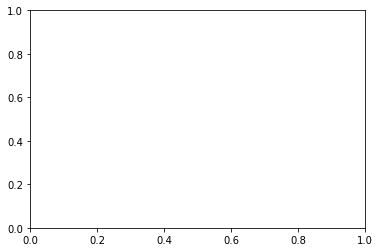

In [87]:
plt.plot(time, flux_system)
plt.xlabel("time [days]")
plt.ylabel("system flux");

In [39]:
planet.r = 0.33
system.show(t=np.linspace(0, 1, 50), window_pad=4, figsize=(8, 8))

Compiling `compute_rect_grid`... Done.
Compiling `compute_moll_grid`... Done.
Compiling `compute_ortho_grid`... Done.


# Generate Simulated Lightcurve with Exoplanet 

class exoplanet.orbits.KeplerianOrbit(period, a, t0, t_periastron,
incl, b, duration, ecc, omega, sin_omega, cos_omega, Omega, m_planet,
m_star, r_star, rho_star, ror, model)

In [113]:
def generate_lightcurve(period=3.456, u=[0.3,0.2],r=0.1,texp=0.02, b=0, m_star=1,r_star=1):
    """
    Function to generate lightcurve using Exoplanet

    Parameters
    ----------
    period : int, float
        Orbital period of planet
    u : list, array
        Quadratic Limb-darkening coefficients
    r : int, float
        Radius of planet in Solar radii
    texp : int, float
        Exposure time of lightcurve
    b : int, float
        Impact parameter
    m_star : int, float
        Mass of star in Solar masses
    r_star : int, float
        Radius of star in Solar radii
        

    Returns
    -------
    t : 1-D array
        Time array for the lightcurve
    lightcurve : 1-D array
        1-D flux array 
    """

    # The light curve calculation requires an orbit
    orbit = xo.orbits.KeplerianOrbit(period=period,b=b,m_star=m_star, r_star=r_star)

    # Compute a limb-darkened light curve using starry
    t = np.linspace(-0.1, 0.1, 1000)
    light_curve = (
        xo.LimbDarkLightCurve(*u)
        .get_light_curve(orbit=orbit, r=r, t=t, texp=texp)
        .eval()
    )
    # Note: the `eval` is needed because this is using Theano in
    # the background

    plt.plot(t, light_curve, color="C0", lw=2)
    plt.ylabel("relative flux")
    plt.xlabel("time [days]")
    _ = plt.xlim(t.min(), t.max())
    plt.show()
    plt.close()
    
    return t, light_curve

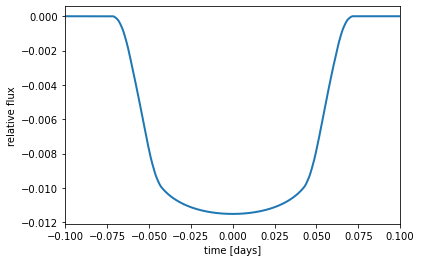

In [68]:
t,lc = generate_lightcurve()

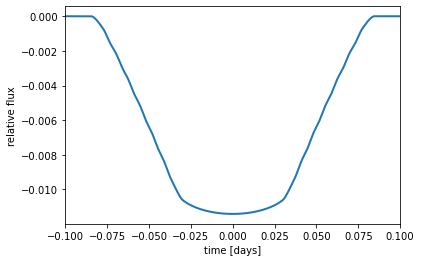

In [69]:
t,lc = generate_lightcurve(period=3.456, u=[0.3,0.2],r=0.1,texp=0.05)

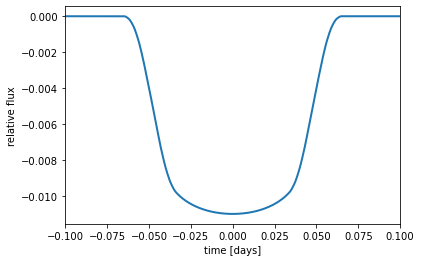

In [70]:
t,lc = generate_lightcurve(b=0.5)